In [1]:
import numpy as np
import pandas as pa
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sea
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from astropy.timeseries import LombScargle
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit


In [4]:
%matplotlib inline

In [2]:
plt.style.use('seaborn-colorblind')

In [5]:
ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_NEOWISE_avg2_lsp_boot_w2_more5_linfap_dagb.csv')
ab.columns
len(ab)

5578

In [33]:
ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/taurus_gould_obsb_outcut_NEOWISE_lsp200_w2_more5_onlyg.csv')
ab.columns
len(ab)

5578

In [34]:
periodic_c = ab['baluev_fap'] < 0.1
lowerr02_c = ab['avg_eW2'] < 0.2
# ab = ab[periodic_c]
pr = ab[(ab['class'] == "P") & lowerr02_c]
fl = ab[(ab['class'] == "F")& lowerr02_c]# & periodic_c ]
prfl = ab[((ab['class'] == "P") | (ab['class'] == "F")) & lowerr02_c]
di = ab[(ab['class'] == "D")& lowerr02_c]# & periodic_c]
ev = ab[(ab['class'] == "E")& lowerr02_c]# & periodic_c]       

In [6]:
prfl[prfl['class'] == "F"]
558+178

736

/home/wooseok/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


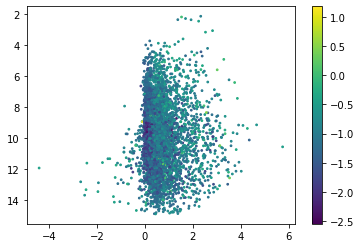

In [7]:
ax = plt.scatter(ab.avg_W1-ab.avg_W2,ab.avg_W2,s=3,c=np.log10(ab.amp/ab.ls_meanjy))#, cmap='rainbow')
cbar2 = plt.colorbar(ax)
plt.gca().invert_yaxis()

In [72]:
?plt.colorbar

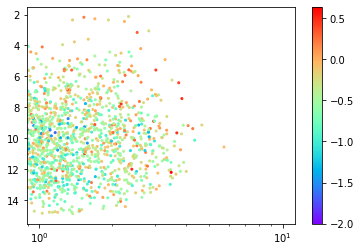

In [7]:
ax2 = plt.scatter(ab.avg_W1-ab.avg_W2,ab.avg_W2,s=4,c=np.log10(ab.Deltaall_w2), cmap='rainbow')
cbar3 = plt.colorbar(ax2)
plt.gca().invert_yaxis()
plt.xscale('log')

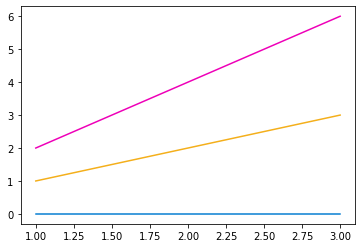

In [6]:
cc = ['#057dd1',  '#f4af1b','#ee00b8']
for i in range(3):
    plt.plot([1,2,3], np.array([1,2,3])*i, color=cc[i])

array('#057dd1', dtype='<U7')

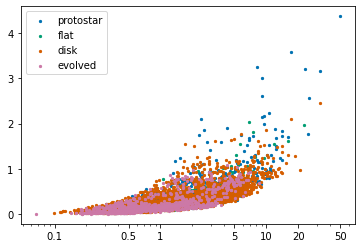

In [35]:
yso = [pr,fl,di,ev]
y_label = ['protostar', 'flat',
           'disk', 'evolved']
y_color=['#057dd1', 'red',
         '#f4af1b', '#ee00b8']
for i in range(len(yso)):
    plt.scatter(yso[i].sd_sdfid_w2_flux, yso[i].Deltaall_w2,
                s = 5, label=y_label[i])
plt.legend()
plt.xscale('log')
plt.xticks([0.1,0.5,1,5,10,20,50], [0.1,0.5,1,5,10,20,50])
np.array(y_color[0])

In [15]:
pr

Index_1          ra        dec     avg_W1  stdev_W1   avg_eW1  \
0           1   85.677833 -10.419250   8.667997  0.269628  0.050093   
3           4   85.554458 -10.093028  12.233356  0.240206  0.033730   
19         23   85.638083 -10.022083   9.042788  0.389512  0.041265   
20         24   85.641208 -10.020417   9.973752  0.361338  0.054055   
27         31   85.599000 -10.015917  12.773923  0.142784  0.044088   
...       ...         ...        ...        ...       ...       ...   
5524     6423  277.494583   1.240556   9.801574  0.246248  0.096043   
5530     6430  277.497917   1.199722  10.252963  0.260718  0.039533   
5531     6431  277.499583   1.219722  13.063241  0.059281  0.083128   
5538     6440  277.508333   1.233056  11.039844  0.123161  0.029020   
5547     6450  277.521667   0.684444  13.872279  0.083408  0.096832   

         avg_W2  stdev_W2   avg_eW2  N_w1  ...  boot_fap_1000     power  \
0      7.439575  0.230358  0.054769    12  ...          0.492  0.519234   
3     10.675369  0.234503  0.030060    12  ...          0.316  0.694724   
19     7.515171  0.252480  0.054054    12  ...          0.724  0.511813   
20     7.691757  0.342578  0.068128    12  ...          0.923  0.541486   
27    10.769410  0.147125  0.035057    12  ...          0.094  0.777913   
...         ...       ...       ...   ...  ...            ...       ...   
5524   8.138493  0.240065  0.109806    12  ...          0.030  0.835724   
5530   7.462172  0.282381  0.055801    12  ...          0.062  0.736033   
5531   9.154382  0.097682  0.028987    12  ...          0.041  0.826592   
5538   9.835844  0.141911  0.028863    12  ...          0.573  0.597519   
5547  12.451667  0.090814  0.077579    12  ...          0.956  0.451838   

      sd_sdfid_periodrmv_w2  sd_periodrmv_w2       amp  ls_meanjy  \
0                  2.133720         0.020574  0.052013   0.507568   
3                  4.559688         0.001194  0.002205   0.009248   
19                 3.364626         0.029171  0.041098   0.176074   
20                 3.938629         0.037635  0.048005   0.134683   
27                 2.214526         0.000613  0.001384   0.007073   
...                     ...              ...       ...        ...   
5524               0.853913         0.008331  0.031709   0.191000   
5530               1.963466         0.019211  0.072563   0.507376   
5531               1.409936         0.001425  0.004811   0.039310   
5538               3.306149         0.001772  0.002773   0.018982   
5547               0.885486         0.000114  0.000156   0.001713   

      chi2_period_w2  linear_fap  index_2 linear_fap_periodrmv  
0          70.525882    0.375688      1.0             0.999457  
3         226.951126    0.004600      4.0             0.998460  
19        119.610874    0.063735     23.0             0.998829  
20        163.752203    0.832846     24.0             0.973829  
27         55.251844    0.002810     31.0             0.999841  
...              ...         ...      ...                  ...  
5524        9.551598    0.000261   6423.0             0.999763  
5530       57.968279    0.024289   6430.0             0.999849  
5531       23.796345    0.000024   6431.0             0.999695  
5538      120.295665    0.005886   6440.0             0.999888  
5547        9.113711    0.026422   6450.0             0.999853  

[554 rows x 47 columns]

TypeError: list indices must be integers or slices, not str

In [36]:
gem = pa.read_csv('/home/wooseok/WISE_data/ws_paper/wise_gemini.csv')
gem

Number          RA        Dec      Stage  delta-W2      K Semester  \
0    5526.0  246.215417 -39.942222  protostar      0.84  -9.99        A   
1    5655.0  246.668333 -24.453889  protostar      0.97  -9.99        A   
2    5778.0      247.09 -24.606389  protostar      0.82  -9.99        A   
3    5832.0  248.094167 -24.475278  protostar      0.92  -9.99        A   
4    6384.0    277.4675   1.263056  protostar      1.11  -9.99        A   
..      ...         ...        ...        ...       ...    ...      ...   
170   224.0   85.700375  -8.668972  protostar      0.85  10.80       AB   
171   270.0   85.789917  -8.490861  protostar      1.84  13.20       AB   
172  2440.0   83.833167  -5.017389  protostar      0.78  14.90       AB   
173  3426.0   86.995958   0.592444  protostar      1.71  14.90       AB   
174     NaN         NaN        NaN        NaN       NaN    NaN      NaN   

    Unnamed: 7  Texp Select by lightcurve+K mag Select by lightcurve  \
0          NaN    -1                          n                    n   
1          NaN    -1                          n                    n   
2          NaN    -1                          n                    n   
3          NaN    -1                          n                    n   
4          NaN    -1                          n                    n   
..         ...   ...                        ...                  ...   
170     bad/30    20                          y                    y   
171     bad/30    25                          y                    Y   
172    good/60    45                          y                    y   
173    good/60    60                          y                    y   
174        NaN  2623                        NaN                  NaN   

          GJH take      DIJ take interest checked   source  \
0              NaN           NaN        n       F      NaN   
1              NaN           NaN        n       F      NaN   
2              NaN           NaN        n       F      NaN   
3              NaN           NaN        n       F      NaN   
4            hmmph           NaN        n       F      NaN   
..             ...           ...      ...     ...      ...   
170  recent burst?           NaN        y       T  HOPS213   
171   beautiful!!!          flat        y       T  HOPS215   
172   burst at end           NaN       y?       T   HOPS89   
173      hell yeah  flat/extrema        y       T  HOPS343   
174            NaN           NaN      NaN     NaN      NaN   

                                                 Notes  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
170                       Got bright in the last epoch  
171                              slow rising outburst?  
172  small burst at the end of WISE epochs, too faint?  
173             It is probably brighter now, at K~13.5  
174                                                NaN  

[175 rows x 17 columns]

In [57]:
gem = pa.read_csv('/home/wooseok/WISE_data/ws_paper/wise_gemini.csv')
# gem = gem.astype({'Number': int,
#         'Texp': np.float})
gemt = gem[gem.Texp != '-1']

gem_idx = gemt.Number[:-1].astype(int)

92


([<matplotlib.axis.XTick at 0x7f9010157ed0>,
 <a list of 9 Text xticklabel objects>)

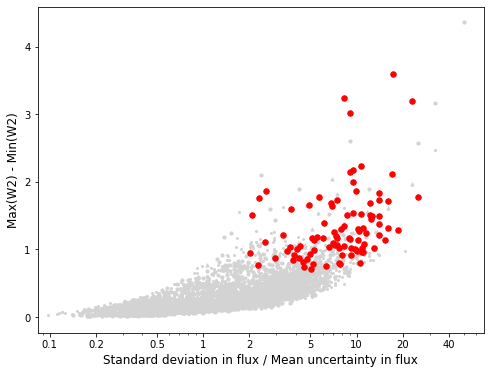

In [15]:
#proposal for gemini (Greg)



# ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_NEOWISE_avg2_lsp_boot_w2_more5_linfap_dagb.csv')
ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/taurus_gould_obsb_outcut_NEOWISE_lsp200_w2_more5_onlyg.csv')

# ab.columns

periodic_c = ab['baluev_fap'] < 0.1
lowerr02_c = ab['avg_eW2'] < 0.2
# ab = ab[periodic_c]
pr = ab[(ab['class'] == "P") & lowerr02_c]
fl = ab[(ab['class'] == "F")& lowerr02_c]# & periodic_c ]
prfl = ab[((ab['class'] == "P") | (ab['class'] == "F")) & lowerr02_c]
di = ab[(ab['class'] == "D")& lowerr02_c]# & periodic_c]
ev = ab[(ab['class'] == "E")& lowerr02_c]# & periodic_c]    

yso = [pr,fl,
       di,ev]
y_label = ['Protostar', 'Flat',
           'Disk', 'Evolved']
y_color='lightgray'
y_size=[10,10,4,10]
y_marker = ['o','^','o','o']

plt.figure(figsize=(8,6))
for i in range(len(yso)):
    plt.scatter(yso[i].sd_sdfid_w2_flux, yso[i].Deltaall_w2,
                s = y_size[i], c=y_color, label=y_label[i],marker=y_marker[i])

gem = pa.read_csv('/home/wooseok/WISE_data/ws_paper/wise_gemini.csv')
gemt = gem[gem.Texp != '-1']
gem_idx = gemt.Number[:-1].astype(int)

y=0
for i in gem_idx:
    circ_yso = ab[ab['Index'] == i]
    plt.scatter(circ_yso.sd_sdfid_w2_flux, circ_yso.Deltaall_w2,
                s=30, color='r', marker='o')
#     print(circ_yso)
    y+=1
print(y)
# plt.legend()

plt.xscale('log')
plt.xlabel('Standard deviation in flux / Mean uncertainty in flux',size=12)
plt.ylabel('Max(W2) - Min(W2)',size=12)
plt.xticks([0.1,0.2,0.5,1,2,5,10,20,40], [0.1,0.2,0.5,1,2,5,10,20,40])
# np.array(y_color[0])
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/gemini_sources.pdf')

([<matplotlib.axis.XTick at 0x7fdc006be7c0>,
 [Text(0, 0, '0.1'),
  Text(0, 0, '0.2'),
  Text(0, 0, '0.5'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '5'),
  Text(0, 0, '10'),
  Text(0, 0, '20'),
  Text(0, 0, '40')])

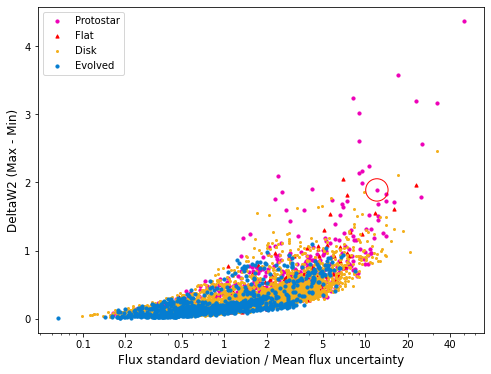

In [8]:
index = 6380

# ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_NEOWISE_avg2_lsp_boot_w2_more5_linfap_dagb.csv')
# ab.columns

periodic_c = ab['baluev_fap'] < 0.1
lowerr02_c = ab['avg_eW2'] < 0.2
# ab = ab[periodic_c]
pr = ab[(ab['class'] == "P") & lowerr02_c]
fl = ab[(ab['class'] == "F")& lowerr02_c]# & periodic_c ]
prfl = ab[((ab['class'] == "P") | (ab['class'] == "F")) & lowerr02_c]
di = ab[(ab['class'] == "D")& lowerr02_c]# & periodic_c]
ev = ab[(ab['class'] == "E")& lowerr02_c]# & periodic_c]    

yso = [pr,fl,
       di,ev]
y_label = ['Protostar', 'Flat',
           'Disk', 'Evolved']
y_color=['#ee00b8', 'red',
         '#f4af1b', '#057dd1']
y_size=[10,10,4,10]
y_marker = ['o','^','o','o']

plt.figure(figsize=(8,6))
for i in range(len(yso)):
    plt.scatter(yso[i].sd_sdfid_w2_flux, yso[i].Deltaall_w2,
                s = y_size[i], c=y_color[i],label=y_label[i],marker=y_marker[i])
circ_yso = ab[ab['Index'] == index]
plt.scatter(circ_yso.sd_sdfid_w2_flux, circ_yso.Deltaall_w2,
            s=500, facecolors='none', edgecolors='r')


plt.legend()
plt.xscale('log')
plt.xlabel('Flux standard deviation / Mean flux uncertainty',size=12)
plt.ylabel('DeltaW2 (Max - Min)',size=12)
plt.xticks([0.1,0.2,0.5,1,2,5,10,20,40], [0.1,0.2,0.5,1,2,5,10,20,40])
# np.array(y_color[0])
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/std_dw2_err02_scatter.pdf')

In [98]:
abc.columns

Index(['Index', 'ra', 'dec', 'avg_W1', 'stdev_W1', 'avg_eW1', 'avg_W2',
       'stdev_W2', 'avg_eW2', 'N_w1', 'N_w2', 'slope_w1', 'slope_w2',
       'sd_sdfid_w1_flux', 'sd_sdfid_w2_flux', 'sd_sdfid_w1_mag',
       'sd_sdfid_w2_mag', 'Delta_w1', 'Delta_w2', 'Delta_w1_flux',
       'Delta_w2_flux', 'class', 'catalogue', 'Sw1', 'DeltaSw1', 'Sw2',
       'DeltaSw2', 'SDw1', 'SDfidw1', 'SDw2', 'SDfidw2', 'chi2_mean_w1',
       'chi2_wmean_w1', 'chi2_slope_w1', 'chi2_mean_w2', 'chi2_wmean_w2',
       'chi2_slope_w2', 'linear_fap_w1', 'linear_fap_w2', 'sd_arcsec'],
      dtype='object')

In [11]:
?np.histogram

### Figure 4. DeltaW2 vs SD/MU scatter with histogram

In [18]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms



ab = pa.read_csv('wise_csv/NEOWISE_YSO_variable_stat.csv')
abc = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2)]


pr = abc[(abc['class'] == "P") |
        (abc['class'] == "F") |
        (abc['class'] == "FP") |
        (abc['class'] == "0") |
        (abc['class'] == "I") |
        (abc['class'] == "I?")]


di = abc[(abc['class'] == "D") |
        (abc['class'] == "II") |
        (abc['class'] == "full") |
        (abc['class'] == "full?") |
        (abc['class'] == "debris/ev trans") |
        (abc['class'] == "transitional") |
        (abc['class'] == "evolved") |
        (abc['class'] == "ev or trans")
        ]

ev = abc[(abc['class'] == "E") |
        (abc['class'] == "III") 
        ]

yso = [pr,di,ev]
y_label = ['P', 'D', 'E']
y_color=['#ee00b8', '#f4af1b', '#057dd1']
y_size=[10,10,10]
y_marker = ['o','o','o']


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
fig1 = plt.figure(figsize=(9,9))

rot = transforms.Affine2D().rotate_deg(90)

axsc = plt.axes(rect_scatter)
axsc.tick_params(direction='in', top=True, right=True, labelsize=15)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False, labelsize=15)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False, labelsize=15)

for i in range(len(yso)):
    axsc.scatter(yso[i].sd_sdfid_w2_flux, yso[i].Delta_w2,
                s = y_size[i], c=y_color[i],label=y_label[i],marker=y_marker[i])

### histogram_x ###
yso_hist = [pr,di,ev]
y_label = ['P',
           'D', 'E']
y_color=['#ee00b8', 
         '#f4af1b', '#057dd1']
hist_ret = []

xlim = (0.055,65)

# plt.figure()
for i in range(len(yso_hist)):
    counts, bins = np.histogram(yso_hist[i].sd_sdfid_w2_flux, bins=np.logspace(np.log10(xlim[0]),np.log10(xlim[1]), 30))
    hist_ret.append(ax_histx.hist(bins[:-1], bins, weights=counts/max(counts),histtype='step',
            color = y_color[i], label=y_label[i], linewidth=2))
    

    
### histogram_y ###

hist_ret2=[]



for i in range(len(yso_hist)):
    counts, bins = np.histogram(yso_hist[i].Delta_w2, bins=np.logspace(np.log10(9e-3),np.log10(5), 30))
    hist_ret2.append(ax_histy.hist(bins[:-1],bins, weights=counts/max(counts),histtype='step',
            color = y_color[i], label=y_label[i], linewidth=2, orientation='horizontal'))    
    



axsc.set_xlim(xlim)
axsc.set_xscale('log')
axsc.set_xlabel('SD / Mean uncertainty',size=20)
axsc.set_ylabel('DeltaW2 (Max - Min)',size=20)
axsc.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
axsc.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40])


ylm = axsc.get_ylim()



ax_histy.set_xticks([0,0.25,0.5,0.75,1])
ax_histy.set_xticklabels([0,0.25,0.5,0.75,1])


ax_histx.set_yticks([0,0.25,0.5,0.75,1])
ax_histx.set_yticklabels([0,0.25,0.5,0.75,1])
ax_histx.set_xlim(axsc.get_xlim())
ax_histx.set_xscale('log')
ax_histx.set_xticks([])
ax_histy.legend(fontsize=13, loc='lower left', bbox_to_anchor=(0.0, 1.0))
axsc.legend(fontsize=13)


fig1.tight_layout()



<ipython-input-18-59db54c50600>:126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig1.tight_layout()


## Figure 2 with fractional histogram

735
3459
1204
(0.055, 65.0)


<ipython-input-5-555192f4e94a>:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig1.tight_layout()


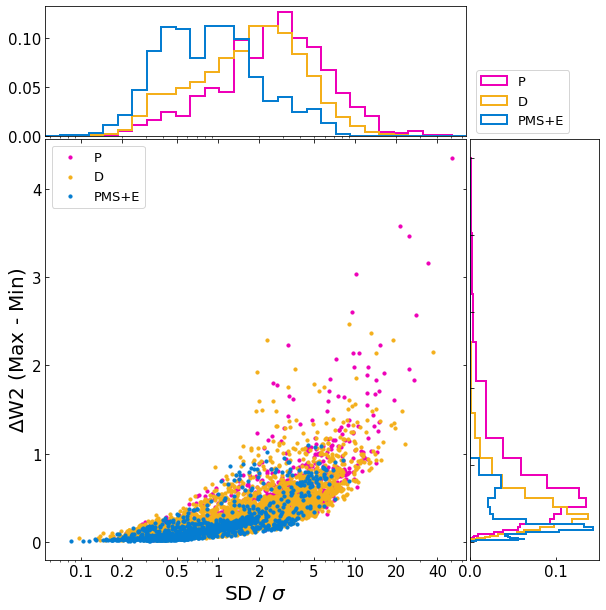

<Figure size 432x288 with 0 Axes>

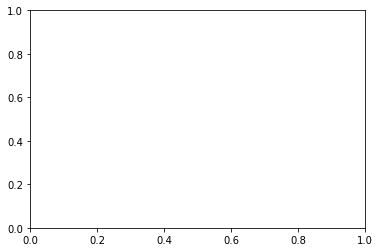

In [5]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/3rd_obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')
abc = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2)]


pr = abc[(abc['class'] == "P") |
        (abc['class'] == "F") |
        (abc['class'] == "FP") |
        (abc['class'] == "0") |
        (abc['class'] == "I") |
        (abc['class'] == "I?")]


di = abc[(abc['class'] == "D") |
        (abc['class'] == "II") |
        (abc['class'] == "full") |
        (abc['class'] == "full?") |
        (abc['class'] == "debris/ev trans") |
        (abc['class'] == "transitional") |
        (abc['class'] == "evolved") |
        (abc['class'] == "ev or trans")
        ]

ev = abc[(abc['class'] == "E") |
        (abc['class'] == "III") 
        ]

yso = [pr,di,ev]
y_label = ['P', 'D', 'PMS+E']
y_color=['#ee00b8', '#f4af1b', '#057dd1']
y_size=[10,10,10]
y_marker = ['o','o','o']


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
fig1 = plt.figure(figsize=(9,9))

rot = transforms.Affine2D().rotate_deg(90)

axsc = plt.axes(rect_scatter)
axsc.tick_params(direction='in', top=True, right=True, labelsize=15)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False, labelsize=15)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False, labelsize=15)

for i in range(len(yso)):
    axsc.scatter(yso[i].sd_sdfid_w2_flux, yso[i].Delta_w2,
                s = y_size[i], c=y_color[i],label=y_label[i],marker=y_marker[i])
    print(len(yso[i]))
### histogram_x ###
yso_hist = [pr,di,ev]
y_label = ['P',
           'D', 'PMS+E']
y_color=['#ee00b8', 
         '#f4af1b', '#057dd1']
hist_ret = []

xlim = (0.055,65)

plt.figure()
for i in range(len(yso_hist)):
    counts, bins = np.histogram(yso_hist[i].sd_sdfid_w2_flux, bins=np.logspace(np.log10(xlim[0]),np.log10(xlim[1]), 30))
    hist_ret.append(ax_histx.hist(bins[:-1], bins, weights=counts/len(yso_hist[i]),histtype='step',
            color = y_color[i], label=y_label[i], linewidth=2))
    


    
### histogram_y ###

hist_ret2=[]
fig0, ax0 = plt.subplots()


for i in range(len(yso_hist)):
    counts, bins = np.histogram(yso_hist[i].Delta_w2, bins=np.logspace(np.log10(9e-3),np.log10(5), 30))
#     plt.hist()
    hist_ret2.append(ax_histy.hist(bins[:-1],bins, weights=counts/len(yso_hist[i]),histtype='step',
#             bins=np.logspace(np.log10(9e-3),np.log10(5), 30),
            color = y_color[i], label=y_label[i], linewidth=2, orientation='horizontal'))    
    
    

axsc.set_xlim(xlim)
axsc.set_xscale('log')
# axsc.set_yscale('log')
axsc.set_xlabel('SD / $\sigma$',size=20)
axsc.set_ylabel('$\Delta$W2 (Max - Min)',size=20)
axsc.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
axsc.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40])
# axsc.set_yticks([0.01,0.1,1,4])
# axsc.set_yticklabels([0.01,0.1,1,4])
# axsc.set_yticklabels([0.,1.,2.,3.,4.],size=15)

ylm = axsc.get_ylim()

# ax_histx.set_yscale('log')
# ax_histy.set_xscale('log')

# ax_histy.set_xticks([0,0.25,0.5,0.75,1])
# ax_histy.set_xticklabels([0,0.25,0.5,0.75,1])
# ax_histy.set_yscale('log')


# ax_histx.set_yticks([0,0.25,0.5,0.75,1])
# ax_histx.set_yticklabels([0,0.25,0.5,0.75,1])
ax_histx.set_xlim(axsc.get_xlim())
ax_histx.set_xscale('log')
ax_histx.set_xticks([])
print(axsc.get_xlim())
# ax_histx.legend()
ax_histy.legend(fontsize=13, loc='lower left', bbox_to_anchor=(0.0, 1.0))
axsc.legend(fontsize=13)
# ? ax_histy
fig1.tight_layout()

fig1.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure4.pdf')

## Fig 2. for poster

717
3405
1170
(0.055, 65.0)


<ipython-input-27-5a01d19cfb05>:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig1.tight_layout()


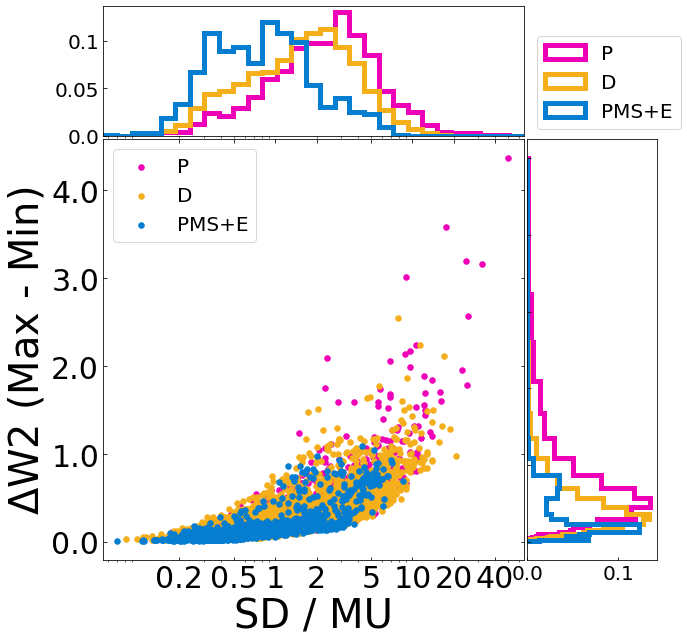

<Figure size 432x288 with 0 Axes>

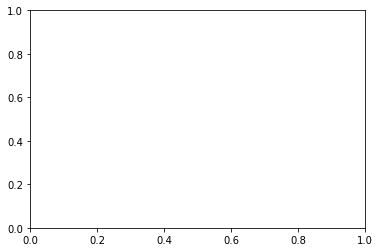

In [27]:
ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2.csv')
abc = ab[(ab.N_w2 > 5) &
         (ab.sd_arcsec < 0.3) &
         (ab.avg_eW2 < 0.2)]


pr = abc[(abc['class'] == "P") |
        (abc['class'] == "F") |
        (abc['class'] == "FP") |
        (abc['class'] == "0") |
        (abc['class'] == "I") |
        (abc['class'] == "I?")]


di = abc[(abc['class'] == "D") |
        (abc['class'] == "II") |
        (abc['class'] == "full") |
        (abc['class'] == "full?") |
        (abc['class'] == "debris/ev trans") |
        (abc['class'] == "transitional") |
        (abc['class'] == "evolved") |
        (abc['class'] == "ev or trans")
        ]

ev = abc[(abc['class'] == "E") |
        (abc['class'] == "III") 
        ]

yso = [pr,di,ev]
y_label = ['P', 'D', 'PMS+E']
y_color=['#ee00b8', '#f4af1b', '#057dd1']
y_size=[30,30,30]
y_marker = ['o','o','o']


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
fig1 = plt.figure(figsize=(9,9))

rot = transforms.Affine2D().rotate_deg(90)

axsc = plt.axes(rect_scatter)
axsc.tick_params(direction='in', top=True, right=True, labelsize=15)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False, labelsize=15)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False, labelsize=15)

for i in range(len(yso)):
    axsc.scatter(yso[i].sd_sdfid_w2_flux, yso[i].Delta_w2,
                s = y_size[i], c=y_color[i],label=y_label[i],marker=y_marker[i])
    print(len(yso[i]))
### histogram_x ###
yso_hist = [pr,di,ev]
y_label = ['P',
           'D', 'PMS+E']
y_color=['#ee00b8', 
         '#f4af1b', '#057dd1']
hist_ret = []

xlim = (0.055,65)

plt.figure()
for i in range(len(yso_hist)):
    counts, bins = np.histogram(yso_hist[i].sd_sdfid_w2_flux, bins=np.logspace(np.log10(xlim[0]),np.log10(xlim[1]), 30))
    hist_ret.append(ax_histx.hist(bins[:-1], bins, weights=counts/len(yso_hist[i]),histtype='step',
            color = y_color[i], label=y_label[i], linewidth=5))
    


    
### histogram_y ###

hist_ret2=[]
fig0, ax0 = plt.subplots()


for i in range(len(yso_hist)):
    counts, bins = np.histogram(yso_hist[i].Delta_w2, bins=np.logspace(np.log10(9e-3),np.log10(5), 30))
#     plt.hist()
    hist_ret2.append(ax_histy.hist(bins[:-1],bins, weights=counts/len(yso_hist[i]),histtype='step',
#             bins=np.logspace(np.log10(9e-3),np.log10(5), 30),
            color = y_color[i], label=y_label[i], linewidth=5, orientation='horizontal'))    
    
    

axsc.set_xlim(xlim)
axsc.set_xscale('log')
# axsc.set_yscale('log')
axsc.set_xlabel('SD / MU',size=40)
axsc.set_ylabel('$\Delta$W2 (Max - Min)',size=40)
axsc.set_xticks([0.2,0.5,1,2,5,10,20,40])
axsc.set_xticklabels([0.2,0.5,1,2,5,10,20,40],size=30)
# axsc.set_yticks([0.01,0.1,1,4])
# axsc.set_yticklabels([0.01,0.1,1,4])
axsc.set_yticklabels(axsc.get_yticks(),size=30)

ylm = axsc.get_ylim()

# ax_histx.set_yscale('log')
# ax_histy.set_xscale('log')

# ax_histy.set_xticks([0,0.25,0.5,0.75,1])
ax_histy.set_xticklabels(ax_histy.get_xticks(),size=20)
# ax_histy.set_yscale('log')


# ax_histx.set_yticks([0,0.25,0.5,0.75,1])
ax_histx.set_yticklabels(ax_histx.get_yticks(),size=20)
ax_histx.set_xlim(axsc.get_xlim())
ax_histx.set_xscale('log')
ax_histx.set_xticks([])
print(axsc.get_xlim())
# ax_histx.legend()
ax_histy.legend(fontsize=20, loc='lower left', bbox_to_anchor=(0.0, 1.0))
axsc.legend(fontsize=20)
# ? ax_histy
fig1.tight_layout()

# fig1.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/taumd_std_dw2_err02_scatter.pdf')

In [ ]:
ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2.csv')
abc = ab[(ab.N_w2 > 5) &
         (ab.sd_arcsec < 0.3) &
         (ab.avg_eW2 < 0.2)]


pr = abc[(abc['class'] == "P") |
        (abc['class'] == "F") |
        (abc['class'] == "FP") |
        (abc['class'] == "0") |
        (abc['class'] == "I") |
        (abc['class'] == "I?")]


di = abc[(abc['class'] == "D") |
        (abc['class'] == "II") |
        (abc['class'] == "full") |
        (abc['class'] == "full?") |
        (abc['class'] == "debris/ev trans") |
        (abc['class'] == "transitional") |
        (abc['class'] == "evolved") |
        (abc['class'] == "ev or trans")
        ]

ev = abc[(abc['class'] == "E") |
        (abc['class'] == "III") 
        ]

yso = [pr,di,ev]
y_label = ['P', 'D', 'E']
y_color=['#ee00b8', '#f4af1b', '#057dd1']
y_size=[10,10,10]
y_marker = ['o','o','o']


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.23]
rect_histy = [left + width + spacing, bottom, 0.23, height]

# start with a rectangular Figure
fig1 = plt.figure(figsize=(9,9))

rot = transforms.Affine2D().rotate_deg(90)

axsc = plt.axes(rect_scatter)
axsc.tick_params(direction='in', top=True, right=True, labelsize=15)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False, labelsize=15)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False, labelsize=15)

for i in range(len(yso)):
    axsc.scatter(yso[i].sd_sdfid_w2_flux, yso[i].Delta_w2,
                s = y_size[i], c=y_color[i],label=y_label[i],marker=y_marker[i])

### histogram_x ###
yso_hist = [pr,di,ev]
y_label = ['P',
           'D', 'E']
y_color=['#ee00b8', 
         '#f4af1b', '#057dd1']
hist_ret = []

xlim = (0.055,65)

plt.figure()
for i in range(len(yso_hist)):
    counts, bins = np.histogram(yso_hist[i].sd_sdfid_w2_flux, bins=np.logspace(np.log10(xlim[0]),np.log10(xlim[1]), 30))
    hist_ret.append(ax_histx.hist(bins[:-1], bins, weights=counts/len(abc),histtype='step',
            color = y_color[i], label=y_label[i], linewidth=2))
    


    
### histogram_y ###

hist_ret2=[]
fig0, ax0 = plt.subplots()


for i in range(len(yso_hist)):
    counts, bins = np.histogram(yso_hist[i].Delta_w2, bins=np.logspace(np.log10(9e-3),np.log10(5), 30))
#     plt.hist()
    hist_ret2.append(ax_histy.hist(bins[:-1],bins, weights=counts/len(abc),histtype='step',
#             bins=np.logspace(np.log10(9e-3),np.log10(5), 30),
            color = y_color[i], label=y_label[i], linewidth=2, orientation='horizontal'))    
    
    

axsc.set_xlim(xlim)
axsc.set_xscale('log')
# axsc.set_yscale('log')
axsc.set_xlabel('SD / Mean uncertainty',size=20)
axsc.set_ylabel('DeltaW2 (Max - Min)',size=20)
axsc.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
axsc.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40])
# axsc.set_yticks([0.01,0.1,1,4])
# axsc.set_yticklabels([0.01,0.1,1,4])
# axsc.set_yticklabels([0.,1.,2.,3.,4.],size=15)

ylm = axsc.get_ylim()

# ax_histx.set_yscale('log')
# ax_histy.set_xscale('log')
histx_ytick = [0.00,0.01,0.03,0.05,0.07]
histy_xtick = [0.00, 0.04, 0.08]
ax_histy.set_xticks(histy_xtick)
ax_histy.set_xticklabels(histy_xtick)
# ax_histy.set_yscale('log')


ax_histx.set_yticks(histx_ytick)
ax_histx.set_yticklabels(histx_ytick)
ax_histx.set_xlim(axsc.get_xlim())
ax_histx.set_xscale('log')
ax_histx.set_xticks([])
print(axsc.get_xlim())
# ax_histx.legend()
ax_histy.legend(fontsize=13, loc='lower left', bbox_to_anchor=(0.0, 1.0))
axsc.legend(fontsize=13)
# ? ax_histy
fig1.tight_layout()

fig1.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/frac_taumd_std_dw2_err02_scatter.pdf')

## mean W2 histogram

0
[0.03401361 0.0462585  0.07346939 0.09931973 0.13877551 0.14557823
 0.14421769 0.14013605 0.1047619  0.07346939]
1
[0.00896213 0.03035559 0.05145996 0.09887251 0.15380168 0.18993929
 0.18068806 0.14599595 0.09858341 0.04134143]
2
[0.03903654 0.10465116 0.1744186  0.18272425 0.17524917 0.11046512
 0.08388704 0.07890365 0.03322259 0.01744186]


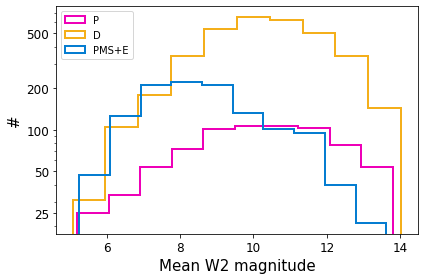

In [15]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/3rd_obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')
abc = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2)]


pr = abc[(abc['class'] == "P") |
        (abc['class'] == "F") |
        (abc['class'] == "FP") |
        (abc['class'] == "0") |
        (abc['class'] == "I") |
        (abc['class'] == "I?")]


di = abc[(abc['class'] == "D") |
        (abc['class'] == "II") |
        (abc['class'] == "full") |
        (abc['class'] == "full?") |
        (abc['class'] == "debris/ev trans") |
        (abc['class'] == "transitional") |
        (abc['class'] == "evolved") |
        (abc['class'] == "ev or trans")
        ]

ev = abc[(abc['class'] == "E") |
        (abc['class'] == "III") 
        ]

yso = [pr,di,ev]

y_label = ['P',
           'D', 'PMS+E']
y_color=['#ee00b8', 
         '#f4af1b', '#057dd1']

plt.figure(figsize=(6,4))
for i in range(len(yso)):
    print(i)
    counts, bins = np.histogram(yso[i].avg_W2)
    
    plt.hist(bins[:-1],bins,
             weights=counts,
            histtype='step',
#             density=True,
             linewidth=2,
             label=y_label[i],
             color=y_color[i]
            )
    print(counts/len(yso[i]))
# plt.gca().invert_xaxis()
plt.xlabel('Mean W2 magnitude',size=15)
plt.ylabel('#',size=15)
plt.yscale('log')
tick=[25,50,100,200,500]
plt.yticks(tick,labels=tick,size=12)
plt.xticks(size=12)
plt.legend(loc='upper left')
plt.tight_layout()


# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/taumd_meanw2_hist.pdf')
# plt.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure3.pdf')

## Count samples

In [145]:
ab_region = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_med_LSP_region.csv')
# ab.columns
ab = ab_region

abc = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2)]

#modified FAP
abc.loc[:,'mod_baluev_fap'] = abc.loc[:,'baluev_fap'] * 200 / abc.loc[:,'period']


pr = abc[(abc['class'] == "P") |
        (abc['class'] == "F") |
        (abc['class'] == "FP") |
        (abc['class'] == "0") |
        (abc['class'] == "I") |
        (abc['class'] == "I?")]


di = abc[(abc['class'] == "D") |
        (abc['class'] == "II") |
        (abc['class'] == "full") |
        (abc['class'] == "full?") |
        (abc['class'] == "debris/ev trans") |
        (abc['class'] == "transitional") |
        (abc['class'] == "evolved") |
        (abc['class'] == "ev or trans")
        ]

ev = abc[(abc['class'] == "E") |
        (abc['class'] == "III") 
        ]

ev.Cloud.value_counts()

/home/wooseok/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/wooseok/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Aquila              714
Ophiuchus            38
Serpens              36
Perseus              35
Lupus VI             33
Lupus V              25
Lupus III            18
Auriga/CMC           17
IC5146               14
Corona Australis     13
Cepheus              12
Chamaeleon I         11
Lupus IV              5
Musca                 4
Ophiuchus North       3
Chamaeleon II         2
Chamaeleon III        2
Lupus I               2
Name: Cloud, dtype: int64

## Figure. Secularity plot

In [70]:
var = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined.csv')
var.columns
# abc_lin = var[var.var_type=='linear']
# abc_lin

Index(['Index', 'ra', 'dec', 'dist_sd', 'avg_W1', 'stdev_W1', 'avg_eW1',
       'avg_W2', 'stdev_W2', 'avg_eW2', 'N_w1', 'N_w2', 'slope_w1', 'slope_w2',
       'sd_sdfid_w1_flux', 'sd_sdfid_w2_flux', 'sd_sdfid_w1_mag',
       'sd_sdfid_w2_mag', 'Delta_w1', 'Delta_w2', 'Delta_w1_flux',
       'Delta_w2_flux', 'class', 'catalogue', 'Sw1', 'DeltaSw1', 'Sw2',
       'DeltaSw2', 'SDw1', 'SDfidw1', 'SDw2', 'SDfidw2', 'chi2_mean_w1',
       'chi2_wmean_w1', 'chi2_slope_w1', 'chi2_mean_w2', 'chi2_wmean_w2',
       'chi2_slope_w2', 'linear_fap_w1', 'linear_fap_w2', 'center_mag_w1',
       'center_mag_w2', 'max_W1', 'min_W1', 'median_W1', 'max_W2', 'min_W2',
       'median_W2', 'period', 'power', 'baluev_fap', 'single_fap',
       'mod_baluev_fap', 'amp', 'sinamp', 'ls_meanjy', 'sd_sdfid_periodrmv',
       'sd_periodrmv', 'chi2_period_w2', 'linear_fap_periodrmv',
       'Deltaw2_periodrmv', 'var_type', 'combined_type', 'sd_linrmv',
       'mu_linrmv', 'sd_mu_linrmv'],
      dtype='object')

In [10]:
var = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
var[var['Index'] == 3452].combined_type

863    irregular
Name: combined_type, dtype: object

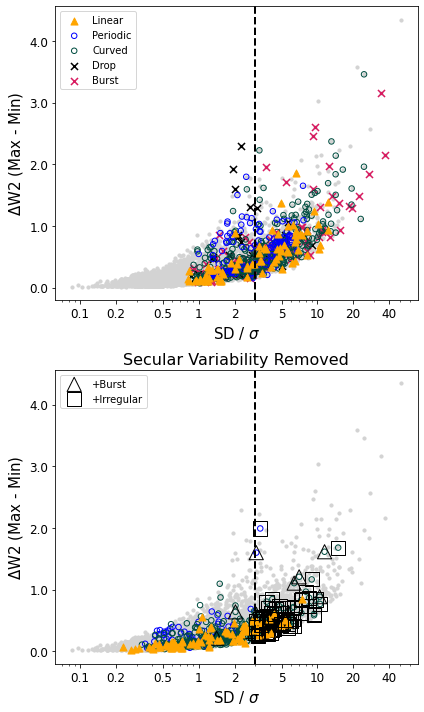

In [3]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')

ab0 = ab

var = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')

abc_dim = var[var.var_type=='drop'] 
abc_bur = var[var.var_type=='burst']
abc_cur = var[var.var_type=='curved']
abc_per = var[var.var_type=='periodic']
abc_lin = var[var.var_type=='linear']

abc_com_bur = var[var.combined_type=='burst']
abc_com_drop = var[var.combined_type=='drop']
abc_com_irr = var[(var.combined_type=='irregular') &
                 (var.var_type!='linear')]

abc_lin_irr = var[(var.combined_type=='irregular') &
                 (var.var_type=='linear')]

# abc_lin_irr = var[var.combined_type=='']

fig, ax = plt.subplots(2,1,figsize=(6,10))
ax0 = ax[0]
ax1 = ax[1]

for i in range(2):
    ax[i].scatter(ab0.sd_sdfid_w2_flux, ab0.Delta_w2,
                s = 10, c='lightgray',
    #                 label=y_label[i],
                marker='o')


y_color=['#D81B60', '#1E88E5', '#FFC107', '#004D40']


b = ax0.scatter(abc_bur.sd_sdfid_w2_flux, abc_bur.Delta_w2,
           s = 50, c=y_color[0],label='Burst',marker='x')

d = ax0.scatter(abc_dim.sd_sdfid_w2_flux, abc_dim.Delta_w2,
               s = 50, 
                c='black',
                label='Drop',marker='x')

c = ax0.scatter(abc_cur.sd_sdfid_w2_flux, abc_cur.Delta_w2,
                s = 30, 
                edgecolors=y_color[3],
                facecolors='none',
#                 c= y_color[3] ,
                label='Curved',marker='o')    

p = ax0.scatter(abc_per.sd_sdfid_w2_flux, abc_per.Delta_w2,
                s = 30, 
#                 c= 'b',
                edgecolors='b',
                facecolors='none',
                label='Periodic',marker='o')

l = ax0.scatter(abc_lin.sd_sdfid_w2_flux, abc_lin.Delta_w2,
           s = 50, 
                c='orange',
#                 edgecolors='orange',
#                 facecolors='none',                
                label='Linear'
                ,marker='^')






    


# ax0.axvline(1,linestyle='--',color='k',linewidth='2')
# circ_yso = ab[ab['Index'] == index]
# plt.scatter(circ_yso.sd_sdfid_w2_flux, circ_yso.Deltaall_w2,
#             s=500, facecolors='none', edgecolors='r')

# plot combined burst, drop, irregular
# ax0.scatter(abc_com_bur.sd_sdfid_w2_flux, abc_com_bur.Delta_w2,
#            s = 300, edgecolors='k',
#             facecolors='none',
#             label='+Burst',marker='^')
# ax0.scatter(abc_com_drop.sd_sdfid_w2_flux, abc_com_drop.Delta_w2,
#            s = 300, edgecolors='k',
#             facecolors='none',
#             label='+Drop',marker='v')
# ax0.scatter(abc_com_irr.sd_sdfid_w2_flux, abc_com_irr.Delta_w2,
#            s = 300, edgecolors='k',
#             facecolors='none',
#             label='+Irregular',marker='s')

#lin, irregular
# ax0.scatter(abc_lin_irr.sd_sdfid_w2_flux, abc_lin_irr.Delta_w2,
#            s = 300, edgecolors='k',
#             facecolors='none'
#             ,marker='s')


# abc_com_drop
# abc_com_irr

# ax0.axhline(0.5,linestyle='--',color='k', linewidth='2')
ax0.legend(handles=([l,p,c,d,b]),loc='upper left')
ax0.set_xscale('log')
# ax0.set_yscale('log')
ax0.set_xlabel('SD / $\sigma$',size=15)
ax0.set_ylabel('$\Delta$W2 (Max - Min)',size=15)
ax0.set_yticklabels(ax0.get_yticks(),size=12)
ax0.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
ax0.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40],size=12)
# ax0.set_xlim(0.05,60)
# np.array(y_color[0])
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/std_dw2_err02_scatter.pdf')


# for i in range(len(yso)):
# ax1.scatter(ab0.sd_sdfid_periodrmv, ab0.Deltaall_w2_periodrmv,
#             s = 10, c='lightgray',
# #                 label=y_label[i],
#             marker='o')

# t5 = ax1.scatter(abc_bur.sd_sdfid_periodrmv, abc_bur.Deltaall_w2_periodrmv,
#            s = 50, c=y_color[0],label='Burst',marker='x')

# t4 = ax1.scatter(abc_dim.sd_sdfid_periodrmv, abc_dim.Deltaall_w2_periodrmv,
#            s = 50, c='black',label='Drop',marker='x')
    
# t3 = ax1.scatter(abc_cur.sd_sdfid_periodrmv, abc_cur.Deltaall_w2_periodrmv,
#            s = 100, facecolors='none', edgecolors=y_color[3],
#             label='Curved',marker='o')    
    
# t2 = ax1.scatter(abc_per.sd_sdfid_periodrmv, abc_per.Deltaall_w2_periodrmv,
#               s = 100, facecolors='none', edgecolors='b',
#               #c='magenta',
#               label='Periodic',marker='o')

# t1 = ax1.scatter(abc_lin.sd_sdfid_periodrmv, abc_lin.Deltaall_w2_periodrmv,
#            s = 50, c='orange',label='Linear',marker='^')



# curved, periodic plot
ax1.scatter(abc_per.sd_sdfid_periodrmv, abc_per.Deltaw2_periodrmv, 
           s = 30, 
#             c= 'b',
            edgecolors='b',
            facecolors='none',
            label='Periodic',marker='o')

ax1.scatter(abc_cur.sd_sdfid_periodrmv, abc_cur.Deltaw2_periodrmv,
           s = 30, 
#             c= y_color[3] ,
            edgecolors=y_color[3],
            facecolors='none',
            label='Curved',marker='o')    
    
# combined variable
t1 = ax1.scatter(abc_com_bur.sd_sdfid_periodrmv, abc_com_bur.Deltaw2_periodrmv,
           s = 200, edgecolors='k',
            facecolors='none',
            label='+Burst',marker='^')
# t2 = ax1.scatter(abc_com_drop.sd_sdfid_periodrmv, abc_com_drop.Deltaw2_periodrmv,
#            s = 200, edgecolors='k',
#             facecolors='none',
#             label='+Drop',marker='v')
t3 = ax1.scatter(abc_com_irr.sd_sdfid_periodrmv, abc_com_irr.Deltaw2_periodrmv,
           s = 200, edgecolors='k',
            facecolors='none',
            label='+Irregular',marker='s')


# linear variable - use Deltaw2_linrmv
ax1.scatter(abc_lin.sd_mu_linrmv, abc_lin.Deltaw2_linrmv, 
           s = 50, c='orange',label='Linear',marker='^')
# combined variable
ax1.scatter(abc_lin_irr.sd_mu_linrmv, abc_lin_irr.Deltaw2_linrmv,
           s = 200, edgecolors='k',
            facecolors='none',
            label='+Irregular',marker='s')



ax0.axvline(3,linestyle='--',color='k',linewidth='2')
ax1.axvline(3,linestyle='--',color='k',linewidth='2')
# ax1.axhline(0.5,linestyle='--',color='k', linewidth='2')
# circ_yso = ab[ab['Index'] == index]
# plt.scatter(circ_yso.sd_sdfid_w2_flux, circ_yso.Deltaall_w2,
#             s=500, facecolors='none', edgecolors='r')

ax1.set_title('Secular Variability Removed',size=16)
ax1.legend(handles = [t1,t3],loc='upper left')
ax1.set_xscale('log')
ax1.set_xlabel('SD / $\sigma$',size=15)
ax1.set_ylabel('$\Delta$W2 (Max - Min)',size=15)
ax1.set_yticks(ax0.get_yticks())
ax1.set_yticklabels(ax1.get_yticks(),size=12)
ax1.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
ax1.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40],size=12)
# ax1.set_xlim(0.05,60)
ax1.set_ylim(ax0.get_ylim())
# ax1.set_yscale('log')
plt.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure9_2.pdf')

In [8]:
for v in vl:
    print(len(v))

77
313
118
137
34
1055


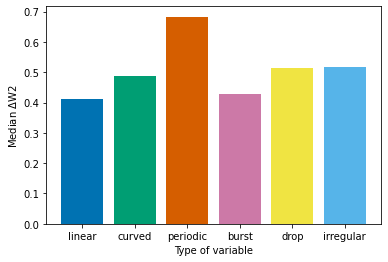

In [7]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')

var = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')


abc_dim = var[var.var_type=='drop'] 
abc_bur = var[var.var_type=='burst']
abc_cur = var[var.var_type=='curved']
abc_per = var[var.var_type=='periodic']
abc_lin = var[var.var_type=='linear']
abc_irr = var[var.var_type=='irregular']

vl = [abc_lin,abc_cur,abc_per,abc_bur,abc_dim,abc_irr]
label=['linear','curved','periodic','burst','drop','irregular']
for i,v in enumerate(vl):
    plt.bar(label[i],np.median(v.Delta_w2))

plt.xlabel('Type of variable')
plt.ylabel('Median $\Delta$W2')
# plt.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/med_w2_variable_type.pdf')

In [60]:
vl

[      Index          ra        dec   dist_sd     avg_W1  stdev_W1   avg_eW1  \
 39       85   85.700583  -9.771250  0.045816  11.971171  0.383569  0.029431   
 46      103   85.457833  -9.631083  0.110909  14.053143  0.088783  0.075003   
 55      125   85.503625  -9.420889  0.060942  12.696652  0.057114  0.035323   
 89      221   85.383417  -8.669361  0.098322  13.315020  0.176199  0.055306   
 98      246   85.743167  -8.628750  0.115547  13.744483  0.070139  0.064519   
 ...     ...         ...        ...       ...        ...       ...       ...   
 1647   6404  277.481667   1.241944  0.071639   9.200856  0.257858  0.034456   
 1652   6424  277.495833   1.206944  0.098878  13.234590  0.199021  0.067114   
 1681  10042   63.898674  28.794822  0.094167  13.767459  0.067957  0.064024   
 1687  10094   64.944061  27.215336  0.054788  10.978057  0.215416  0.022653   
 1691  10111   65.293285  27.027016  0.056033   9.734787  0.085999  0.020100   
 
          avg_W2  stdev_W2   avg_eW2  

Text(0, 0.5, 'Median $\\Delta$W2')

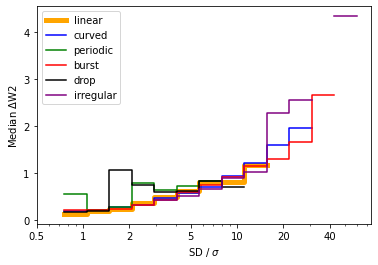

In [4]:
# median dw2 by sd/mu?

ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')

var = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')

color=['orange','b','g','r','k','purple']
grid = np.logspace(np.log10(0.1),np.log10(60),20)
vl_dic=dict()

abc_dim = var[var.var_type=='drop'] 
abc_bur = var[var.var_type=='burst']
abc_cur = var[var.var_type=='curved']
abc_per = var[var.var_type=='periodic']
abc_lin = var[var.var_type=='linear']
abc_irr = var[var.var_type=='irregular']





vl = [abc_lin,abc_cur,abc_per,abc_bur,abc_dim,abc_irr]
label=['linear','curved','periodic','burst','drop','irregular']

for n,vln in enumerate(vl):
    vl_dic[label[n]] = list()
    for i in range(len(grid)-1):

        vl_dic[label[n]].append(vln[(vln['sd_sdfid_w2_flux'] < grid[i+1]) & 
                (vln['sd_sdfid_w2_flux'] > grid[i])].Delta_w2.median())
    
    
    if label[n] == 'linear':
        plt.step(grid[1:],vl_dic[label[n]],label=label[n],color=color[n],lw=5)
    else:
        plt.step(grid[1:],vl_dic[label[n]],label=label[n],color=color[n])

plt.xscale('log')
plt.xticks([0.5,1,2,5,10,20,40],labels=[0.5,1,2,5,10,20,40])
plt.legend()
plt.xlabel('SD / $\sigma$')
plt.ylabel('Median $\Delta$W2')

In [40]:
abc_cur_agb = var[(var.var_type=='curved')]
                  
len(abc_cur_agb), len(abc_cur)

(313, 311)

Text(0, 0.5, 'Median $\\Delta$W2')

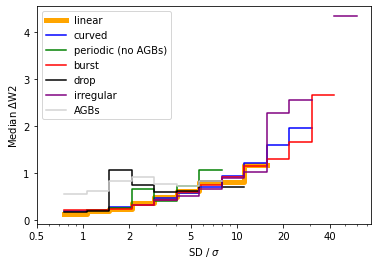

In [45]:
# agb removed version
                                       
# median dw2 by sd/mu?

ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')

var = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')

color=['orange','b','g','r','k','purple','lightgray']
grid = np.logspace(np.log10(0.1),np.log10(60),20)
vl_dic=dict()

abc_dim = var[var.var_type=='drop'] 
abc_bur = var[var.var_type=='burst']

#without agbs
cut=0.145

hamp = var[
#            ((var.var_type=='curved') |     # no agbs are curved!
           (var.var_type == 'periodic')  &
           (var['class'] == 'PMS+E') &
           (var.amp/var.ls_meanjy >= cut)
          ]
abc_cur = var[(var.var_type=='curved')]
abc_per = var[(var.var_type=='periodic') &
             (var['Index'].isin(np.setdiff1d(var['Index'].values,hamp['Index'].values)))
             ]
abc_agb = var[(var.var_type=='periodic') &
             (var['Index'].isin(hamp['Index'].values))
             ]

abc_lin = var[var.var_type=='linear']
abc_irr = var[var.var_type=='irregular']





vl = [abc_lin,abc_cur,abc_per,abc_bur,abc_dim,abc_irr,abc_agb]
label=['linear','curved','periodic (no AGBs)','burst','drop','irregular','AGBs']

for n,vln in enumerate(vl):
    vl_dic[label[n]] = list()
    for i in range(len(grid)-1):

        vl_dic[label[n]].append(vln[(vln['sd_sdfid_w2_flux'] < grid[i+1]) & 
                (vln['sd_sdfid_w2_flux'] > grid[i])].Delta_w2.median())
    
    
    if label[n] == 'linear':
        plt.step(grid[1:],vl_dic[label[n]],label=label[n],color=color[n],lw=5)
    else:
        plt.step(grid[1:],vl_dic[label[n]],label=label[n],color=color[n])

plt.xscale('log')
plt.xticks([0.5,1,2,5,10,20,40],labels=[0.5,1,2,5,10,20,40])
plt.legend()
plt.xlabel('SD / $\sigma$')
plt.ylabel('Median $\Delta$W2')

In [52]:
a4 = abc_per[abc_per.sd_sdfid_w2_flux == abc_per.sd_sdfid_w2_flux.max()]
a4['class']

995    D
Name: class, dtype: object

In [121]:
ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2.csv')

ab0 = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
         (ab.Delta_w2 > 3*ab.avg_eW2) &
#          (ab.sd_sdfid_w2_flux > 3) &
         (ab['class']) ]

ab0['class'].value_counts()

D                  2344
E                   551
P                   429
F                   142
full                122
I                    29
FP                    7
transitional          4
evolved               4
I?                    3
III                   3
II                    1
debris/ev trans       1
Name: class, dtype: int64

initial: 3640
linear
29
19
7
lin_total 55
per:  3
per:  18
per:  56
per_total:  77
cur:  75
cur:  119
cur:  21
cur_total:  215
bur:  19
bur:  112
bur:  7
bur_total:  138
dim:  3
dim:  28
dim:  6
dim_total:  37
sources :  55 77 215 138 37
abc_irr_3:  916
irr:  208 648 60 916


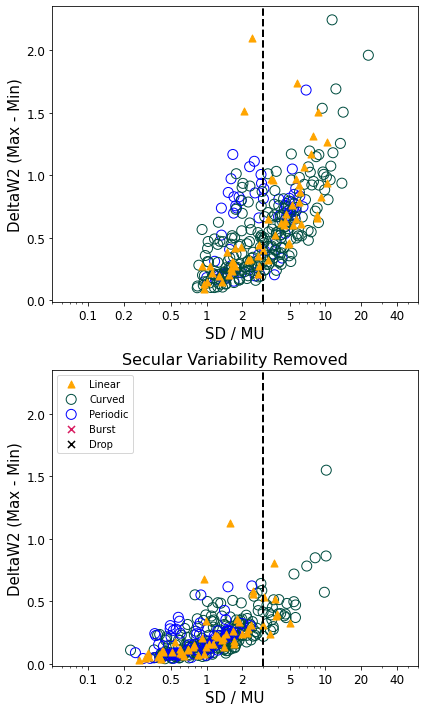

In [33]:
## new secularity plot

ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2.csv')

ab0 = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
#          (ab.Delta_w2 > 3*ab.avg_eW2) &
#          (ab.sd_sdfid_w2_flux > 3) &
         (ab['class']) ]


abc = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
         (ab.Delta_w2 > 3*ab.avg_eW2) &
#          (ab.sd_sdfid_w2_flux > 3) &
         (ab['class']) ]
#          & (ab['period'] > 200)]  #200 밑에인게 한개 있었다... 

print('initial:', len(abc))
# print('original:', len(abcd) )


pr = abc[(abc['class'] == "P") |
        (abc['class'] == "F") |
        (abc['class'] == "FP") |
        (abc['class'] == "0") |
        (abc['class'] == "I") |
        (abc['class'] == "I?") ]


di = abc[(abc['class'] == "D") |
        (abc['class'] == "II") |
        (abc['class'] == "full") |
        (abc['class'] == "full?") |
        (abc['class'] == "debris/ev trans") |
        (abc['class'] == "transitional") |
        (abc['class'] == "evolved") |
        (abc['class'] == "ev or trans") 
        ]

ev = abc[(abc['class'] == "E") |
        (abc['class'] == "III") 
        ]


# by LSP
print('linear')
print(len(pr[(pr.baluev_fap*200/pr.period<0.01) &     #26
   (pr.period >= 4000) &
    (pr.linear_fap_w2 < 1e-4)])) # 50
print(len(di[(di.baluev_fap*200/di.period<0.01) &     #19
   (di.period >= 4000) &
    (di.linear_fap_w2 < 1e-4)])) # 62
print(len(ev[(ev.baluev_fap*200/ev.period<0.01) &     #7
   (ev.period >= 4000) &
    (ev.linear_fap_w2 < 1e-4)])) # 14 
abc_lin = abc[(abc.baluev_fap*200/abc.period<0.01) &    #52
              (abc.period >= 4000) & 
              (abc.linear_fap_w2 < 1e-4)]
print('lin_total',len(abc_lin))
# abc_lin.to_csv('/home/wooseok/WISE_data/csvfiles/typeI_linear_variables.csv') #total 126
# print(abc_lin.s_index)

# FAP (LLSF) < 0.001 - FAP(LSP) < 0.01
#                    - FAP(LSP) > 0.01 - 있나??
#                                      - 모두 4000 + 하나 2800, 
#                                         얘들은 그럼 irregular?
#                                         - 0.001

# abc_lin[abc_lin.period < 3000].s_index.values

# not by LSP but linear?
# abc_lin_nop = abc[(abc.baluev_fap*200/abc.period > 0.01) &
#                  (abc.linear_fap_w2<0.0001)]
# abc_lin_nop.s_index.values
# abc_lin_nop

# abc_more_lin = abc[(abc.linear_fap_w2 < 0.001) &
#                   (abc.period < 5000) &
#                   (abc.period > 4000)]
# abc_more_lin.s_index.values


# abc_not_lin = abc[(abc.linear_fap_w2 > 0.001) &
#                   (abc.baluev_fap*200/abc.period < 0.01) &
#                   (abc.period > 4000)]
# abc_not_lin.period.value_counts()
# abc_not_lin.s_index.values
# abc_lin = abc[abc.linear_fap_w2 < 0.0001]
# abc_lin

# abc_lin_nop.period
# print(abc_lin_nop.baluev_fap*200/abc_lin_nop.period)
# abc_lin_nop


#Type II - period
print('per: ',len(pr[(pr.baluev_fap*200/pr.period<0.01) & # 4
  (pr.period > 200) & (pr.period < 1000)]))
print('per: ',len(di[(di.baluev_fap*200/di.period<0.01) & # 18 #changed
  (di.period > 200) & (di.period < 1000)]))
print('per: ',len(ev[(ev.baluev_fap*200/ev.period<0.01) & # 57 # changed
  (ev.period > 200) & (ev.period < 1000)]))

abc_per = abc[(abc.baluev_fap*200/abc.period<0.01) & # total 79 #changed
  (abc.period > 200 ) & (abc.period < 1000)] 
print('per_total: ',len(abc_per))
# abc_per.to_csv('/home/wooseok/WISE_data/csvfiles/typeII_periodic_variables.csv')


#Type III - curved
print('cur: ', len(pr[(pr.baluev_fap*200/pr.period<0.01) & 
                      (
                          
                      (  (pr.period >= 1000) & (pr.period < 4000)  )
                       |  #or
                      (  (pr.linear_fap_w2 > 1e-4) & (pr.period == 4000)) 
                          
                      )
                       ]))  # 4000 but not linear
                      
print('cur: ', len(di[(di.baluev_fap*200/di.period<0.01) & 
                      (
                          
                      (  (di.period >= 1000) & (di.period < 4000)  )
                       |  #or
                      (  (di.linear_fap_w2 > 1e-4) & (di.period == 4000)) 
                          
                      )
                       ])) # 4000 but not linear
                      
print('cur: ', len(ev[(ev.baluev_fap*200/ev.period<0.01) & 
                      (
                          
                      (  (ev.period >= 1000) & (ev.period < 4000)  )
                       |  #or
                      (  (ev.linear_fap_w2 > 1e-4) & (ev.period == 4000)) 
                          
                      )
                       ]))   # 4000 but not linear

abc_cur = abc[(abc.baluev_fap*200/abc.period<0.01) & # 48 # changed
                      ( # 2 conditions
                          
                      (  (abc.period >= 1000) & (abc.period < 4000)  )
                       |  #or
                      (  (abc.linear_fap_w2 > 1e-4) & (abc.period == 4000)) 
                          
                      )
                       ]
print('cur_total: ', len(abc_cur))
# abc_cur.to_csv('/home/wooseok/WISE_data/csvfiles/typeIII_curved_variables.csv') #total 

abc_sec = pa.concat([abc_lin, abc_per, abc_cur]) #no duplication
# abc.set_index('s_index')
abc_stoch = abc.set_index('s_index').drop(abc_sec.s_index.values)

prs = abc_stoch[(abc_stoch['class'] == "P") |
        (abc_stoch['class'] == "F") |
        (abc_stoch['class'] == "FP") |
        (abc_stoch['class'] == "0") |
        (abc_stoch['class'] == "I") |
        (abc_stoch['class'] == "I?") ]


dis = abc_stoch[(abc_stoch['class'] == "D") |
        (abc_stoch['class'] == "II") |
        (abc_stoch['class'] == "full") |
        (abc_stoch['class'] == "full?") |
        (abc_stoch['class'] == "debris/ev trans") |
        (abc_stoch['class'] == "transitional") |
        (abc_stoch['class'] == "evolved") |
        (abc_stoch['class'] == "ev or trans") 
        ]

evs = abc_stoch[(abc_stoch['class'] == "E") |
        (abc_stoch['class'] == "III") 
        ]



#Type IV - burst
# max-median / deltaw2 > 0.8 , deltaw2 > 0.5
print('bur: ', len(prs[((prs.median_W2-prs.max_W2)/prs.Delta_w2 > 0.8)])) # & # 17
#   (pr.Delta_w2 > 0.5)]))
print('bur: ', len(dis[((dis.median_W2-dis.max_W2)/dis.Delta_w2 > 0.8)])) # & # 37
#   (di.Delta_w2 > 0.5)]))
print('bur: ', len(evs[((evs.median_W2-evs.max_W2)/evs.Delta_w2 > 0.8)])) # & # 4
#   (ev.Delta_w2 > 0.5)]))

abc_bur = abc_stoch[((abc_stoch.median_W2-abc_stoch.max_W2)/abc_stoch.Delta_w2 > 0.8)]# & # total 58
#   (abc.Delta_w2 > 0.5)]
print('bur_total: ', len(abc_bur))
# abc_bur.to_csv('/home/wooseok/WISE_data/csvfiles/typeIV_burst_variables.csv')


#Type V - dimming
# median - min / deltaw2 > 0.8, deltaw2 > 0.5
print('dim: ',len(prs[(abs(prs.median_W2-prs.min_W2)/prs.Delta_w2 > 0.8)]))# & # 3
#   (pr.Delta_w2 > 0.5)]))
print('dim: ',len(dis[(abs(dis.median_W2-dis.min_W2)/dis.Delta_w2 > 0.8)]))# & # 13
#   (di.Delta_w2 > 0.5)]))
print('dim: ',len(evs[(abs(evs.median_W2-evs.min_W2)/evs.Delta_w2 > 0.8)]))# & # 0
#   (ev.Delta_w2 > 0.5)]))

abc_dim = abc_stoch[(abs(abc_stoch.median_W2-abc_stoch.min_W2)/abc_stoch.Delta_w2 > 0.8)]# & # total 16
#               (abs(abc.median_W2-abc.min_W2)/abc.Delta_w2 < 0.8) &
#               (abc.Delta_w2 > 0.5)]
print('dim_total: ',len(abc_dim))
# abc_dim.to_csv('/home/wooseok/WISE_data/csvfiles/typeV_dim_variables.csv')

#Type VI - irregular
# lin per cur bur dim... else.

abc_lin = abc_lin.set_index('s_index')
abc_per = abc_per.set_index('s_index')
abc_cur = abc_cur.set_index('s_index')

abc_aa = pa.concat([abc_lin, abc_per, abc_cur, abc_bur, abc_dim],verify_integrity=False)

print('sources : ',len(abc_lin), len(abc_per), len(abc_cur), len(abc_bur), len(abc_dim))

abc_aa.index

abc_irr = abc.set_index('s_index').drop(abc_aa.index.values)
abc_irr_3 = abc_irr[abc_irr.sd_sdfid_w2_flux > 3]
print('abc_irr_3: ',len(abc_irr_3))

# abc_irr_3.to_csv('/home/wooseok/WISE_data/csvfiles/typeVI_irr_variables.csv')


pr_irr = abc_irr_3[(abc_irr_3['class'] == "P") |
            (abc_irr_3['class'] == "F") |
            (abc_irr_3['class'] == "FP") |
            (abc_irr_3['class'] == "0") |
            (abc_irr_3['class'] == "I") |
            (abc_irr_3['class'] == "I?") ]


di_irr = abc_irr_3[(abc_irr_3['class'] == "D") |
        (abc_irr_3['class'] == "II") |
        (abc_irr_3['class'] == "full") |
        (abc_irr_3['class'] == "full?") |
        (abc_irr_3['class'] == "debris/ev trans") |
        (abc_irr_3['class'] == "transitional") |
        (abc_irr_3['class'] == "evolved") |
        (abc_irr_3['class'] == "ev or trans") 
        ]

ev_irr = abc_irr_3[(abc_irr_3['class'] == "E") |
        (abc_irr_3['class'] == "III") 
        ]

print('irr: ', len(pr_irr), len(di_irr), len(ev_irr), len(abc_irr_3))


######plot#####
# yso = [pr,di,ev]
# y_label = ['P', 'D', 'PMS+E']

# ab0 wise selection
# abc - variable
y_color=['#D81B60', '#1E88E5', '#FFC107', '#004D40']
#         ['#ee00b8', '#f4af1b', '#057dd1']
y_marker = ['o','o','o']
# ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/taurus_gould_obsb_outcut_NEOWISE_lsp200_w2_more5_onlyg.csv')
# print(ab.columns)



fig, ax = plt.subplots(2,1,figsize=(6,10))
ax0 = ax[0]
ax1 = ax[1]

# for i in range(2):
# ax0.scatter(ab0.sd_sdfid_w2_flux, ab0.Delta_w2,
#             s = 10, c='lightgray',
# #                 label=y_label[i],
#             marker='o')





# ax0.scatter(abc_bur.sd_sdfid_w2_flux, abc_bur.Delta_w2,
#            s = 50, c=y_color[0],label='Burst',marker='x')

# ax0.scatter(abc_dim.sd_sdfid_w2_flux, abc_dim.Delta_w2,
#            s = 50, c='black',label='Drop',marker='x')

ax0.scatter(abc_per.sd_sdfid_w2_flux, abc_per.Delta_w2,
           s = 100, facecolors='none', edgecolors='b',label='Periodic',marker='o')

ax0.scatter(abc_cur.sd_sdfid_w2_flux, abc_cur.Delta_w2,
           s = 100, facecolors='none', edgecolors=y_color[3] ,label='Curved',marker='o')    
    
ax0.scatter(abc_lin.sd_sdfid_w2_flux, abc_lin.Delta_w2,
           s = 50, c='orange',label='Linear',marker='^')

# ax0.axvline(1,linestyle='--',color='k',linewidth='2')
# circ_yso = ab[ab['Index'] == index]
# plt.scatter(circ_yso.sd_sdfid_w2_flux, circ_yso.Deltaall_w2,
#             s=500, facecolors='none', edgecolors='r')

# ax0.axhline(0.5,linestyle='--',color='k', linewidth='2')
# ax0.legend(loc='lower right')
ax0.set_xscale('log')
ax0.set_xlabel('SD / MU',size=15)
ax0.set_ylabel('DeltaW2 (Max - Min)',size=15)
ax0.set_yticklabels(ax0.get_yticks(),size=12)
ax0.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
ax0.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40],size=12)
# ax0.set_xlim(0.05,60)
# np.array(y_color[0])
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/std_dw2_err02_scatter.pdf')


# for i in range(len(yso)):
# ax1.scatter(ab0.sd_sdfid_periodrmv, ab0.Deltaall_w2_periodrmv,
#             s = 10, c='lightgray',
# #                 label=y_label[i],
#             marker='o')

# t5 = ax1.scatter(abc_bur.sd_sdfid_periodrmv, abc_bur.Deltaall_w2_periodrmv,
#            s = 50, c=y_color[0],label='Burst',marker='x')

# t4 = ax1.scatter(abc_dim.sd_sdfid_periodrmv, abc_dim.Deltaall_w2_periodrmv,
#            s = 50, c='black',label='Drop',marker='x')
    
t3 = ax1.scatter(abc_cur.sd_sdfid_periodrmv, abc_cur.Deltaall_w2_periodrmv,
           s = 100, facecolors='none', edgecolors=y_color[3],
            label='Curved',marker='o')    
    
t2 = ax1.scatter(abc_per.sd_sdfid_periodrmv, abc_per.Deltaall_w2_periodrmv,
              s = 100, facecolors='none', edgecolors='b',
              #c='magenta',
              label='Periodic',marker='o')

t1 = ax1.scatter(abc_lin.sd_sdfid_periodrmv, abc_lin.Deltaall_w2_periodrmv,
           s = 50, c='orange',label='Linear',marker='^')





ax0.axvline(3,linestyle='--',color='k',linewidth='2')
ax1.axvline(3,linestyle='--',color='k',linewidth='2')
# ax1.axhline(0.5,linestyle='--',color='k', linewidth='2')
# circ_yso = ab[ab['Index'] == index]
# plt.scatter(circ_yso.sd_sdfid_w2_flux, circ_yso.Deltaall_w2,
#             s=500, facecolors='none', edgecolors='r')

ax1.set_title('Secular Variability Removed',size=16)
ax1.legend(handles = [t1,t3,t2,t5,t4],loc='upper left')
ax1.set_xscale('log')
ax1.set_xlabel('SD / MU',size=15)
ax1.set_ylabel('DeltaW2 (Max - Min)',size=15)
ax1.set_yticks(ax0.get_yticks())
ax1.set_yticklabels(ax1.get_yticks(),size=12)
ax1.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
ax1.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40],size=12)
# ax1.set_xlim(0.05,60)
ax1.set_ylim(ax0.get_ylim())
plt.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/secular_removed_scatter_v3.pdf')

Index(['s_index', 'dist_sd', 'ra', 'dec', 'avg_W1', 'stdev_W1', 'avg_eW1',
       'avg_W2', 'stdev_W2', 'avg_eW2', 'N_w1', 'N_w2', 'slope_w1', 'slope_w2',
       'sd_sdfid_w1_flux', 'sd_sdfid_w2_flux', 'sd_sdfid_w1_mag',
       'sd_sdfid_w2_mag', 'Delta_w1', 'Delta_w2', 'Delta_w1_flux',
       'Delta_w2_flux', 'class', 'catalogue', 'Sw1', 'DeltaSw1', 'Sw2',
       'DeltaSw2', 'SDw1', 'SDfidw1', 'SDw2', 'SDfidw2', 'chi2_mean_w1',
       'chi2_wmean_w1', 'chi2_slope_w1', 'chi2_mean_w2', 'chi2_wmean_w2',
       'chi2_slope_w2', 'linear_fap_w1', 'linear_fap_w2', 'center_mag_w1',
       'center_mag_w2', 'max_W1', 'min_W1', 'median_W1', 'max_W2', 'min_W2',
       'median_W2', 'col1', 'index', 'period', 'baluev_fap', 'power', 'amp',
       'sinamp', 'ls_meanjy', 'sd_sdfid_periodrmv', 'sd_periodrmv',
       'chi2_period_w2', 'linear_fap_periodrmv', 'Deltaall_w2_periodrmv',
       'period_w1', 'baluev_fap_w1', 'power_w1', 'amp_w1', 'sinamp_w1',
       'ls_meanjy_w1', 'sd_sdfid_periodrmv_w1', 's

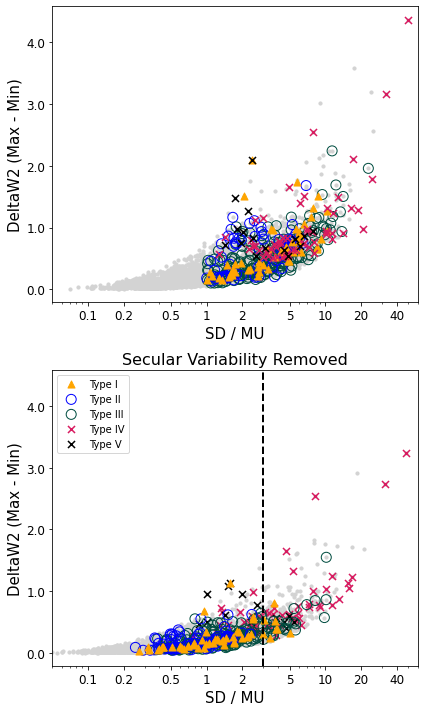

In [193]:
## secularity plot

ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2.csv')

# print(ab.columns)


abc = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
         (ab.Delta_w2 > 3*ab.avg_eW2) &
#          (ab.sd_sdfid_w2_flux > 3) &
         (ab['class']) ]
abc = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
         (ab.sd_sdfid_w2_flux > 1) &
         (ab['class']) ]
#          & (ab['period'] > 200)]  #200 밑에인게 한개 있었다... 

var = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
         (ab.sd_sdfid_w2_flux > 1) &
         (ab['class']) &
         (ab['period'] > 200)]

vard = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
         (ab.sd_sdfid_w2_flux > 1) &
         (ab['class'])]


# print('>3 : ', len(abc))
pr = abc[(abc['class'] == "P") |
        (abc['class'] == "F") |
        (abc['class'] == "FP") |
        (abc['class'] == "0") |
        (abc['class'] == "I") |
        (abc['class'] == "I?") ]


di = abc[(abc['class'] == "D") |
        (abc['class'] == "II") |
        (abc['class'] == "full") |
        (abc['class'] == "full?") |
        (abc['class'] == "debris/ev trans") |
        (abc['class'] == "transitional") |
        (abc['class'] == "evolved") |
        (abc['class'] == "ev or trans") 
        ]

ev = abc[(abc['class'] == "E") |
        (abc['class'] == "III") 
        ]


prv = var[(var['class'] == "P") |
        (var['class'] == "F") |
        (var['class'] == "FP") |
        (var['class'] == "0") |
        (var['class'] == "I") |
        (var['class'] == "I?") ]

div = var[(var['class'] == "D") |
        (var['class'] == "II") |
        (var['class'] == "full") |
        (var['class'] == "full?") |
        (var['class'] == "debris/ev trans") |
        (var['class'] == "transitional") |
        (var['class'] == "evolved") |
        (var['class'] == "ev or trans") 
        ]

evv = var[(var['class'] == "E") |
        (var['class'] == "III") 
        ]



abc_linear = var[(var.baluev_fap*200/var.period<0.01) &     
                   (var.period >= 4000) &
                   (var.linear_fap_w2 < 1e-4)]

abc_period = var[(var.baluev_fap*200/var.period<0.01) & 
                (var.period > 200) & (var.period < 1000)]

abc_curved = var[(var.baluev_fap*200/var.period<0.01) & 
                      (
                          
                      (  (var.period >= 1000) & (var.period < 4000)  )
                       |  #or
                      (  (var.linear_fap_w2 > 1e-4) & (var.period == 4000)) 
                          
                      )
                ]

abc_bur = vard[((vard.median_W2-vard.max_W2)/vard.Delta_w2 > 0.8) & # total 58
              (var.Delta_w2 > 0.5)]
abc_dim = vard[(abs(vard.median_W2-vard.min_W2)/vard.Delta_w2 > 0.8) & # total 16
              (vard.Delta_w2 > 0.5)]



# abc_period = abc[(abc['mod_baluev_fap'] < 0.001) & (abc['linear_fap_w2'] >= 0.001)]
# abc_linear = abc[abc['linear_fap_w2'] < 0.001]



yso = [pr,di,ev]
y_label = ['P', 'D', 'PMS+E']
y_color=['#D81B60', '#1E88E5', '#FFC107', '#004D40']
#         ['#ee00b8', '#f4af1b', '#057dd1']
y_marker = ['o','o','o']
# ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/taurus_gould_obsb_outcut_NEOWISE_lsp200_w2_more5_onlyg.csv')
# print(ab.columns)



fig, ax = plt.subplots(2,1,figsize=(6,10))
ax0 = ax[0]
ax1 = ax[1]

for i in range(len(yso)):
    ax0.scatter(yso[i].sd_sdfid_w2_flux, yso[i].Delta_w2,
                s = 10, c='lightgray',
#                 label=y_label[i],
                marker=y_marker[i])

ax0.scatter(abc_curved.sd_sdfid_w2_flux, abc_curved.Delta_w2,
           s = 100, facecolors='none', edgecolors=y_color[3] ,label='Type III',marker='o')    
    
ax0.scatter(abc_period.sd_sdfid_w2_flux, abc_period.Delta_w2,
           s = 100, facecolors='none', edgecolors='b',label='Type II',marker='o')

ax0.scatter(abc_linear.sd_sdfid_w2_flux, abc_linear.Delta_w2,
           s = 50, c='orange',label='Type I',marker='^')

ax0.scatter(abc_bur.sd_sdfid_w2_flux, abc_bur.Delta_w2,
           s = 50, c=y_color[0],label='Type IV',marker='x')

ax0.scatter(abc_dim.sd_sdfid_w2_flux, abc_dim.Delta_w2,
           s = 50, c='black',label='Type V',marker='x')


# ax0.axvline(1,linestyle='--',color='k',linewidth='2')
# circ_yso = ab[ab['Index'] == index]
# plt.scatter(circ_yso.sd_sdfid_w2_flux, circ_yso.Deltaall_w2,
#             s=500, facecolors='none', edgecolors='r')

# ax0.axhline(0.5,linestyle='--',color='k', linewidth='2')
# ax0.legend(loc='lower right')
ax0.set_xscale('log')
ax0.set_xlabel('SD / MU',size=15)
ax0.set_ylabel('DeltaW2 (Max - Min)',size=15)
ax0.set_yticklabels(ax0.get_yticks(),size=12)
ax0.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
ax0.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40],size=12)
ax0.set_xlim(0.05,60)
# np.array(y_color[0])
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/std_dw2_err02_scatter.pdf')


for i in range(len(yso)):
    ax1.scatter(yso[i].sd_sdfid_periodrmv, yso[i].Deltaall_w2_periodrmv,
                s = 10, c='lightgray',
#                 label=y_label[i],
                marker=y_marker[i])

t5 = ax1.scatter(abc_bur.sd_sdfid_periodrmv, abc_bur.Deltaall_w2_periodrmv,
           s = 50, c=y_color[0],label='Type IV',marker='x')

t4 = ax1.scatter(abc_dim.sd_sdfid_periodrmv, abc_dim.Deltaall_w2_periodrmv,
           s = 50, c='black',label='Type V',marker='x')
    
t3 = ax1.scatter(abc_curved.sd_sdfid_periodrmv, abc_curved.Deltaall_w2_periodrmv,
           s = 100, facecolors='none', edgecolors=y_color[3],
            label='Type III',marker='o')    
    
t2 = ax1.scatter(abc_period.sd_sdfid_periodrmv, abc_period.Deltaall_w2_periodrmv,
              s = 100, facecolors='none', edgecolors='b',
              #c='magenta',
              label='Type II',marker='o')

t1 = ax1.scatter(abc_linear.sd_sdfid_periodrmv, abc_linear.Deltaall_w2_periodrmv,
           s = 50, c='orange',label='Type I',marker='^')





# ax1.axvline(1,linestyle='--',color='k',linewidth='2')
ax1.axvline(3,linestyle='--',color='k',linewidth='2')
# ax1.axhline(0.5,linestyle='--',color='k', linewidth='2')
# circ_yso = ab[ab['Index'] == index]
# plt.scatter(circ_yso.sd_sdfid_w2_flux, circ_yso.Deltaall_w2,
#             s=500, facecolors='none', edgecolors='r')

ax1.set_title('Secular Variability Removed',size=16)
ax1.legend(handles = [t1,t2,t3,t5,t4],loc='upper left')
ax1.set_xscale('log')
ax1.set_xlabel('SD / MU',size=15)
ax1.set_ylabel('DeltaW2 (Max - Min)',size=15)
ax1.set_yticks(ax0.get_yticks())
ax1.set_yticklabels(ax1.get_yticks(),size=12)
ax1.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
ax1.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40],size=12)
ax1.set_xlim(0.05,60)
ax1.set_ylim(ax0.get_ylim())


# pr1 = pr[(pr.sd_sdfid_w2_flux > 3)]
# di1 = di[(di.sd_sdfid_w2_flux > 3)]
# ev1 = ev[(ev.sd_sdfid_w2_flux > 3)]

# p_pr1 = pr1[(pr1['mod_baluev_fap'] < 0.001) & (pr1['linear_fap_w2'] >= 0.001)]          
# p_di1 = di1[(di1['mod_baluev_fap'] < 0.001) & (di1['linear_fap_w2'] >= 0.001)]    
# p_ev1 = ev1[(ev1['mod_baluev_fap'] < 0.001) & (ev1['linear_fap_w2'] >= 0.001)]    

# l_pr1 = pr1[pr1['linear_fap_w2'] < 0.001]
# l_di1 = di1[di1['linear_fap_w2'] < 0.001]
# l_ev1 = ev1[ev1['linear_fap_w2'] < 0.001]

# pr2 = pr[(pr.sd_sdfid_periodrmv > 3)]
# di2 = di[(di.sd_sdfid_periodrmv > 3)]
# ev2 = ev[(ev.sd_sdfid_periodrmv > 3)]

# p_pr2 = pr2[(pr2['mod_baluev_fap'] < 0.001) & (pr2['linear_fap_w2'] >= 0.001)]          
# p_di2 = di2[(di2['mod_baluev_fap'] < 0.001) & (di2['linear_fap_w2'] >= 0.001)]    
# p_ev2 = ev2[(ev2['mod_baluev_fap'] < 0.001) & (ev2['linear_fap_w2'] >= 0.001)]    

# l_pr2 = pr2[pr2['linear_fap_w2'] < 0.001]
# l_di2 = di2[di2['linear_fap_w2'] < 0.001]
# l_ev2 = ev2[ev2['linear_fap_w2'] < 0.001]


# ysos = ['P', 'D', 'E']
# list1 = [len(pr1)/len(pr), len(di1)/len(di), len(ev1)/len(ev)]
# plist1 = [len(p_pr1)/len(pr), len(p_di1)/len(di), len(p_ev1)/len(ev)]
# llist1 = [len(l_pr1)/len(pr), len(l_di1)/len(di), len(l_ev1)/len(ev)]
# list2 = [len(pr2)/len(pr), len(di2)/len(di), len(ev2)/len(ev)]
# plist2 = [len(p_pr2)/len(pr), len(p_di2)/len(di), len(p_ev2)/len(ev)]
# llist2 = [len(l_pr2)/len(pr), len(l_di2)/len(di), len(l_ev2)/len(ev)]


# ### visualize bbox ###
# # ax0.add_patch(plt.Rectangle((.05, .5), .4, .4, ls="--", ec="c", fc="None",
# #                            transform=ax0.transAxes))

# axin1 = inset_axes(ax0, width='100%', height='100%',
#                    loc=2,
#                   bbox_to_anchor=(.08, .5, .4, .4),
#                   bbox_transform = ax0.transAxes)
# axin2 = inset_axes(ax1, width='100%', height='100%',
#                    loc=2,
#                   bbox_to_anchor=(.08, .5, .4, .4),
#                   bbox_transform = ax1.transAxes)
# # axin1.

# axin1.bar(ysos,list1, color='lightgray')
# axin1.bar(ysos,plist1, color='b')
# axin1.bar(ysos,llist1, color='orange')
# axin1.set_title('SD/MU > 3')

# # ax[0,1].bar(ysos,list1, color='lightgray')
# # ax[0,1].bar(ysos,plist1, color='b')
# # ax[0,1].bar(ysos,llist1, color='orange')
# # ax[0,1].set_title('SD/MU > 3')

# axin2.bar(ysos,list2, color='lightgray')
# axin2.bar(ysos,plist2, color='b')
# axin2.bar(ysos,llist2, color='orange')
# axin2.set_title('SD/MU > 3')


# ax[1,1].bar(ysos,list2, color='lightgray')
# ax[1,1].bar(ysos,plist2, color='b')
# ax[1,1].bar(ysos,llist2, color='orange')
# ax[1,1].set_title('SD/MU > 3')
plt.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/secular_removed_scatter_v3.pdf')
# previous one - v2

[3762,
 3802,
 3836,
 3875,
 3884,
 3908,
 3949,
 4068,
 4085,
 4176,
 4508,
 4519,
 4594,
 4781,
 4825,
 4892,
 4961,
 5005,
 5021,
 5022,
 5149,
 5241,
 5247,
 5257,
 5258,
 5267,
 5369,
 5382,
 5401,
 5413,
 5663,
 5686,
 5707,
 5778,
 5808,
 5814,
 5858,
 5864,
 5865,
 5866,
 5874,
 5888,
 5908,
 5909,
 5941,
 5961,
 5982,
 6013,
 6017,
 6018,
 6024,
 6029,
 6108,
 6134,
 6228,
 6264,
 6265,
 6267,
 6283,
 6300,
 6301,
 6315,
 6375,
 6384,
 6391,
 6399,
 6412,
 6432,
 6450,
 10019,
 10128,
 10409]

### FUor/VeLLOs plot

In [42]:
vello_match=[3762,
3802,
3836,
3875,
3884,
3908,
3949,
4068,
4071,
4085,
4176,
4508,
4519,
4594,
4781,
4825,
4892,
4961,
5005,
5021,
5022,
5046,
5149,
5241,
5247,
5257,
5258,
5267,
5369,
5382,
5401,
5413,
5663,
5686,
5707,
5709,
5778,
5808,
5814,
5858,
5864,
5865,
5866,
5874,
5888,
5908,
5909,
5941,
5961,
5982,
6013,
6017,
6018,
6024,
6029,
6108,
6109,
6134,
6228,
6264,
6265,
6267,
6283,
6300,
6301,
6315,
6375,
6391,
6399,
6450,
10019,
10128,
10409]

vello_match

[3762,
 3802,
 3836,
 3875,
 3884,
 3908,
 3949,
 4068,
 4071,
 4085,
 4176,
 4508,
 4519,
 4594,
 4781,
 4825,
 4892,
 4961,
 5005,
 5021,
 5022,
 5046,
 5149,
 5241,
 5247,
 5257,
 5258,
 5267,
 5369,
 5382,
 5401,
 5413,
 5663,
 5686,
 5707,
 5709,
 5778,
 5808,
 5814,
 5858,
 5864,
 5865,
 5866,
 5874,
 5888,
 5908,
 5909,
 5941,
 5961,
 5982,
 6013,
 6017,
 6018,
 6024,
 6029,
 6108,
 6109,
 6134,
 6228,
 6264,
 6265,
 6267,
 6283,
 6300,
 6301,
 6315,
 6375,
 6391,
 6399,
 6450,
 10019,
 10128,
 10409]

In [46]:
vel.to_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800_vellos.csv',index=None)

In [47]:
vel0 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800_vellos.csv')
vel0

Index          ra        dec   dist_sd     avg_W1  stdev_W1   avg_eW1  \
0    3762  277.232500  -1.626111  0.068268  11.886099  0.222773  0.052636   
1    3802  277.272500  -3.712500  0.087702  13.175808  0.110708  0.065698   
2    3836  277.304167  -1.771389  0.071381  11.394091  0.272221  0.031488   
3    3875  277.337083  -1.620556  0.079028   9.757855  0.150526  0.028382   
4    3884  277.354583  -1.793611  0.100745  13.364873  0.089515  0.060351   
5    3908  277.390000  -1.752778  0.068679  11.822663  0.143987  0.033740   
6    4085  277.590833  -1.866667  0.077918  11.986576  0.123237  0.031732   
7    4781  279.874167   0.627778  0.069458  13.067261  0.189330  0.063589   
8    4892   67.562083  36.002222  0.169411  15.232294  0.348943  0.203598   
9    4961  310.236250  67.384722  0.294932  14.108026  0.153206  0.072523   
10   5005  315.588333  67.905556  0.127504  11.567195  0.109339  0.028369   
11   5021  337.388750  75.221111  0.222917  13.088688  0.402395  0.043889   
12   5022  337.497500  75.234167  0.176524  11.277285  0.117222  0.025470   
13   5046  339.695417  75.192500  0.267070   9.750420  0.279427  0.032552   
14   5149  193.428333 -77.253056  0.275103  11.103305  0.099156  0.025039   
15   5257  326.762500  47.553889  0.073951  12.299602  0.074479  0.031712   
16   5258  326.775000  47.660833  0.147804  13.634736  0.373934  0.066874   
17   5267  326.981667  47.619722  0.181307  13.590119  0.193315  0.064345   
18   5401  242.214167 -39.091667  0.089204  12.868595  0.214869  0.062300   
19   5686  246.771667 -24.608056  0.132780  11.665456  0.092015  0.048439   
20   5778  247.090000 -24.606389  0.230775  15.771017  0.560443  0.354330   
21   5858  254.331667 -16.156389  0.231153  15.492954  0.251276  0.294499   
22   5864   51.412917  30.732778  0.140729  13.567043  0.742357  0.073606   
23   5874   52.135417  31.184722  0.193803  13.478167  0.125135  0.055603   
24   5888   52.188750  31.094722  0.146684  13.582249  0.239538  0.058346   
25   5908   52.234583  31.374167  0.053754  11.184993  0.079137  0.023723   
26   5909   52.235833  31.126944  0.121128  13.453881  0.056362  0.052946   
27   5961   52.300000  31.216944  0.070454  14.446623  0.051925  0.108010   
28   5982   52.347500  31.558056  0.182693  14.072594  0.222466  0.085360   
29   6018   53.121250  31.044444  0.050895  11.392347  0.133973  0.030089   
30   6029   53.309583  31.119444  0.255503  15.683702  0.870806  0.304247   
31   6134   56.088750  31.992222  0.058167  10.109167  0.249791  0.039352   
32   6264  277.183333   0.893611  0.041144  11.101316  0.172311  0.025794   
33   6267  277.187083   0.867500  0.099839  12.597008  0.203416  0.042815   
34   6301  277.261667   0.502500  0.080550  10.387942  0.081871  0.034506   
35   6375  277.456667   1.255833  0.204711  13.184878  0.505385  0.074811   
36   6391  277.470833   0.601667  0.054782  10.901331  0.105931  0.022657   
37   6399  277.476250   0.600278  0.124268  12.472303  0.358901  0.050414   
38  10019   63.551204  28.143658  0.098731  13.598417  0.067549  0.060315   
39  10409   70.302830  25.776506  0.063364   9.712644  0.072824  0.020923   

       avg_W2  stdev_W2   avg_eW2  ...  sd_periodrmv  chi2_period_w2  \
0    9.980955  0.188911  0.046824  ...      0.002456      189.264558   
1   10.408793  0.101592  0.030877  ...      0.000945       90.369828   
2    8.763726  0.252343  0.045315  ...      0.009690      222.228838   
3    8.209843  0.147659  0.047801  ...      0.009203       60.253995   
4   12.254031  0.135933  0.060867  ...      0.000137       18.286508   
5   10.584271  0.150588  0.028670  ...      0.001155      234.131326   
6   10.948547  0.135422  0.031459  ...      0.000324       31.335837   
7   10.961050  0.168661  0.032390  ...      0.000518       67.790700   
8   12.215051  0.266169  0.060353  ...      0.000289       78.700853   
9   13.037216  0.162910  0.091138  ...      0.000088       13.818470   
10   9.333268  0.105629  0.021723  ...      0.000968  

In [41]:
len(vello_match)

73

In [40]:
abbg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
abg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd.csv')

len(abbg),len(abg)

(5398, 5398)

In [54]:
ab.loc[ab['Index'].isin(np.array([3180,6380,1452,2458,6029, 5864, 6375, 6399])),
        ['Index','ra','dec','var_type','combined_type']]

Index          ra        dec   var_type combined_type
476    1452   83.686375  -5.561583      burst           NaN
615    2458   83.874208  -4.997528     linear           NaN
768    3180   86.554708  -0.101250     curved           NaN
1453   5864   51.412917  30.732778     curved     irregular
1519   6029   53.309583  31.119444  irregular           NaN
1631   6375  277.456667   1.255833     curved     irregular
1634   6380  277.462917   1.277778  irregular           NaN
1646   6399  277.476250   0.600278  irregular           NaN

In [24]:
fu = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800_FUor.csv')
fu.loc[:,['Index','catalogue']]

Index catalogue
0   11002   V582Aur
1   11008   V1515Cy
2   11012   V2495Cy
3   11014   V733Cep
4   11018   Haro5a/
5   11021   BBW76(V
6   11022   Parsami
7   11024   HH354IR
8   11025   V1647Or
9   11031   V371Ser
10  11035   V1118Or
11  11036   HOPS383
12  11040   HBC340(
13  11042     IC348
14  11044   V370Ser
15  11048     VYTau

40


Text(0.5, 0, 'MJD')

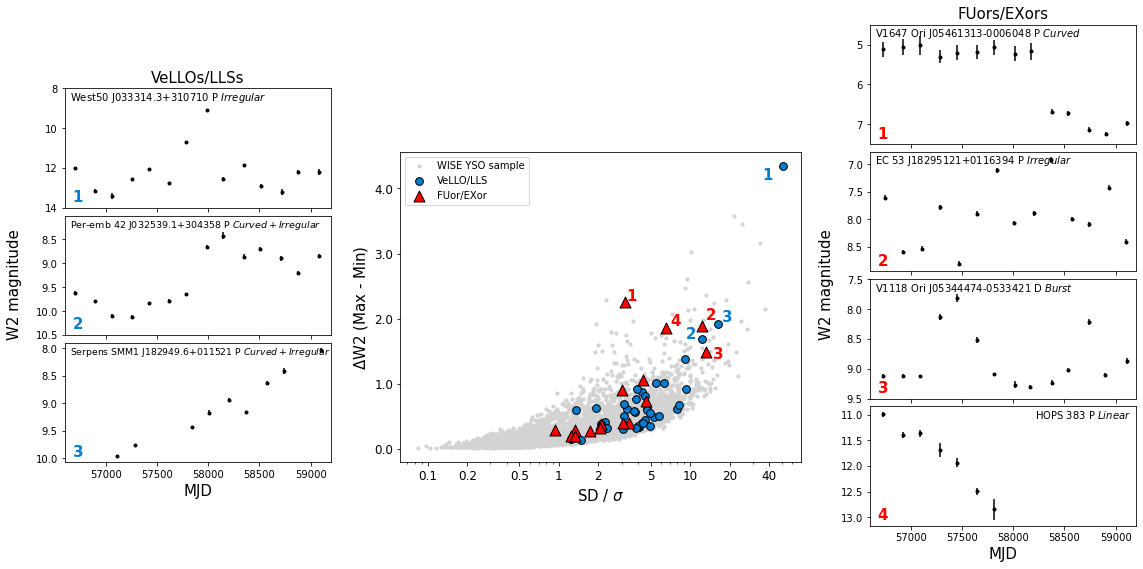

In [63]:
abbg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
fu = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800_FUor.csv')
vel = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800_vellos.csv')
print(len(vel))
fubg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/3rd_FUors_obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')

# vel.s_index_1
ab0 = ab

abbg = abbg[(abbg.N_w2 > 5) &
         (abbg.dist_sd < 0.3) &
         (abbg.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1) &
         (abbg['class']) ]


fu = fu.fillna(0)
fu0 = fu[fu.var_type != 0]

vel0 = vel[(vel.N_w2 > 5) &
         (vel.dist_sd < 0.3) &
         (vel.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1) &
         (vel['class']) ]

fubg = fubg[(fubg.N_w2 > 5) &
    (fubg.avg_eW2 < 0.2) &
    (fubg.dist_sd < 0.3) ]

# pr_cond = ((ab0['class'] == "P") |
#         (ab0['class'] == "F") |
#         (ab0['class'] == "FP") |
#         (ab0['class'] == "0") |
#         (ab0['class'] == "I") |
#         (ab0['class'] == "I?")) 


# di_cond = ((ab0['class'] == "D") |
#         (ab0['class'] == "II") |
#         (ab0['class'] == "full") |
#         (ab0['class'] == "full?") |
#         (ab0['class'] == "debris/ev trans") |
#         (ab0['class'] == "transitional") |
#         (ab0['class'] == "evolved") |
#         (ab0['class'] == "ev or trans") )
        

# ev_cond = ((ab0['class'] == "E") |
#         (ab0['class'] == "III") )
        
        

# ab0.loc[pr_cond,'class'] = 'P'
# ab0.loc[di_cond,'class'] = 'D'
# ab0.loc[ev_cond,'class'] = 'PMS+E'

# ab0.loc[ab0['class']=='PMS+E','class']


fig = plt.figure(figsize=(16,8)) #x, y
grid = GridSpec(8,16, #y, x
                left=0.06, bottom=0.08, right=0.99, top=0.95, wspace=0.03, hspace=0.14)

# center scatter plot
ax0 = fig.add_subplot(grid[2:7, 5:11])

# right side - FUors
ax1 = fig.add_subplot(grid[0:2,12:16])
ax2 = fig.add_subplot(grid[2:4, 12:16])
ax3 = fig.add_subplot(grid[4:6, 12:16])
ax4 = fig.add_subplot(grid[6:8, 12:16])

# left side - VeLLOs
al1 = fig.add_subplot(grid[1:3,0:4])  
al2 = fig.add_subplot(grid[3:5,0:4]) 
al3 = fig.add_subplot(grid[5:7,0:4])
# al4 = fig.add_subplot(grid[6:8,0:3]) 




pl_fu_list = [ax1,ax2,ax3,ax4]
pl_vel_list = [al1,al2,al3]
# col_list = [ax11,ax22,ax33,ax44]


# sou_list = [ab0,vel0,fu0,fubg] - this is used before
sou_list = [abbg,vel0,fu0,fubg]
# y_color=['lightgray','#ffc107', '#1e88e5']
# y_color=['#D81B60', '#1E88E5', '#FFC107', '#004D40']
y_color=['lightgray','#057dd1','red','red']
y_label=['WISE YSO sample','VeLLO/LLS','FUor/EXor']
y_marker=['o','o','^','o']

# variable scatter plot
for i in range(3):
    if i == 0:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 10, c='lightgray',
                        label=y_label[i],
                    marker=y_marker[i])
#         pass
    elif i == 1:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 60, c=y_color[i],
                        label=y_label[i],edgecolor='k',
                    marker=y_marker[i])
    elif i == 2:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 120, c=y_color[i],
                        label=y_label[i],edgecolor='k',
                    marker=y_marker[i])
#     elif i == 3:   # fuor background plot
#         ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
#                    s = 60, c=y_color[i],
                        
#                     marker=y_marker[i],alpha=0.6)

ax0.set_xscale('log')
ax0.set_xlabel('SD / $\sigma$',size=15)
ax0.set_ylabel('$\Delta$W2 (Max - Min)',size=15)
ax0.set_yticklabels(ax0.get_yticks(),size=12)
ax0.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
ax0.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40],size=12)
ax0.legend()        
        
    
    
# lightcurve plot
fu_list = [3180,6380,1452,2458]
vello_list = [6029, 5864, 6375] #6399]
index_list = np.arange(1,9)

   
for i in range(len(vello_list)):
    wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                            +str(vello_list[i])+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]
    
    pl_vel_list[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
    pl_vel_list[i].invert_yaxis()
    pl_vel_list[i].set_xlim(56600,59200)
    pl_vel_list[i].text(0.03,0.05,str(i+1),weight='bold',transform=pl_vel_list[i].transAxes,color=y_color[1],size=15)
    if i < 2:
        pl_vel_list[i].set_xticklabels([])
    
    
pl_vel_list[0].text(0.02,0.9,'West50 J033314.3+310710 P $\it{Irregular}$',transform=pl_vel_list[0].transAxes)
pl_vel_list[1].text(0.02,0.9,'Per-emb 42 J032539.1+304358 P $\it{Curved}+\it{Irregular}$',transform=pl_vel_list[1].transAxes,size=9.5)
pl_vel_list[2].text(0.02,0.9,'Serpens SMM 1 J182949.6+011521 P $\it{Curved}+\it{Irregular}$',transform=pl_vel_list[2].transAxes,size=9.3)
pl_vel_list[2].set_xlabel('MJD',size=15)

pl_vel_list[1].set_yticks([8.5,9.0,9.5,10.0,10.5])

ax0.text(vel0.loc[vel0.Index == vello_list[0]].sd_sdfid_w2_flux-15,
             vel0.loc[vel0.Index == vello_list[0]].Delta_w2-0.2,
             str(1),size=15,weight='bold',color=y_color[1] )
ax0.text(vel0.loc[vel0.Index == vello_list[1]].sd_sdfid_w2_flux-3,
             vel0.loc[vel0.Index == vello_list[1]].Delta_w2+0,
             str(2),size=15,weight='bold',color=y_color[1] )
ax0.text(vel0.loc[vel0.Index == vello_list[2]].sd_sdfid_w2_flux+1,
             vel0.loc[vel0.Index == vello_list[2]].Delta_w2+0.05,
             str(3),size=15,weight='bold',color=y_color[1] )
# ax0.text(vel0.loc[vel0.s_index == vello_list[3]].sd_sdfid_w2_flux+0.5,
#              vel0.loc[vel0.s_index == vello_list[3]].Delta_w2+0.05,
#              str(4),size=11,weight='bold',color=y_color[2] )
    
pl_vel_list[0].set_ylim(14,8)
pl_vel_list[1].set_ylim(10.5,8)
    
    
for i in range(len(fu_list)):
    wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                            +str(fu_list[i])+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]

    pl_fu_list[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
    pl_fu_list[i].invert_yaxis()
    pl_fu_list[i].set_xlim(56600,59200)
    pl_fu_list[i].text(0.03,0.05,str(i+1),weight='bold',transform=pl_fu_list[i].transAxes,color='r',size=15)
    if i < 3:
        pl_fu_list[i].set_xticklabels([])
    
pl_fu_list[0].text(0.02,0.9,'V1647 Ori J05461313-0006048 P $\it{Curved}$',transform=pl_fu_list[0].transAxes)
pl_fu_list[1].text(0.02,0.9,'EC 53 J18295121+0116394 P $\it{Irregular}$',transform=pl_fu_list[1].transAxes)
pl_fu_list[2].text(0.02,0.9,'V1118 Ori J05344474-0533421 D $\it{Burst}$',transform=pl_fu_list[2].transAxes)
pl_fu_list[3].text(0.62,0.9,'HOPS 383 P $\it{Linear}$',transform=pl_fu_list[3].transAxes)

pl_fu_list[0].set_ylim(7.5,4.5)
pl_fu_list[2].set_ylim(9.5,7.5)





ax0.text(ab0[ab0['Index'] == fu_list[0]].sd_sdfid_w2_flux+0.05,
             ab0[ab0['Index'] == fu_list[0]].Delta_w2+0.05,
             str(1),size=15,weight='bold',color='r' )
ax0.text(ab0[ab0['Index'] == fu_list[1]].sd_sdfid_w2_flux+1,
             ab0[ab0['Index'] == fu_list[1]].Delta_w2+0.1,
             str(2),size=15,weight='bold',color='r' )
ax0.text(ab0[ab0['Index'] == fu_list[2]].sd_sdfid_w2_flux+1.5,
             ab0[ab0['Index'] == fu_list[2]].Delta_w2-0.1,
             str(3),size=15,weight='bold',color='r' )
ax0.text(ab0[ab0['Index'] == fu_list[3]].sd_sdfid_w2_flux+0.5,
             ab0[ab0['Index'] == fu_list[3]].Delta_w2+0.05,
             str(4),size=15,weight='bold',color='r' )
    

fig.text(0.715,0.5,'W2 magnitude',size=15,rotation='vertical',va='center')
fig.text(0.01,0.5,'W2 magnitude',size=15,rotation='vertical',va='center')
ax1.set_title('FUors/EXors',size=15)
al1.set_title('VeLLOs/LLSs',size=15)
ax4.set_xlabel('MJD',size=15)
# al4.set_xlabel('MJD',size=15)
# ax44.set_xlabel('MJD',size=15)
    







# fig.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/fuor_vello_3rd_2.pdf')

### 2mass removed version

40


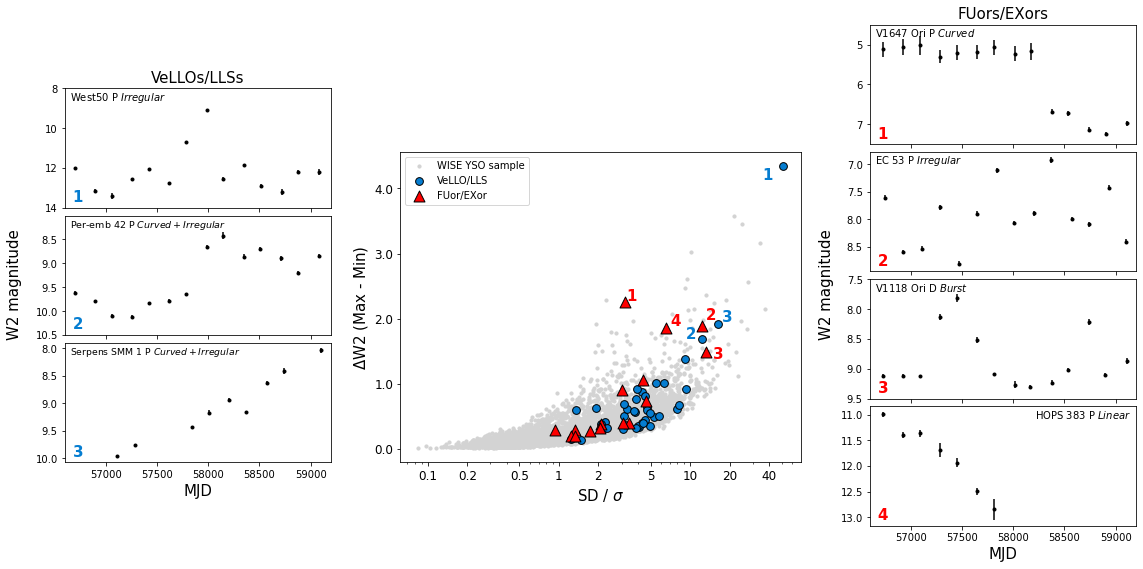

In [65]:
abbg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
fu = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800_FUor.csv')
vel = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800_vellos.csv')
print(len(vel))
fubg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/3rd_FUors_obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')

# vel.s_index_1
ab0 = ab

abbg = abbg[(abbg.N_w2 > 5) &
         (abbg.dist_sd < 0.3) &
         (abbg.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1) &
         (abbg['class']) ]


fu = fu.fillna(0)
fu0 = fu[fu.var_type != 0]

vel0 = vel[(vel.N_w2 > 5) &
         (vel.dist_sd < 0.3) &
         (vel.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1) &
         (vel['class']) ]

fubg = fubg[(fubg.N_w2 > 5) &
    (fubg.avg_eW2 < 0.2) &
    (fubg.dist_sd < 0.3) ]

# pr_cond = ((ab0['class'] == "P") |
#         (ab0['class'] == "F") |
#         (ab0['class'] == "FP") |
#         (ab0['class'] == "0") |
#         (ab0['class'] == "I") |
#         (ab0['class'] == "I?")) 


# di_cond = ((ab0['class'] == "D") |
#         (ab0['class'] == "II") |
#         (ab0['class'] == "full") |
#         (ab0['class'] == "full?") |
#         (ab0['class'] == "debris/ev trans") |
#         (ab0['class'] == "transitional") |
#         (ab0['class'] == "evolved") |
#         (ab0['class'] == "ev or trans") )
        

# ev_cond = ((ab0['class'] == "E") |
#         (ab0['class'] == "III") )
        
        

# ab0.loc[pr_cond,'class'] = 'P'
# ab0.loc[di_cond,'class'] = 'D'
# ab0.loc[ev_cond,'class'] = 'PMS+E'

# ab0.loc[ab0['class']=='PMS+E','class']


fig = plt.figure(figsize=(16,8)) #x, y
grid = GridSpec(8,16, #y, x
                left=0.06, bottom=0.08, right=0.99, top=0.95, wspace=0.03, hspace=0.14)

# center scatter plot
ax0 = fig.add_subplot(grid[2:7, 5:11])

# right side - FUors
ax1 = fig.add_subplot(grid[0:2,12:16])
ax2 = fig.add_subplot(grid[2:4, 12:16])
ax3 = fig.add_subplot(grid[4:6, 12:16])
ax4 = fig.add_subplot(grid[6:8, 12:16])

# left side - VeLLOs
al1 = fig.add_subplot(grid[1:3,0:4])  
al2 = fig.add_subplot(grid[3:5,0:4]) 
al3 = fig.add_subplot(grid[5:7,0:4])
# al4 = fig.add_subplot(grid[6:8,0:3]) 




pl_fu_list = [ax1,ax2,ax3,ax4]
pl_vel_list = [al1,al2,al3]
# col_list = [ax11,ax22,ax33,ax44]


# sou_list = [ab0,vel0,fu0,fubg] - this is used before
sou_list = [abbg,vel0,fu0,fubg]
# y_color=['lightgray','#ffc107', '#1e88e5']
# y_color=['#D81B60', '#1E88E5', '#FFC107', '#004D40']
y_color=['lightgray','#057dd1','red','red']
y_label=['WISE YSO sample','VeLLO/LLS','FUor/EXor']
y_marker=['o','o','^','o']

# variable scatter plot
for i in range(3):
    if i == 0:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 10, c='lightgray',
                        label=y_label[i],
                    marker=y_marker[i])
#         pass
    elif i == 1:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 60, c=y_color[i],
                        label=y_label[i],edgecolor='k',
                    marker=y_marker[i])
    elif i == 2:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 120, c=y_color[i],
                        label=y_label[i],edgecolor='k',
                    marker=y_marker[i])
#     elif i == 3:   # fuor background plot
#         ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
#                    s = 60, c=y_color[i],
                        
#                     marker=y_marker[i],alpha=0.6)

ax0.set_xscale('log')
ax0.set_xlabel('SD / $\sigma$',size=15)
ax0.set_ylabel('$\Delta$W2 (Max - Min)',size=15)
ax0.set_yticklabels(ax0.get_yticks(),size=12)
ax0.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
ax0.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40],size=12)
ax0.legend()        
        
    
    
# lightcurve plot
fu_list = [3180,6380,1452,2458]
vello_list = [6029, 5864, 6375] #6399]
index_list = np.arange(1,9)

   
for i in range(len(vello_list)):
    wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                            +str(vello_list[i])+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]
    
    pl_vel_list[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
    pl_vel_list[i].invert_yaxis()
    pl_vel_list[i].set_xlim(56600,59200)
    pl_vel_list[i].text(0.03,0.05,str(i+1),weight='bold',transform=pl_vel_list[i].transAxes,color=y_color[1],size=15)
    if i < 2:
        pl_vel_list[i].set_xticklabels([])
    
    
pl_vel_list[0].text(0.02,0.9,'West50 P $\it{Irregular}$',transform=pl_vel_list[0].transAxes)
pl_vel_list[1].text(0.02,0.9,'Per-emb 42 P $\it{Curved}+\it{Irregular}$',transform=pl_vel_list[1].transAxes,size=9.5)
pl_vel_list[2].text(0.02,0.9,'Serpens SMM 1 P $\it{Curved}+\it{Irregular}$',transform=pl_vel_list[2].transAxes,size=9.3)
pl_vel_list[2].set_xlabel('MJD',size=15)

pl_vel_list[1].set_yticks([8.5,9.0,9.5,10.0,10.5])

ax0.text(vel0.loc[vel0.Index == vello_list[0]].sd_sdfid_w2_flux-15,
             vel0.loc[vel0.Index == vello_list[0]].Delta_w2-0.2,
             str(1),size=15,weight='bold',color=y_color[1] )
ax0.text(vel0.loc[vel0.Index == vello_list[1]].sd_sdfid_w2_flux-3,
             vel0.loc[vel0.Index == vello_list[1]].Delta_w2+0,
             str(2),size=15,weight='bold',color=y_color[1] )
ax0.text(vel0.loc[vel0.Index == vello_list[2]].sd_sdfid_w2_flux+1,
             vel0.loc[vel0.Index == vello_list[2]].Delta_w2+0.05,
             str(3),size=15,weight='bold',color=y_color[1] )
# ax0.text(vel0.loc[vel0.s_index == vello_list[3]].sd_sdfid_w2_flux+0.5,
#              vel0.loc[vel0.s_index == vello_list[3]].Delta_w2+0.05,
#              str(4),size=11,weight='bold',color=y_color[2] )
    
pl_vel_list[0].set_ylim(14,8)
pl_vel_list[1].set_ylim(10.5,8)
    
    
for i in range(len(fu_list)):
    wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                            +str(fu_list[i])+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]

    pl_fu_list[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
    pl_fu_list[i].invert_yaxis()
    pl_fu_list[i].set_xlim(56600,59200)
    pl_fu_list[i].text(0.03,0.05,str(i+1),weight='bold',transform=pl_fu_list[i].transAxes,color='r',size=15)
    if i < 3:
        pl_fu_list[i].set_xticklabels([])
    
pl_fu_list[0].text(0.02,0.9,'V1647 Ori P $\it{Curved}$',transform=pl_fu_list[0].transAxes)
pl_fu_list[1].text(0.02,0.9,'EC 53 P $\it{Irregular}$',transform=pl_fu_list[1].transAxes)
pl_fu_list[2].text(0.02,0.9,'V1118 Ori D $\it{Burst}$',transform=pl_fu_list[2].transAxes)
pl_fu_list[3].text(0.62,0.9,'HOPS 383 P $\it{Linear}$',transform=pl_fu_list[3].transAxes)

pl_fu_list[0].set_ylim(7.5,4.5)
pl_fu_list[2].set_ylim(9.5,7.5)





ax0.text(ab0[ab0['Index'] == fu_list[0]].sd_sdfid_w2_flux+0.05,
             ab0[ab0['Index'] == fu_list[0]].Delta_w2+0.05,
             str(1),size=15,weight='bold',color='r' )
ax0.text(ab0[ab0['Index'] == fu_list[1]].sd_sdfid_w2_flux+1,
             ab0[ab0['Index'] == fu_list[1]].Delta_w2+0.1,
             str(2),size=15,weight='bold',color='r' )
ax0.text(ab0[ab0['Index'] == fu_list[2]].sd_sdfid_w2_flux+1.5,
             ab0[ab0['Index'] == fu_list[2]].Delta_w2-0.1,
             str(3),size=15,weight='bold',color='r' )
ax0.text(ab0[ab0['Index'] == fu_list[3]].sd_sdfid_w2_flux+0.5,
             ab0[ab0['Index'] == fu_list[3]].Delta_w2+0.05,
             str(4),size=15,weight='bold',color='r' )
    

fig.text(0.715,0.5,'W2 magnitude',size=15,rotation='vertical',va='center')
fig.text(0.01,0.5,'W2 magnitude',size=15,rotation='vertical',va='center')
ax1.set_title('FUors/EXors',size=15)
al1.set_title('VeLLOs/LLSs',size=15)
ax4.set_xlabel('MJD',size=15)
# al4.set_xlabel('MJD',size=15)
# ax44.set_xlabel('MJD',size=15)
    







# fig.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/fuor_vello_3rd_2.pdf')

In [30]:
fu0

Index          ra        dec   dist_sd     avg_W1  stdev_W1   avg_eW1  \
0   11002   81.466558  34.875027  0.071909   7.417657  0.272708  0.090963   
2   11008  305.950067  42.207161  0.111980   7.193280  0.083696  0.120465   
3   11012  315.105184  52.504707  0.078111   9.534211  0.110740  0.020930   
4   11014  343.388576  62.539897  0.088010   7.605272  0.117693  0.061781   
5   11018   83.861442  -5.065300  0.102169   8.914221  0.086991  0.064549   
6   11021  117.648301 -33.106640  0.048382   7.876872  0.107038  0.042743   
7   11022  292.253539   9.645389  0.043838   8.865629  0.031649  0.039302   
8   11024  331.709870  59.046080  0.136811   9.801078  0.082875  0.026294   
9   11025   86.554583  -0.101333  0.279493   7.177979  0.944133  0.120287   
10  11031  277.463385   1.277635  0.069435  10.073863  0.505956  0.027248   
11  11035   83.686500  -5.561639  0.057482   9.726514  0.444807  0.038161   
12  11036   83.874336  -4.997502  0.113450  14.765000  0.000000  0.010000   
14  11040   52.180256  31.292535  0.197847   7.675885  0.192834  0.060786   
15  11044  277.455191   1.275430  0.073134  11.074440  0.102573  0.024403   
16  11048   69.822583  22.798167  0.038128   8.633850  0.066649  0.036782   

       avg_W2  stdev_W2   avg_eW2  ...  mod_baluev_fap       amp    sinamp  \
0    6.604840  0.256883  0.075687  ...        0.000022  0.116223  0.117721   
2    6.409768  0.082604  0.091396  ...        0.003170  0.043675  0.044346   
3    7.380958  0.075368  0.044197  ...        0.008063  0.017548  0.024313   
4    6.806888  0.127868  0.058966  ...        0.000028  0.048500  0.048776   
5    7.007863  0.082472  0.061921  ...        0.001306  0.020261  0.020258   
6    7.180522  0.092942  0.045917  ...        0.000791  0.023365  0.023362   
7    7.618381  0.052038  0.042048  ...        0.001021  0.009167  0.009212   
8    8.440575  0.062707  0.047210  ...        0.000036  0.005017  0.005016   
9    5.792177  0.879098  0.150531  ...        0.000064  0.717361  0.717249   
10   7.939463  0.531532  0.044343  ...        0.291130  0.056734  0.056725   
11   8.850590  0.461352  0.038215  ...        0.940215  0.007747  0.007745   
12  11.817355  0.610747  0.097425  ...        0.006379  0.002575  0.003489   
14   6.668156  0.318403  0.072847  ...        0.000745  0.119355  0.121512   
15   9.049527  0.089365  0.026308  ...        0.039657  0.003968  0.003968   
16   8.205283  0.130659  0.044751  ...        0.587086  0.008511  0.008510   

    ls_meanjy  sd_sdfid_periodrmv  sd_periodrmv  chi2_period_w2  \
0    0.368552            0.889784      0.026325       18.045548   
2    0.478267            0.415034      0.016539        2.335956   
3    0.202490            0.934828      0.007327       11.440714   
4    0.315914            0.721554      0.013010        6.559648   
5    0.265513            0.759785      0.012018        4.583170   
6    0.232241            0.825288      0.008107        9.705289   
7    0.155903            0.540991      0.003231        4.029235   
8    0.072047            0.474113      0.001493        3.168575   
9    0.939556            1.626504      0.302262       32.692508   
10   0.106591            7.803331      0.042710      655.628440   
11   0.042098           11.736541      0.024990      567.014615   
12   0.004237            1.297336      0.000358       11.681819   
14   0.392294            2.235941      0.064971       23.042919   
15   0.041594            1.994991      0.002044       46.462878   
16   0.089301            2.374694      0.008853       69.555463   

    linear_fap_periodrmv  Deltaw2_periodrmv   var_type  
0               0.849490           0.219764     Linear  
2               0.883165           0.117348     Curved  
3               0.976861           0.133868     Curved  
4               0.999323           0.185755     Linear  
5               0.999877           0.186114     Linear  
6               0.766836           0.114726     Linear  
7               0.985851           0.070568     Li

In [32]:
fubg[(fubg.N_w2 > 5) &
    (fubg.avg_eW2 < 0.2) &
    (fubg.dist_sd < 0.3) ]

Index          ra        dec   dist_sd     avg_W1  stdev_W1   avg_eW1  \
1   11002   81.466558  34.875027  0.071909   7.417657  0.272708  0.090963   
3   11004   85.702033  -8.276318  0.189739   6.807498  0.135249  0.154579   
5   11006  104.342595  -8.388245  0.286963   6.268379  0.138066  0.175269   
6   11007  104.881621  -4.091046  0.100483   7.070874  0.223090  0.127854   
7   11008  305.950067  42.207161  0.111980   7.193280  0.083696  0.120465   
11  11012  315.105184  52.504707  0.078111   9.534211  0.110740  0.020930   
13  11014  343.388576  62.539897  0.088010   7.605272  0.117693  0.061781   
17  11018   83.861442  -5.065300  0.102169   8.914221  0.086991  0.064549   
18  11019   86.902917   0.335011  0.113010   7.541976  0.044619  0.068735   
20  11021  117.648302 -33.106640  0.048382   7.876872  0.107038  0.042743   
21  11022  292.253539   9.645389  0.043838   8.865629  0.031649  0.039302   
22  11024  331.709870  59.046080  0.136811   9.801078  0.082875  0.026294   
23  11025   86.554583  -0.101333  0.279493   7.177979  0.944133  0.120287   
24  11027  100.247096   9.597888  0.130176   6.509416  0.041562  0.153538   
25  11028  100.247096   9.597888  0.130176   6.509416  0.041562  0.153538   
26  11029  100.533880   9.175000  0.037166  10.008845  0.007714  0.020013   
28  11031  277.463385   1.277635  0.069435  10.073863  0.505956  0.027248   
31  11035   83.686500  -5.561639  0.057482   9.726514  0.444807  0.038161   
32  11036   83.874336  -4.997502  0.113450  14.765000  0.000000  0.010000   
33  11037  278.156667  -2.517417  0.097574  12.022835  0.137263  0.046113   
36  11040   52.180256  31.292535  0.197847   7.675885  0.192834  0.060786   
37  11041   52.265653  31.267766  0.261158   7.058508  0.240675  0.131494   
38  11042   56.075000  32.083056  0.043067   9.165245  0.185268  0.032758   
39  11044  277.455191   1.275430  0.073134  11.074440  0.102573  0.024403   
43  11048   69.822583  22.798167  0.038128   8.633850  0.066649  0.036782   
45  11050  240.772881 -40.307063  0.053159   7.850710  0.136401  0.050375   
46  11051   83.899833  -5.207056  0.097186   6.919432  0.120731  0.160129   

       avg_W2  stdev_W2   avg_eW2  ...  single_fap  mod_baluev_fap       amp  \
1    6.604840  0.256883  0.075687  ...    0.000002        0.000022  0.116223   
3    5.511261  0.158265  0.166291  ...    0.000002        0.000033  0.203966   
5    5.174467  0.095214  0.196315  ...    0.000002        0.000033  0.178516   
6    6.367177  0.238736  0.093422  ...    0.008235        0.355058  0.160942   
7    6.409768  0.082604  0.091396  ...    0.000425        0.003170  0.043675   
11   7.380958  0.075368  0.044197  ...    0.001322        0.008063  0.017548   
13   6.806888  0.127868  0.058966  ...    0.000002        0.000028  0.048500   
17   7.007863  0.082472  0.061921  ...    0.000154        0.001306  0.020261   
18   5.987583  0.114829  0.143716  ...    0.000148        0.001387  0.097195   
20   7.180522  0.092942  0.045917  ...    0.000084        0.000791  0.023365   
21   7.618381  0.052038  0.042048  ...    0.000108        0.001021  0.009167   
22   8.440575  0.062707  0.047210  ...    0.000002        0.000036  0.005017   
23   5.792177  0.879098  0.150531  ...    0.000017        0.000064  0.717361   
24   5.298527  0.029102  0.180957  ...    0.017135        0.054374  0.034977   
25   5.298527  0.029102  0.180957  ...    0.017135        0.054374  0.034977   
26   9.532928  0.009776  0.018859  ...    0.000005        0.000069  0.000290   
28   7.939463  0.531532  0.044343  ...    0.015237        0.291130  0.056734   
31   8.850590  0.461352  0.038215  ...    0.239099        0.940215  0.007747   
32  11.817355  0.610747  0.097425  ...    0.000870        0.006379  0.002575   
33  11.162613  0.090286  0.040437  ...    0.069380        0.505704  0.000478   
36   6.668156  0.318403  0.072847  ...    0.000109        0.000745  0.119355   
37   5.274547  0.172781  0.192181  ...    0.000065        0.000615  0.259379   
38   8.

In [ ]:
fx = fubg[fubg['Index'] == 11039]
fx.

In [29]:
fubg.loc[fubg.Delta_w2 > 3,:]#['Index','Delta_w2','sd_sdfid_w2_flux']]

Index          ra        dec   dist_sd    avg_W1  stdev_W1   avg_eW1  \
19  11020  105.929828 -11.551731  0.664268  3.518667  0.948902  0.523333   
35  11039  167.368976 -76.557816  0.497434  9.987272  0.706806  0.049981   

      avg_W2  stdev_W2   avg_eW2  ...  single_fap  mod_baluev_fap        amp  \
19  3.394500  0.000000  0.010000  ...    0.008155        0.462734  57.328005   
35  7.858886  0.839465  0.069957  ...    0.000258        0.001622   0.069083   

       sinamp  ls_meanjy  sd_sdfid_periodrmv  sd_periodrmv  chi2_period_w2  \
19  57.318391  13.218694            0.038055      0.430017        0.001405   
35   0.069380   0.108186           10.539812      0.257643      302.149602   

    linear_fap_periodrmv  Deltaw2_periodrmv  
19              0.996863           0.028502  
35              0.997155           3.755554  

[2 rows x 61 columns]

## FUors/VeLLOs - for poster

Text(0.5, 0, 'MJD')

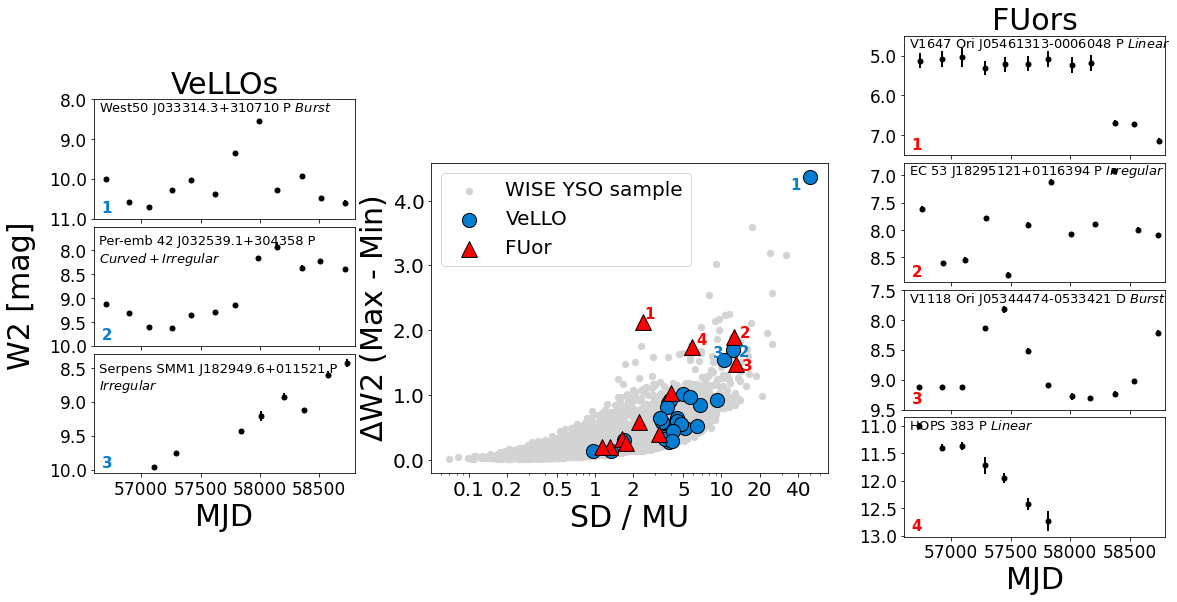

In [150]:
ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2.csv')
fu = pa.read_csv('/home/wooseok/WISE_data/FUors/NEOWISE_fuor_stat.csv')
vel = pa.read_csv('/home/wooseok/WISE_data/FUors/vellos_variables.csv')
# vel.s_index_1
ab0 = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1) &
         (ab['class']) ]

fu0 = fu[(fu.N_w2 > 5) &
         (fu.dist_sd < 0.3) &
         (fu.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1) &
         (fu['Var_type']) ]

vel0 = vel[(vel.N_w2 > 5) &
         (vel.dist_sd < 0.3) &
         (vel.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1) &
         (vel['class']) ]

pr_cond = ((ab0['class'] == "P") |
        (ab0['class'] == "F") |
        (ab0['class'] == "FP") |
        (ab0['class'] == "0") |
        (ab0['class'] == "I") |
        (ab0['class'] == "I?")) 


di_cond = ((ab0['class'] == "D") |
        (ab0['class'] == "II") |
        (ab0['class'] == "full") |
        (ab0['class'] == "full?") |
        (ab0['class'] == "debris/ev trans") |
        (ab0['class'] == "transitional") |
        (ab0['class'] == "evolved") |
        (ab0['class'] == "ev or trans") )
        

ev_cond = ((ab0['class'] == "E") |
        (ab0['class'] == "III") )
        
        
ab0.loc[ab0.s_index == 1,'sd_sdfid_w2_flux']
ab0.loc[ab0.s_index == 1,'Delta_w2']

ab0.loc[pr_cond,'class'] = 'P'
ab0.loc[di_cond,'class'] = 'D'
ab0.loc[ev_cond,'class'] = 'PMS+E'

# ab0.loc[ab0['class']=='PMS+E','class']


fig = plt.figure(figsize=(16,8)) #x, y
grid = GridSpec(8,16, #y, x
                left=0.06, bottom=0.08, right=0.99, top=0.95, wspace=0.15, hspace=0.14)

# center scatter plot
ax0 = fig.add_subplot(grid[2:7, 5:11])

# right side - FUors
ax1 = fig.add_subplot(grid[0:2,12:16])
ax2 = fig.add_subplot(grid[2:4, 12:16])
ax3 = fig.add_subplot(grid[4:6, 12:16])
ax4 = fig.add_subplot(grid[6:8, 12:16])

# left side - VeLLOs
al1 = fig.add_subplot(grid[1:3,0:4])  
al2 = fig.add_subplot(grid[3:5,0:4]) 
al3 = fig.add_subplot(grid[5:7,0:4])
# al4 = fig.add_subplot(grid[6:8,0:3]) 




pl_fu_list = [ax1,ax2,ax3,ax4]
pl_vel_list = [al1,al2,al3]
# col_list = [ax11,ax22,ax33,ax44]
sou_list = [ab0,vel0,fu0]

# y_color=['lightgray','#ffc107', '#1e88e5']
# y_color=['#D81B60', '#1E88E5', '#FFC107', '#004D40']
y_color=['lightgray','#057dd1','red']
y_label=['WISE YSO sample','VeLLO','FUor']
y_marker=['o','o','^']

# variable scatter plot
for i in range(3):
    if i == 0:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 40, c='lightgray',
                        label=y_label[i],
                    marker=y_marker[i])
    elif i == 1:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 200, c=y_color[i],
                        label=y_label[i],edgecolor='k',
                    marker=y_marker[i])
    else:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 250, c=y_color[i],
                        label=y_label[i],edgecolor='k',
                    marker=y_marker[i])

ax0.set_xscale('log')
ax0.set_xlabel('SD / MU',size=30)
ax0.set_ylabel('$\Delta$W2 (Max - Min)',size=30)
ax0.set_yticklabels(ax0.get_yticks(),size=20)
ax0.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
ax0.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40],size=20)
ax0.legend(fontsize=20)        
        
    
    
# lightcurve plot
fu_list = [3180,6380,1452,2458]
vello_list = [6029, 5864, 6375, 6399]
index_list = np.arange(1,9)

   
for i in range(len(vello_list)-1):
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                            +str(vello_list[i])+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]
    
    pl_vel_list[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.',ms=10,lw=2)
    pl_vel_list[i].invert_yaxis()
    pl_vel_list[i].set_xlim(56600,58800)
    pl_vel_list[i].set_xticklabels(np.arange(56500,59000,500),size=17)
    pl_vel_list[i].set_yticklabels(pl_vel_list[i].get_yticks(),size=17)
    pl_vel_list[i].text(0.03,0.05,str(i+1),weight='bold',transform=pl_vel_list[i].transAxes,color=y_color[1],size=15)
    if i < 2:
        pl_vel_list[i].set_xticklabels([])
    
    
pl_vel_list[0].text(0.02,0.9,'West50 J033314.3+310710 P $\it{Burst}$',transform=pl_vel_list[0].transAxes,size=13)
pl_vel_list[1].text(0.02,0.7,'Per-emb 42 J032539.1+304358 P\n$\it{Curved + Irregular}$',transform=pl_vel_list[1].transAxes,size=13)
pl_vel_list[2].text(0.02,0.7,'Serpens SMM1 J182949.6+011521 P\n$\it{Irregular}$',transform=pl_vel_list[2].transAxes,size=13)
pl_vel_list[2].set_xlabel('MJD',size=30)

pl_vel_list[1].set_yticks([8.5,9.0,9.5,10.0,10.5])

ax0.text(vel0.loc[vel0.s_index == vello_list[0]].sd_sdfid_w2_flux-15,
             vel0.loc[vel0.s_index == vello_list[0]].Delta_w2-0.2,
             str(1),size=15,weight='bold',color=y_color[1] )
ax0.text(vel0.loc[vel0.s_index == vello_list[1]].sd_sdfid_w2_flux+1.5,
             vel0.loc[vel0.s_index == vello_list[1]].Delta_w2-0.1,
             str(2),size=15,weight='bold',color=y_color[1] )
ax0.text(vel0.loc[vel0.s_index == vello_list[2]].sd_sdfid_w2_flux-2,
             vel0.loc[vel0.s_index == vello_list[2]].Delta_w2+0.05,
             str(3),size=15,weight='bold',color=y_color[1] )
# ax0.text(vel0.loc[vel0.s_index == vello_list[3]].sd_sdfid_w2_flux+0.5,
#              vel0.loc[vel0.s_index == vello_list[3]].Delta_w2+0.05,
#              str(4),size=11,weight='bold',color=y_color[2] )
    
pl_vel_list[0].set_ylim(14,8)
pl_vel_list[1].set_ylim(10.5,8)
    
    
for i in range(len(fu_list)):
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                            +str(fu_list[i])+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]

    pl_fu_list[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.',ms=10,linewidth=2)
    pl_fu_list[i].invert_yaxis()
    pl_fu_list[i].set_xlim(56600,58800)
    pl_fu_list[i].text(0.03,0.05,str(i+1),weight='bold',transform=pl_fu_list[i].transAxes,color='r',size=15)
    pl_fu_list[i].set_yticklabels(pl_fu_list[i].get_yticks(),size=17)
    pl_fu_list[i].set_xticklabels(np.arange(56500,59000,500),size=17)
    if i < 3:
        pl_fu_list[i].set_xticklabels([])
    
pl_fu_list[0].text(0.02,0.9,'V1647 Ori J05461313-0006048 P $\it{Linear}$',transform=pl_fu_list[0].transAxes,size=13)
pl_fu_list[1].text(0.02,0.9,'EC 53 J18295121+0116394 P $\it{Irregular}$',transform=pl_fu_list[1].transAxes,size=13)
pl_fu_list[2].text(0.02,0.9,'V1118 Ori J05344474-0533421 D $\it{Burst}$',transform=pl_fu_list[2].transAxes,size=13)
pl_fu_list[3].text(0.02,0.9,'HOPS 383 P $\it{Linear}$',transform=pl_fu_list[3].transAxes,size=13)

pl_fu_list[0].set_ylim(7.5,4.5)
pl_fu_list[2].set_ylim(9.5,7.5)

ax0.text(fu0.loc[fu0['YSO catalog'] == fu_list[0]].sd_sdfid_w2_flux+0.05,
             fu0.loc[fu0['YSO catalog'] == fu_list[0]].Delta_w2+0.05,
             str(1),size=15,weight='bold',color='r' )
ax0.text(fu0.loc[fu0['YSO catalog'] == fu_list[1]].sd_sdfid_w2_flux+1.5,
             fu0.loc[fu0['YSO catalog'] == fu_list[1]].Delta_w2,
             str(2),size=15,weight='bold',color='r' )
ax0.text(fu0.loc[fu0['YSO catalog'] == fu_list[2]].sd_sdfid_w2_flux+1.5,
             fu0.loc[fu0['YSO catalog'] == fu_list[2]].Delta_w2-0.1,
             str(3),size=15,weight='bold',color='r' )
ax0.text(fu0.loc[fu0['YSO catalog'] == fu_list[3]].sd_sdfid_w2_flux+0.5,
             fu0.loc[fu0['YSO catalog'] == fu_list[3]].Delta_w2+0.05,
             str(4),size=15,weight='bold',color='r' )
    

# fig.text(0.715,0.5,'W2 [mag]',size=30,rotation='vertical',va='center')
fig.text(0.01,0.5,'W2 [mag]',size=30,rotation='vertical',va='center',ha='right')
ax1.set_title('FUors',size=30)
al1.set_title('VeLLOs',size=30)
ax4.set_xlabel('MJD',size=30)
# al4.set_xlabel('MJD',size=15)
# ax44.set_xlabel('MJD',size=15)
    







# fig.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/fuor_vello.pdf')

In [23]:
fu[(fu.N_w2 > 5) &
         (fu.dist_sd < 0.3) &
         (fu.avg_eW2 < 0.2) ]

Index          ra        dec   dist_sd     avg_W1  stdev_W1   avg_eW1  \
1       2   81.466558  34.875027  0.084875   7.348575  0.190967  0.099774   
3       4   85.702033  -8.276318  0.188426   6.836959  0.136464  0.157009   
5       6  104.342595  -8.388245  0.264534   6.306389  0.137751  0.180306   
6       7  104.881621  -4.091046  0.097123   7.064486  0.235026  0.131799   
7       8  305.950067  42.207161  0.118228   7.182287  0.074806  0.125109   
11     12  315.105184  52.504707  0.086188   9.569878  0.076674  0.021369   
12     13  326.836250  47.534333  0.299433   6.401286  0.060778  0.179889   
13     14  343.388576  62.539897  0.094724   7.574914  0.088185  0.065601   
18     19   86.902917   0.335011  0.144522   7.545607  0.047636  0.069700   
20     21  117.648301 -33.106640  0.044958   7.849765  0.086920  0.044049   
21     22  292.253539   9.645389  0.050925   8.873871  0.030729  0.039977   
22     24  331.709870  59.046080  0.141010   9.780643  0.076837  0.028762   
23     25   86.554583  -0.101333  0.293649   6.950165  0.780330  0.141130   
24     27  100.247096   9.597888  0.142938   6.535259  0.031176  0.163556   
25     28  100.247096   9.597888  0.142938   6.535259  0.031176  0.163556   
26     29  100.533880   9.175000  0.036141  10.010579  0.007222  0.020815   
28     31  277.463385   1.277635  0.068485  10.084373  0.510158  0.029523   
31     35   83.686500  -5.561639  0.059276   9.706703  0.471525  0.043975   
32     36   83.874208  -4.997502  0.133249  13.634813  1.183455  0.296929   
33     37  278.156667  -2.517417  0.087743  12.038628  0.105743  0.054987   
36     40   52.180256  31.292535  0.194934   7.646359  0.186101  0.062778   
37     41   52.265653  31.267766  0.285261   7.014121  0.208806  0.140760   
38     44  277.455191   1.275430  0.077195  11.072287  0.108069  0.025562   
42     48   69.822583  22.798167  0.045131   8.623282  0.064539  0.037353   
44     50  240.772881 -40.307063  0.053844   7.870458  0.139038  0.051423   

       avg_W2  stdev_W2   avg_eW2  ...  sinamp_w1  ls_meanjy_w1  \
1    6.536243  0.190493  0.081177  ...   0.076466      0.356519   
3    5.543758  0.160319  0.164138  ...   0.089707      0.562500   
5    5.196974  0.098489  0.195916  ...   0.155008      0.909270   
6    6.353626  0.251150  0.096502  ...   0.146075      0.420935   
7    6.397626  0.079037  0.093522  ...   0.038717      0.424799   
11   7.403593  0.057185  0.044008  ...   0.007787      0.050475   
12   5.454967  0.036017  0.179981  ...   0.043354      0.854053   
13   6.775492  0.104096  0.061032  ...   0.035236      0.275556   
18   6.011234  0.119783  0.150321  ...   0.026997      0.280712   
20   7.160508  0.080207  0.046428  ...   0.024027      0.228134   
21   7.614001  0.055729  0.042544  ...   0.002392      0.087392   
22   8.424265  0.055006  0.048506  ...   0.004240      0.036404   
23   5.587265  0.741489  0.169299  ...   0.408177      0.520323   
24   5.313545  0.035225  0.188763  ...   0.024593      0.750866   
25   5.313545  0.035225  0.188763  ...   0.024593      0.750866   
26   9.532366  0.007855  0.019755  ...   0.000177      0.030661   
28   7.945583  0.536892  0.044748  ...   0.014657      0.026138   
31   8.834628  0.492813  0.040233  ...   0.014205      0.040769   
32  11.799642  0.570380  0.103224  ...        NaN           NaN   
33  11.173481  0.093327  0.045842  ...   0.000508      0.004600   
36   6.631474  0.320782  0.077919  ...   0.047326      0.260304   
37   5.245230  0.140742  0.196718  ...   0.129433      0.440116   
38   9.048796  0.093176  0.028798  ...   0.001331      0.011665   
42   8.187221  0.129437  0.045238  ...   0.004769      0.110146   
44   7.210340  0.152419  0.050354  ...   0.030009      0.215143   

    sd_sdfid_periodrmv_w1  sd_periodrmv_w1  Deltaall_w1_periodrmv  \
1                0.649413         0.022550               0.191738   
3                0.377766         0.031718               0.213938   
5                0.206424         0.032328         

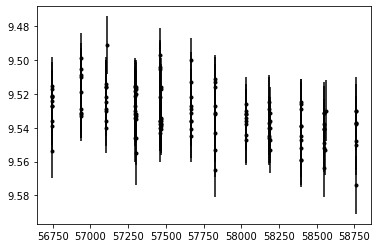

In [27]:
fig, ax = plt.subplots()
wavg = pa.read_csv('/home/wooseok/WISE_data/FUors/outlier_cut_data/'
                            +str(29)+'_alld.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
w2av = wavg[(wavg['mjd'] > 56000) &
                        (wavg['flt'] == 'W2') &
                        (np.isnan(wavg['mag']) == False) &
                        (np.isnan(wavg['emag']) == False)]

ax.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
ax.invert_yaxis()
# ax.set_xlim(56600,58800)

In [43]:
non.loc[np.isnan(non.Fuor_index)==False,['Fuor_index','Delta_w2','sd_sdfid_w2_flux']]

Fuor_index  Delta_w2  sd_sdfid_w2_flux
0          1.0  1.223500          1.277593
1          2.0  0.586128          2.228968
2          3.0  0.930602          0.483472
3          4.0  0.488295          0.933686
4          5.0  0.372550          0.443524
5          6.0  0.298917          0.485858
6          7.0  1.153663          2.770699
7          8.0  0.256774          0.865348
8          9.0  0.270997          0.914597
9         10.0  0.652000          0.737247
10        11.0  0.362042          0.449510
11        12.0  0.169845          1.294882
12        13.0  0.139904          0.200580
13        14.0  0.325893          1.629155
14        15.0  0.075025          0.110024
15        16.0  0.265515          0.344422
16        17.0  0.572900          0.759295
17        18.0  0.273148          1.073284
18        19.0  0.416280          0.779400
19        20.0  4.754769          3.059061
20        21.0  0.258833          1.758310
21        22.0  0.203400          1.313963
22        24.0  0.191154          1.133951
23        25.0  2.126967          2.399382
24        27.0  0.129051          0.183384
25        28.0  0.129051          0.183384
26        29.0  0.024444          0.397703
27        30.0  0.856436          0.952113
28        31.0  1.889236         12.486523
29        32.0  0.272000          0.000000
30        34.0  0.640600          0.518278
31        35.0  1.484455         12.932216
32        36.0  1.737125          5.790087
33        37.0  0.309667          2.057576
34        38.0  0.827697          0.866671
35        39.0  3.240896          8.444307
36        40.0  1.031500          3.971585
37        41.0  0.464222          0.669198
38        42.0  0.586444          3.635800
39        44.0  0.399177          3.214200
40        45.0  0.572900          0.759295
41        46.0  0.600958          0.361218
42        47.0  0.991600          1.575431
43        48.0  0.396917          2.977587
44        49.0  0.412778          0.500066
45        50.0  0.538333          2.923007
46        51.0  0.373715          1.050860

Text(0.5, 1.0, 'VeLLOs')

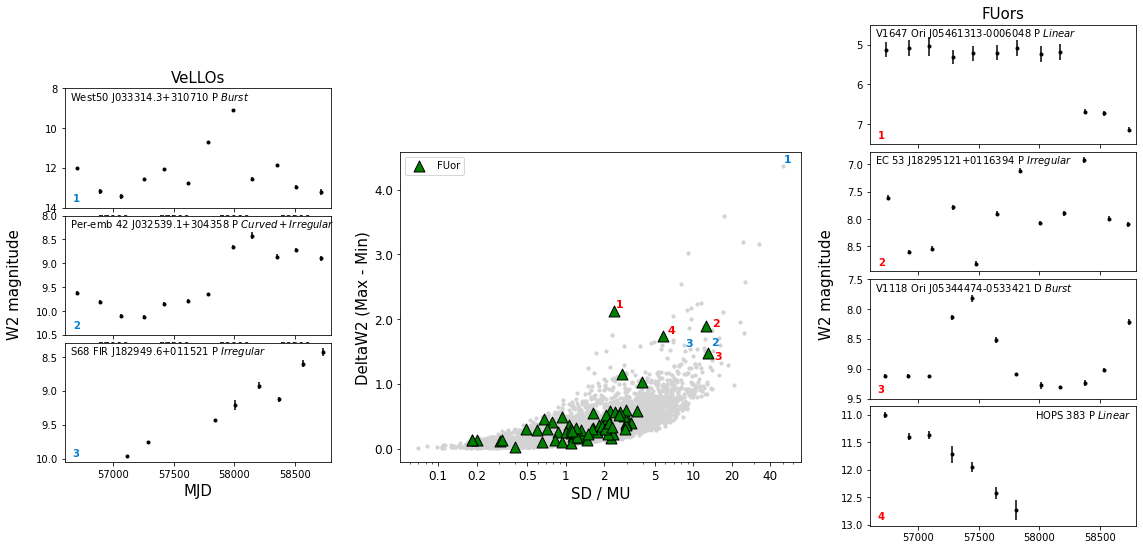

In [8]:
ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2.csv')
fu = pa.read_csv('/home/wooseok/WISE_data/FUors/NEOWISE_fuor_stat.csv')
vel = pa.read_csv('/home/wooseok/WISE_data/FUors/vellos_variables.csv')
non=pa.read_csv('/home/wooseok/WISE_data/FUors/nonvar.csv')

# vel.s_index_1
ab0 = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1) &
         (ab['class']) ]

fu0 = fu[(fu.N_w2 > 5) &
         (fu.dist_sd < 0.3) &
         (fu.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1) &
         (fu['class']) ]

vel0 = vel[(vel.N_w2 > 5) &
         (vel.dist_sd < 0.3) &
         (vel.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1) &
         (vel['class']) ]

non0 = non[(non.N_w2 > 5) &
         (non.dist_sd < 0.3) &
         (non.avg_eW2 < 0.2) 
#          (ab.sd_sdfid_w2_flux > 1) &
          ]

pr_cond = ((ab0['class'] == "P") |
        (ab0['class'] == "F") |
        (ab0['class'] == "FP") |
        (ab0['class'] == "0") |
        (ab0['class'] == "I") |
        (ab0['class'] == "I?")) 


di_cond = ((ab0['class'] == "D") |
        (ab0['class'] == "II") |
        (ab0['class'] == "full") |
        (ab0['class'] == "full?") |
        (ab0['class'] == "debris/ev trans") |
        (ab0['class'] == "transitional") |
        (ab0['class'] == "evolved") |
        (ab0['class'] == "ev or trans") )
        

ev_cond = ((ab0['class'] == "E") |
        (ab0['class'] == "III") )
        
        
ab0.loc[ab0.s_index == 1,'sd_sdfid_w2_flux']
ab0.loc[ab0.s_index == 1,'Delta_w2']

ab0.loc[pr_cond,'class'] = 'P'
ab0.loc[di_cond,'class'] = 'D'
ab0.loc[ev_cond,'class'] = 'PMS+E'

# ab0.loc[ab0['class']=='PMS+E','class']


fig = plt.figure(figsize=(16,8)) #x, y
grid = GridSpec(8,16, #y, x
                left=0.06, bottom=0.08, right=0.99, top=0.95, wspace=0.03, hspace=0.14)

# center scatter plot
ax0 = fig.add_subplot(grid[2:7, 5:11])

# right side - FUors
ax1 = fig.add_subplot(grid[0:2,12:16])
ax2 = fig.add_subplot(grid[2:4, 12:16])
ax3 = fig.add_subplot(grid[4:6, 12:16])
ax4 = fig.add_subplot(grid[6:8, 12:16])

# left side - VeLLOs
al1 = fig.add_subplot(grid[1:3,0:4])  
al2 = fig.add_subplot(grid[3:5,0:4]) 
al3 = fig.add_subplot(grid[5:7,0:4])
# al4 = fig.add_subplot(grid[6:8,0:3]) 




pl_fu_list = [ax1,ax2,ax3,ax4]
pl_vel_list = [al1,al2,al3]
# col_list = [ax11,ax22,ax33,ax44]
sou_list = [ab0,non0,fu0,vel0]

# y_color=['lightgray','#ffc107', '#1e88e5']
# y_color=['#D81B60', '#1E88E5', '#FFC107', '#004D40']
y_color=['lightgray','g','red','#057dd1']
y_label=['WISE','FUor','VeLLO']

# variable scatter plot
for i in range(4):
    if i == 0:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 10, c='lightgray',
#                         label=y_label[i],
                    marker='o')
    elif i > 1 :
        pass
    else:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 120, c=y_color[i],
                        label=y_label[i],edgecolor='k',
                    marker='^')

ax0.set_xscale('log')
ax0.set_xlabel('SD / MU',size=15)
ax0.set_ylabel('DeltaW2 (Max - Min)',size=15)
ax0.set_yticklabels(ax0.get_yticks(),size=12)
ax0.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
ax0.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40],size=12)
ax0.legend()        
        
    
    
# lightcurve plot
fu_list = [3180,6380,1452,2458]
vello_list = [6029, 5864, 6375, 6399]
index_list = np.arange(1,9)

   
for i in range(len(vello_list)-1):
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                            +str(vello_list[i])+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]
    
    pl_vel_list[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
    pl_vel_list[i].invert_yaxis()
    pl_vel_list[i].set_xlim(56600,58800)
    pl_vel_list[i].text(0.03,0.05,str(i+1),weight='bold',transform=pl_vel_list[i].transAxes,color=y_color[3])
    
pl_vel_list[0].text(0.02,0.9,'West50 J033314.3+310710 P $\it{Burst}$',transform=pl_vel_list[0].transAxes)
pl_vel_list[1].text(0.02,0.9,'Per-emb 42 J032539.1+304358 P $\it{Curved + Irregular}$',transform=pl_vel_list[1].transAxes)
pl_vel_list[2].text(0.02,0.9,'S68 FIR J182949.6+011521 P $\it{Irregular}$',transform=pl_vel_list[2].transAxes)
pl_vel_list[2].set_xlabel('MJD',size=15)
ax0.text(vel0.loc[vel0.s_index == vello_list[0]].sd_sdfid_w2_flux+1,
             vel0.loc[vel0.s_index == vello_list[0]].Delta_w2+0.05,
             str(1),size=11,weight='bold',color=y_color[3] )
ax0.text(vel0.loc[vel0.s_index == vello_list[1]].sd_sdfid_w2_flux+1.5,
             vel0.loc[vel0.s_index == vello_list[1]].Delta_w2-0.1,
             str(2),size=11,weight='bold',color=y_color[3] )
ax0.text(vel0.loc[vel0.s_index == vello_list[2]].sd_sdfid_w2_flux-2,
             vel0.loc[vel0.s_index == vello_list[2]].Delta_w2+0.05,
             str(3),size=11,weight='bold',color=y_color[3] )
# ax0.text(vel0.loc[vel0.s_index == vello_list[3]].sd_sdfid_w2_flux+0.5,
#              vel0.loc[vel0.s_index == vello_list[3]].Delta_w2+0.05,
#              str(4),size=11,weight='bold',color=y_color[2] )
    
pl_vel_list[0].set_ylim(14,8)
pl_vel_list[1].set_ylim(10.5,8)
    
    
for i in range(len(fu_list)):
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                            +str(fu_list[i])+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]

    pl_fu_list[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
    pl_fu_list[i].invert_yaxis()
    pl_fu_list[i].set_xlim(56600,58800)
    pl_fu_list[i].text(0.03,0.05,str(i+1),weight='bold',transform=pl_fu_list[i].transAxes,color='r')
    
    
pl_fu_list[0].text(0.02,0.9,'V1647 Ori J05461313-0006048 P $\it{Linear}$',transform=pl_fu_list[0].transAxes)
pl_fu_list[1].text(0.02,0.9,'EC 53 J18295121+0116394 P $\it{Irregular}$',transform=pl_fu_list[1].transAxes)
pl_fu_list[2].text(0.02,0.9,'V1118 Ori J05344474-0533421 D $\it{Burst}$',transform=pl_fu_list[2].transAxes)
pl_fu_list[3].text(0.62,0.9,'HOPS 383 P $\it{Linear}$',transform=pl_fu_list[3].transAxes)

pl_fu_list[0].set_ylim(7.5,4.5)
pl_fu_list[2].set_ylim(9.5,7.5)

ax0.text(fu0.loc[fu0['YSO catalog'] == fu_list[0]].sd_sdfid_w2_flux+0.05,
             fu0.loc[fu0['YSO catalog'] == fu_list[0]].Delta_w2+0.05,
             str(1),size=11,weight='bold',color='r' )
ax0.text(fu0.loc[fu0['YSO catalog'] == fu_list[1]].sd_sdfid_w2_flux+1.5,
             fu0.loc[fu0['YSO catalog'] == fu_list[1]].Delta_w2,
             str(2),size=11,weight='bold',color='r' )
ax0.text(fu0.loc[fu0['YSO catalog'] == fu_list[2]].sd_sdfid_w2_flux+1.5,
             fu0.loc[fu0['YSO catalog'] == fu_list[2]].Delta_w2-0.1,
             str(3),size=11,weight='bold',color='r' )
ax0.text(fu0.loc[fu0['YSO catalog'] == fu_list[3]].sd_sdfid_w2_flux+0.5,
             fu0.loc[fu0['YSO catalog'] == fu_list[3]].Delta_w2+0.05,
             str(4),size=11,weight='bold',color='r' )
    

fig.text(0.715,0.5,'W2 magnitude',size=15,rotation='vertical',va='center')
fig.text(0.01,0.5,'W2 magnitude',size=15,rotation='vertical',va='center')
ax1.set_title('FUors',size=15)
al1.set_title('VeLLOs',size=15)
# ax4.set_xlabel('MJD',size=15)
# al4.set_xlabel('MJD',size=15)
# ax44.set_xlabel('MJD',size=15)
    







# fig.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/fuor_vello.pdf')

NameError: name 'al4' is not defined

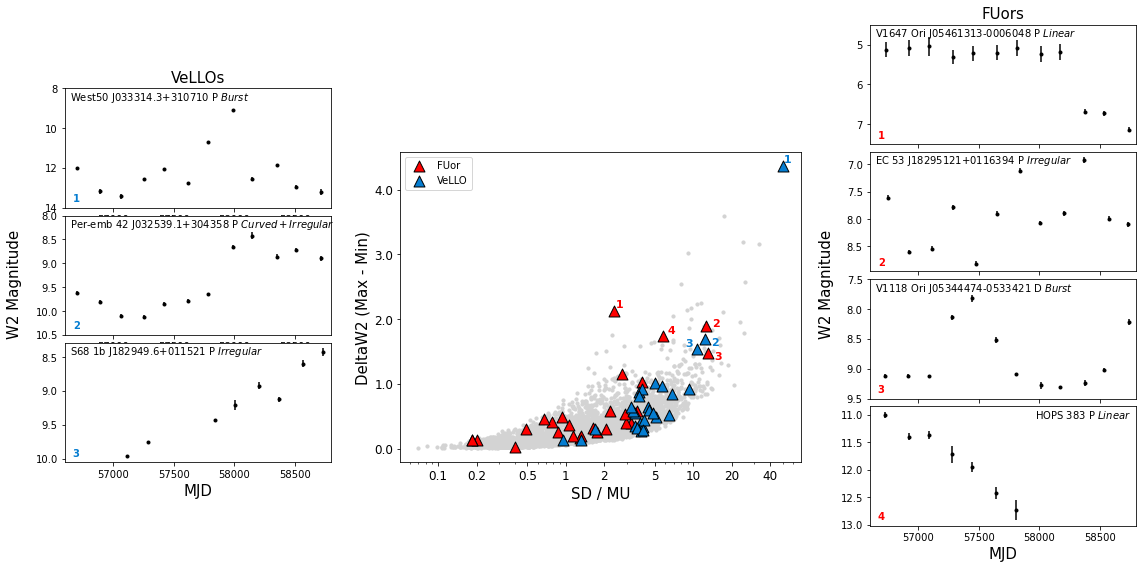

In [7]:
fig = plt.figure(figsize=(16,8)) #x, y
grid = GridSpec(8,16, #y, x
                left=0.06, bottom=0.08, right=0.99, top=0.95, wspace=0.03, hspace=0.14)

# center scatter plot
ax0 = fig.add_subplot(grid[2:7, 5:11])

# right side - FUors
ax1 = fig.add_subplot(grid[0:2,12:16])
ax2 = fig.add_subplot(grid[2:4, 12:16])
ax3 = fig.add_subplot(grid[4:6, 12:16])
ax4 = fig.add_subplot(grid[6:8, 12:16])

# left side - VeLLOs
al1 = fig.add_subplot(grid[1:3,0:4])  
al2 = fig.add_subplot(grid[3:5,0:4]) 
al3 = fig.add_subplot(grid[5:7,0:4])
# al4 = fig.add_subplot(grid[6:8,0:3]) 




pl_fu_list = [ax1,ax2,ax3,ax4]
pl_vel_list = [al1,al2,al3]
# col_list = [ax11,ax22,ax33,ax44]
sou_list = [ab0,fu0,vel0]

# y_color=['lightgray','#ffc107', '#1e88e5']
# y_color=['#D81B60', '#1E88E5', '#FFC107', '#004D40']
y_color=['lightgray','red','#057dd1']
y_label=['yso','FUor','VeLLO']

# variable scatter plot
for i in range(3):
    if i == 0:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 10, c='lightgray',
#                         label=y_label[i],
                    marker='o')
    else:
        ax0.scatter(sou_list[i].sd_sdfid_w2_flux, sou_list[i].Delta_w2,
                    s = 120, c=y_color[i],
                        label=y_label[i],edgecolor='k',
                    marker='^')

ax0.set_xscale('log')
ax0.set_xlabel('SD / MU',size=15)
ax0.set_ylabel('DeltaW2 (Max - Min)',size=15)
ax0.set_yticklabels(ax0.get_yticks(),size=12)
ax0.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
ax0.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40],size=12)
ax0.legend()        
        
    
    
# lightcurve plot
fu_list = [3180,6380,1452,2458]
vello_list = [6029, 5864, 6375, 6399]
index_list = np.arange(1,9)

   
for i in range(len(vello_list)-1):
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                            +str(vello_list[i])+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]
    
    pl_vel_list[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
    pl_vel_list[i].invert_yaxis()
    pl_vel_list[i].set_xlim(56600,58800)
    pl_vel_list[i].text(0.03,0.05,str(i+1),weight='bold',transform=pl_vel_list[i].transAxes,color=y_color[2])
    
pl_vel_list[0].text(0.02,0.9,'West50 J033314.3+310710 P $\it{Burst}$',transform=pl_vel_list[0].transAxes)
pl_vel_list[1].text(0.02,0.9,'Per-emb 42 J032539.1+304358 P $\it{Curved + Irregular}$',transform=pl_vel_list[1].transAxes)
pl_vel_list[2].text(0.02,0.9,'S68 1b J182949.6+011521 P $\it{Irregular}$',transform=pl_vel_list[2].transAxes)
pl_vel_list[2].set_xlabel('MJD',size=15)
ax0.text(vel0.loc[vel0.s_index == vello_list[0]].sd_sdfid_w2_flux+1,
             vel0.loc[vel0.s_index == vello_list[0]].Delta_w2+0.05,
             str(1),size=11,weight='bold',color=y_color[2] )
ax0.text(vel0.loc[vel0.s_index == vello_list[1]].sd_sdfid_w2_flux+1.5,
             vel0.loc[vel0.s_index == vello_list[1]].Delta_w2-0.1,
             str(2),size=11,weight='bold',color=y_color[2] )
ax0.text(vel0.loc[vel0.s_index == vello_list[2]].sd_sdfid_w2_flux-2,
             vel0.loc[vel0.s_index == vello_list[2]].Delta_w2+0.05,
             str(3),size=11,weight='bold',color=y_color[2] )
# ax0.text(vel0.loc[vel0.s_index == vello_list[3]].sd_sdfid_w2_flux+0.5,
#              vel0.loc[vel0.s_index == vello_list[3]].Delta_w2+0.05,
#              str(4),size=11,weight='bold',color=y_color[2] )
    
pl_vel_list[0].set_ylim(14,8)
pl_vel_list[1].set_ylim(10.5,8)
    
    
for i in range(len(fu_list)):
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                            +str(fu_list[i])+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]

    pl_fu_list[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
    pl_fu_list[i].invert_yaxis()
    pl_fu_list[i].set_xlim(56600,58800)
    pl_fu_list[i].text(0.03,0.05,str(i+1),weight='bold',transform=pl_fu_list[i].transAxes,color='r')
    
    
pl_fu_list[0].text(0.02,0.9,'V1647 Ori J05461313-0006048 P $\it{Linear}$',transform=pl_fu_list[0].transAxes)
pl_fu_list[1].text(0.02,0.9,'EC 53 J18295121+0116394 P $\it{Irregular}$',transform=pl_fu_list[1].transAxes)
pl_fu_list[2].text(0.02,0.9,'V1118 Ori J05344474-0533421 D $\it{Burst}$',transform=pl_fu_list[2].transAxes)
pl_fu_list[3].text(0.62,0.9,'HOPS 383 P $\it{Linear}$',transform=pl_fu_list[3].transAxes)

pl_fu_list[0].set_ylim(7.5,4.5)
pl_fu_list[2].set_ylim(9.5,7.5)

ax0.text(fu0.loc[fu0['YSO catalog'] == fu_list[0]].sd_sdfid_w2_flux+0.05,
             fu0.loc[fu0['YSO catalog'] == fu_list[0]].Delta_w2+0.05,
             str(1),size=11,weight='bold',color='r' )
ax0.text(fu0.loc[fu0['YSO catalog'] == fu_list[1]].sd_sdfid_w2_flux+1.5,
             fu0.loc[fu0['YSO catalog'] == fu_list[1]].Delta_w2,
             str(2),size=11,weight='bold',color='r' )
ax0.text(fu0.loc[fu0['YSO catalog'] == fu_list[2]].sd_sdfid_w2_flux+1.5,
             fu0.loc[fu0['YSO catalog'] == fu_list[2]].Delta_w2-0.1,
             str(3),size=11,weight='bold',color='r' )
ax0.text(fu0.loc[fu0['YSO catalog'] == fu_list[3]].sd_sdfid_w2_flux+0.5,
             fu0.loc[fu0['YSO catalog'] == fu_list[3]].Delta_w2+0.05,
             str(4),size=11,weight='bold',color='r' )
    

fig.text(0.715,0.5,'W2 Magnitude',size=15,rotation='vertical',va='center')
fig.text(0.01,0.5,'W2 Magnitude',size=15,rotation='vertical',va='center')
ax1.set_title('FUors',size=15)
al1.set_title('VeLLOs',size=15)
ax4.set_xlabel('MJD',size=15)
al4.set_xlabel('MJD',size=15)
# ax44.set_xlabel('MJD',size=15)
    







# fig.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/fuor_vello.pdf')

In [65]:
?ax0.text

In [321]:
%matplotlib inline

### Short-time Variability plot : 77

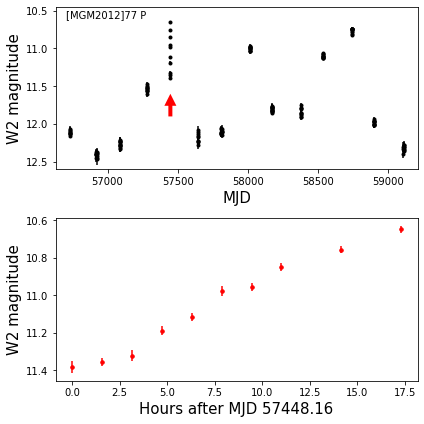

In [12]:
index = 77
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))


tl1 = 56639 
tl2 = 65000


wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                            +str(index)+'_alld.csv', 
                             names=['mjd','mag','emag','flt','class','ra','dec'],
                             skiprows=1)


xw2 = wavg[(wavg['flt'] == 'W2') &
           (np.isnan(wavg['mag']) == False) &
           (np.isnan(wavg['emag']) == False) &
           (wavg['mjd'] > tl1) &
           (wavg['mjd'] <= tl2)]


ax1.set_xlim(min(xw2.mjd) - 100, max(xw2.mjd) + 100)
selec=xw2[(xw2.mjd >57350) & (xw2.mjd<57500)]
mm=min(selec.mjd)
selec.mjd-=mm
selec.mjd*=24

ax1.errorbar(xw2.mjd, xw2.mag, xw2.emag, fmt='k.',ms=6, label='W2')
ax1.text(0.03, 0.95, r'[MGM2012]77 P', ha='left', va='center', transform=ax1.transAxes)
ax1.set_ylabel('W2 magnitude',size=15)
ax1.set_ylim(10.45, 12.60)
ax1.set_xlabel('MJD',size=15)

ax1.annotate("", xy=(mm, 11.60), xytext=(mm, 11.9),arrowprops=dict(linewidth=2, edgecolor='none', facecolor='red'), c='r')
ax1.invert_yaxis()
ax2.errorbar(selec.mjd, selec.mag, selec.emag, fmt='r.',ms=7, label='W2')
ax2.set_ylabel('W2 magnitude',size=15)
ax2.set_xlabel('Hours after MJD '+str(format(mm,".2f")),size=15)
ax2.invert_yaxis()


fig.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/short_time_77.pdf')
# fig.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure2.pdf')



### AGB example plot

In [15]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
ab.loc[ab['Index'] == 4136,['Index','var_type','combined_type']]

Index  var_type combined_type
1013   4136  periodic           NaN

413.48968604200576


Text(0, 0.5, 'W1-W2')

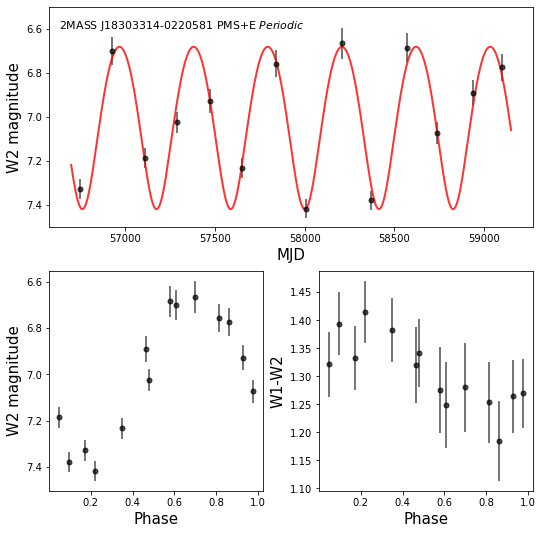

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.timeseries import LombScargle
fig = plt.figure(figsize=(8,8))
index=4136

gl = 6
gw = 8

grid = gridspec.GridSpec(gl,gw,
                left=0.1, bottom=0.1, right=0.94, top=0.94, wspace=5, hspace=1)


ax1 = fig.add_subplot(grid[0:3, 0:8])  #[y,x]
ax2 = fig.add_subplot(grid[3:6, 0:4])
ax3 = fig.add_subplot(grid[3:6, 4:8])


wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                            +str(index)+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
w1av = wavg[wavg['flt'] == 'W1']
w2av = wavg[wavg['flt'] == 'W2']
w2av=w2av.set_index(np.arange(len(w2av)))
w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
ew2f = w2av.emag * w2f / 1.0857


lsav = LombScargle(w2av.mjd, w2f, ew2f)  # flux lombscargle

frequency, power = lsav.autopower(  # nyquist_factor=5,
    maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
    minimum_frequency=1/4800)  # 0.0001) #0.2 #maximum period 10000days

period_days = 1. / frequency
period_hours = period_days * 24

best_period = period_days[np.argmax(power)]
best_frequency=1/best_period
phase = (w2av.mjd / best_period) % 1


print(best_period)

mer = w2av.join(w1av,lsuffix='_w2', rsuffix='_w1')

arw2m = np.squeeze(np.array([w2av.mjd]))
smjd = np.linspace(max(arw2m)+50, min(arw2m)-50, 1000)
flux_jmod = lsav.model(smjd, best_frequency)
mag_jmod = -2.5*np.log10(flux_jmod/171.85)
ax1.plot(smjd, mag_jmod, color='r', lw=2, alpha=0.8)

# marker size
ms = 10
alpha=0.7
ax1.errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='.k',ms = ms,alpha=alpha)

ax1.set_xlabel('MJD', fontsize=15)
ax1.set_ylabel('W2 magnitude', fontsize=15)
ax1.set_ylim(6.5, 7.5)
ax1.invert_yaxis()
ax1.text(0.02,0.9, r'2MASS J18303314-0220581 PMS+E $\it{Periodic}$', transform=ax1.transAxes, fontsize=11)



ax2.errorbar((phase-0.07)%1, mer.mag_w2, yerr=mer.emag_w2, fmt='.k',ms = ms,alpha=alpha)

ax2.set_xlabel('Phase', fontsize=15)
ax2.set_ylabel('W2 magnitude', fontsize=15)
ax2.invert_yaxis()


ax3.errorbar((phase-0.07)%1, mer.mag_w1-mer.mag_w2, yerr=np.sqrt(mer.emag_w1**2+mer.emag_w2**2), 
             fmt='k.',ms = ms,alpha=alpha)
# ax3.scatter((phase-0.07)%1, mer.mag_w1-mer.mag_w2, c='k')
ax3.set_xlabel('Phase', fontsize=15)
ax3.set_ylabel('W1-W2', fontsize=15)

# fig.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure14.pdf')


In [112]:
ds = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined.csv')
ds[ds['Index'] == 4136]

Index          ra       dec   dist_sd    avg_W1  stdev_W1   avg_eW1  \
1003   4136  277.637917 -2.349444  0.065564  8.308783  0.312415  0.037453   

        avg_W2  stdev_W2   avg_eW2  ...  sd_periodrmv  chi2_period_w2  \
1003  7.002763  0.260176  0.053317  ...      0.013161       10.802671   

      linear_fap_periodrmv  Deltaw2_periodrmv  var_type  combined_type  \
1003              0.761382           0.175172  periodic            NaN   

      sd_linrmv  mu_linrmv  sd_mu_linrmv  Deltaw2_linrmv  
1003        NaN        NaN           NaN             NaN  

[1 rows x 67 columns]

## Color variation plot

In [281]:
ab0.loc[ab0['s_index'] == 4939,['Delta_w2','max_W2','min_W2','median_W2']]
(9.245168-7.2532)/2.567262  
# 4939 - 0.77*DeltaW2

0.7759114574203957

In [ ]:
monotonic color var : 696, 646 | cyclic color var : 4939, 4924 | AGB candidate :  4136

In [540]:
ab0

s_index   dist_sd         ra        dec     avg_W1  stdev_W1   avg_eW1  \
0           1  0.047869  85.677833 -10.419250   8.667838  0.269577  0.050075   
1           2  0.183028  85.627292 -10.179944  14.818095  0.047558  0.143840   
2           3  0.218489  85.756625 -10.130639  14.839756  0.032522  0.127941   
3           4  0.051361  85.554458 -10.093028  12.232797  0.240750  0.033176   
4           5  0.036891  85.632375 -10.090611  10.805297  0.138128  0.041883   
...       ...       ...        ...        ...        ...       ...       ...   
6075    10514  0.049791  77.177249  30.449120  10.520279  0.007783  0.021138   
6076    10515  0.051359  77.331876  28.925760  11.165281  0.006093  0.024942   
6077    10516  0.042054  77.368540  29.049981   9.778089  0.008467  0.020998   
6078    10518  0.069454  77.499075  30.611616  10.173173  0.012259  0.026473   
6079    10519  0.043244  78.114949  22.896918   8.911163  0.043104  0.037317   

         avg_W2  stdev_W2   avg_eW2  ...  baluev_fap_w1  power_w1    amp_w1  \
0      7.439102  0.230115  0.054464  ...       0.848731  0.545593  0.017424   
1     13.816632  0.050996  0.184893  ...       0.921995  0.536862  0.000010   
2     13.914480  0.036157  0.191278  ...       0.995486  0.416921  0.000005   
3     10.674893  0.234924  0.029534  ...       0.350015  0.708286  0.000615   
4     10.062415  0.154047  0.037492  ...       0.999942  0.323656  0.000889   
...         ...       ...       ...  ...            ...       ...       ...   
6075  10.278364  0.012604  0.023722  ...       0.975725  0.484545  0.000069   
6076  10.943011  0.011241  0.032963  ...       0.980649  0.476929  0.000031   
6077   9.811557  0.004705  0.022490  ...       0.934411  0.526165  0.000172   
6078  10.040246  0.013185  0.025756  ...       0.821807  0.572581  0.000181   
6079   8.659289  0.046517  0.043063  ...       0.845052  0.567381  0.002062   

      sinamp_w1  ls_meanjy_w1  sd_sdfid_periodrmv_w1  sd_periodrmv_w1  \
0      0.023567      0.069776               2.970530         0.008591   
1      0.000010      0.000203               0.237802         0.000006   
2      0.000006      0.000201               0.189702         0.000004   
3      0.000615      0.002198               4.317524         0.000294   
4      0.000889      0.008288               2.892236         0.000905   
...         ...           ...                    ...              ...   
6075   0.000070      0.010648               0.250626         0.000052   
6076   0.000031      0.005873               0.184222         0.000025   
6077   0.000172      0.021051               0.270673         0.000110   
6078   0.000186      0.014598               0.328545         0.000117   
6079   0.002061      0.046772               0.767829         0.001239   

      chi2_period_w1  linear_fap_periodrmv_w1  Deltaall_w1_periodrmv  
0         104.166374                 0.975063               0.535154  
1           0.783909                 0.996729               0.113521  
2           0.472130                 0.999183               0.082025  
3         204.465376                 0.680133               0.561749  
4          97.833489                 0.999970               0.430602  
...              ...                      ...                    ...  
6075        0.790484                 0.996096               0.018306  
6076        0.311764                 0.325507               0.018721  
6077        0.956218                 0.462498               0.018187  
6078        1.086048                 0.999888               0.032240  
6079        7.445864                 0.138939               0.087299  

[5295 rows x 72 columns]

In [370]:
ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2.csv')
ab.loc[ab['s_index']==4136,'period']

3408    405.77525
Name: period, dtype: float64

In [40]:
ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2.csv')
    # vel.s_index_1
ab0 = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1) &
         (ab['class']) ]
ab0['class'].value_counts()

D                  3207
E                   984
P                   486
III                 186
F                   166
full                160
I                    31
FP                   31
debris/ev trans      17
transitional         10
evolved               7
I?                    3
C                     3
ev or trans           2
full?                 1
II                    1
Name: class, dtype: int64

In [70]:
def color_mag_mjd(index, index2, avg='cavg'):
    ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2.csv')
    # vel.s_index_1
    ab0 = ab[(ab.N_w2 > 5) &
             (ab.dist_sd < 0.3) &
             (ab.avg_eW2 < 0.2) &
    #          (ab.sd_sdfid_w2_flux > 1) &
             (ab['class']) ]

    pr_cond = ((ab0['class'] == "P") |
            (ab0['class'] == "F") |
            (ab0['class'] == "FP") |
            (ab0['class'] == "0") |
            (ab0['class'] == "I") |
            (ab0['class'] == "I?")) 


    di_cond = ((ab0['class'] == "D") |
            (ab0['class'] == "II") |
            (ab0['class'] == "full") |
            (ab0['class'] == "full?") |
            (ab0['class'] == "debris/ev trans") |
            (ab0['class'] == "transitional") |
            (ab0['class'] == "evolved") |
            (ab0['class'] == "ev or trans") )


    ev_cond = ((ab0['class'] == "E") |
            (ab0['class'] == "III") )


    ab0.loc[ab0.s_index == 1,'sd_sdfid_w2_flux']
    ab0.loc[ab0.s_index == 1,'Delta_w2']

    ab0.loc[pr_cond,'class'] = 'P'
    ab0.loc[di_cond,'class'] = 'D'
    ab0.loc[ev_cond,'class'] = 'PMS+E'


#     # call the class of the indexed yso
#     a = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/ysos_c.dat',
#                     sep="\s+", header=None,
#                     names=["index", "ra", "dec", "class", "cat"])
    yso = ab0[ab0["s_index"] == index]
    ycl = yso['class'].array[0]
    yra = yso['ra'].array[0]
    ydec = yso['dec'].array[0]

    yso2 = ab0[ab0["s_index"] == index2]
    ycl2 = yso2['class'].array[0]
    yra2 = yso2['ra'].array[0]
    ydec2 = yso2['dec'].array[0]

    if avg=='cavg':
        wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                           header=None, skiprows=1,
                           names=['mjd', 'mag', 'emag', 'flt', 'class'])
        wavg2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'+str(index2)+'_cavg.csv',
                           header=None, skiprows=1,
                           names=['mjd', 'mag', 'emag', 'flt', 'class'])
    elif avg=='alld':
        wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'+str(index)+'_alld.csv',
                           header=None, skiprows=1,
                           names=['mjd', 'mag', 'emag', 'flt', 'class'])
        wavg2 = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'+str(index2)+'_alld.csv',
                           header=None, skiprows=1,
                           names=['mjd', 'mag', 'emag', 'flt', 'class'])
    else:
        raise NameError('Wrong avg type')


    
#             col = w1av.mag.values - w2av.mag.values
#                     col_err = np.sqrt(w1av.emag.values**2 + w2av.emag.values**2)

    
    w2av = wavg[wavg['flt'] == 'W2']
    w1av = wavg[wavg['flt'] == 'W1']
    
    w2av2 = wavg2[wavg2['flt'] == 'W2']
    w1av2 = wavg2[wavg2['flt'] == 'W1']
    
    col = w1av.mag.values - w2av.mag.values
    col2 = w1av2.mag.values - w2av2.mag.values
    print(col)
    col_err = np.sqrt(w1av.emag.values**2 + w2av.emag.values**2)
    col_err2 = np.sqrt(w1av2.emag.values**2 + w2av2.emag.values**2)
    print(col_err)

    

    fig = plt.figure(figsize=(11,13))
    grid = GridSpec(8,5, #y, x
                left=0.08, bottom=0.06, right=0.98, top=0.99, wspace=0.7, hspace=0.5)

    # center scatter plot
    ax0 = fig.add_subplot(grid[0:2, 0:2])
    ax1 = fig.add_subplot(grid[2:4, 0:2])
    ax2 = fig.add_subplot(grid[0:4, 2:5])
    ax3 = fig.add_subplot(grid[4:6, 0:2])
    ax4 = fig.add_subplot(grid[6:8, 0:2])
    ax5 = fig.add_subplot(grid[4:8, 2:5])
#     axc = fig.add_subplot(grid[0:4, 5:])
    
    # marker size
    ms = 65
    
#     ax[0].set_position([0.1,0.6,0.35,0.35])
#     l,b,w,h = ax[0].get_position().bounds
#     ax[1].set_position([l,b-0.5,w,h])
#     ax[2].set_position([l+0.5,0.35,w,h])

    # lightcurve
    ax0.errorbar(w2av.mjd,w2av.mag,w2av.emag,fmt='.k',ms=0,capsize=3,alpha=0.3)
    ax0.scatter(w2av.mjd,w2av.mag,c=w2av.mjd, s=ms,cmap='rainbow')
#     ax0.set_xlabel('MJD',size=15)
    ax0.set_ylabel('W2 magnitude',size=15)
    
    ax0.invert_yaxis()

    
    # color
    ax1.errorbar(w2av.mjd,col,col_err,fmt='.k',ms=0,capsize=3,alpha=0.3)
    ax1c=ax1.scatter(w2av.mjd,col,c=w2av.mjd, s=ms,cmap='rainbow')
#     c=w2av.mjd, cmap='rainbow'

    
#     ax1.set_xlabel('MJD',size=15)
    ax1.set_ylabel('W1-W2',size=15)
    
#     ax[1].invert_yaxis()

    
    # Color-magnitude diagram
    ax2.errorbar(col,w2av.mag,yerr=w2av.emag,xerr=col_err,fmt='.k',ms=0,capsize=3,alpha=0.3)
    ax2c=ax2.scatter(col,w2av.mag,c=w2av.mjd, s=ms,cmap='rainbow')
#     ax2.set_xlabel('W1-W2',size=15)
    ax2.set_ylabel('W2 magnitude',size=15)
#     ax2.plot(0.5,0.5,marker=r'$\circlearrowright$',ms=30,transform=ax2.transAxes)
    
    
    ax2.invert_yaxis()

    
    cbar = fig.colorbar(ax2c, ax=ax2, shrink=0.5, label='MJD')
    
    # lightcurve
    ax3.errorbar(w2av2.mjd,w2av2.mag,w2av2.emag,fmt='.k',ms=0,capsize=3,alpha=0.3)
    ax3.scatter(w2av2.mjd,w2av2.mag,c=w2av2.mjd, s=ms,cmap='rainbow')
#     ax3.set_xlabel('MJD',size=15)
    ax3.set_ylabel('W2 magnitude',size=15)
    
    ax3.invert_yaxis()

    
    # color
    ax4.errorbar(w2av2.mjd,col2,col_err2,fmt='.k',ms=0,capsize=3,alpha=0.3)
    ax4c=ax4.scatter(w2av2.mjd,col2,c=w2av2.mjd, s=ms,cmap='rainbow')
#     c=w2av.mjd, cmap='rainbow'

    
    ax4.set_xlabel('MJD',size=15)
    ax4.set_ylabel('W1-W2',size=15)
    
#     ax[1].invert_yaxis()

    
    # Color-magnitude diagram
    ax5.errorbar(col2,w2av2.mag,yerr=w2av2.emag,xerr=col_err2,fmt='.k',ms=0,capsize=3,alpha=0.3)
    ax5c=ax5.scatter(col2,w2av2.mag,c=w2av2.mjd, s=ms,cmap='rainbow')
    ax5.set_xlabel('W1-W2',size=15)
    ax5.set_ylabel('W2 magnitude',size=15)
#     ax2.plot(0.5,0.5,marker=r'$\circlearrowright$',ms=30,transform=ax2.transAxes)
    cbar2 = fig.colorbar(ax4c, ax=ax5, shrink=0.5, label='MJD')
    
    ax5.invert_yaxis()
    
    ax2.text(0.04,0.93,'HOPS 141 P $\it{Burst}$',transform=ax2.transAxes)
    ax5.text(0.35,0.93,'2MASS J05392116-0705458 D $\it{Irregular}$',transform=ax5.transAxes)
    
    # Extinction vector
#     ax2.annotate("", xytext=(min(col), np.mean(w2av.mag)), xy=(min(col)+0.13, np.mean(w2av.mag)+0.43),
#             arrowprops=dict(arrowstyle="->, head_length = 1, head_width = .5", lw=2))
#     ax2.text(0.8,11.125,'$A_{K}=1$',size=15,ha='center')
    
#     ax5.annotate("", xytext=(min(col2), np.mean(w2av2.mag)), xy=(min(col2)+0.13, np.mean(w2av2.mag)+0.43),
#             arrowprops=dict(arrowstyle="->, head_length = 1, head_width = .5", lw=2))
#     ax5.text(0.6,12.8,'$A_{K}=1$',size=15,ha='center')
#     4.3/1.3
#     fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/mono_col_var_exvec.pdf')
#     fig.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure17.pdf')

    
    
    plt.show()
    print(yra, yra2, ydec, ydec2)

[0.935075   0.7179     0.6842     0.72818182 0.77816667 0.745
 1.064      1.07311111 1.11433333 1.10955556 1.009375   0.81172727
 0.9021     0.83077778]
[0.04812974 0.04802187 0.05701438 0.05114838 0.05226714 0.05301323
 0.04355456 0.03701968 0.02967707 0.03586274 0.04027794 0.05050653
 0.05882125 0.06236323]


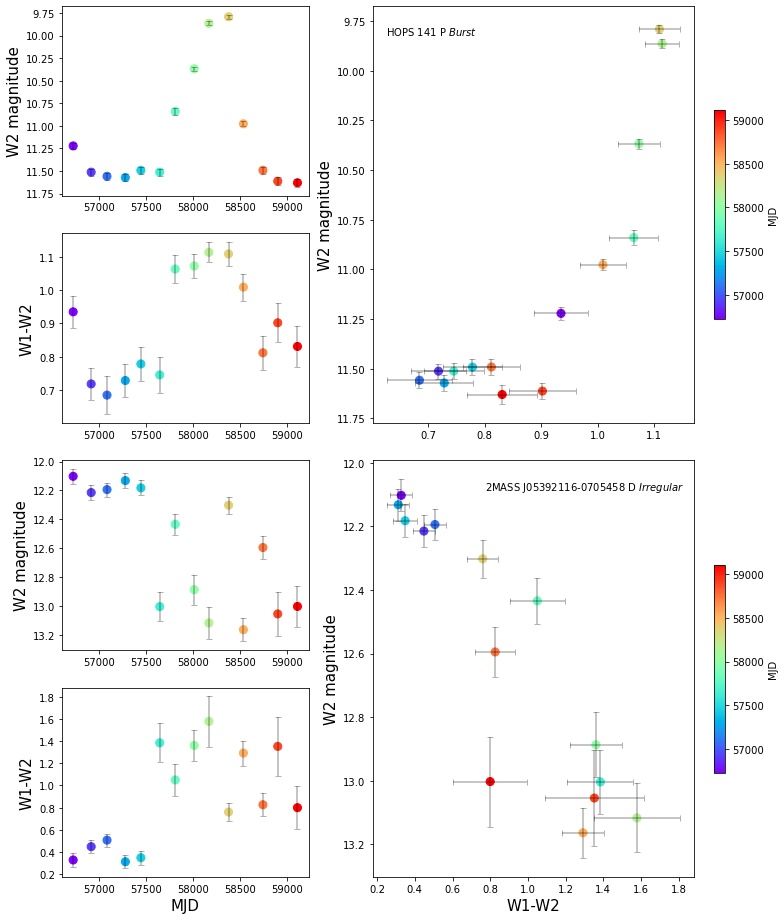

84.700083333 84.838208333 -7.01375 -7.096


In [71]:
color_mag_mjd(696,646, avg='cavg')

In [128]:
ds = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined.csv')
ds[ds['Index'] == 4939]

Index         ra      dec   dist_sd    avg_W1  stdev_W1   avg_eW1  \
1186   4939  67.684167  35.9975  0.063306  11.91566  0.865558  0.036098   

       avg_W2  stdev_W2   avg_eW2  ...  sd_periodrmv  chi2_period_w2  \
1186  8.95536   0.80266  0.030132  ...       0.05028     1305.098424   

      linear_fap_periodrmv  Deltaw2_periodrmv   var_type  combined_type  \
1186              0.094682            1.78547  irregular            NaN   

      sd_linrmv  mu_linrmv  sd_mu_linrmv  Deltaw2_linrmv  
1186        NaN        NaN           NaN             NaN  

[1 rows x 67 columns]

/home/wooseok/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


[2.94842857 2.905375   3.02008333 2.936375   3.03886667 2.87088889
 2.82744444 2.82622222 2.824375   3.12775    3.1131     2.9653
 2.983625   3.05636364]
[0.06493765 0.03271348 0.04814994 0.04372513 0.04521347 0.04628188
 0.05523172 0.04916048 0.05007307 0.05970962 0.03896537 0.04769644
 0.04687817 0.05228126]


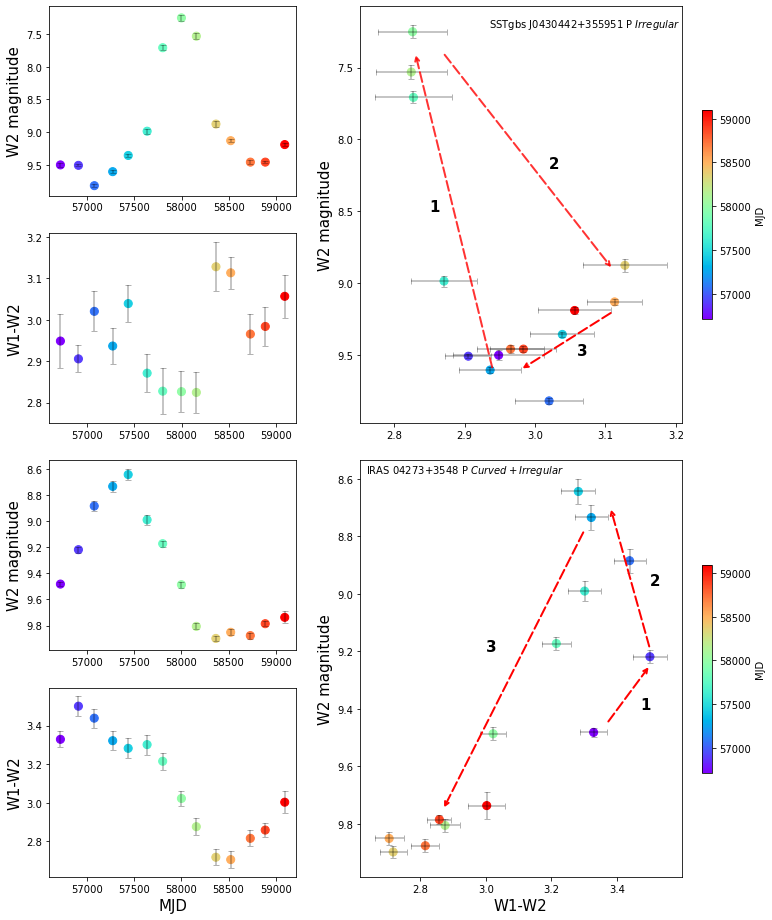

In [72]:
def color_mag_mjd_cyc(index, index2, avg='cavg'):
    import matplotlib.patches as mpatches
    ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2.csv')
    # vel.s_index_1
    ab0 = ab[(ab.N_w2 > 5) &
             (ab.dist_sd < 0.3) &
             (ab.avg_eW2 < 0.2) &
    #          (ab.sd_sdfid_w2_flux > 1) &
             (ab['class']) ]

    pr_cond = ((ab0['class'] == "P") |
            (ab0['class'] == "F") |
            (ab0['class'] == "FP") |
            (ab0['class'] == "0") |
            (ab0['class'] == "I") |
            (ab0['class'] == "I?")) 


    di_cond = ((ab0['class'] == "D") |
            (ab0['class'] == "II") |
            (ab0['class'] == "full") |
            (ab0['class'] == "full?") |
            (ab0['class'] == "debris/ev trans") |
            (ab0['class'] == "transitional") |
            (ab0['class'] == "evolved") |
            (ab0['class'] == "ev or trans") )


    ev_cond = ((ab0['class'] == "E") |
            (ab0['class'] == "III") )


    ab0.loc[ab0.s_index == 1,'sd_sdfid_w2_flux']
    ab0.loc[ab0.s_index == 1,'Delta_w2']

    ab0.loc[pr_cond,'class'] = 'P'
    ab0.loc[di_cond,'class'] = 'D'
    ab0.loc[ev_cond,'class'] = 'PMS+E'



    yso = ab0[ab0["s_index"] == index]
    ycl = yso['class'].array[0]
    yra = yso['ra'].array[0]
    ydec = yso['dec'].array[0]

    yso2 = ab0[ab0["s_index"] == index2]
    ycl2 = yso2['class'].array[0]
    yra2 = yso2['ra'].array[0]
    ydec2 = yso2['dec'].array[0]

    if avg=='cavg':
        wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                           header=None, skiprows=1,
                           names=['mjd', 'mag', 'emag', 'flt', 'class'])
        wavg2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'+str(index2)+'_cavg.csv',
                           header=None, skiprows=1,
                           names=['mjd', 'mag', 'emag', 'flt', 'class'])
    elif avg=='alld':
        wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'+str(index)+'_alld.csv',
                           header=None, skiprows=1,
                           names=['mjd', 'mag', 'emag', 'flt', 'class'])
        wavg2 = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'+str(index2)+'_alld.csv',
                           header=None, skiprows=1,
                           names=['mjd', 'mag', 'emag', 'flt', 'class'])
    else:
        raise NameError('Wrong avg type')


    

    
    w2av = wavg[wavg['flt'] == 'W2']
    w1av = wavg[wavg['flt'] == 'W1']
    
    w2av2 = wavg2[wavg2['flt'] == 'W2']
    w1av2 = wavg2[wavg2['flt'] == 'W1']
    
    col = w1av.mag.values - w2av.mag.values
    col2 = w1av2.mag.values - w2av2.mag.values
    print(col)
    col_err = np.sqrt(w1av.emag.values**2 + w2av.emag.values**2)
    col_err2 = np.sqrt(w1av2.emag.values**2 + w2av2.emag.values**2)
    print(col_err)

    

    fig = plt.figure(figsize=(11,13))
    grid = GridSpec(8,5, #y, x
                left=0.08, bottom=0.06, right=0.98, top=0.99, wspace=0.7, hspace=0.5)

    # center scatter plot
    ax0 = fig.add_subplot(grid[0:2, 0:2])
    ax1 = fig.add_subplot(grid[2:4, 0:2])
    ax2 = fig.add_subplot(grid[0:4, 2:5])
    ax3 = fig.add_subplot(grid[4:6, 0:2])
    ax4 = fig.add_subplot(grid[6:8, 0:2])
    ax5 = fig.add_subplot(grid[4:8, 2:5])

    
    # marker size
    ms = 65
    

    # lightcurve
    ax0.errorbar(w2av.mjd,w2av.mag,w2av.emag,fmt='.k',ms=0,capsize=3,alpha=0.3)
    ax0.scatter(w2av.mjd,w2av.mag,c=w2av.mjd, s=ms,cmap='rainbow')

    ax0.set_ylabel('W2 magnitude',size=15)
    
    ax0.invert_yaxis()

    
    # color
    ax1.errorbar(w2av.mjd,col,col_err,fmt='.k',ms=0,capsize=3,alpha=0.3)
    ax1c=ax1.scatter(w2av.mjd,col,c=w2av.mjd, s=ms,cmap='rainbow')


    

    ax1.set_ylabel('W1-W2',size=15)
    


    
    # Color-magnitude diagram
    ax2.errorbar(col,w2av.mag,yerr=w2av.emag,xerr=col_err,fmt='.k',ms=0,capsize=3,alpha=0.3)
    ax2c=ax2.scatter(col,w2av.mag,c=w2av.mjd, s=ms,cmap='rainbow')

    ax2.set_ylabel('W2 magnitude',size=15)
    
    
    ax2.invert_yaxis()

    
    cbar = fig.colorbar(ax2c, ax=ax2, shrink=0.5, label='MJD')
    
    # lightcurve
    ax3.errorbar(w2av2.mjd,w2av2.mag,w2av2.emag,fmt='.k',ms=0,capsize=3,alpha=0.3)
    ax3.scatter(w2av2.mjd,w2av2.mag,c=w2av2.mjd, s=ms,cmap='rainbow')
    ax3.set_ylabel('W2 magnitude',size=15)
    
    ax3.invert_yaxis()

    
    # color
    ax4.errorbar(w2av2.mjd,col2,col_err2,fmt='.k',ms=0,capsize=3,alpha=0.3)
    ax4c=ax4.scatter(w2av2.mjd,col2,c=w2av2.mjd, s=ms,cmap='rainbow')

    
    ax4.set_xlabel('MJD',size=15)
    ax4.set_ylabel('W1-W2',size=15)
    

    
    # Color-magnitude diagram
    ax5.errorbar(col2,w2av2.mag,yerr=w2av2.emag,xerr=col_err2,fmt='.k',ms=0,capsize=3,alpha=0.3)
    ax5c=ax5.scatter(col2,w2av2.mag,c=w2av2.mjd, s=ms,cmap='rainbow')
    ax5.set_xlabel('W1-W2',size=15)
    ax5.set_ylabel('W2 magnitude',size=15)
    cbar2 = fig.colorbar(ax4c, ax=ax5, shrink=0.5, label='MJD')
    
    ax5.invert_yaxis()
    
    ax2.text(0.4,0.95,'SSTgbs J0430442+355951 P $\it{Irregular}$',transform=ax2.transAxes)
    ax5.text(0.02,0.97,'IRAS 04273+3548 P $\it{Curved + Irregular}$',transform=ax5.transAxes)
    

    
    # Annotate
    
    ax2.annotate('',(2.83,7.4),(2.94,9.6),
                arrowprops=dict(arrowstyle='->',
                                color='red',
                                linestyle=(0,(5,2)),linewidth=2,alpha=0.8
                                ))
    ax2.annotate('',(3.11,8.9),(2.87,7.4),
                arrowprops=dict(arrowstyle='->',
                                color='red',
                                linestyle=(0,(5,2)),linewidth=2,alpha=0.8
                                ))
    ax2.annotate('',(2.98,9.6),(3.11,9.2),
                arrowprops=dict(arrowstyle='->',
                                color='red',
                                linestyle=(0,(5,2)),linewidth=2
                                ))
    
    ax2.text(2.85,8.5,'1',size=15,weight='bold')
    ax2.text(3.02,8.2,'2',size=15,weight='bold')
    ax2.text(3.06,9.5,'3',size=15,weight='bold')
    
    ax5.annotate('',(2.87,9.75),(3.3,8.78),
                arrowprops=dict(arrowstyle='->',
                                color='red',
                                linestyle=(0,(5,2)),linewidth=2
                                ))
    ax5.annotate('',(3.38,8.7),(3.5,9.19),
                arrowprops=dict(arrowstyle='->',
                                color='red',
                                linestyle=(0,(5,2)),linewidth=2
                                ))
    ax5.annotate('',(3.5,9.25),(3.37,9.45),
                arrowprops=dict(arrowstyle='->',
                                color='red',
                                linestyle=(0,(5,2)),linewidth=2
                                ))
    
    ax5.text(3.47,9.4,'1',size=15,weight='bold')
    ax5.text(3.5,8.97,'2',size=15,weight='bold')
    ax5.text(3.0,9.2,'3',size=15,weight='bold')
    

    # save as pdf file
    fig.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure18.pdf')
    
    plt.show()
#     print(yra, yra2, ydec, ydec2)
color_mag_mjd_cyc(4939,4924,avg='cavg')

In [142]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')

ab.loc[ab['Index'] == 4939,['Index','avg_eW2','Delta_w2','var_type','combined_type']]

Index   avg_eW2  Delta_w2   var_type combined_type
1195   4939  0.030132  2.567694  irregular           NaN

In [251]:
%matplotlib inline

[2.95225    2.90788889 3.02253846 2.93676471 3.040375   2.8706
 2.8313     2.8269     2.82166667 3.12835294 3.11545455 2.96709091]
[0.06650059 0.03422872 0.04992112 0.04432481 0.04643805 0.0452251
 0.05674548 0.05007005 0.05148091 0.06057064 0.04145445 0.05006038]


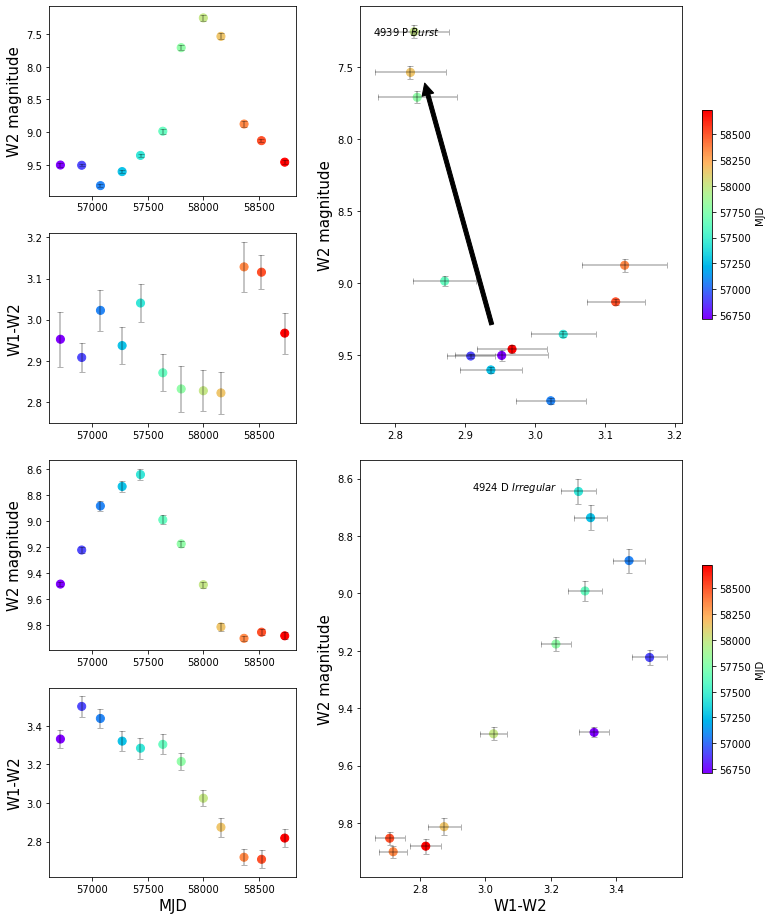

67.68416666600001 67.653333333 35.9975 35.91


In [127]:
color_mag_mjd_cyc(4939,4924,avg='cavg')

In [412]:
ab45 = ab0.loc[ab0.s_index == 10459,:]
# ab0.loc[ab0.s_index == 1,'Delta_w2']

ab45.baluev_fap*200/ab45.period

6022    0.03948
dtype: float64

In [6]:
mor_list = [10317, 10507, 
            6215, 6192, 10054, 10066]
mor_name = ['AA Tau', 'RW Aur', 
            'LRLL21', 'LRLL58', 'LkCa4', 'V410 Tau']
etc_list = [10459,10300,10496,10161,10087,10444,10442,10174,5394]
etc_name = ['GM Aur', 'DM Tau', 'V836 Tau', 'IP Tau', 'BP Tau', 
           'DS Tau', 'DR Tau', 'DG Tau', 'Sz 102']
mor_dict = { name:value for name, value in zip(mor_list, mor_name) }
etc_dict = { name:value for name, value in zip(etc_list, etc_name) } 

In [93]:
ab0.loc[ab0['Index'] == 10508,'class']

6196    full
Name: class, dtype: object

In [7]:
def scatter_lightcurve_color(index,dict_name):
    
#     try:
        ab0 = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')
#         # vel.s_index_1
#         ab_wise = ab0[(ab0.N_w2 > 5) &
#                  (ab0.dist_sd < 0.3) &
#                  (ab0.avg_eW2 < 0.2) &
#                  (ab0.sd_sdfid_w2_flux > 1) &
#                  (ab0['class']) ]
        abc = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2.csv')
    # vel.s_index_1
        abcc = abc[(abc.N_w2 > 5) &
                 (abc.dist_sd < 0.3) &
                 (abc.avg_eW2 < 0.2) &
        #          (ab.sd_sdfid_w2_flux > 1) &
                 (abc['class']) ]

        pr_cond = ((abcc['class'] == "P") |
                (abcc['class'] == "F") |
                (abcc['class'] == "FP") |
                (abcc['class'] == "0") |
                (abcc['class'] == "I") |
                (abcc['class'] == "I?")) 


        di_cond = ((abcc['class'] == "D") |
                (abcc['class'] == "II") |
                (abcc['class'] == "full") |
                (abcc['class'] == "full?") |
                (abcc['class'] == "debris/ev trans") |
                (abcc['class'] == "transitional") |
                (abcc['class'] == "evolved") |
                (abcc['class'] == "ev or trans") )


        ev_cond = ((abcc['class'] == "E") |
                (abcc['class'] == "III") )


        

        abcc.loc[pr_cond,'class'] = 'P'
        abcc.loc[di_cond,'class'] = 'D'
        abcc.loc[ev_cond,'class'] = 'PMS+E'


        

       
    
        y_color=['lightgray','#d81b60', '#1e88e5']
        # y_color=['#D81B60', '#1E88E5', '#FFC107', '#004D40']
        y_label=['yso','fuor','vellos']


        fig, ax = plt.subplots(1,3,figsize=(12,4)) #x, y

        ax0 = ax[0]
        ax1 = ax[1]
        ax2 = ax[2]

        # variable scatter plot

        ax0.scatter(abcc.sd_sdfid_w2_flux, abcc.Delta_w2,
                    s = 10, c='lightgray',
        #                         label=y_label[i],
                    marker='o')


        ax0.scatter(ab0.loc[ab0["Index"] == index,'sd_sdfid_w2_flux'],
                    ab0.loc[ab0["Index"] == index,'Delta_w2'],
                   marker='o',facecolors='none',edgecolor='r',linewidth=2,s=200)



        ax0.set_xscale('log')
        ax0.set_xlabel('SD / MU',size=15)
        ax0.set_ylabel('DeltaW2 (Max - Min)',size=15)
        ax0.set_yticklabels(ax0.get_yticks(),size=12)
        ax0.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
        ax0.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40],size=12)
        ax0.legend()        



        # lightcurve plot


        if index < 10000:
            wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                                +str(index)+'_cavg.csv', 
                                 names=['mjd','mag','emag','flt','class'],
                                 skiprows=1)
        else:
            wavg = pa.read_csv('/home/wooseok/WISE_data/Taurus/avgdata/'
                                +str(index)+'_cavg.csv', 
                                 names=['mjd','mag','emag','flt','class'],
                                 skiprows=1)
        w2av = wavg[(wavg['mjd'] > 56000) &
                                (wavg['flt'] == 'W2') &
                                (np.isnan(wavg['mag']) == False) &
                                (np.isnan(wavg['emag']) == False)]
        w1av = wavg[(wavg['mjd'] > 56000) &
                                        (wavg['flt'] == 'W1') &
                                        (np.isnan(wavg['mag']) == False) &
                                        (np.isnan(wavg['emag']) == False)]

        ax1.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
        ax1.invert_yaxis()
        ax1.set_xlim(56600,58800)
        ax1.set_xlabel('MJD',size=15)
        ax1.set_ylabel('W2 magnitude', size=15)
        # color plot


        col = w1av.mag.values - w2av.mag.values
        col_err = np.sqrt(w1av.emag.values**2 + w2av.emag.values**2)
        ax2.errorbar(w2av.mjd, col, col_err, fmt='k.')
        ax2.set_xlim(56600,58800)
        ax2.set_xlabel('MJD',size=15)
        ax2.set_ylabel('W1-W2', size=15)



        ax1.set_title(str(dict_name[index])+' (#'+str(index)+') : '
                     +str(ab0.loc[ab0['Index'] == index,'class'].values[0]),size=15)


        fig.tight_layout()
#         plt.show()
#         plt.savefig('/home/wooseok/WISE_data/ws_paper/interesting_sources/int_'+str(index)+'.pdf')
#         plt.savefig('/home/wooseok/WISE_data/ws_paper/interesting_sources/etc_'+str(index)+'.pdf')

#     except:
#         print('pass')
#         plt.close()


In [8]:
etc_dict['6215']

KeyError: '6215'

In [81]:
str(etc_dict[index])+' (#'+str(index)+') : '\
                +str(ab0.loc[ab0['Index'] == index,'class'].values[0])

KeyError: 6215

/home/wooseok/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
No handles with labels found to put in legend.


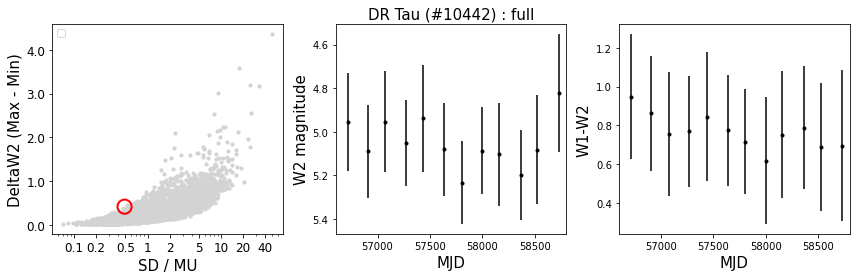

In [73]:
scatter_lightcurve_color(10442)

/home/wooseok/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


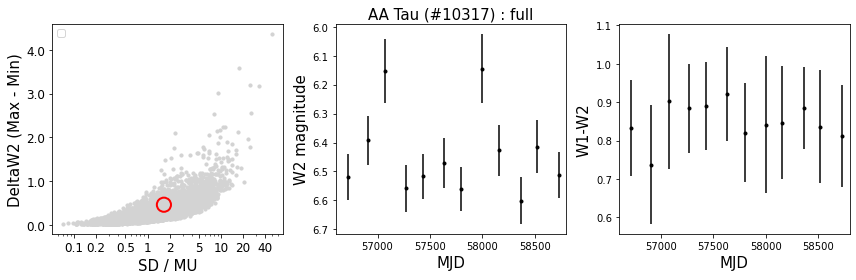

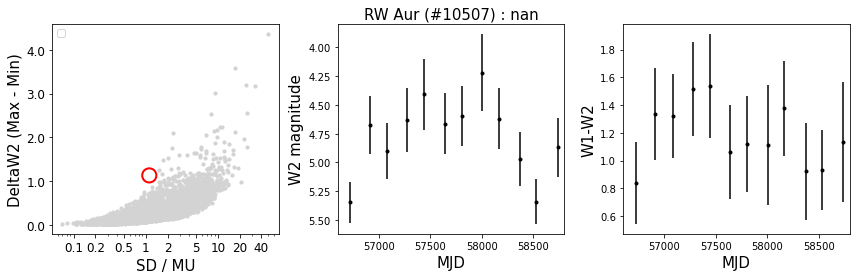

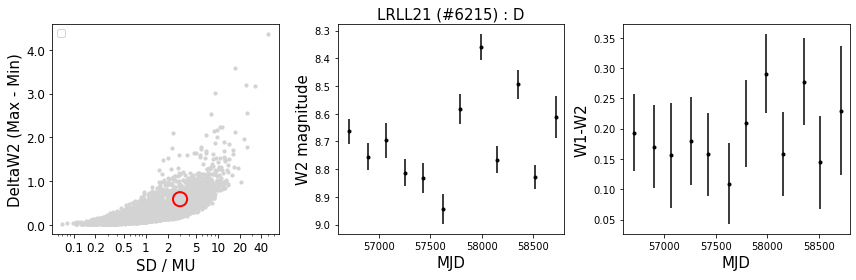

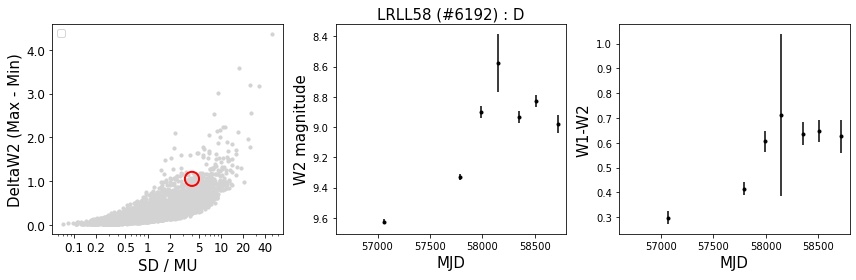

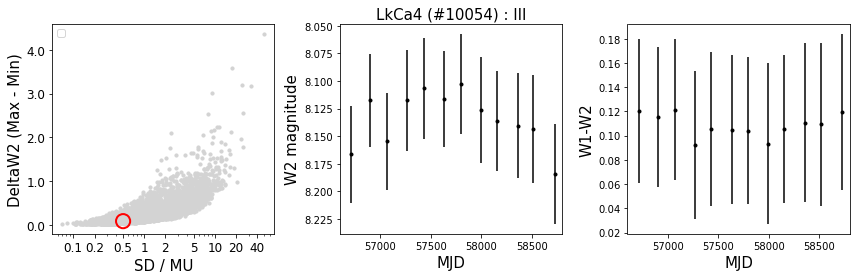

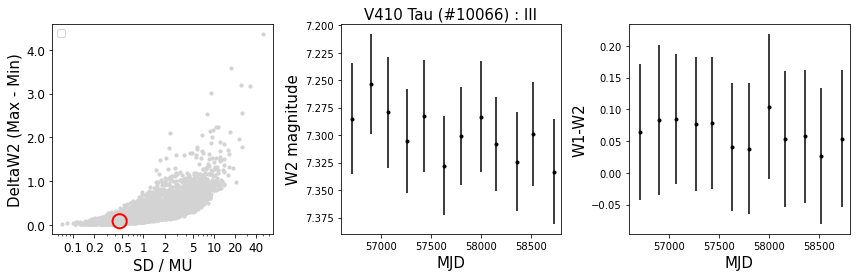

In [9]:
for i in range(len(mor_list)):
    scatter_lightcurve_color(mor_list[i],mor_dict)
#     except:
#         print('error..')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


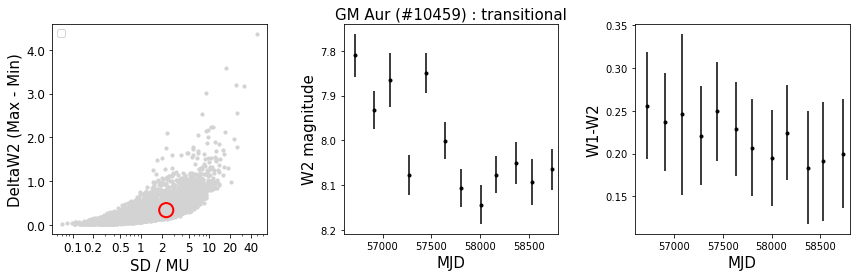

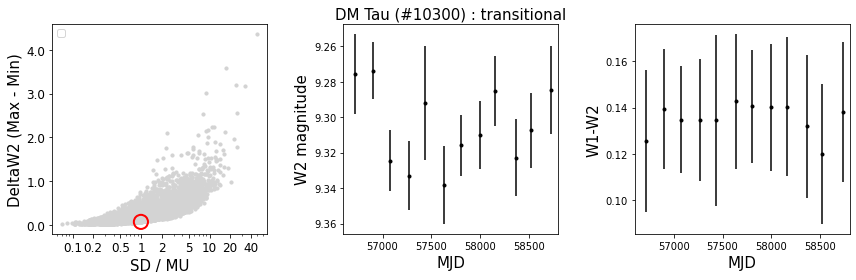

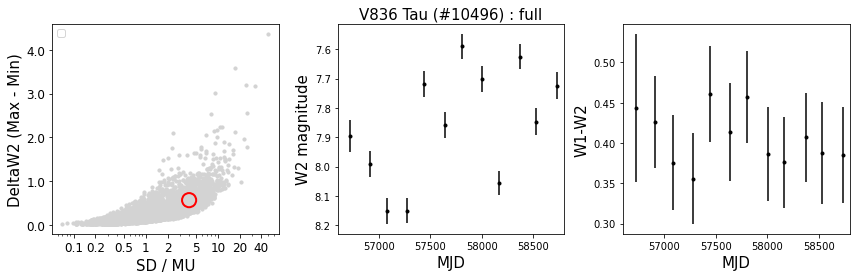

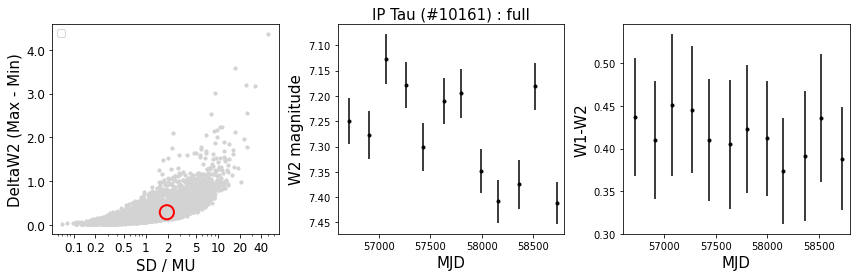

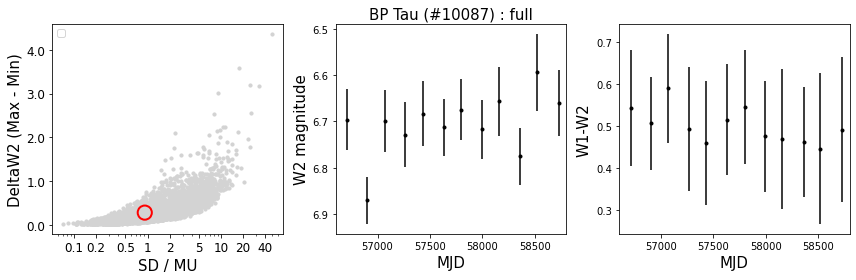

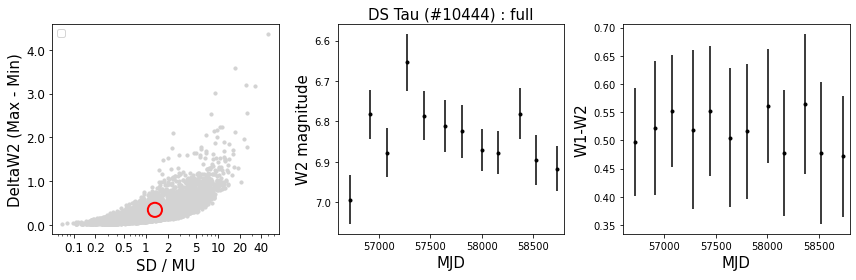

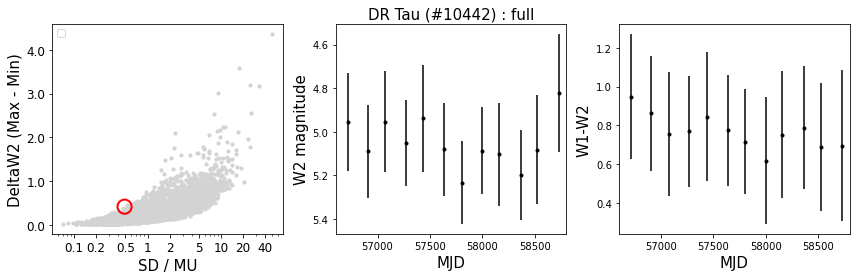

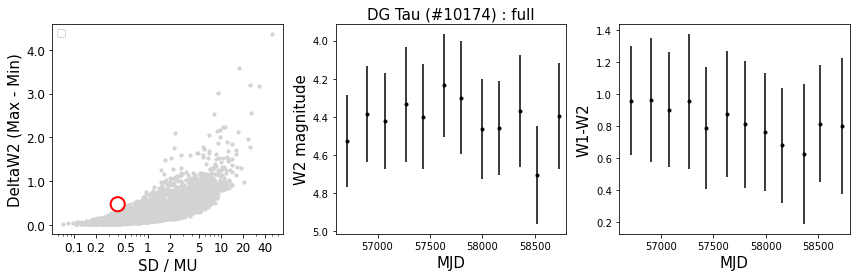

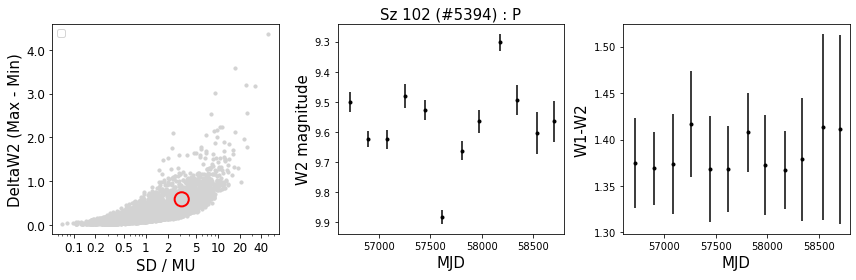

In [95]:
for i in range(len(etc_list)):
    scatter_lightcurve_color(etc_list[i],etc_dict)
#     except:
#         print('error..')

In [ ]:
prfl1 = prfl[(prfl.sd_sdfid_w2_flux < 1)]
di1 = di[(di.sd_sdfid_w2_flux < 1) ]
ev1 = ev[(ev.sd_sdfid_w2_flux < 1) ]

#linear variable
prfl2 = prfl[(prfl.sd_sdfid_w2_flux > 1) & (prfl.linear_fap < 0.001)]
di2 = di[(di.sd_sdfid_w2_flux > 1) & (di.linear_fap < 0.001)]
ev2 = ev[(ev.sd_sdfid_w2_flux > 1) & (ev.linear_fap < 0.001)]

#not linear variable ( +periodic )
prfl3 = prfl[(prfl.sd_sdfid_w2_flux > 1) & (prfl.linear_fap > 0.001)]
di3 = di[(di.sd_sdfid_w2_flux > 1) & (di.linear_fap > 0.001)]
ev3 = ev[(ev.sd_sdfid_w2_flux > 1) & (ev.linear_fap > 0.001)]

#linear + stochastic variable
prfl4 = prfl[(prfl.sd_sdfid_periodrmv > 3) & (prfl.linear_fap < 0.001)]
di4 = di[(di.sd_sdfid_periodrmv > 3) & (di.linear_fap < 0.001)]
ev4 = ev[(ev.sd_sdfid_periodrmv > 3) & (ev.linear_fap < 0.001)]

#not linear, not periodic variable
prfl5 = prfl[(prfl.sd_sdfid_periodrmv > 3) & (prfl.linear_fap > 0.001)]
di5 = di[(di.sd_sdfid_periodrmv > 3) & (di.linear_fap > 0.001)]
ev5 = ev[(ev.sd_sdfid_periodrmv > 3) & (ev.linear_fap > 0.001)]


yso_label = ['Protostar&Flat', 
             'Disk', 
             'Evolved']

b1 = [len(prfl1), len(di1), len(ev1)]
b2 = [len(prfl2), len(di2), len(ev2)]
b3 = [len(prfl3), len(di3), len(ev3)]

bb1 = [len(prfl1)/len(prfl), len(di1)/len(di), len(ev1)/len(ev)]
bb2 = [len(prfl2)/len(prfl), len(di2)/len(di), len(ev2)/len(ev)]
bb3 = [len(prfl3)/len(prfl), len(di3)/len(di), len(ev3)/len(ev)]

bbb1 = [len(prfl4)/len(prfl), len(di4)/len(di), len(ev4)/len(ev)]
bbb2 = [len(prfl5)/len(prfl), len(di5)/len(di), len(ev5)/len(ev)]

# region = np.array([['Region1', 'Region4'], ['Region2', 'Region3']])

fig, ax= plt.subplots(2,2,figsize=(8,6))

ax[0,0].bar(yso_label,b1,width=0.5)
ax[0,0].set_ylabel('# of sources')

ax[0,1].bar(yso_label,b2,width=0.5)

ax[1,1].bar(yso_label,b3,width=0.5)

# ax[0,1].bar(yso_label,b4,width=0.5)

# ax[0,0].bar(yso_label,pb1,width=0.5)
# ax[1,0].bar(yso_label,pb2,width=0.5)
# ax[1,1].bar(yso_label,pb3,width=0.5)
# ax[0,1].bar(yso_label,pb4,width=0.5)

fig2, ax2 = plt.subplots(2,2,figsize=(8,6))
ax2[0,0].bar(yso_label,np.array(bb1)*100,width=0.5)
ax2[0,0].set_title('non-variable')
ax2[0,0].set_ylabel('%')

ax2[0,1].bar(yso_label,np.array(bb2)*100,width=0.5)
ax2[0,1].set_title('linear variable (+ stochasticity)')
ax2[1,1].bar(yso_label,np.array(bb3)*100,width=0.5)
ax2[1,1].set_title('random variable ( +periodic)')

fig3, ax3 = plt.subplots(2,2,figsize=(8,6))
# ax2[0,0].bar(yso_label,np.array(bb1)*100,width=0.5)
# ax2[0,0].set_title('non-variable')
# ax2[0,0].set_ylabel('%')

ax3[0,1].bar(yso_label,np.array(bbb1)*100,width=0.5)
ax3[0,1].set_title('linear + stochastic variable')
ax3[0,1].set_ylabel('%')
ax3[1,1].bar(yso_label,np.array(bbb2)*100,width=0.5)
ax3[1,1].set_title('random variable, not periodic')

(0.055, 65.0)


<ipython-input-10-c1430048b0c3>:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig1.tight_layout()


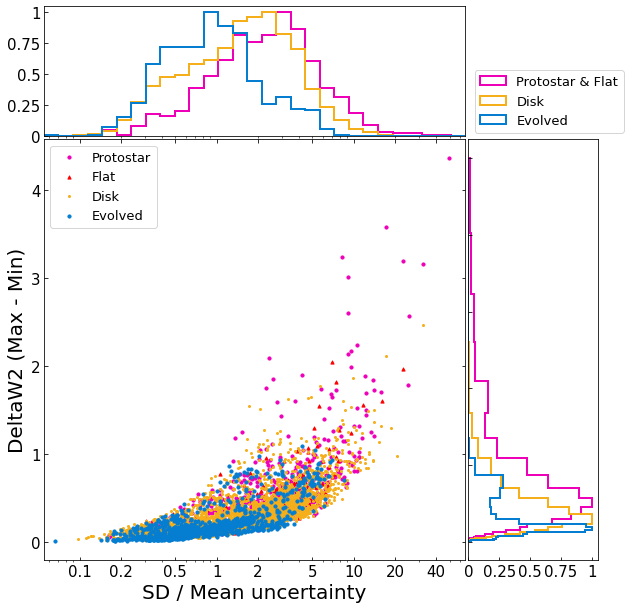

<Figure size 432x288 with 0 Axes>

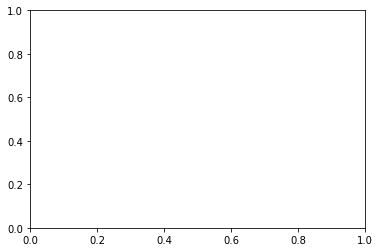

In [10]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
fig1 = plt.figure(figsize=(9,9))

index = 6380

# ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_NEOWISE_avg2_lsp_boot_w2_more5_linfap_dagb.csv')
# ab.columns

periodic_c = ab['baluev_fap'] < 0.1
lowerr02_c = ab['avg_eW2'] < 0.2
# ab = ab[periodic_c]
pr = ab[(ab['class'] == "P") & lowerr02_c]
fl = ab[(ab['class'] == "F")& lowerr02_c]# & periodic_c ]
prfl = ab[((ab['class'] == "P") | (ab['class'] == "F")) & lowerr02_c]
di = ab[(ab['class'] == "D")& lowerr02_c]# & periodic_c]
ev = ab[(ab['class'] == "E")& lowerr02_c]# & periodic_c]    

yso = [pr,fl,
       di,ev]
y_label = ['Protostar', 'Flat',
           'Disk', 'Evolved']
y_color=['#ee00b8', 'red',
         '#f4af1b', '#057dd1']
y_size=[10,10,4,10]
y_marker = ['o','^','o','o']


rot = transforms.Affine2D().rotate_deg(90)

axsc = plt.axes(rect_scatter)
axsc.tick_params(direction='in', top=True, right=True, labelsize=15)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False, labelsize=15)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False, labelsize=15)

for i in range(len(yso)):
    axsc.scatter(yso[i].sd_sdfid_w2_flux, yso[i].Deltaall_w2,
                s = y_size[i], c=y_color[i],label=y_label[i],marker=y_marker[i])
circ_yso = ab[ab['Index'] == index]
# axsc.scatter(circ_yso.sd_sdfid_w2_flux, circ_yso.Deltaall_w2,
#             s=500, facecolors='none', edgecolors='r')

### histogram_x ###
yso_hist = [prfl,di,ev]
y_label = ['Protostar & Flat',
           'Disk', 'Evolved']
y_color=['#ee00b8', 
         '#f4af1b', '#057dd1']
hist_ret = []

xlim = (0.055,65)

plt.figure()
for i in range(len(yso_hist)):
    counts, bins = np.histogram(yso_hist[i].sd_sdfid_w2_flux, bins=np.logspace(np.log10(xlim[0]),np.log10(xlim[1]), 30))
    hist_ret.append(ax_histx.hist(bins[:-1], bins, weights=counts/max(counts),histtype='step',
            color = y_color[i], label=y_label[i], linewidth=2))
    

# for i in range(len(yso_hist)):
#     ax_histx.step(hist_ret[i][1][:len(hist_ret[i][1])-1],hist_ret[i][0]/max(hist_ret[i][0]),
#              color = y_color[i],label=y_label[i])
    
### histogram_y ###

hist_ret2=[]
fig0, ax0 = plt.subplots()


for i in range(len(yso_hist)):
    counts, bins = np.histogram(yso_hist[i].Deltaall_w2, bins=np.logspace(np.log10(9e-3),np.log10(5), 30))
#     plt.hist()
    hist_ret2.append(ax_histy.hist(bins[:-1],bins, weights=counts/max(counts),histtype='step',
#             bins=np.logspace(np.log10(9e-3),np.log10(5), 30),
            color = y_color[i], label=y_label[i], linewidth=2, orientation='horizontal'))
    

# for i in range(len(yso_hist)):
#     ax_histy.step(hist_ret2[i][1][:len(hist_ret2[i][1])-1],hist_ret2[i][0]/max(hist_ret2[i][0]),
#              color = y_color[i],label=y_label[i])


    
    
# plt.legend()
axsc.set_xlim(xlim)
axsc.set_xscale('log')
# axsc.set_yscale('log')
axsc.set_xlabel('SD / Mean uncertainty',size=20)
axsc.set_ylabel('DeltaW2 (Max - Min)',size=20)
axsc.set_xticks([0.1,0.2,0.5,1,2,5,10,20,40])
axsc.set_xticklabels([0.1,0.2,0.5,1,2,5,10,20,40])
# axsc.set_yticks([0.01,0.1,1,4])
# axsc.set_yticklabels([0.01,0.1,1,4])
# axsc.set_yticklabels([0.,1.,2.,3.,4.],size=15)

ylm = axsc.get_ylim()

# ax_histx.set_yscale('log')
# ax_histy.set_xscale('log')

ax_histy.set_xticks([0,0.25,0.5,0.75,1])
ax_histy.set_xticklabels([0,0.25,0.5,0.75,1])
# ax_histy.set_yscale('log')


ax_histx.set_yticks([0,0.25,0.5,0.75,1])
ax_histx.set_yticklabels([0,0.25,0.5,0.75,1])
ax_histx.set_xlim(axsc.get_xlim())
ax_histx.set_xscale('log')
ax_histx.set_xticks([])
print(axsc.get_xlim())
# ax_histx.legend()
ax_histy.legend(fontsize=13, loc='lower left', bbox_to_anchor=(0.0, 1.0))
axsc.legend(fontsize=13)
# ? ax_histy
fig1.tight_layout()
# fig1.savefig('dw2_vs_sdsdfid_whist_linear.pdf')


In [ ]:
#057DD1, an orange like #F4AF1B, and a magenta like #ee00B8

In [64]:
#hist - maximum normalization을 하는 방법을 못찾음.. 추후 진행하기.

yso_hist = [prfl,di,ev]
y_label = ['Protostar & Flat',
           'Disk', 'Evolved']
y_color=['#ee00b8', 
         '#f4af1b', '#057dd1']
hist_ret = []
plt.figure(figsize=(8,6))
for i in range(len(yso_hist)):
    hist_ret.append(plt.hist(yso_hist[i].avg_W2,histtype='step',
#             bins=np.logspace(np.log10(5e-2),np.log10(5e1), 30),
                             density=True,
                             linewidth=3,
            color = y_color[i], label=y_label[i]))
plt.gca().invert_xaxis()
# plt.xscale('log')
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Mean W2 magnitude',size=15)
# plt.legend(fontsize=12)

Text(0.5, 0, 'Mean W2 magnitude')

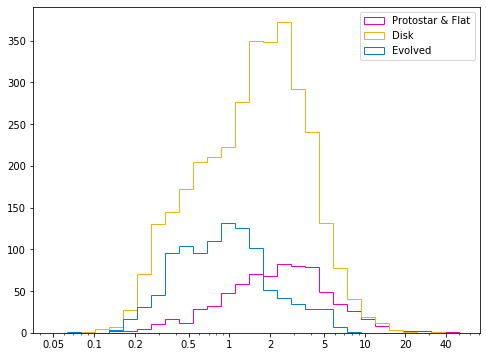

In [8]:
#hist - maximum normalization을 하는 방법을 못찾음.. 추후 진행하기.

yso_hist = [prfl,di,ev]
y_label = ['Protostar & Flat',
           'Disk', 'Evolved']
y_color=['#ee00b8', 
         '#f4af1b', '#057dd1']
hist_ret = []
plt.figure(figsize=(8,6))
for i in range(len(yso_hist)):
    hist_ret.append(plt.hist(yso_hist[i].sd_sdfid_w2_flux,histtype='step',
            bins=np.logspace(np.log10(5e-2),np.log10(5e1), 30),
            color = y_color[i], label=y_label[i]))
plt.xscale('log')
plt.xticks([0.05,0.1,0.2,0.5,1,2,5,10,20,40], [0.05,0.1,0.2,0.5,1,2,5,10,20,40])
plt.legend()

In [123]:

ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2.csv')

ab.loc[(ab.s_index == 597)|  #J05385001-0720184
       (ab.s_index ==2842) | # J05412327-0217357
       (ab.s_index ==2866) | # J05420932-0209501
       (ab.s_index ==4467),'class'] # J18321599-0234434

558     D
2310    P
2332    D
3704    F
Name: class, dtype: object

## Table 2. number of variable sources

In [17]:
ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2.csv')


abc = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
         (ab.Delta_w2 > 3*ab.avg_eW2) &
#          (ab.sd_sdfid_w2_flux > 3) &
         (ab['class']) ]
#          & (ab['period'] > 200)]  #200 밑에인게 한개 있었다... 

print('initial:', len(abc))
# print('original:', len(abcd) )


pr = abc[(abc['class'] == "P") |
        (abc['class'] == "F") |
        (abc['class'] == "FP") |
        (abc['class'] == "0") |
        (abc['class'] == "I") |
        (abc['class'] == "I?") ]


di = abc[(abc['class'] == "D") |
        (abc['class'] == "II") |
        (abc['class'] == "full") |
        (abc['class'] == "full?") |
        (abc['class'] == "debris/ev trans") |
        (abc['class'] == "transitional") |
        (abc['class'] == "evolved") |
        (abc['class'] == "ev or trans") 
        ]

ev = abc[(abc['class'] == "E") |
        (abc['class'] == "III") 
        ]


# by LSP
print('linear')
print(len(pr[(pr.baluev_fap*200/pr.period<0.01) &     #26
   (pr.period >= 4000) &
    (pr.linear_fap_w2 < 1e-4)])) # 50
print(len(di[(di.baluev_fap*200/di.period<0.01) &     #19
   (di.period >= 4000) &
    (di.linear_fap_w2 < 1e-4)])) # 62
print(len(ev[(ev.baluev_fap*200/ev.period<0.01) &     #7
   (ev.period >= 4000) &
    (ev.linear_fap_w2 < 1e-4)])) # 14 
abc_lin = abc[(abc.baluev_fap*200/abc.period<0.01) &    #52
              (abc.period >= 4000) & 
              (abc.linear_fap_w2 < 1e-4)]
print('lin_total',len(abc_lin))
# abc_lin.to_csv('/home/wooseok/WISE_data/csvfiles/typeI_linear_variables.csv') #total 126
# print(abc_lin.s_index)

# FAP (LLSF) < 0.001 - FAP(LSP) < 0.01
#                    - FAP(LSP) > 0.01 - 있나??
#                                      - 모두 4000 + 하나 2800, 
#                                         얘들은 그럼 irregular?
#                                         - 0.001

# abc_lin[abc_lin.period < 3000].s_index.values

# not by LSP but linear?
# abc_lin_nop = abc[(abc.baluev_fap*200/abc.period > 0.01) &
#                  (abc.linear_fap_w2<0.0001)]
# abc_lin_nop.s_index.values
# abc_lin_nop

# abc_more_lin = abc[(abc.linear_fap_w2 < 0.001) &
#                   (abc.period < 5000) &
#                   (abc.period > 4000)]
# abc_more_lin.s_index.values


# abc_not_lin = abc[(abc.linear_fap_w2 > 0.001) &
#                   (abc.baluev_fap*200/abc.period < 0.01) &
#                   (abc.period > 4000)]
# abc_not_lin.period.value_counts()
# abc_not_lin.s_index.values
# abc_lin = abc[abc.linear_fap_w2 < 0.0001]
# abc_lin

# abc_lin_nop.period
# print(abc_lin_nop.baluev_fap*200/abc_lin_nop.period)
# abc_lin_nop


#Type II - period
print('per: ',len(pr[(pr.baluev_fap*200/pr.period<0.01) & # 4
  (pr.period > 200) & (pr.period < 1000)]))
print('per: ',len(di[(di.baluev_fap*200/di.period<0.01) & # 18 #changed
  (di.period > 200) & (di.period < 1000)]))
print('per: ',len(ev[(ev.baluev_fap*200/ev.period<0.01) & # 57 # changed
  (ev.period > 200) & (ev.period < 1000)]))

abc_per = abc[(abc.baluev_fap*200/abc.period<0.01) & # total 79 #changed
  (abc.period > 200 ) & (abc.period < 1000)] 
print('per_total: ',len(abc_per))
# abc_per.to_csv('/home/wooseok/WISE_data/csvfiles/typeII_periodic_variables.csv')


#Type III - curved
print('cur: ', len(pr[(pr.baluev_fap*200/pr.period<0.01) & 
                      (
                          
                      (  (pr.period >= 1000) & (pr.period < 4000)  )
                       |  #or
                      (  (pr.linear_fap_w2 > 1e-4) & (pr.period == 4000)) 
                          
                      )
                       ]))  # 4000 but not linear
                      
print('cur: ', len(di[(di.baluev_fap*200/di.period<0.01) & 
                      (
                          
                      (  (di.period >= 1000) & (di.period < 4000)  )
                       |  #or
                      (  (di.linear_fap_w2 > 1e-4) & (di.period == 4000)) 
                          
                      )
                       ])) # 4000 but not linear
                      
print('cur: ', len(ev[(ev.baluev_fap*200/ev.period<0.01) & 
                      (
                          
                      (  (ev.period >= 1000) & (ev.period < 4000)  )
                       |  #or
                      (  (ev.linear_fap_w2 > 1e-4) & (ev.period == 4000)) 
                          
                      )
                       ]))   # 4000 but not linear

abc_cur = abc[(abc.baluev_fap*200/abc.period<0.01) & # 48 # changed
                      ( # 2 conditions
                          
                      (  (abc.period >= 1000) & (abc.period < 4000)  )
                       |  #or
                      (  (abc.linear_fap_w2 > 1e-4) & (abc.period == 4000)) 
                          
                      )
                       ]
print('cur_total: ', len(abc_cur))
# abc_cur.to_csv('/home/wooseok/WISE_data/csvfiles/typeIII_curved_variables.csv') #total 

abc_sec = pa.concat([abc_lin, abc_per, abc_cur]) #no duplication
# abc.set_index('s_index')
abc_stoch = abc.set_index('s_index').drop(abc_sec.s_index.values)

prs = abc_stoch[(abc_stoch['class'] == "P") |
        (abc_stoch['class'] == "F") |
        (abc_stoch['class'] == "FP") |
        (abc_stoch['class'] == "0") |
        (abc_stoch['class'] == "I") |
        (abc_stoch['class'] == "I?") ]


dis = abc_stoch[(abc_stoch['class'] == "D") |
        (abc_stoch['class'] == "II") |
        (abc_stoch['class'] == "full") |
        (abc_stoch['class'] == "full?") |
        (abc_stoch['class'] == "debris/ev trans") |
        (abc_stoch['class'] == "transitional") |
        (abc_stoch['class'] == "evolved") |
        (abc_stoch['class'] == "ev or trans") 
        ]

evs = abc_stoch[(abc_stoch['class'] == "E") |
        (abc_stoch['class'] == "III") 
        ]



#Type IV - burst
# max-median / deltaw2 > 0.8 , deltaw2 > 0.5
print('bur: ', len(prs[((prs.median_W2-prs.max_W2)/prs.Delta_w2 > 0.8)])) # & # 17
#   (pr.Delta_w2 > 0.5)]))
print('bur: ', len(dis[((dis.median_W2-dis.max_W2)/dis.Delta_w2 > 0.8)])) # & # 37
#   (di.Delta_w2 > 0.5)]))
print('bur: ', len(evs[((evs.median_W2-evs.max_W2)/evs.Delta_w2 > 0.8)])) # & # 4
#   (ev.Delta_w2 > 0.5)]))

abc_bur = abc_stoch[((abc_stoch.median_W2-abc_stoch.max_W2)/abc_stoch.Delta_w2 > 0.8)]# & # total 58
#   (abc.Delta_w2 > 0.5)]
print('bur_total: ', len(abc_bur))
# abc_bur.to_csv('/home/wooseok/WISE_data/csvfiles/typeIV_burst_variables.csv')


#Type V - dimming
# median - min / deltaw2 > 0.8, deltaw2 > 0.5
print('dim: ',len(prs[(abs(prs.median_W2-prs.min_W2)/prs.Delta_w2 > 0.8)]))# & # 3
#   (pr.Delta_w2 > 0.5)]))
print('dim: ',len(dis[(abs(dis.median_W2-dis.min_W2)/dis.Delta_w2 > 0.8)]))# & # 13
#   (di.Delta_w2 > 0.5)]))
print('dim: ',len(evs[(abs(evs.median_W2-evs.min_W2)/evs.Delta_w2 > 0.8)]))# & # 0
#   (ev.Delta_w2 > 0.5)]))

abc_dim = abc_stoch[(abs(abc_stoch.median_W2-abc_stoch.min_W2)/abc_stoch.Delta_w2 > 0.8)]# & # total 16
#               (abs(abc.median_W2-abc.min_W2)/abc.Delta_w2 < 0.8) &
#               (abc.Delta_w2 > 0.5)]
print('dim_total: ',len(abc_dim))
# abc_dim.to_csv('/home/wooseok/WISE_data/csvfiles/typeV_dim_variables.csv')

#Type VI - irregular
# lin per cur bur dim... else.

abc_lin = abc_lin.set_index('s_index')
abc_per = abc_per.set_index('s_index')
abc_cur = abc_cur.set_index('s_index')

abc_aa = pa.concat([abc_lin, abc_per, abc_cur, abc_bur, abc_dim],verify_integrity=False)

print('sources : ',len(abc_lin), len(abc_per), len(abc_cur), len(abc_bur), len(abc_dim))

abc_aa.index

abc_irr = abc.set_index('s_index').drop(abc_aa.index.values)
abc_irr_3 = abc_irr[abc_irr.sd_sdfid_w2_flux > 3]
print('abc_irr_3: ',len(abc_irr_3))

# abc_irr_3.to_csv('/home/wooseok/WISE_data/csvfiles/typeVI_irr_variables.csv')


pr_irr = abc_irr_3[(abc_irr_3['class'] == "P") |
            (abc_irr_3['class'] == "F") |
            (abc_irr_3['class'] == "FP") |
            (abc_irr_3['class'] == "0") |
            (abc_irr_3['class'] == "I") |
            (abc_irr_3['class'] == "I?") ]


di_irr = abc_irr_3[(abc_irr_3['class'] == "D") |
        (abc_irr_3['class'] == "II") |
        (abc_irr_3['class'] == "full") |
        (abc_irr_3['class'] == "full?") |
        (abc_irr_3['class'] == "debris/ev trans") |
        (abc_irr_3['class'] == "transitional") |
        (abc_irr_3['class'] == "evolved") |
        (abc_irr_3['class'] == "ev or trans") 
        ]

ev_irr = abc_irr_3[(abc_irr_3['class'] == "E") |
        (abc_irr_3['class'] == "III") 
        ]

print('irr: ', len(pr_irr), len(di_irr), len(ev_irr), len(abc_irr_3))

abc_lin['var_type'] = 'linear'
abc_cur['var_type'] = 'curved'
abc_per['var_type'] = 'periodic'
abc_bur['var_type'] = 'burst'
abc_dim['var_type'] = 'drop'
abc_irr_3['var_type'] = 'irregular'

abc_total = pa.concat([abc_lin, abc_cur, abc_per, abc_bur, 
                      abc_dim, abc_irr_3])

abcd = abc_total.sort_values('s_index')
abcd.to_csv('/home/wooseok/WISE_data/csvfiles/variable_table.csv')

initial: 3640
linear
29
19
7
lin_total 55
per:  3
per:  18
per:  56
per_total:  77
cur:  75
cur:  119
cur:  21
cur_total:  215
bur:  19
bur:  112
bur:  7
bur_total:  138
dim:  3
dim:  28
dim:  6
dim_total:  37
sources :  55 77 215 138 37
abc_irr_3:  916
irr:  208 648 60 916


<ipython-input-17-baa8895e4801>:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc_bur['var_type'] = 'burst'
<ipython-input-17-baa8895e4801>:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc_dim['var_type'] = 'drop'
<ipython-input-17-baa8895e4801>:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [24]:
abcd = abc_total.sort_values('s_index')
abcd.to_csv('/home/wooseok/WISE_data/csvfiles/variable_table.csv')

### VeLLOs crossmatch

In [229]:
vel = pa.read_csv('/home/wooseok/WISE_data/csvfiles/vel_wise_match_1sec.csv')


vell = vel[(vel.N_w2 > 5) &
         (vel.dist_sd < 0.3) &
         (vel.avg_eW2 < 0.2) &
         (vel.Delta_w2 > 3*vel.avg_eW2) &
#          (vel.sd_sdfid_w2_flux > 1) &
         (vel['class']) ]

abc = vell
pr = abc[(abc['class'] == "P") |
        (abc['class'] == "F") |
        (abc['class'] == "FP") |
        (abc['class'] == "0") |
        (abc['class'] == "I") |
        (abc['class'] == "I?") ]


di = abc[(abc['class'] == "D") |
        (abc['class'] == "II") |
        (abc['class'] == "full") |
        (abc['class'] == "full?") |
        (abc['class'] == "debris/ev trans") |
        (abc['class'] == "transitional") |
        (abc['class'] == "evolved") |
        (abc['class'] == "ev or trans") 
        ]
ev = abc[(abc['class'] == "E") |
        (abc['class'] == "III") 
        ]

len(pr)+len(di)+len(ev)
len(vel)


66

## Changed variability light curve plot

In [35]:
v1 = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')
v1[v1['Index'] == 1]

Index         ra       dec    avg_W1  stdev_W1   avg_eW1    avg_W2  \
0      1  85.677833 -10.41925  8.667838  0.269577  0.050075  7.439102   

   stdev_W2   avg_eW2  N_w1  ...  linear_fap_w1  linear_fap_w2  center_mag_w1  \
0  0.230115  0.054464    12  ...       0.123291       0.312809       8.489154   

   center_mag_w2    max_W1  min_W1  median_W1    max_W2   min_W2  median_W2  
0       7.315183  8.063308   8.915      8.776  6.904615  7.72575   7.521647  

[1 rows x 47 columns]

In [15]:
v1 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
v1[v1.s_index == 380].linear_fap_w2

Series([], Name: linear_fap_w2, dtype: float64)

In [244]:
index =6380

wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
w2av = wavg[(wavg['mjd'] > 56000) &
                                (wavg['flt'] == 'W2') &
                                (np.isnan(wavg['mag']) == False) &
                                (np.isnan(wavg['emag']) == False)]
w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
w2f.reset_index(drop=True)[11]

0.0993880458941223

In [3]:
def chvar_lin_plot(index,name):

    fig, ax = plt.subplots(1,2,figsize=(10,3))

    # plt.subplots_adjust

    # increase / decrease / burst / dimming 

    # stochastic / linear / curved / periodic

    # index = [597, 5862, 4939, 6307]
     #669
    # index = [597, 2842, 4939,4688]

    # index = [85,2842,4939,6307]
    v0 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
    v1 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
    v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
#     v1 = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')
#     v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/3rd_obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')

    # periodic candidates:
    # index = [669, 4688,6313,3614]
    # index = [6036,3325,4491,3614]
    for i in range(2):
        if i == 0:
            wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
        elif i == 1:
            wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                               names=['mjd','mag','emag','flt','class'],
                               skiprows=1)

        w2av = wavg[(wavg['mjd'] > 56000) &
                                (wavg['flt'] == 'W2') &
                                (np.isnan(wavg['mag']) == False) &
                                (np.isnan(wavg['emag']) == False)]

        # flux conversion
        w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
        ew2f = w2av.emag * w2f / 1.0857


    #     ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
        ax[i].errorbar(w2av.mjd, w2f, ew2f, fmt='k.')
    #     ax[i].invert_yaxis()

        ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
        ylab = np.round(-2.5*np.log10(ytick/171.85),2)

        ax2 = ax[i].twinx()
        ax2.errorbar(w2av.mjd, w2f, ew2f, fmt='k^',ms=10, alpha=0)
        ax2.set_yticks(ytick)
        ax2.set_yticklabels(ylab)
        if i == 1:
            ax2.set_ylabel('W2 magnitude', size=15)

        #slope fit
#         if i < 1 :   
        def func(x,a,b):
                return a*x + b

        resw2, cov = curve_fit(func,w2av.mjd,w2f, sigma=ew2f
                              ,absolute_sigma = True)

        yfit= np.polyval(resw2,w2av.mjd)
#         if i > 0:
#             ax[i].plot(w2av.mjd,yfit,label='fit',alpha=0.7)

        #curve fit
#         if i > 1:
        lsav = LombScargle(w2av.mjd, w2f, ew2f)
        frequency, power = lsav.autopower(  # nyquist_factor=5,
                                            maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                            minimum_frequency=1/4000)
        best_frequency = frequency[np.argmax(power)]
        arw2m = np.squeeze(np.array([w2av.mjd]))
        smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
        flux_jmod = lsav.model(smjd, best_frequency)
#         if i == 1:
#             ax[i].plot(smjd, flux_jmod, color='r', lw=2,
#                          alpha=0.6
#                       )
        
        # mark burst/drop points
#         if i == 1:    
#             ax[i].scatter([w2av.mjd.reset_index(drop=True)[0]],
#                   [w2f.reset_index(drop=True)[0]],
#                   s = 200, facecolors='none', edgecolors='r',lw=2)
        
        # annotate FAPs
#         if i == 0:
#             ax[i].text(0.57,0.85,r'FAP$_{\rm Lin}$ : '+'{:3.2e}'.format(v1[v1['s_index'] == index].linear_fap_w2.values[0]),fontsize=12,transform=ax[0].transAxes)
#             ax[i].text(0.57,0.05,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v1[v1['s_index'] == index].baluev_fap.values[0]*200/\
#                                                            v1[v1['s_index'] == index].period.values[0]),fontsize=12,transform=ax[0].transAxes)

#         if i == 1:
#             ax[i].text(0.57,0.85,r'FAP$_{\rm Lin}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].linear_fap_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].text(0.05,0.85,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].mod_baluev_fap.values[0]),fontsize=12,transform=ax[1].transAxes)
    
    
#         annotate FAPs
        v1.loc[v1['s_index'] == 3184].Delta_w2*0.8
# v1.loc[v1['s_index'] == 3184].min_W2 - v1.loc[v1['s_index'] == 3184].median_W2
    
    
    
    
#     ####   drop   ######
#         if i == 0:
#             ax[i].text(-0.1,1,'$\Delta$W2 : {0:4.2f} mag\nmin-medianW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v1[v1['s_index'] == index].Delta_w2.values[0],
#                               v1[v1['s_index'] == index].min_W2.values[0]-v1[v1['s_index'] == index].median_W2.values[0],
#                               100*(v1[v1['s_index'] == index].min_W2.values[0]-v1[v1['s_index'] == index].median_W2.values[0])/v1[v1['s_index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[0].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
        
#         elif i == 1:
            
#             ax[i].text(0,1,'$\Delta$W2 : {0:4.2f} mag\nmin-medianW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v0[v0['Index'] == index].Delta_w2.values[0],
#                               v0[v0['Index'] == index].min_W2.values[0]-v0[v0['Index'] == index].median_W2.values[0],
#                               100*(v0[v0['Index'] == index].min_W2.values[0]-v0[v0['Index'] == index].median_W2.values[0])/v0[v0['Index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
#     #################    


####   burst   ######
        if i == 0:
            ax[i].text(-0.1,1,'$\Delta$W2 : {0:4.2f} mag\nmedian-maxW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
                       .format(v1[v1['s_index'] == index].Delta_w2.values[0],
                              v1[v1['s_index'] == index].median_W2.values[0]-v1[v1['s_index'] == index].max_W2.values[0],
                              100*(v1[v1['s_index'] == index].median_W2.values[0]-v1[v1['s_index'] == index].max_W2.values[0])/v1[v1['s_index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[0].transAxes)
            ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
            ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
            ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
        
        elif i == 1:
            
            ax[i].text(0,1,'$\Delta$W2 : {0:4.2f} mag\nmedian-maxW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
                       .format(v0[v0['Index'] == index].Delta_w2.values[0],
                              v0[v0['Index'] == index].median_W2.values[0]-v0[v0['Index'] == index].max_W2.values[0],
                              100*(v0[v0['Index'] == index].median_W2.values[0]-v0[v0['Index'] == index].max_W2.values[0])/v0[v0['Index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
            ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
            ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
            ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
    #################      


#             ax[i].text(0.57,0.05,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v1[v1['s_index'] == index].baluev_fap.values[0]*200/\
#                                                            v1[v1['s_index'] == index].period.values[0]),fontsize=12,transform=ax[0].transAxes)

#         if i == 1:
#             ax[i].text(0.57,0.85,r'FAP$_{\rm Lin}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].linear_fap_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].text(0.05,0.85,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].mod_baluev_fap.values[0]),fontsize=12,transform=ax[1].transAxes)
    
    
    ax[0].set_xlabel('MJD',size=15)
    ax[1].set_xlabel('MJD',size=15)
    ax[0].set_ylabel('W2 flux',size=15)

#     ax[0].set_xticklabels([])
    # ax[1].set_xticklabels([])
    # ax[2].set_xticklabels([])
    # fig.text(0, 0.52, 'W2 magnitude',fontsize=15, va='center',ha='right',rotation='vertical')
    #J05385001-0720184
    # J05412327-0217357
    #  J05420932-0209501
    # J18321599-0234434
    
    
#     ax[0].text(0.04,0.85,'FU Ori',fontsize=9,transform=ax[0].transAxes)
#     ax[1].text(0.1,0.85,'EX Lup',fontsize=9,transform=ax[1].transAxes)

#     plt.tight_layout()
    
    # plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/secular_examples_avg_fit.pdf')
#     print()
#     plt.suptitle(name+'  '+'[{}]'.format(v2[v2['Index'] == index]['class'].values[0]),size=15,)
    plt.suptitle(name+'  '+'[{}]'.format(v1[v1['s_index'] == index]['class'].values[0]),size=15,)
    
    plt.subplots_adjust(left = 0.09, bottom = 0.17, right = 0.91, top = 0.85, hspace = 0.2, wspace = 0.3)
#     fig.tight_layout()
#     plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/'+str(index)+'_chvar.pdf')
    # linear fap, baluev fap 를 나타내기.
    
# chvar_lin_plot(3916,'ss')

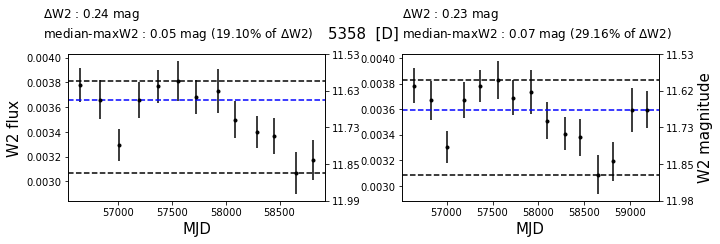

In [4]:
chvar_lin_plot(5358,'5358')

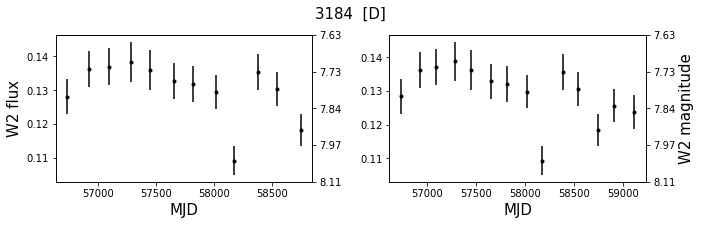

In [38]:
chvar_lin_plot(3184,'3184')

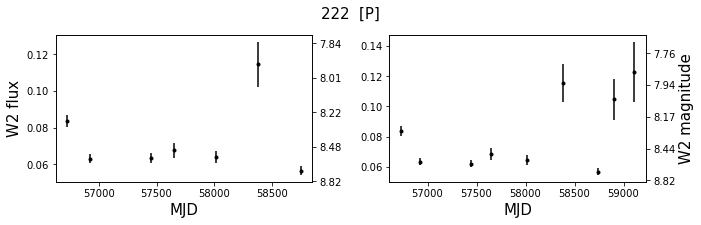

In [26]:
chvar_lin_plot(222,'222')

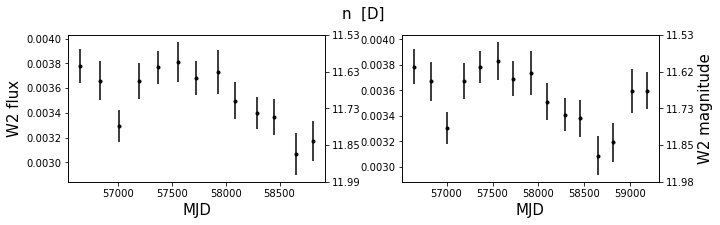

In [61]:
chvar_lin_plot(5358,'n')

In [ ]:
drop : 
1482, 1659, 4523, 5358
2760 ???

burst :


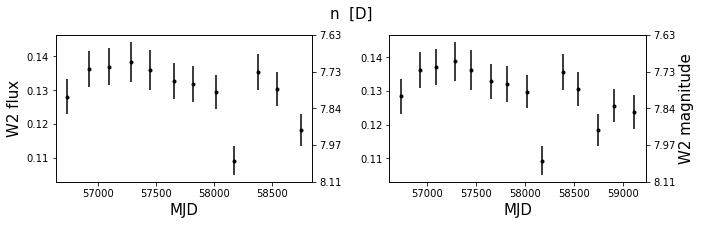

In [33]:
chvar_lin_plot(,'n')

In [48]:
v1 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
v1.loc[v1['s_index'] == 3184].Delta_w2*0.8
# v1.loc[v1['s_index'] == 3184].min_W2 - v1.loc[v1['s_index'] == 3184].median_W2

638    0.206735
Name: Delta_w2, dtype: float64

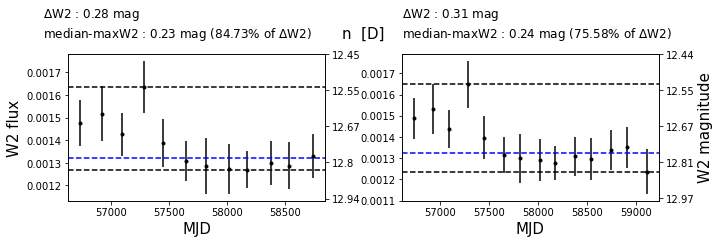

In [73]:
chvar_lin_plot(264,'n')

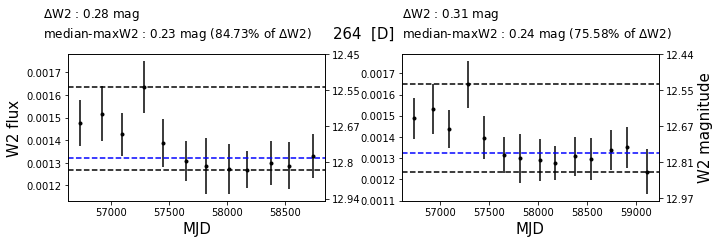

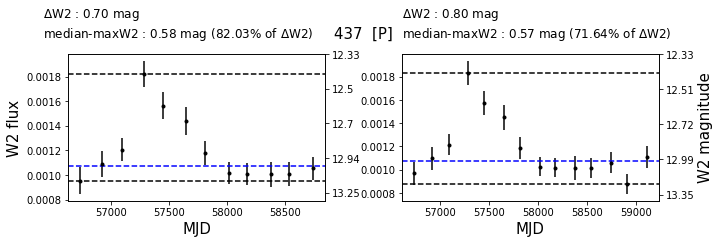

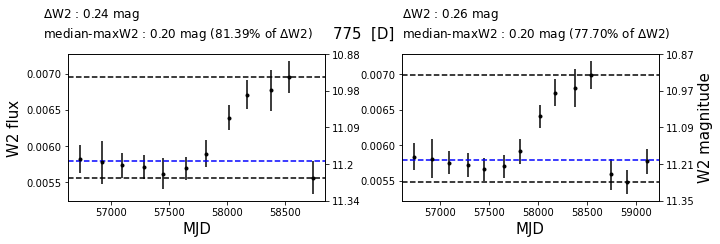

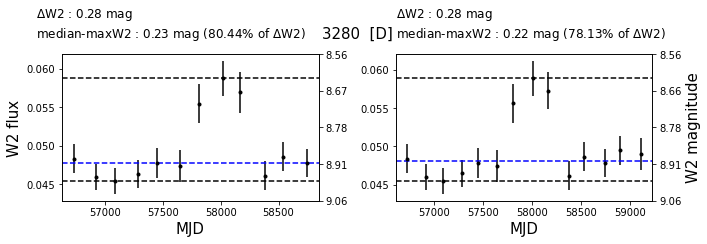

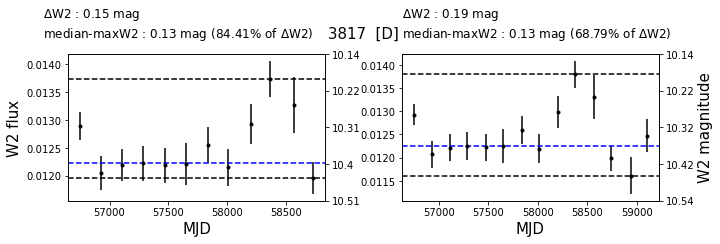

In [77]:
bu = [264, 437, 775,3280, 3817]
for i in bu:
    chvar_lin_plot(i,str(i))

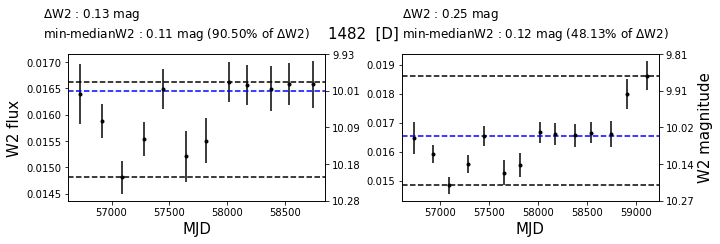

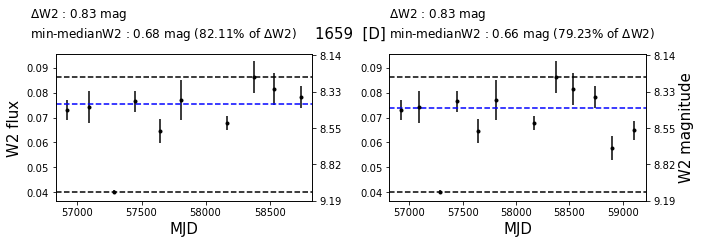

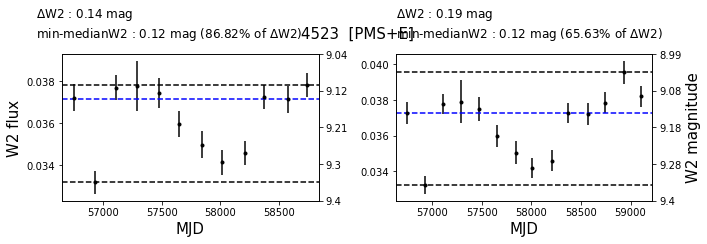

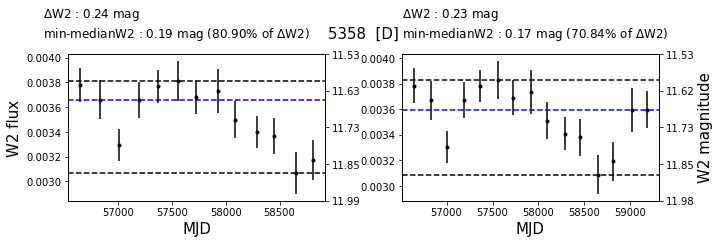

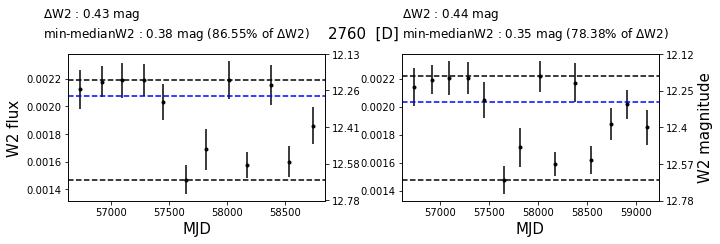

In [65]:
dr = [1482, 1659, 4523, 5358, 2760]
for i in dr:
    chvar_lin_plot(i,str(i))

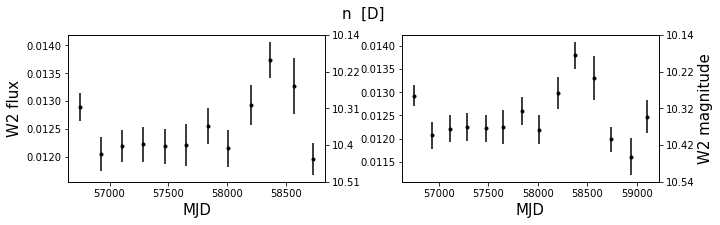

In [74]:
chvar_lin_plot(3817,'n')

In [39]:
def chvar_burst_to_non_plot(index,name):

    fig, ax = plt.subplots(1,2,figsize=(10,3))

    # plt.subplots_adjust

    # increase / decrease / burst / dimming 

    # stochastic / linear / curved / periodic

    # index = [597, 5862, 4939, 6307]
     #669
    # index = [597, 2842, 4939,4688]

    # index = [85,2842,4939,6307]
    v0 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
    v1 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
    v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
#     v1 = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')
#     v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/3rd_obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')

    # periodic candidates:
    # index = [669, 4688,6313,3614]
    # index = [6036,3325,4491,3614]
    for i in range(2):
        if i == 0:
            wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
        elif i == 1:
            wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                               names=['mjd','mag','emag','flt','class'],
                               skiprows=1)

        w2av = wavg[(wavg['mjd'] > 56000) &
                                (wavg['flt'] == 'W2') &
                                (np.isnan(wavg['mag']) == False) &
                                (np.isnan(wavg['emag']) == False)]

        # flux conversion
        w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
        ew2f = w2av.emag * w2f / 1.0857


    #     ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
        ax[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
        ax[i].invert_yaxis()

        
        
        if i == 0:
            
            ax2 = ax[i].twinx()
#             ax2.set_yscale('log')
            ax2.set_ylim(ax[i].get_ylim())
            ax2.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k',alpha=0)
            

            ytick = np.linspace(min(w2av.mag)-0.1,max(w2av.mag)+0.1,5)
#             print(ytick)
            ylab = np.round(171.85 * 10 ** (-ytick / 2.5),4) #np.round(-2.5*np.log10(ytick/171.85),2)
            ax2.set_yticks(ytick)
            ax2.set_yticklabels(ylab)
            
            
        
        if i == 1:

            ax3 = ax[i].twinx()
#             ax3.set_yscale('log')
            ax3.set_ylim(ax[i].get_ylim())
            ax3.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k',alpha=0)
            

            ytick2 = np.linspace(min(w2av.mag)-0.1,max(w2av.mag)+0.1,5)
            
            ylab2 = np.round(171.85 * 10 ** (-ytick2 / 2.5),4) #np.round(-2.5*np.log10(ytick/171.85),2)
            ax3.set_yticks(ytick2)
            ax3.set_yticklabels(ylab2)
            ax2.set_ylim(ax[1].get_ylim())
            ax3.set_ylim(ax[1].get_ylim())

            ax3.set_ylabel('W2 flux', size=15)
        
            
        
        
        

        

        
        # mark burst/drop points
#         if i == 1:    
#             ax[i].scatter([w2av.mjd.reset_index(drop=True)[0]],
#                   [w2f.reset_index(drop=True)[0]],
#                   s = 200, facecolors='none', edgecolors='r',lw=2)
        
        # annotate FAPs
#         if i == 0:
#             ax[i].text(0.57,0.85,r'FAP$_{\rm Lin}$ : '+'{:3.2e}'.format(v1[v1['s_index'] == index].linear_fap_w2.values[0]),fontsize=12,transform=ax[0].transAxes)
#             ax[i].text(0.57,0.05,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v1[v1['s_index'] == index].baluev_fap.values[0]*200/\
#                                                            v1[v1['s_index'] == index].period.values[0]),fontsize=12,transform=ax[0].transAxes)

#         if i == 1:
#             ax[i].text(0.57,0.85,r'FAP$_{\rm Lin}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].linear_fap_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].text(0.05,0.85,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].mod_baluev_fap.values[0]),fontsize=12,transform=ax[1].transAxes)
    
    
#         annotate FAPs
#         v1.loc[v1['s_index'] == 3184].Delta_w2*0.8
# v1.loc[v1['s_index'] == 3184].min_W2 - v1.loc[v1['s_index'] == 3184].median_W2
    
    
    
    
#     ####   drop   ######
#         if i == 0:
#             ax[i].text(-0.1,1,'$\Delta$W2 : {0:4.2f} mag\nmin-medianW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v1[v1['s_index'] == index].Delta_w2.values[0],
#                               v1[v1['s_index'] == index].min_W2.values[0]-v1[v1['s_index'] == index].median_W2.values[0],
#                               100*(v1[v1['s_index'] == index].min_W2.values[0]-v1[v1['s_index'] == index].median_W2.values[0])/v1[v1['s_index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[0].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
        
#         elif i == 1:
            
#             ax[i].text(0,1,'$\Delta$W2 : {0:4.2f} mag\nmin-medianW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v0[v0['Index'] == index].Delta_w2.values[0],
#                               v0[v0['Index'] == index].min_W2.values[0]-v0[v0['Index'] == index].median_W2.values[0],
#                               100*(v0[v0['Index'] == index].min_W2.values[0]-v0[v0['Index'] == index].median_W2.values[0])/v0[v0['Index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
#     #################    


#     # circle burst/drop event
        if i == 0:
            ax[i].scatter([w2av.mjd.reset_index(drop=True)[7]],
                      [w2av.mag.reset_index(drop=True)[7]],
                      s = 200, facecolors='none', edgecolors='r',lw=2)
#         if i == 1:
#             ax[i].scatter([w2av.mjd.reset_index(drop=True)[1]],
#                       [w2av.mag.reset_index(drop=True)[1]],
#                       s = 200, facecolors='none', edgecolors='r',lw=2) 
    # plot 0.8DeltaW2

        if i == 0:
            ax[i].axhline(np.median(w2av.mag)-v1[v1['s_index'] == index]['Delta_w2'].values*0.8,
                      linestyle='--',color='r',linewidth=2)

        if i == 1:
            ax[i].axhline(np.median(w2av.mag)-v0[v0['Index'] == index]['Delta_w2'].values*0.8,
                      linestyle='--',color='r',linewidth=2)
        
        ax[i].axhline(np.median(w2av.mag),linestyle='--',color='b',linewidth=1.5)


####   burst   ######
#         if i == 0:
#             ax[i].text(-0.1,1,'$\Delta$W2 : {0:4.2f} mag\nmedian-maxW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v1[v1['s_index'] == index].Delta_w2.values[0],
#                               v1[v1['s_index'] == index].median_W2.values[0]-v1[v1['s_index'] == index].max_W2.values[0],
#                               100*(v1[v1['s_index'] == index].median_W2.values[0]-v1[v1['s_index'] == index].max_W2.values[0])/v1[v1['s_index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[0].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
        
#         elif i == 1:
            
#             ax[i].text(0,1,'$\Delta$W2 : {0:4.2f} mag\nmedian-maxW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v0[v0['Index'] == index].Delta_w2.values[0],
#                               v0[v0['Index'] == index].median_W2.values[0]-v0[v0['Index'] == index].max_W2.values[0],
#                               100*(v0[v0['Index'] == index].median_W2.values[0]-v0[v0['Index'] == index].max_W2.values[0])/v0[v0['Index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
    #################      


#             ax[i].text(0.57,0.05,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v1[v1['s_index'] == index].baluev_fap.values[0]*200/\
#                                                            v1[v1['s_index'] == index].period.values[0]),fontsize=12,transform=ax[0].transAxes)

#         if i == 1:
#             ax[i].text(0.57,0.85,r'FAP$_{\rm Lin}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].linear_fap_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].text(0.05,0.85,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].mod_baluev_fap.values[0]),fontsize=12,transform=ax[1].transAxes)
    
    
    ax[0].set_xlabel('MJD',size=15)
    ax[1].set_xlabel('MJD',size=15)
    ax[0].set_ylabel('W2 magnitude',size=15)

#     ax[0].set_xticklabels([])
    # ax[1].set_xticklabels([])
    # ax[2].set_xticklabels([])
    # fig.text(0, 0.52, 'W2 magnitude',fontsize=15, va='center',ha='right',rotation='vertical')
    #J05385001-0720184
    # J05412327-0217357
    #  J05420932-0209501
    # J18321599-0234434
    
    
    ax[0].text(0.50,0.88,'0.80',fontsize=11,transform=ax[0].transAxes)
    ax[1].text(0.42,0.89,'0.78',fontsize=11,transform=ax[1].transAxes)

#     plt.tight_layout()
    
    # plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/secular_examples_avg_fit.pdf')
#     print()
#     plt.suptitle(name+'  '+'[{}]'.format(v2[v2['Index'] == index]['class'].values[0]),size=15,)
    plt.suptitle(name+'  '+'[{}]'.format(v1[v1['s_index'] == index]['class'].values[0]),size=15,)
    
    plt.subplots_adjust(left = 0.09, bottom = 0.17, right = 0.91, top = 0.85, hspace = 0.2, wspace = 0.3)
#     fig.tight_layout()
#     plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/'+str(index)+'_chvar_burst_to_non.pdf')
    # linear fap, baluev fap 를 나타내기.
#     84.73 / 75.58    80.90 / 70.84
# chvar_lin_plot(3916,'ss')

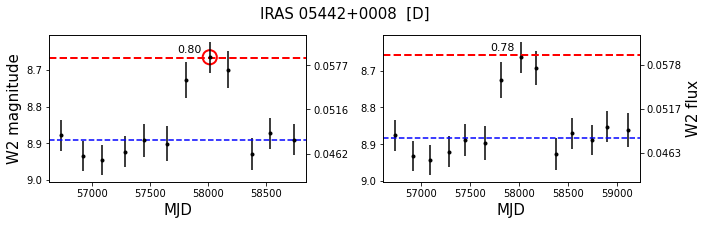

In [42]:
chvar_burst_to_non_plot(3280,'IRAS 05442+0008')

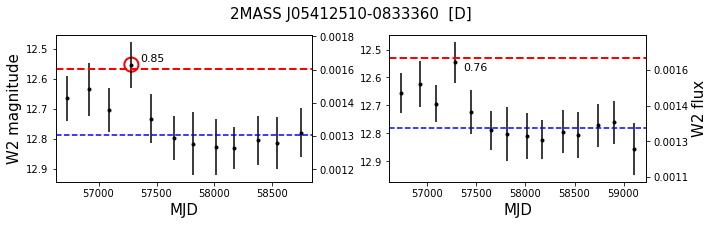

In [199]:
chvar_burst_to_non_plot(264,'2MASS J05412510-0833360')

In [64]:
def chvar_drop_to_non_plot(index,name):

    fig, ax = plt.subplots(1,2,figsize=(10,3))

    # plt.subplots_adjust

    # increase / decrease / burst / dimming 

    # stochastic / linear / curved / periodic

    # index = [597, 5862, 4939, 6307]
     #669
    # index = [597, 2842, 4939,4688]

    # index = [85,2842,4939,6307]
    v0 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
    v1 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
    v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
#     v1 = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')
#     v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/3rd_obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')

    # periodic candidates:
    # index = [669, 4688,6313,3614]
    # index = [6036,3325,4491,3614]
    for i in range(2):
        if i == 0:
            wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
        elif i == 1:
            wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                               names=['mjd','mag','emag','flt','class'],
                               skiprows=1)

        w2av = wavg[(wavg['mjd'] > 56000) &
                                (wavg['flt'] == 'W2') &
                                (np.isnan(wavg['mag']) == False) &
                                (np.isnan(wavg['emag']) == False)]

        # flux conversion
        w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
        ew2f = w2av.emag * w2f / 1.0857


    #     ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
        ax[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
        ax[i].invert_yaxis()

        
        
        if i == 0:
            
            ax2 = ax[i].twinx()
#             ax2.set_yscale('log')
            ax2.set_ylim(ax[i].get_ylim())
            ax2.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k',alpha=0)
            

            ytick = np.linspace(min(w2av.mag)-0.1,max(w2av.mag)+0.1,5)
#             print(ytick)
            ylab = np.round(171.85 * 10 ** (-ytick / 2.5),4) #np.round(-2.5*np.log10(ytick/171.85),2)
            ax2.set_yticks(ytick)
            ax2.set_yticklabels(ylab)
            
            
        
        if i == 1:

            ax3 = ax[i].twinx()
#             ax3.set_yscale('log')
            ax3.set_ylim(ax[i].get_ylim())
            ax3.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k',alpha=0)
            

            ytick2 = np.linspace(min(w2av.mag)-0.1,max(w2av.mag)+0.1,5)
            
            ylab2 = np.round(171.85 * 10 ** (-ytick2 / 2.5),4) #np.round(-2.5*np.log10(ytick/171.85),2)
            ax3.set_yticks(ytick2)
            ax3.set_yticklabels(ylab2)
            ax2.set_ylim(ax[1].get_ylim())
            ax3.set_ylim(ax[1].get_ylim())

            ax3.set_ylabel('W2 flux', size=15)
        
            
        
        
        

        

        
        # mark burst/drop points
#         if i == 1:    
#             ax[i].scatter([w2av.mjd.reset_index(drop=True)[0]],
#                   [w2f.reset_index(drop=True)[0]],
#                   s = 200, facecolors='none', edgecolors='r',lw=2)
        
        # annotate FAPs
#         if i == 0:
#             ax[i].text(0.57,0.85,r'FAP$_{\rm Lin}$ : '+'{:3.2e}'.format(v1[v1['s_index'] == index].linear_fap_w2.values[0]),fontsize=12,transform=ax[0].transAxes)
#             ax[i].text(0.57,0.05,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v1[v1['s_index'] == index].baluev_fap.values[0]*200/\
#                                                            v1[v1['s_index'] == index].period.values[0]),fontsize=12,transform=ax[0].transAxes)

#         if i == 1:
#             ax[i].text(0.57,0.85,r'FAP$_{\rm Lin}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].linear_fap_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].text(0.05,0.85,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].mod_baluev_fap.values[0]),fontsize=12,transform=ax[1].transAxes)
    
    
#         annotate FAPs
#         v1.loc[v1['s_index'] == 3184].Delta_w2*0.8
# v1.loc[v1['s_index'] == 3184].min_W2 - v1.loc[v1['s_index'] == 3184].median_W2
    
    
    
    
#     ####   drop   ######
#         if i == 0:
#             ax[i].text(-0.1,1,'$\Delta$W2 : {0:4.2f} mag\nmin-medianW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v1[v1['s_index'] == index].Delta_w2.values[0],
#                               v1[v1['s_index'] == index].min_W2.values[0]-v1[v1['s_index'] == index].median_W2.values[0],
#                               100*(v1[v1['s_index'] == index].min_W2.values[0]-v1[v1['s_index'] == index].median_W2.values[0])/v1[v1['s_index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[0].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
        
#         elif i == 1:
            
#             ax[i].text(0,1,'$\Delta$W2 : {0:4.2f} mag\nmin-medianW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v0[v0['Index'] == index].Delta_w2.values[0],
#                               v0[v0['Index'] == index].min_W2.values[0]-v0[v0['Index'] == index].median_W2.values[0],
#                               100*(v0[v0['Index'] == index].min_W2.values[0]-v0[v0['Index'] == index].median_W2.values[0])/v0[v0['Index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
#     #################    


#     # circle burst/drop event
        if i == 0:
            ax[i].scatter([w2av.mjd.reset_index(drop=True)[2]],
                      [w2av.mag.reset_index(drop=True)[2]],
                      s = 200, facecolors='none', edgecolors='r',lw=2)
#         if i == 1:
#             ax[i].scatter([w2av.mjd.reset_index(drop=True)[1]],
#                       [w2av.mag.reset_index(drop=True)[1]],
#                       s = 200, facecolors='none', edgecolors='r',lw=2) 
    # plot 0.8DeltaW2

        if i == 0:
            ax[i].axhline(np.median(w2av.mag)+v1[v1['s_index'] == index]['Delta_w2'].values*0.8,
                      linestyle='--',color='r',linewidth=2)

        if i == 1:
            ax[i].axhline(np.median(w2av.mag)+v0[v0['Index'] == index]['Delta_w2'].values*0.8,
                      linestyle='--',color='r',linewidth=2)
        
        ax[i].axhline(np.median(w2av.mag),linestyle='--',color='b',linewidth=1.5)


####   burst   ######
#         if i == 0:
#             ax[i].text(-0.1,1,'$\Delta$W2 : {0:4.2f} mag\nmedian-maxW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v1[v1['s_index'] == index].Delta_w2.values[0],
#                               v1[v1['s_index'] == index].median_W2.values[0]-v1[v1['s_index'] == index].max_W2.values[0],
#                               100*(v1[v1['s_index'] == index].median_W2.values[0]-v1[v1['s_index'] == index].max_W2.values[0])/v1[v1['s_index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[0].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
        
#         elif i == 1:
            
#             ax[i].text(0,1,'$\Delta$W2 : {0:4.2f} mag\nmedian-maxW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v0[v0['Index'] == index].Delta_w2.values[0],
#                               v0[v0['Index'] == index].median_W2.values[0]-v0[v0['Index'] == index].max_W2.values[0],
#                               100*(v0[v0['Index'] == index].median_W2.values[0]-v0[v0['Index'] == index].max_W2.values[0])/v0[v0['Index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
    #################      


#             ax[i].text(0.57,0.05,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v1[v1['s_index'] == index].baluev_fap.values[0]*200/\
#                                                            v1[v1['s_index'] == index].period.values[0]),fontsize=12,transform=ax[0].transAxes)

#         if i == 1:
#             ax[i].text(0.57,0.85,r'FAP$_{\rm Lin}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].linear_fap_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].text(0.05,0.85,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].mod_baluev_fap.values[0]),fontsize=12,transform=ax[1].transAxes)
    
    
    ax[0].set_xlabel('MJD',size=15)
    ax[1].set_xlabel('MJD',size=15)
    ax[0].set_ylabel('W2 magnitude',size=15)

#     ax[0].set_xticklabels([])
    # ax[1].set_xticklabels([])
    # ax[2].set_xticklabels([])
    # fig.text(0, 0.52, 'W2 magnitude',fontsize=15, va='center',ha='right',rotation='vertical')
    #J05385001-0720184
    # J05412327-0217357
    #  J05420932-0209501
    # J18321599-0234434
    
    
    ax[0].text(0.26,0.13,'0.82',fontsize=11,transform=ax[0].transAxes)
    ax[1].text(0.24,0.13,'0.79',fontsize=11,transform=ax[1].transAxes)
#         80.90 / 70.84

#     plt.tight_layout()
    
    # plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/secular_examples_avg_fit.pdf')
#     print()
#     plt.suptitle(name+'  '+'[{}]'.format(v2[v2['Index'] == index]['class'].values[0]),size=15,)
    plt.suptitle(name+'  '+'[{}]'.format(v1[v1['s_index'] == index]['class'].values[0]),size=15,)
    
    plt.subplots_adjust(left = 0.09, bottom = 0.17, right = 0.91, top = 0.85, hspace = 0.2, wspace = 0.3)
#     fig.tight_layout()
#     plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/'+str(index)+'_chvar_drop_to_non.pdf')
    # linear fap, baluev fap 를 나타내기.
    
# chvar_lin_plot(3916,'ss')

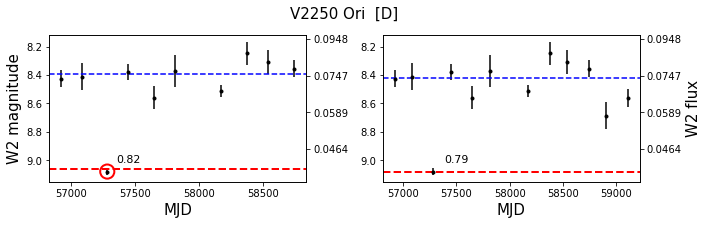

In [65]:
chvar_drop_to_non_plot(1659,'V2250 Ori')

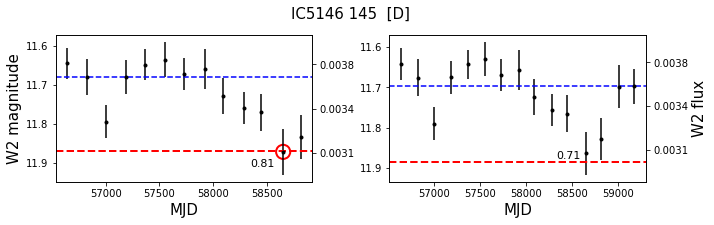

In [195]:
chvar_drop_to_non_plot(5358,'IC5146 145')

In [52]:
index = 1659
v0 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
v0.loc[v0['Index'] == index,['Index','ra','dec','sd_sdfid_w2_flux']]

Index      ra       dec  sd_sdfid_w2_flux
1386   1659  83.808 -5.450194          2.500405

In [47]:
index = 1659   # 3280: sd/sig 2.10      1659: sd/sig 2.50   
v1 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')

v1.loc[v1['s_index'] == index,['s_index','ra','dec','sd_sdfid_w2_flux']]
v0.loc[v0['Index'] == index,['Index','ra','dec','sd_sdfid_w2_flux']]

Index      ra       dec  sd_sdfid_w2_flux
1386   1659  83.808 -5.450194          2.500405

In [208]:
index = 5358
v1 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')

v1.loc[v1['s_index'] == index,['s_index','ra','dec','sd_sdfid_w2_flux']]

s_index       ra        dec  sd_sdfid_w2_flux
1105     5358  328.525  47.368056          1.556255

In [ ]:
def chvar_2440_plot(index,name):

    fig, ax = plt.subplots(1,2,figsize=(10,3))

    # plt.subplots_adjust

    # increase / decrease / burst / dimming 

    # stochastic / linear / curved / periodic

    # index = [597, 5862, 4939, 6307]
     #669
    # index = [597, 2842, 4939,4688]

    # index = [85,2842,4939,6307]
    v0 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
    v1 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
    v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
#     v1 = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')
#     v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/3rd_obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')

    # periodic candidates:
    # index = [669, 4688,6313,3614]
    # index = [6036,3325,4491,3614]
    
    wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                           names=['mjd','mag','emag','flt','class'],
                               skiprows=1)

    w2av = wavg[(wavg['mjd'] > 56000) &
                                (wavg['flt'] == 'W2') &
                                (np.isnan(wavg['mag']) == False) &
                                (np.isnan(wavg['emag']) == False)]

        # flux conversion
        w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
        ew2f = w2av.emag * w2f / 1.0857


    #     ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
        ax[i].errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.')
        ax[i].invert_yaxis()

        
        
        if i == 0:
            
            ax2 = ax[i].twinx()
#             ax2.set_yscale('log')
            ax2.set_ylim(ax[i].get_ylim())
            ax2.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k',alpha=0)
            

            ytick = np.linspace(min(w2av.mag)-0.1,max(w2av.mag)+0.1,5)
#             print(ytick)
            ylab = np.round(171.85 * 10 ** (-ytick / 2.5),4) #np.round(-2.5*np.log10(ytick/171.85),2)
            ax2.set_yticks(ytick)
            ax2.set_yticklabels(ylab)
            
            
        
        if i == 1:

            ax3 = ax[i].twinx()
#             ax3.set_yscale('log')
            ax3.set_ylim(ax[i].get_ylim())
            ax3.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k',alpha=0)
            

            ytick2 = np.linspace(min(w2av.mag)-0.1,max(w2av.mag)+0.1,5)
            
            ylab2 = np.round(171.85 * 10 ** (-ytick2 / 2.5),4) #np.round(-2.5*np.log10(ytick/171.85),2)
            ax3.set_yticks(ytick2)
            ax3.set_yticklabels(ylab2)
            ax2.set_ylim(ax[1].get_ylim())
            ax3.set_ylim(ax[1].get_ylim())

            ax3.set_ylabel('W2 flux', size=15)
        
            
        
        
        

        

        
        # mark burst/drop points
#         if i == 1:    
#             ax[i].scatter([w2av.mjd.reset_index(drop=True)[0]],
#                   [w2f.reset_index(drop=True)[0]],
#                   s = 200, facecolors='none', edgecolors='r',lw=2)
        
        # annotate FAPs
#         if i == 0:
#             ax[i].text(0.57,0.85,r'FAP$_{\rm Lin}$ : '+'{:3.2e}'.format(v1[v1['s_index'] == index].linear_fap_w2.values[0]),fontsize=12,transform=ax[0].transAxes)
#             ax[i].text(0.57,0.05,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v1[v1['s_index'] == index].baluev_fap.values[0]*200/\
#                                                            v1[v1['s_index'] == index].period.values[0]),fontsize=12,transform=ax[0].transAxes)

#         if i == 1:
#             ax[i].text(0.57,0.85,r'FAP$_{\rm Lin}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].linear_fap_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].text(0.05,0.85,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].mod_baluev_fap.values[0]),fontsize=12,transform=ax[1].transAxes)
    
    
#         annotate FAPs
#         v1.loc[v1['s_index'] == 3184].Delta_w2*0.8
# v1.loc[v1['s_index'] == 3184].min_W2 - v1.loc[v1['s_index'] == 3184].median_W2
    
    
    
    
#     ####   drop   ######
#         if i == 0:
#             ax[i].text(-0.1,1,'$\Delta$W2 : {0:4.2f} mag\nmin-medianW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v1[v1['s_index'] == index].Delta_w2.values[0],
#                               v1[v1['s_index'] == index].min_W2.values[0]-v1[v1['s_index'] == index].median_W2.values[0],
#                               100*(v1[v1['s_index'] == index].min_W2.values[0]-v1[v1['s_index'] == index].median_W2.values[0])/v1[v1['s_index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[0].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
        
#         elif i == 1:
            
#             ax[i].text(0,1,'$\Delta$W2 : {0:4.2f} mag\nmin-medianW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v0[v0['Index'] == index].Delta_w2.values[0],
#                               v0[v0['Index'] == index].min_W2.values[0]-v0[v0['Index'] == index].median_W2.values[0],
#                               100*(v0[v0['Index'] == index].min_W2.values[0]-v0[v0['Index'] == index].median_W2.values[0])/v0[v0['Index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
#     #################    


#     # circle burst/drop event
        if i == 0:
            ax[i].scatter([w2av.mjd.reset_index(drop=True)[11]],
                      [w2av.mag.reset_index(drop=True)[11]],
                      s = 200, facecolors='none', edgecolors='r',lw=2)
#         if i == 1:
#             ax[i].scatter([w2av.mjd.reset_index(drop=True)[1]],
#                       [w2av.mag.reset_index(drop=True)[1]],
#                       s = 200, facecolors='none', edgecolors='r',lw=2) 
    # plot 0.8DeltaW2

        if i == 0:
            ax[i].axhline(np.median(w2av.mag)+v1[v1['s_index'] == index]['Delta_w2'].values*0.8,
                      linestyle='--',color='r',linewidth=2)

        if i == 1:
            ax[i].axhline(np.median(w2av.mag)+v0[v0['Index'] == index]['Delta_w2'].values*0.8,
                      linestyle='--',color='r',linewidth=2)
        
        ax[i].axhline(np.median(w2av.mag),linestyle='--',color='b',linewidth=1.5)


####   burst   ######
#         if i == 0:
#             ax[i].text(-0.1,1,'$\Delta$W2 : {0:4.2f} mag\nmedian-maxW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v1[v1['s_index'] == index].Delta_w2.values[0],
#                               v1[v1['s_index'] == index].median_W2.values[0]-v1[v1['s_index'] == index].max_W2.values[0],
#                               100*(v1[v1['s_index'] == index].median_W2.values[0]-v1[v1['s_index'] == index].max_W2.values[0])/v1[v1['s_index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[0].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v1[v1['s_index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
        
#         elif i == 1:
            
#             ax[i].text(0,1,'$\Delta$W2 : {0:4.2f} mag\nmedian-maxW2 : {1:4.2f} mag ({2:3.2f}% of $\Delta$W2)\n'\
#                        .format(v0[v0['Index'] == index].Delta_w2.values[0],
#                               v0[v0['Index'] == index].median_W2.values[0]-v0[v0['Index'] == index].max_W2.values[0],
#                               100*(v0[v0['Index'] == index].median_W2.values[0]-v0[v0['Index'] == index].max_W2.values[0])/v0[v0['Index'] == index].Delta_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].min_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].max_W2.values[0]/-2.5),color='k',linestyle='--')
#             ax[i].axhline(171.85 * 10 ** (v0[v0['Index'] == index].median_W2.values[0]/-2.5),color='b',linestyle='--')
    #################      


#             ax[i].text(0.57,0.05,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v1[v1['s_index'] == index].baluev_fap.values[0]*200/\
#                                                            v1[v1['s_index'] == index].period.values[0]),fontsize=12,transform=ax[0].transAxes)

#         if i == 1:
#             ax[i].text(0.57,0.85,r'FAP$_{\rm Lin}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].linear_fap_w2.values[0]),fontsize=12,transform=ax[1].transAxes)
#             ax[i].text(0.05,0.85,r'FAP$_{\rm LSP}$ : '+'{:3.2e}'.format(v2[v2['Index'] == index].mod_baluev_fap.values[0]),fontsize=12,transform=ax[1].transAxes)
    
    
    ax[0].set_xlabel('MJD',size=15)
    ax[1].set_xlabel('MJD',size=15)
    ax[0].set_ylabel('W2 magnitude',size=15)

#     ax[0].set_xticklabels([])
    # ax[1].set_xticklabels([])
    # ax[2].set_xticklabels([])
    # fig.text(0, 0.52, 'W2 magnitude',fontsize=15, va='center',ha='right',rotation='vertical')
    #J05385001-0720184
    # J05412327-0217357
    #  J05420932-0209501
    # J18321599-0234434
    
    
    ax[0].text(0.76,0.1,'0.81',fontsize=11,transform=ax[0].transAxes)
    ax[1].text(0.65,0.16,'0.71',fontsize=11,transform=ax[1].transAxes)
#         80.90 / 70.84

#     plt.tight_layout()
    
    # plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/secular_examples_avg_fit.pdf')
#     print()
#     plt.suptitle(name+'  '+'[{}]'.format(v2[v2['Index'] == index]['class'].values[0]),size=15,)
    plt.suptitle(name+'  '+'[{}]'.format(v1[v1['s_index'] == index]['class'].values[0]),size=15,)
    
    plt.subplots_adjust(left = 0.09, bottom = 0.17, right = 0.91, top = 0.85, hspace = 0.2, wspace = 0.3)
#     fig.tight_layout()
#     plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/'+str(index)+'_chvar_drop_to_non.pdf')
    # linear fap, baluev fap 를 나타내기.
    
# chvar_lin_plot(3916,'ss')

In [5]:
v0 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')

index = 2440
v1 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')

v1.loc[v1['s_index'] == index,['s_index','ra','dec','sd_sdfid_w2_flux']]
v0.loc[v0['Index'] == index,['Index','ra','dec','sd_sdfid_w2_flux']]

Index         ra       dec  sd_sdfid_w2_flux
1714   2440  83.833167 -5.017389          5.895537

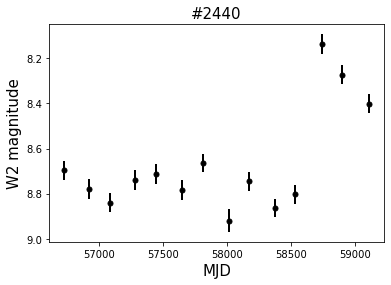

In [18]:
index= 2440
wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                           names=['mjd','mag','emag','flt','class'],
                               skiprows=1)

w2av = wavg[(wavg['mjd'] > 56000) &
                        (wavg['flt'] == 'W2') &
                        (np.isnan(wavg['mag']) == False) &
                        (np.isnan(wavg['emag']) == False)]



fig, ax = plt.subplots()
#     ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
ax.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k.', ms=10,linewidth=2)
ax.invert_yaxis()
ax.set_title('#2440',fontsize=15)
ax.set_xlabel('MJD',fontsize=15)
ax.set_ylabel('W2 magnitude',fontsize=15)
# fig.savefig('/home/wooseok/WISE_data/2440_lc.pdf')

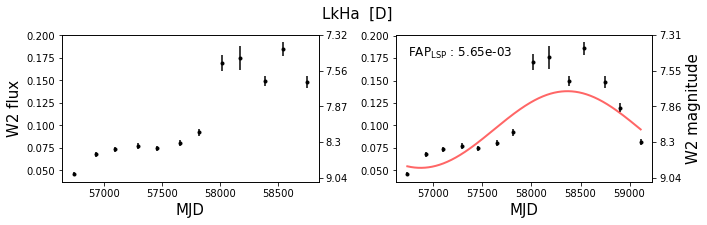

In [4]:
chvar_lin_plot(3452,'LkHa')

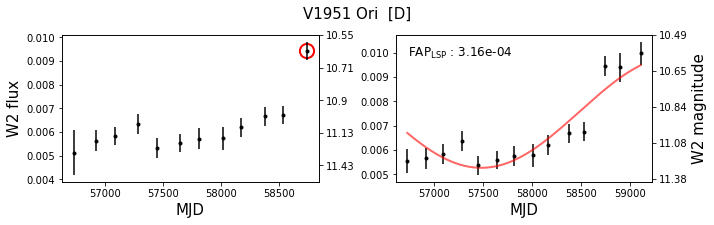

In [268]:
chvar_lin_plot(2189,'V1951 Ori')

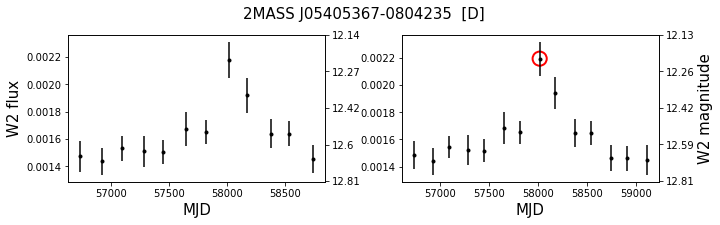

In [276]:
chvar_lin_plot(380,'2MASS J05405367-0804235')

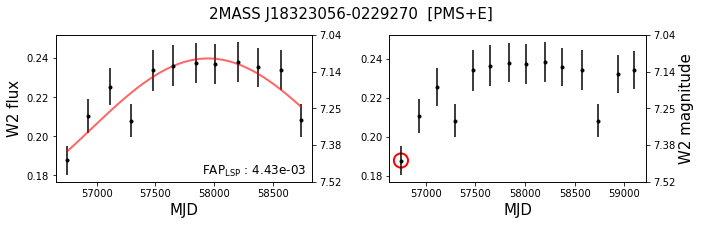

In [283]:
chvar_lin_plot(4492,'2MASS J18323056-0229270')

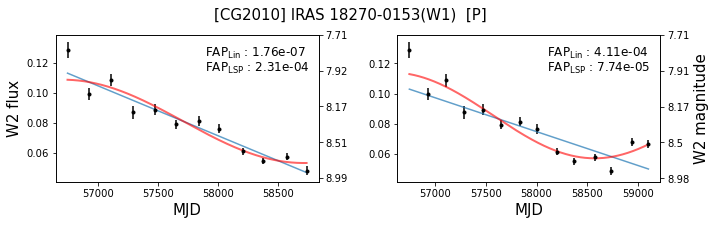

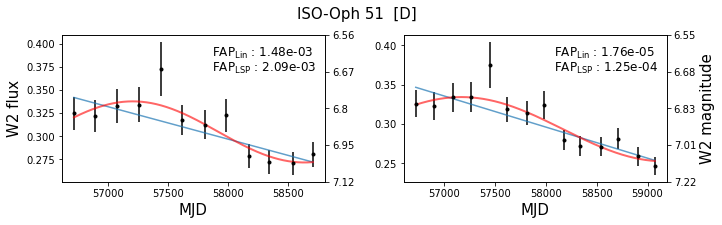

In [168]:
chvar_lin_plot(3916,'[CG2010] IRAS 18270-0153(W1)')
chvar_lin_plot(5653,'ISO-Oph 51')

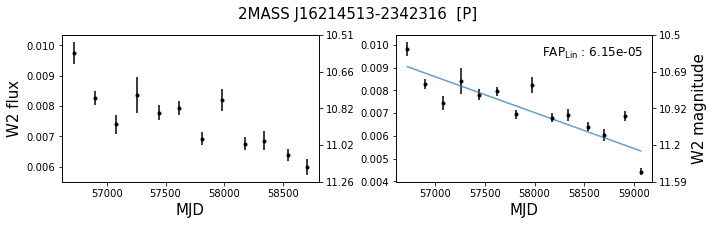

In [219]:
chvar_lin_plot(5563,'2MASS J16214513-2342316')

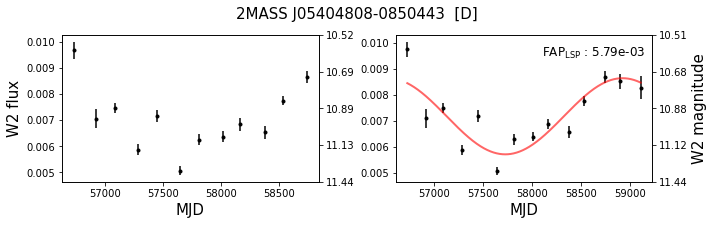

In [223]:
chvar_lin_plot(194,'2MASS J05404808-0850443')

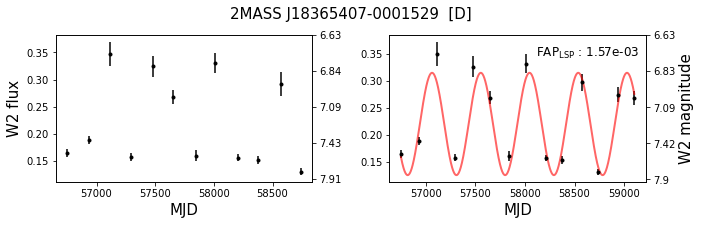

In [224]:
chvar_lin_plot(4639,'2MASS J18365407-0001529')


In [269]:
v1.loc[v1['s_index'] == 380,['s_index','ra','dec','var_type','combined_type']]

Empty DataFrame
Columns: [s_index, ra, dec, var_type, combined_type]
Index: []

In [277]:
v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
v2.loc[v2['Index'] == 4492,['Index','ra','dec','var_type','combined_type']]

Index          ra       dec var_type combined_type
1089   4492  278.127083 -2.490556     drop           NaN

In [197]:
pa.set_option('display.max_rows', 100)

In [211]:
v12 = pa.merge(v1,v2, how='outer',left_on='s_index',right_on='Index')
v12.loc[(v12.var_type_x == 'irregular') &
       (v12.var_type_y == 'periodic'),
       ['s_index','Index','ra_x','dec_x','Delta_w2_x','var_type_x','combined_type_x','var_type_y','combined_type_y']]

s_index   Index        ra_x      dec_x  Delta_w2_x var_type_x  \
81      230.0   230.0   85.345542  -8.653056    0.578167  irregular   
730    3519.0  3519.0  271.317500  -4.805000    0.690634  irregular   
739    3599.0  3599.0  276.134167  -3.218889    0.599491  irregular   
748    3671.0  3671.0  276.898750  -3.240556    0.744778  irregular   
751    3685.0  3685.0  276.942917  -3.504167    0.598818  irregular   
762    3749.0  3749.0  277.192500  -3.252778    1.187475  irregular   
813    3991.0  3991.0  277.495833  -2.032500    0.435373  irregular   
825    4057.0  4057.0  277.550417  -3.712778    1.089988  irregular   
855    4258.0  4258.0  277.811250  -3.555833    0.758465  irregular   
858    4272.0  4272.0  277.823750  -2.146389    1.091273  irregular   
870    4311.0  4311.0  277.867917  -1.421111    0.794217  irregular   
929    4584.0  4584.0  278.336667  -2.799167    0.649727  irregular   
935    4639.0  4639.0  279.225000  -0.031111    1.063679  irregular   
940    4667.0  4667.0  279.388333   0.095278    0.750150  irregular   
947    4712.0  4712.0  279.574583  -0.112778    0.770225  irregular   
953    4753.0  4753.0  279.741250  -0.188889    0.646026  irregular   
963    4812.0  4812.0  280.065417   0.183611    0.645979  irregular   
1130   5486.0  5486.0  245.835417 -37.688611    0.659994  irregular   
1131   5487.0  5487.0  245.859583 -37.868889    0.849550  irregular   
1141   5550.0  5550.0  187.925000 -71.065000    0.794706  irregular   
1178   5705.0  5705.0  246.814583 -24.514722    0.419352  irregular   

     combined_type_x var_type_y combined_type_y  
81               NaN   periodic       irregular  
730              NaN   periodic             NaN  
739              NaN   periodic             NaN  
748              NaN   periodic             NaN  
751              NaN   periodic             NaN  
762              NaN   periodic             NaN  
813              NaN   periodic             NaN  
825              NaN   periodic             NaN  
855              NaN   periodic             NaN  
858              NaN   periodic             NaN  
870              NaN   periodic             NaN  
929              NaN   periodic             NaN  
935              NaN   periodic             NaN  
940              NaN   periodic             NaN  
947              NaN   periodic             NaN  
953              NaN   periodic             NaN  
963              NaN   periodic             NaN  
1130             NaN   periodic             NaN  
1131             NaN   periodic             NaN  
1141             NaN   periodic             NaN  
1178             NaN   periodic             NaN

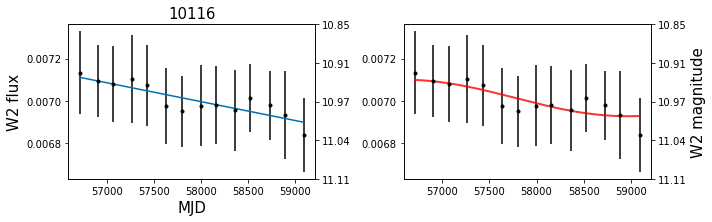

In [82]:
chvar_cur_plot(10116)

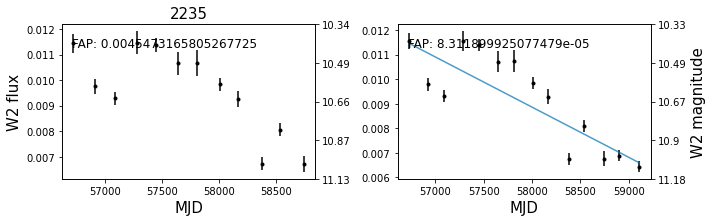

In [75]:
chvar_lin_plot(2235)

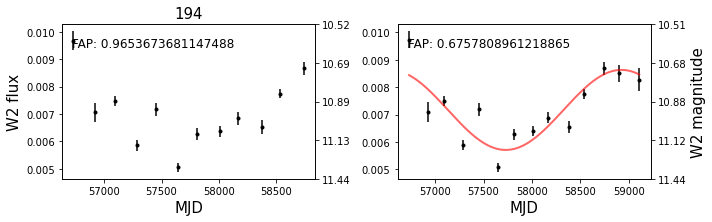

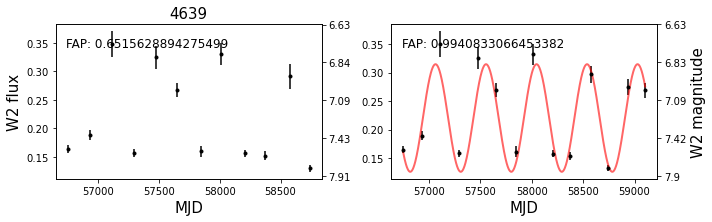

In [77]:
chvar_lin_plot(194)
chvar_lin_plot(4639)

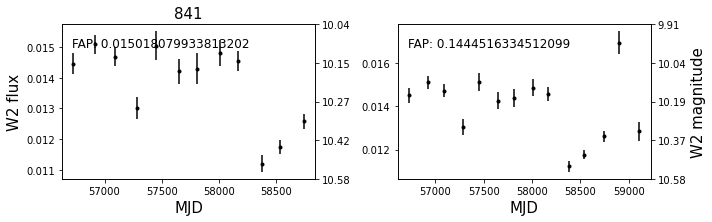

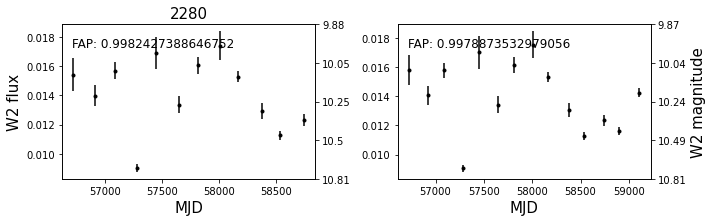

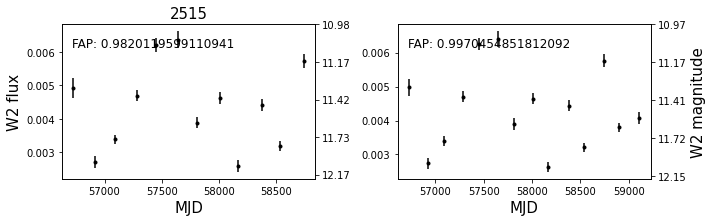

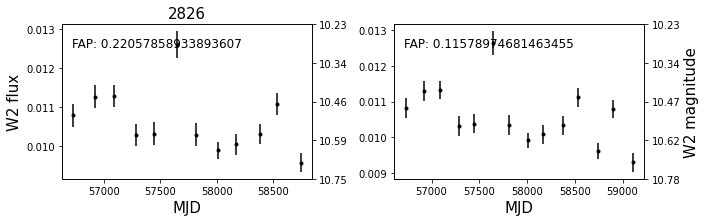

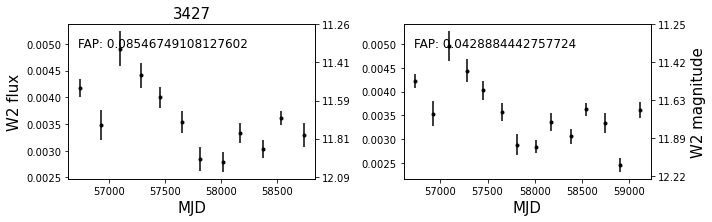

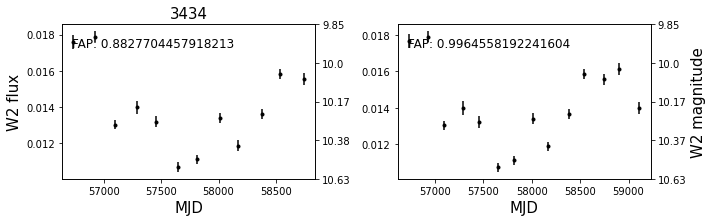

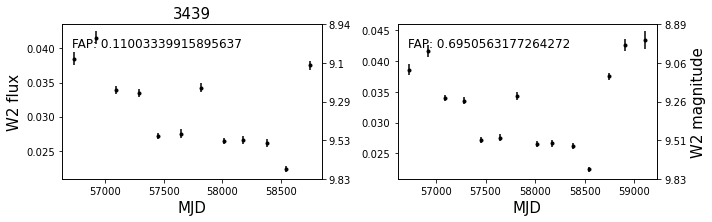

In [88]:
agn = [841,2280,2515,2826,3427,3434,3439]
for a in agn:
    chvar_lin_plot(a)

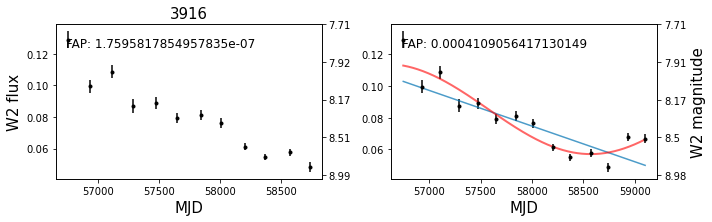

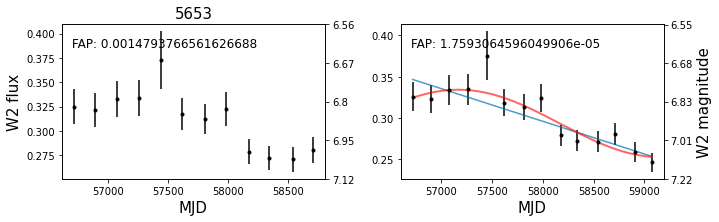

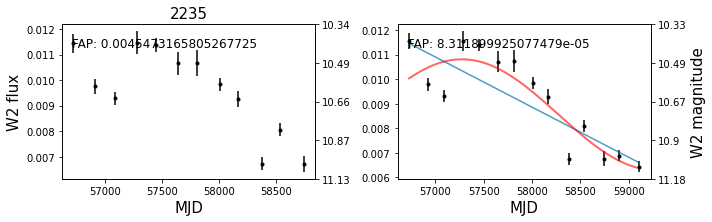

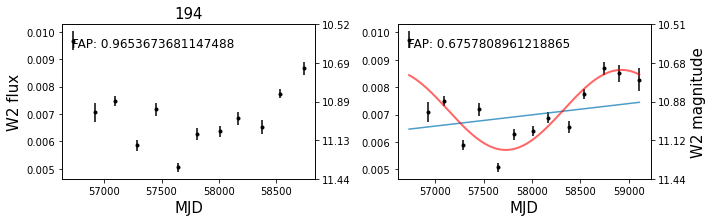

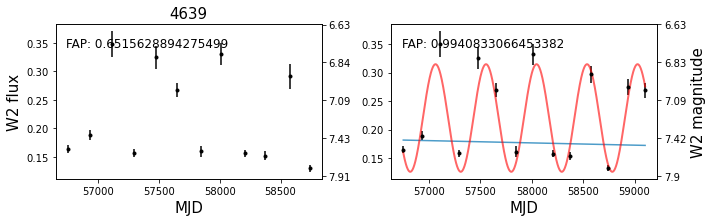

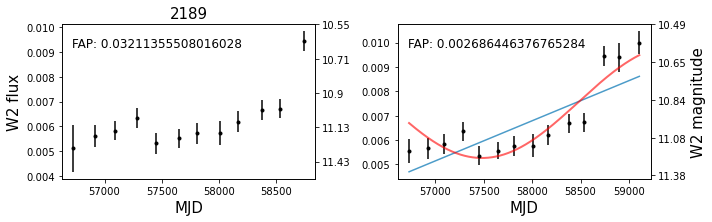

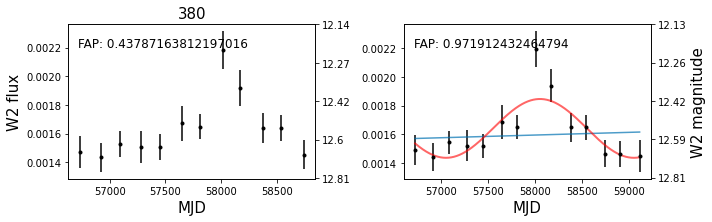

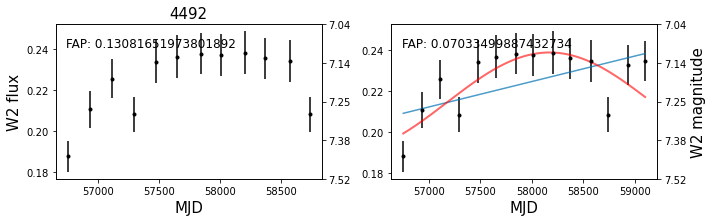

In [73]:
chvar_lin_plot(3916)

chvar_lin_plot(5653)

chvar_lin_plot(2235)
chvar_lin_plot(194)
chvar_lin_plot(4639)

chvar_lin_plot(2189)
chvar_lin_plot(380)
chvar_lin_plot(4492)

In [ ]:
secular to secular 
	3916  linear -> curved

	5653  curved -> linear
irregular to secular
	2235  irregular -> linear
	194    irregular -> curved
	4639  irregular -> periodic
burst/drop
	2189    burst   -> curved
	380      nonvary -> burst
	4492    curved -> drop

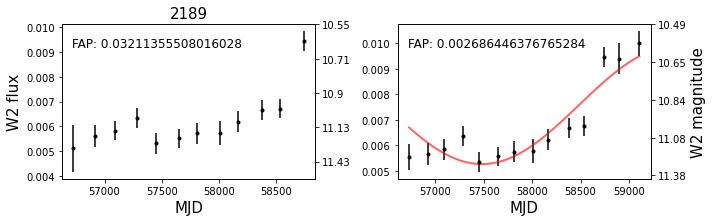

In [78]:
chvar_lin_plot(2189)

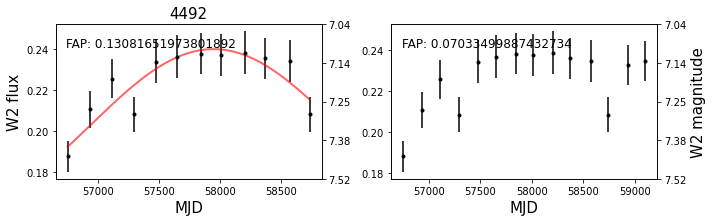

In [80]:
chvar_lin_plot(4492)

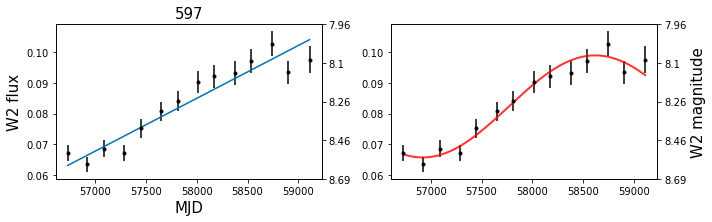

In [39]:
# LSP fit
def chvar_cur_plot(index):
    fig, ax = plt.subplots(1,2,figsize=(10,3))

#     v1 = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000_dist_w1w2_share.csv')
    v1 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/3rd_obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4000.csv')
    v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/3rd_obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4750.csv')

    # plt.subplots_adjust

    # increase / decrease / burst / dimming 

    # stochastic / linear / curved / periodic

    # index = [597, 5862, 4939, 6307]
    # index = [14,24,40] #669
    # index = [597, 2842, 4939,4688]

    # index = [85,2842,4939,6307]

    # periodic candidates:
    # index = [669, 4688,6313,3614]
    # index = [6036,3325,4491,3614]
    for i in range(2):
        if i == 0:
            wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
            
        elif i == 1:
            wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'+str(index)+'_cavg.csv',
                               names=['mjd','mag','emag','flt','class'],
                               skiprows=1)
            
        w2av = wavg[(wavg['mjd'] > 56000) &
                                (wavg['flt'] == 'W2') &
                                (np.isnan(wavg['mag']) == False) &
                                (np.isnan(wavg['emag']) == False)]

        # flux conversion
        w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
        ew2f = w2av.emag * w2f / 1.0857


    #     ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
        ax[i].errorbar(w2av.mjd, w2f, ew2f, fmt='k.')
    #     ax[i].invert_yaxis()

        ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
        ylab = np.round(-2.5*np.log10(ytick/171.85),2)

        ax2 = ax[i].twinx()
        ax2.errorbar(w2av.mjd, w2f, ew2f, fmt='k^',ms=10, alpha=0)
        ax2.set_yticks(ytick)
        ax2.set_yticklabels(ylab)
        if i == 1:
            ax2.set_ylabel('W2 magnitude', size=15)

        #slope fit
        if i == 0:   
            def func(x,a,b):
                    return a*x + b

            resw2, cov = curve_fit(func,w2av.mjd,w2f, sigma=ew2f
                                  ,absolute_sigma = True)

            yfit= np.polyval(resw2,w2av.mjd)
            ax[i].plot(w2av.mjd,yfit,label='fit')

        #curve fit
        else:
            lsav = LombScargle(w2av.mjd, w2f, ew2f)
            frequency, power = lsav.autopower(  # nyquist_factor=5,
                                                maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                                minimum_frequency=1/4750)
            best_frequency = frequency[np.argmax(power)]
            arw2m = np.squeeze(np.array([w2av.mjd]))
            smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
            flux_jmod = lsav.model(smjd, best_frequency)
            ax[i].plot(smjd, flux_jmod, color='r', lw=2,
                         alpha=0.8
                      )

    ax[0].set_xlabel('MJD',size=15)
    ax[0].set_ylabel('W2 flux',size=15)

#     ax[0].set_xticklabels([])
#     ax[1].set_xticklabels([])
    # ax[2].set_xticklabels([])
    # fig.text(0, 0.52, 'W2 magnitude',fontsize=15, va='center',ha='right',rotation='vertical')
    #J05385001-0720184
    # J05412327-0217357
    #  J05420932-0209501
    # J18321599-0234434
#     ax[0].text(0.04,0.85,'V733 Cep $\it{Curved}$',fontsize=9,transform=ax[0].transAxes)
#     ax[1].text(0.04,0.1,'HH354 IRS $\it{Curved}$',fontsize=9,transform=ax[1].transAxes)
#     ax[2].text(0.70,0.85,'HBC 340 $\it{Curved}$',fontsize=9,transform=ax[2].transAxes)
    # ax[3].text(0.025,0.85,'EX Lup',fontsize=9,transform=ax[3].transAxes)
#     ax[0].text(0.04,0.8,'FAP: '+str((v1[v1['Index'] == index].baluev_fap\
#                                      /v1[v1['Index'] == index].period).values[0]*200)+'\nPeriod: '+\
#                str(v1[v1['Index'] == index].period.values[0].round()),fontsize=12,transform=ax[0].transAxes)
#     ax[1].text(0.04,0.8,'FAP: '+str(v2[v2['Index'] == index].mod_baluev_fap.values[0])+'\nPeriod: '+\
#                str(v2[v2['Index'] == index].period.values[0].round()),fontsize=12,transform=ax[1].transAxes)
    plt.tight_layout()
    # fig.savefig('/home/wooseok/WISE_data/FUors/lightcurves/FUor_curved.pdf')
    # plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/secular_examples_avg_fit.pdf')
    ax[0].set_title(str(index),size=15)
    # linear fap, baluev fap 를 나타내기.
    
chvar_cur_plot(597)

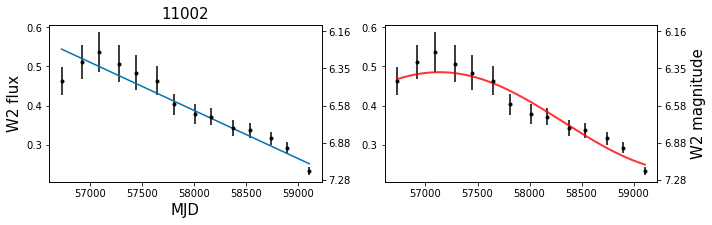

In [36]:
chvar_cur_plot(11002)

In [23]:
180*13

2340

FileNotFoundError: [Errno 2] File /home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/11002_cavg.csv does not exist: '/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/11002_cavg.csv'

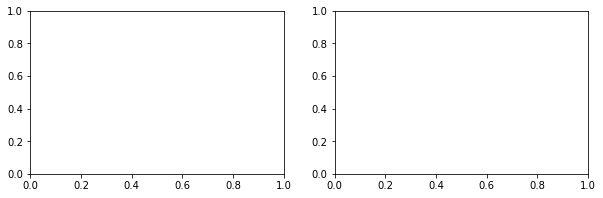

In [26]:
chvar_lin_plot(11002)

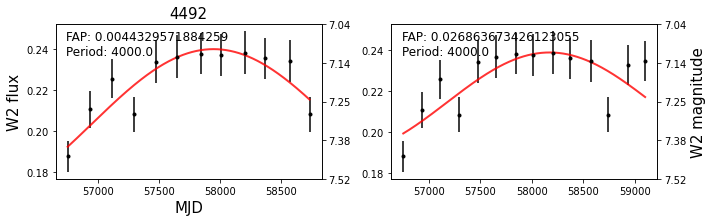

In [101]:
chvar_cur_plot(4492)

### Famous sources lightcurve - FUor, EXor, ... 

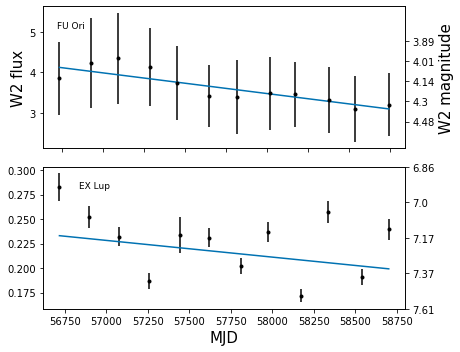

In [101]:
fig, ax = plt.subplots(2,1,figsize=(6.5,5))

# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

# index = [597, 5862, 4939, 6307]
index = [5,50] #669
# index = [597, 2842, 4939,4688]

# index = [85,2842,4939,6307]

# periodic candidates:
# index = [669, 4688,6313,3614]
# index = [6036,3325,4491,3614]
for i in range(2):
    wavg = pa.read_csv('/home/wooseok/WISE_data/FUors/outlier_cut_data/'
                        +str(index[i])+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]
    
    # flux conversion
    w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
    ew2f = w2av.emag * w2f / 1.0857
    
    
#     ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
    ax[i].errorbar(w2av.mjd, w2f, ew2f, fmt='k.')
#     ax[i].invert_yaxis()

    ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
    ylab = np.round(-2.5*np.log10(ytick/171.85),2)
    
    ax2 = ax[i].twinx()
    ax2.errorbar(w2av.mjd, w2f, ew2f, fmt='k^',ms=10, alpha=0)
    ax2.set_yticks(ytick)
    ax2.set_yticklabels(ylab)
    if i == 0:
        ax2.set_ylabel('W2 magnitude', size=15)
        
    #slope fit
    if i < 2:   
        def func(x,a,b):
                return a*x + b

        resw2, cov = curve_fit(func,w2av.mjd,w2f, sigma=ew2f
                              ,absolute_sigma = True)

        yfit= np.polyval(resw2,w2av.mjd)
        ax[i].plot(w2av.mjd,yfit,label='fit')
    
    #curve fit
    if i > 1:
        lsav = LombScargle(w2av.mjd, w2f, ew2f)
        frequency, power = lsav.autopower(  # nyquist_factor=5,
                                            maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                            minimum_frequency=1/4000)
        best_frequency = frequency[np.argmax(power)]
        arw2m = np.squeeze(np.array([w2av.mjd]))
        smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
        flux_jmod = lsav.model(smjd, best_frequency)
        ax[i].plot(smjd, flux_jmod, color='r', lw=2,
                     alpha=0.8
                  )

ax[1].set_xlabel('MJD',size=15)
ax[0].set_ylabel('W2 flux',size=15)

ax[0].set_xticklabels([])
# ax[1].set_xticklabels([])
# ax[2].set_xticklabels([])
# fig.text(0, 0.52, 'W2 magnitude',fontsize=15, va='center',ha='right',rotation='vertical')
#J05385001-0720184
# J05412327-0217357
#  J05420932-0209501
# J18321599-0234434
# ax[0].text(0.04,0.85,'Haro 4-253 J05385001-0720184 D $\it{Linear(+)}$',fontsize=9,transform=ax[0].transAxes)
# ax[1].text(0.04,0.1,'HOPS 297 J05412327-0217357 P $\it{Linear(-)}$',fontsize=9,transform=ax[1].transAxes)
ax[0].text(0.04,0.85,'FU Ori',fontsize=9,transform=ax[0].transAxes)
ax[1].text(0.1,0.85,'EX Lup',fontsize=9,transform=ax[1].transAxes)

plt.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/stoch_examples.pdf')
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/secular_examples_avg_fit.pdf')

# linear fap, baluev fap 를 나타내기.

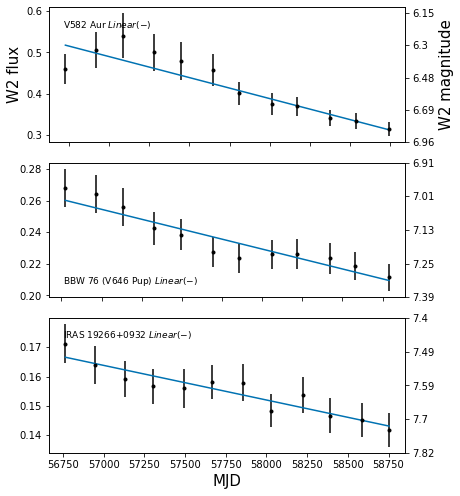

In [56]:
fig, ax = plt.subplots(3,1,figsize=(6.5,7))

# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

# index = [597, 5862, 4939, 6307]
index = [2,21,22] #669
# index = [597, 2842, 4939,4688]

# index = [85,2842,4939,6307]

# periodic candidates:
# index = [669, 4688,6313,3614]
# index = [6036,3325,4491,3614]
for i in range(3):
    wavg = pa.read_csv('/home/wooseok/WISE_data/FUors/outlier_cut_data/'
                        +str(index[i])+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]
    
    # flux conversion
    w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
    ew2f = w2av.emag * w2f / 1.0857
    
    
#     ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
    ax[i].errorbar(w2av.mjd, w2f, ew2f, fmt='k.')
#     ax[i].invert_yaxis()

    ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
    ylab = np.round(-2.5*np.log10(ytick/171.85),2)
    
    ax2 = ax[i].twinx()
    ax2.errorbar(w2av.mjd, w2f, ew2f, fmt='k^',ms=10, alpha=0)
    ax2.set_yticks(ytick)
    ax2.set_yticklabels(ylab)
    if i == 0:
        ax2.set_ylabel('W2 magnitude', size=15)
        
    #slope fit
    if i >= 0:   
        def func(x,a,b):
                return a*x + b

        resw2, cov = curve_fit(func,w2av.mjd,w2f, sigma=ew2f
                              ,absolute_sigma = True)

        yfit= np.polyval(resw2,w2av.mjd)
        ax[i].plot(w2av.mjd,yfit,label='fit')
    
    #curve fit
    else:
        lsav = LombScargle(w2av.mjd, w2f, ew2f)
        frequency, power = lsav.autopower(  # nyquist_factor=5,
                                            maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                            minimum_frequency=1/4000)
        best_frequency = frequency[np.argmax(power)]
        arw2m = np.squeeze(np.array([w2av.mjd]))
        smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
        flux_jmod = lsav.model(smjd, best_frequency)
        ax[i].plot(smjd, flux_jmod, color='r', lw=2,
                     alpha=0.8
                  )

ax[2].set_xlabel('MJD',size=15)
ax[0].set_ylabel('W2 flux',size=15)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
# ax[2].set_xticklabels([])
# fig.text(0, 0.52, 'W2 magnitude',fontsize=15, va='center',ha='right',rotation='vertical')
#J05385001-0720184
# J05412327-0217357
#  J05420932-0209501
# J18321599-0234434
ax[0].text(0.04,0.85,'V582 Aur $\it{Linear(-)}$',fontsize=9,transform=ax[0].transAxes)
ax[1].text(0.04,0.1,'BBW 76 (V646 Pup) $\it{Linear(-)}$',fontsize=9,transform=ax[1].transAxes)
ax[2].text(0.04,0.85,'IRAS 19266+0932 $\it{Linear(-)}$',fontsize=9,transform=ax[2].transAxes)
# ax[3].text(0.025,0.85,'EX Lup',fontsize=9,transform=ax[3].transAxes)

plt.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/FUors/lightcurves/FUor_linear.pdf')
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/secular_examples_avg_fit.pdf')

# linear fap, baluev fap 를 나타내기.

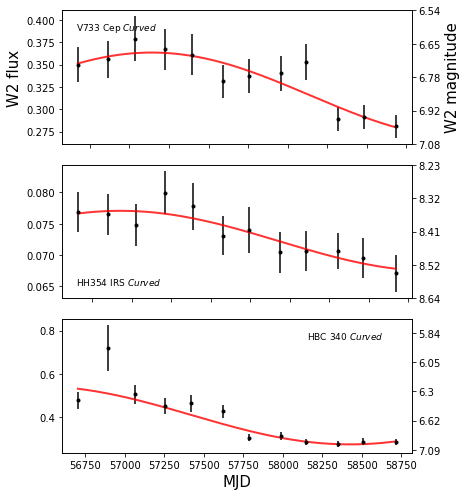

In [65]:
fig, ax = plt.subplots(3,1,figsize=(6.5,7))

# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

# index = [597, 5862, 4939, 6307]
index = [14,24,40] #669
# index = [597, 2842, 4939,4688]

# index = [85,2842,4939,6307]

# periodic candidates:
# index = [669, 4688,6313,3614]
# index = [6036,3325,4491,3614]
for i in range(3):
    wavg = pa.read_csv('/home/wooseok/WISE_data/FUors/outlier_cut_data/'
                        +str(index[i])+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]
    
    # flux conversion
    w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
    ew2f = w2av.emag * w2f / 1.0857
    
    
#     ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
    ax[i].errorbar(w2av.mjd, w2f, ew2f, fmt='k.')
#     ax[i].invert_yaxis()

    ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
    ylab = np.round(-2.5*np.log10(ytick/171.85),2)
    
    ax2 = ax[i].twinx()
    ax2.errorbar(w2av.mjd, w2f, ew2f, fmt='k^',ms=10, alpha=0)
    ax2.set_yticks(ytick)
    ax2.set_yticklabels(ylab)
    if i == 0:
        ax2.set_ylabel('W2 magnitude', size=15)
        
    #slope fit
    if i < 0:   
        def func(x,a,b):
                return a*x + b

        resw2, cov = curve_fit(func,w2av.mjd,w2f, sigma=ew2f
                              ,absolute_sigma = True)

        yfit= np.polyval(resw2,w2av.mjd)
        ax[i].plot(w2av.mjd,yfit,label='fit')
    
    #curve fit
    else:
        lsav = LombScargle(w2av.mjd, w2f, ew2f)
        frequency, power = lsav.autopower(  # nyquist_factor=5,
                                            maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                            minimum_frequency=1/4000)
        best_frequency = frequency[np.argmax(power)]
        arw2m = np.squeeze(np.array([w2av.mjd]))
        smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
        flux_jmod = lsav.model(smjd, best_frequency)
        ax[i].plot(smjd, flux_jmod, color='r', lw=2,
                     alpha=0.8
                  )

ax[2].set_xlabel('MJD',size=15)
ax[0].set_ylabel('W2 flux',size=15)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
# ax[2].set_xticklabels([])
# fig.text(0, 0.52, 'W2 magnitude',fontsize=15, va='center',ha='right',rotation='vertical')
#J05385001-0720184
# J05412327-0217357
#  J05420932-0209501
# J18321599-0234434
ax[0].text(0.04,0.85,'V733 Cep $\it{Curved}$',fontsize=9,transform=ax[0].transAxes)
ax[1].text(0.04,0.1,'HH354 IRS $\it{Curved}$',fontsize=9,transform=ax[1].transAxes)
ax[2].text(0.70,0.85,'HBC 340 $\it{Curved}$',fontsize=9,transform=ax[2].transAxes)
# ax[3].text(0.025,0.85,'EX Lup',fontsize=9,transform=ax[3].transAxes)

plt.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/FUors/lightcurves/FUor_curved.pdf')
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/secular_examples_avg_fit.pdf')

# linear fap, baluev fap 를 나타내기.

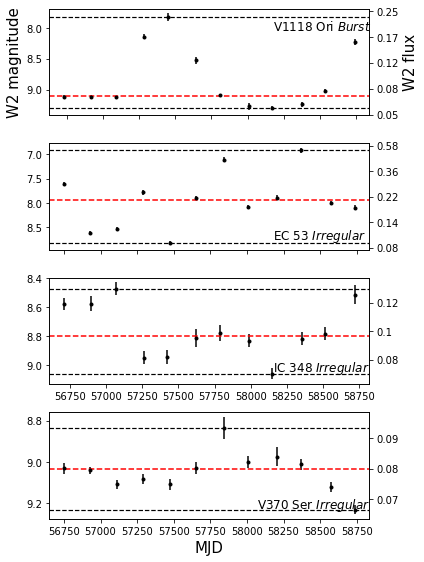

In [94]:
fig, ax = plt.subplots(4,1,figsize=(6,8))

# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

index = [35,31,42,44]
for i in range(4):
    wavg = pa.read_csv('/home/wooseok/WISE_data/FUors/outlier_cut_data/'
                        +str(index[i])+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]

    ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
    ax[i].axhline(min(w2av.mag),linestyle='--',color='k',linewidth=1.2)
    ax[i].axhline(max(w2av.mag),linestyle='--',color='k',linewidth=1.2)
    ax[i].axhline(np.median(w2av.mag),linestyle='--',color='r',linewidth=1.5)
    ax[i].invert_yaxis()
    
    ax2 = ax[i].twinx()
    w2f = 309.54 * 10 ** (-w2av.mag / 2.5)  # flux
    ew2f = w2av.emag * w2f / 1.057
    ax2.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k',alpha=0)
#     ax2.set_yscale('log')
    
    ytick = np.linspace(min(w2av.mag)-0.1,max(w2av.mag)+0.1,5)
    ylab = np.round(309.54 * 10 ** (-ytick / 2.5),2) #np.round(-2.5*np.log10(ytick/171.85),2)
    ax2.set_yticks(ytick)
    ax2.set_yticklabels(ylab)
    ax2.set_ylim(ax[i].get_ylim())
    if i==0:
        ax2.set_ylabel('W2 flux', size=15)
#     ax2.invert_yaxis()    
    

# ax[0].text(0.22,0.8,'IRAS 05377-0733 J05401379-0732159 D $\it{Burst}$',transform=ax[0].transAxes) 
# ax[1].text(0.40,0.17,'2MASS J16253316-2325304 D $\it{Drop}$',transform=ax[1].transAxes)
# ax[2].text(0.30,0.07,'IC348 46 J03441162+3203131 D $\it{Irregular}$',transform=ax[2].transAxes)
    
ax[3].set_xlabel('MJD',size=15)
ax[0].set_ylabel('W2 magnitude',size=15)
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
# ax[2].set_ylim(9.6,8.4)

ax[0].text(0.7,0.8,'V1118 Ori $\it{Burst}$',fontsize=12,transform=ax[0].transAxes)
ax[1].text(0.7,0.1,'EC 53 $\it{Irregular}$',fontsize=12,transform=ax[1].transAxes)
ax[2].text(0.7,0.12,'IC 348 $\it{Irregular}$',fontsize=12,transform=ax[2].transAxes)
ax[3].text(0.65,0.1,'V370 Ser $\it{Irregular}$',fontsize=12,transform=ax[3].transAxes)



fig.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/stoch_examples.pdf')
# fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/stoch_examples_avg.pdf')

### For FUors

In [59]:
ab = pa.read_csv('/home/wooseok/WISE_data/csvfiles/NEOWISE_fuor_stat.csv')


abc = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
         (ab.sd_sdfid_w2_flux > 1)] #&
#          (ab.Delta_w2 > 3*ab.avg_eW2)]
#          (ab['class']) ]
#          & (ab['period'] > 200)]  #200 밑에인게 한개 있었다... '


abcd = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1)] #&
         (ab.Delta_w2 > 3*ab.avg_eW2)]

print(np.setdiff1d(ab.Index, abc.Index))
print(len(ab), len(abc), len(abcd)) 


#       len(np.setdiff1d(ab.Index, abc.Index)))
# ab_rest = ab['Index'].drop(abc.Index)
# print(len(ab_rest))
print('first:', ab.Index.values)
print('original:', abc.Index.values)
print('new: ', abcd.Index.values)


print('linear')

abc_lin = abc[(abc.baluev_fap*200/abc.period<0.01) &    #52
              (abc.period >= 4000) & 
              (abc.linear_fap_w2 < 1e-4)]
print(len(abc_lin))
print(abc_lin.Index.values)
# abc_lin.to_csv('/home/wooseok/WISE_data/csvfiles/typeI_linear_variables.csv') #total 126


# FAP (LLSF) < 0.001 - FAP(LSP) < 0.01
#                    - FAP(LSP) > 0.01 - 있나??
#                                      - 모두 4000 + 하나 2800, 
#                                         얘들은 그럼 irregular?
#                                         - 0.001

# abc_lin[abc_lin.period < 3000].s_index.values

# not by LSP but linear?
# abc_lin_nop = abc[(abc.baluev_fap*200/abc.period > 0.01) &
#                  (abc.linear_fap_w2<0.0001)]
# abc_lin_nop.s_index.values
# abc_lin_nop

# abc_more_lin = abc[(abc.linear_fap_w2 < 0.001) &
#                   (abc.period < 5000) &
#                   (abc.period > 4000)]
# abc_more_lin.s_index.values


# abc_not_lin = abc[(abc.linear_fap_w2 > 0.001) &
#                   (abc.baluev_fap*200/abc.period < 0.01) &
#                   (abc.period > 4000)]
# abc_not_lin.period.value_counts()
# abc_not_lin.s_index.values
# abc_lin = abc[abc.linear_fap_w2 < 0.0001]
# abc_lin

# abc_lin_nop.period
# print(abc_lin_nop.baluev_fap*200/abc_lin_nop.period)
# abc_lin_nop


#Type II - period

abc_per = abc[(abc.baluev_fap*200/abc.period<0.01) & # total 79 #changed
  (abc.period > 200 ) & (abc.period < 1000)] 
print('periodic --')
print('per: ',len(abc_per))
print(abc_per.Index.values)
# abc_per.to_csv('/home/wooseok/WISE_data/csvfiles/typeII_periodic_variables.csv')


#Type III - curved
print('curved --')
abc_cur = abc[(abc.baluev_fap*200/abc.period<0.01) & # 48 # changed
                      ( # 2 conditions
                          
                      (  (abc.period >= 1000) & (abc.period < 4000)  )
                       |  #or
                      (  (abc.linear_fap_w2 > 1e-4) & (abc.period == 4000)) 
                          
                      )
                       ]
print('cur: ', len(abc_cur))
print('cur: ', abc_cur.Index.values)
# abc_cur.to_csv('/home/wooseok/WISE_data/csvfiles/typeIII_curved_variables.csv') #total 



#Type IV - burst
# max-median / deltaw2 > 0.8 , deltaw2 > 0.5


abc_bur = abc[((abc.median_W2-abc.max_W2)/abc.Delta_w2 > 0.8) & # total 58
  (abc.Delta_w2 > 0.5)]
print('burst---')
print('bur: ', len(abc_bur))
print(abc_bur.Index.values)
# abc_bur.to_csv('/home/wooseok/WISE_data/csvfiles/typeIV_burst_variables.csv')


#Type V - dimming
# median - min / deltaw2 > 0.8, deltaw2 > 0.5

abc_dim = abc[(abs(abc.median_W2-abc.min_W2)/abc.Delta_w2 > 0.8) & # total 16
#               (abs(abc.median_W2-abc.min_W2)/abc.Delta_w2 < 0.8) &
              (abc.Delta_w2 > 0.5)]
print('dimming --')
print('dim: ',len(abc_dim))
print(abc_dim.Index.values)
# abc_dim.to_csv('/home/wooseok/WISE_data/csvfiles/typeV_dim_variables.csv')

#Type VI - irregular
# lin per cur bur dim... else.
abc_aa = pa.concat([abc_lin, abc_per, abc_cur, abc_bur, abc_dim],verify_integrity=False)
print('irregular----')
print('sources : ',len(abc_lin), len(abc_per), len(abc_cur), len(abc_bur), len(abc_dim))
# print(abc_aa)
print(abc_aa.Index.value_counts())
# delete duplicates, sort index
abc_aas = abc_aa.Index.drop_duplicates(keep='last').sort_values().values

abcd = abc.set_index('Index')
# abcd.loc[abc_aas]
abc_irr = abcd.drop(abc_aas)
print('total: ', len(abc))
print('type1~5,dup: ',len(abc_aa))
print('type1~5: ',len(abc_aas))
print('abc_irr: ', len(abc_irr))

abc_irr_3 = abc_irr[abc_irr.sd_sdfid_w2_flux > 3]
print('abc_irr_3: ',len(abc_irr_3))
# print(abc_irr_3.Index.values)
abc_irr_3
# abc_irr_3.to_csv('/home/wooseok/WISE_data/csvfiles/typeVI_irr_variables.csv')




[ 1  3  4  5  6  8  9 10 11 13 15 16 17 18 19 20 27 28 29 30 32 34 38 39
 41 45 46 47 49]
46 17 17
first: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 27 28 29 30 31 32 34 35 37 38 39 40 41 42 44 45 46 47 48 49 50 51]
original: [ 2  7 12 14 21 22 24 25 31 35 37 40 42 44 48 50 51]
new:  [ 2  7 12 14 21 22 24 25 31 35 37 40 42 44 48 50 51]
linear
4
[ 2 21 22 25]
periodic --
per:  0
[]
curved --
cur:  3
cur:  [14 24 40]
burst---
bur:  1
[35]
dimming --
dim:  1
[25]
irregular----
sources :  4 0 3 1 1
25    2
14    1
40    1
24    1
22    1
21    1
35    1
2     1
Name: Index, dtype: int64
total:  17
type1~5,dup:  9
type1~5:  8
abc_irr:  9
abc_irr_3:  3


ra         dec   dist_sd     avg_W1  stdev_W1   avg_eW1  \
Index                                                                    
31     277.463385  277.463385  0.068485  10.084373  0.510158  0.029523   
42      56.075000   56.075000  0.042168   9.185123  0.160298  0.033704   
44     277.455191  277.455191  0.077195  11.072287  0.108069  0.025562   

         avg_W2  stdev_W2   avg_eW2  N_w1  ...  baluev_fap_w1  power_w1  \
Index                                      ...                            
31     7.945583  0.536892  0.044748    12  ...       0.938427  0.522166   
42     8.760035  0.178024  0.049076    12  ...       0.790187  0.575138   
44     9.048796  0.093176  0.028798    12  ...       0.189944  0.763722   

         amp_w1  sinamp_w1  ls_meanjy_w1  sd_sdfid_periodrmv_w1  \
Index                                                             
31     0.014660   0.014657      0.026138              11.233745   
42     0.009514   0.009512      0.063652               3.462589   
44     0.001331   0.001331      0.011665               2.433360   

       sd_periodrmv_w1  Deltaall_w1_periodrmv   Var_type  good?  
Index                                                            
31            0.010379               0.895663  irregular    NaN  
42            0.007327               0.395092  irregular    NaN  
44            0.000667               0.234620  irregular    NaN  

[3 rows x 57 columns]

In [193]:
abc_dim.s_index.values

array([ 613, 1250, 1477, 1659, 2051, 2130, 2700, 3106, 3145, 3180, 4129,
       4293, 5584, 5609, 6368, 6424])

In [ ]:
import numpy as np

a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
index = [2, 3, 6]

new_a = np.delete(a, index)

In [226]:
# 중복 빼고 남은놈 잡기
len(abc[abc.baluev_fap*200/abc.period<0.01]),len(abc_lin),len(abc_per),len(abc_cur)

x=abc[abc.baluev_fap*200/abc.period<0.01].s_index.values
y=abc_lin.s_index.values
z=abc_per.s_index.values
w=abc_cur.s_index.values
# xy = np.delete(x,list(y))
# xy
xy = np.setdiff1d(x,y)
xyz = np.setdiff1d(xy,z)
xyzw = np.setdiff1d(xyz,w)
# list(y)
# xy = np.delete(x,list(y))
# xy
len(x),len(y),len(xy),len(xyz),len(xyzw)
xyzw

array([431])

In [228]:
abc[abc.s_index == 431].period

398    199.274592
Name: period, dtype: float64

이들은 4000보다 주기가 작은데, linear fap 가 낮다. 왜지? 원래는 curved 로 분류되어야함. 

주기는 모두 2850일-2920일.. 

TypeI : 주기 4000일. Linear FAP < 1e-4, baluev fap < 1e-2,

TypeIII : 주기 4000일. Linear FAP > 1e-4, baluev fap < 1e-2 +
          주기 1000~4000일, baluev_fap < 1e-2  즉 .TypeI 이 아닌 나머지를 다 TypeIII. 
        

### Table 2. fractional number

In [236]:
# print(np.array([25,4,72,16,2,209,1,1])/355)
# print(np.array([19, 18, 114, 37, 12, 662, 1])/881)
# print(np.array([7, 56, 27, 3, 0, 62, 1])/156)


print(np.array([25,4,72,16,2,209,1,1])/717)
print(np.array([19, 18, 114, 37, 12, 662, 1])/3405)
print(np.array([7, 56, 20, 3, 0, 62, 1])/1170)

print(np.array([329/717, 862/3405, 149/1170]))

[0.0348675  0.0055788  0.10041841 0.0223152  0.0027894  0.29149233
 0.0013947  0.0013947 ]
[0.00558003 0.00528634 0.03348018 0.01086637 0.00352423 0.19441997
 0.00029369]
[0.00598291 0.04786325 0.01709402 0.0025641  0.         0.05299145
 0.0008547 ]
[0.45885635 0.25315712 0.12735043]


In [58]:
abc

s_index   dist_sd         ra        dec     avg_W1  stdev_W1   avg_eW1  \
0           1  0.047869  85.677833 -10.419250   8.667838  0.269577  0.050075   
3           4  0.051361  85.554458 -10.093028  12.232797  0.240750  0.033176   
4           5  0.036891  85.632375 -10.090611  10.805297  0.138128  0.041883   
5           6  0.050667  85.658458 -10.062111  11.576289  0.123826  0.033988   
9          11  0.048965  85.685167 -10.055111  10.546118  0.073535  0.021382   
...       ...       ...        ...        ...        ...       ...       ...   
5995    10430  0.045953  71.113123  25.204480   9.750244  0.119638  0.024006   
6016    10452  0.143835  72.241258  29.231769   9.722734  0.211504  0.046162   
6021    10457  0.043500  73.040449  30.629176  10.084616  0.181011  0.046630   
6055    10494  0.044715  75.645156  27.763746  10.708153  0.068708  0.024638   
6057    10496  0.051301  75.777509  25.388705   8.265244  0.170700  0.041678   

         avg_W2  stdev_W2   avg_eW2  ...  baluev_fap     power       amp  \
0      7.439102  0.230115  0.054464  ...    0.971792  0.459044  0.044416   
3     10.674893  0.234924  0.029534  ...    0.387737  0.691795  0.002189   
4     10.062415  0.154047  0.037492  ...    0.999263  0.383424  0.002413   
5     11.183786  0.169476  0.037305  ...    0.994333  0.425083  0.000872   
9     10.008407  0.083583  0.022329  ...    0.689723  0.626224  0.001554   
...         ...       ...       ...  ...         ...       ...       ...   
5995   9.107813  0.170432  0.029917  ...    0.380492  0.691783  0.006356   
6016   8.725213  0.192777  0.049242  ...    0.035781  0.841941  0.012472   
6021   9.040661  0.150426  0.046168  ...    0.748172  0.595310  0.006718   
6055  10.281334  0.100239  0.030417  ...    0.999587  0.305493  0.000712   
6057   7.859042  0.186778  0.044670  ...    0.984664  0.456747  0.020574   

        sinamp  ls_meanjy  sd_sdfid_periodrmv  sd_periodrmv  chi2_period_w2  \
0     0.065057   0.212836            2.493543      0.023937       79.299968   
3     0.002189   0.009289            4.679364      0.001201      239.925207   
4     0.002412   0.015920            3.499869      0.001949      146.299254   
5     0.000872   0.005783            3.619243      0.000722      135.733213   
9     0.001553   0.017098            2.374798      0.000832       70.791604   
...        ...        ...                 ...           ...             ...   
5995  0.006355   0.037974            3.793160      0.004300      124.494786   
6016  0.012470   0.054967            1.825519      0.004794       38.964227   
6021  0.006718   0.041225            2.625321      0.004736       75.236876   
6055  0.000712   0.012916            3.103236      0.001178       60.324316   
6057  0.020571   0.121465            2.810989      0.014457      121.563129   

      linear_fap_periodrmv  Deltaall_w2_periodrmv  
0                 0.972850               0.524982  
3                 0.989165               0.401023  
4                 0.174666               0.430690  
5                 0.951713               0.486794  
9                 0.089149               0.188906  
...                    ...                    ...  
5995              0.975599               0.493421  
6016              0.862903               0.308961  
6021              0.647062               0.486283  
6055              0.990845               0.281930  
6057              0.968428               0.466296  

[1152 rows x 61 columns]

In [230]:
ev[(ev.baluev_fap*200/ev.period<0.01) & # 37
  (ev.period > 1000) ].s_index.values
# for i in range(ev.s_index.values)-1:
#     ev.s_index.values[i]

array([3520, 3534, 3576, 3597, 3695, 3708, 3745, 3772, 3773, 3846, 3886,
       3903, 3944, 4020, 4159, 4178, 4180, 4292, 4299, 4431, 4488, 4492,
       4539, 4684, 4693, 4771, 4780, 4953, 5120, 5480, 5501, 5529, 5839,
       5848, 5885, 5889, 5913])

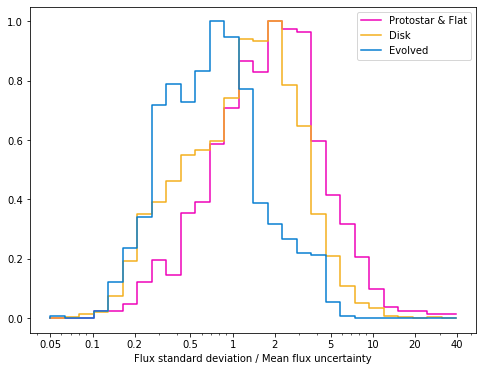

In [9]:
plt.figure(figsize=(8,6))
for i in range(len(yso_hist)):
    plt.step(hist_ret[i][1][:len(hist_ret[i][1])-1],hist_ret[i][0]/max(hist_ret[i][0]),
             color = y_color[i],label=y_label[i])
plt.xscale('log')
plt.xticks([0.05,0.1,0.2,0.5,1,2,5,10,20,40], [0.05,0.1,0.2,0.5,1,2,5,10,20,40])
plt.xlabel('Flux standard deviation / Mean flux uncertainty')
# plt.ylabel('DeltaW2 (Max - Min)')
plt.legend()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/std_hist.pdf')

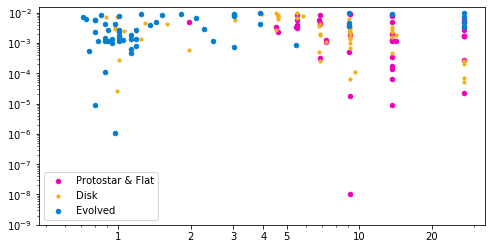

In [10]:
# period vs baluev fap scatter
# yso_hist = [prfl,di,ev]


yso_period = [prfl[prfl['baluev_fap']<0.01], di[di['baluev_fap']<0.01], ev[ev['baluev_fap']<0.01] ]
yf_label = ['Protostar & Flat',
           'Disk', 'Evolved']
yf_color=['#ee00b8', 
         '#f4af1b', '#057dd1']
yf_size=[20,10,20]
yf_marker = ['o','o','o']

plt.figure(figsize=(8,4))
for i in range(len(yso_period)):
    plt.scatter(yso_period[i].period/365.25, yso_period[i].baluev_fap,
               s = yf_size[i], c=yf_color[i],label=yf_label[i],marker=yf_marker[i])
plt.xscale('log')
plt.yscale('log')
plt.xticks([1,2,3,4,5,10,20], [1,2,3,4,5,10,20])
plt.ylim(0.015,1e-9)
plt.gca().invert_yaxis()
# plt.xlabel('DeltaW2 (Max - Min)')
# plt.ylabel('DeltaW2 (Max - Min)')
plt.legend()

In [42]:
prfl.period

0       10000.000000
3        2512.983005
19       3348.586480
20        272.019787
27       5016.145766
            ...     
5542    10000.000000
5546    10000.000000
5549     4984.710145
5550      903.866408
5558    10000.000000
Name: period, Length: 736, dtype: float64

## Baluev FAP vs. Period plot

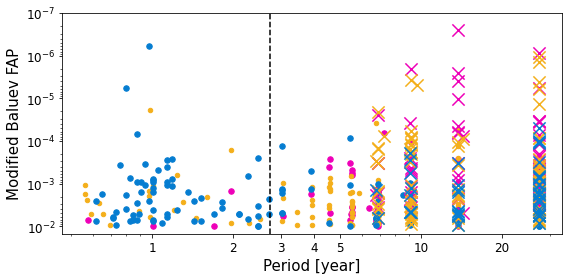

In [71]:
ab = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/obsb_outcut_md_taurus_NEOWISE_avg2_med_LSP.csv')
abc = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2)]

# add modified FAP
abc.loc[:,'mod_baluev_fap'] = abc.loc[:,'baluev_fap'] * 200 / abc.loc[:,'period']


per_crit = (abc['mod_baluev_fap'] < 0.01) & (abc['linear_fap_w2'] >= 0.001) 
per_lin_crit = (abc['mod_baluev_fap'] < 0.01) & (abc['linear_fap_w2'] < 0.001)


pr_crit = (abc['class'] == "P") | \
        (abc['class'] == "F") |\
        (abc['class'] == "FP") |\
        (abc['class'] == "0") |\
        (abc['class'] == "I") |\
        (abc['class'] == "I?")
        
di_crit = (abc['class'] == "D") |\
        (abc['class'] == "II") |\
        (abc['class'] == "full") |\
        (abc['class'] == "full?") |\
        (abc['class'] == "debris/ev trans") |\
        (abc['class'] == "transitional") |\
        (abc['class'] == "evolved") |\
        (abc['class'] == "ev or trans")
        
ev_crit = (abc['class'] == "E") |\
        (abc['class'] == "III") 
        
        
pr_per = abc[per_crit & pr_crit]
di_per = abc[per_crit & di_crit]
ev_per = abc[per_crit & ev_crit]

pr_plin = abc[per_lin_crit & pr_crit]
di_plin = abc[per_lin_crit & di_crit]
ev_plin = abc[per_lin_crit & ev_crit]



yso_per = [pr_per,di_per,ev_per]
yso_plin = [pr_plin, di_plin, ev_plin]

y_label = ['P', 'D', 'E']
y_color=['#ee00b8', '#f4af1b', '#057dd1']


yf_size=[30,20,30]
yf_marker = ['o','o','o']

plt.figure(figsize=(8,4))
for i in range(len(yso_per)):
    plt.scatter(yso_per[i].period/365.25, 
                yso_per[i].mod_baluev_fap,
               s = yf_size[i], c=y_color[i],label=y_label[i],
                marker=yf_marker[i])

# plt.legend(fontsize=11,loc='upper center')

for i in range(len(yso_plin)):
    plt.scatter(yso_plin[i].period/365.25, 
                yso_plin[i].mod_baluev_fap,
               s = 150,
#                 s=yf_size[i],
                c=y_color[i],
                marker='x',
#                 marker=yf_marker[i],
#                 edgecolors='k',
#                 linewidth=1
               )


# plot linear as circle
#     plt.scatter(yso_plin[i].period/365.25,
#            yso_plin[i].mod_baluev_fap,
#            s = 150, facecolors='none', 
#                 edgecolors='k',
# #                 alpha=0.5,
#                 linewidth=0.7,
#             marker='^')
    
    
plt.xscale('log')
plt.yscale('log')
plt.xticks([1,2,3,4,5,10,20], [1,2,3,4,5,10,20],size=12)
plt.yticks(size=12)
plt.ylim(0.015,1e-7)
# plt.gca().invert_yaxis()
plt.xlabel('Period [year]',size=15)
plt.ylabel('Modified Baluev FAP',size=15)
plt.axvline(1000/365.25,linestyle='--', color='k')

plt.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/period_fap_scatter_mod3_x.pdf')

In [719]:
?~matplotlib.markers

Object `~matplotlib.markers` not found.


## Period CDF plot

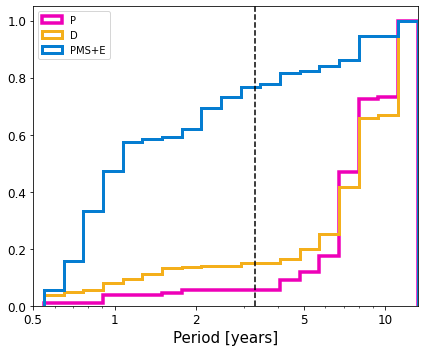

In [8]:
var = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
abc = var[(var.var_type == 'curved') | 
          (var.var_type == 'periodic')]
# abc_per = var[var.var_type == 'periodic']


# print(pr['period'].max())
pr = abc[(abc['class'] == "P")]


di = abc[(abc['class'] == "D")]

ev = abc[(abc['class'] == "PMS+E")]

yso = [pr,di,ev]
y_label = ['P', 'D', 'PMS+E']
y_color=['#ee00b8', '#f4af1b', '#057dd1']

plt.figure(figsize=(6,5))

for i in range(len(yso)):
#     np.histogram(yso[i].period/365)
    if i == 0:
        linewidth = 3.5
    else:
        linewidth = 3
    plt.hist(yso[i].period/365.25,
            bins=np.logspace(np.log10(200/365.25),np.log10(4800/365.25),20),
            cumulative=True,
            histtype='step',
            color=y_color[i],
            label=y_label[i],
             density = True,
            linewidth=linewidth)
plt.axvline(1200/365.25,linestyle='--',c='k')
plt.xscale('log')
plt.xlim(200/365.25,4800/365.25)
tick = [0.5,1,2,5,10]
plt.xticks(tick,labels=tick,size=12)
plt.yticks(size=12)
plt.xlabel('Period [years]',size=15)
# plt.ylabel('#',size=15)
plt.tight_layout()
plt.legend(loc='upper left')
# 4000/365.25
plt.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure12.pdf')

## Periodic source Amplitude plot

### Amplitude CDF

In [57]:
var = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
abc = var[(var.var_type == 'curved') | 
          (var.var_type == 'periodic')]
# abc_per = var[var.var_type == 'periodic']



pr = abc[(abc['class'] == "P")]


di = abc[(abc['class'] == "D")]

ev = abc[(abc['class'] == "PMS+E")]



#정확히, hamp (agbs) 에서 curved 는 빼야함.
cut=0.145

hamp = ev[
#            ((var.var_type=='curved') |     # no agbs are curved!
           (ev.var_type == 'periodic')  &
           (ev.amp/ev.ls_meanjy >= cut)
          ]
# hamp = ev[ev.amp/ev.ls_meanjy >= cut]

#ev - agbs
lamp = ev[ev['Index'].isin(np.setdiff1d(ev['Index'].values,hamp['Index'].values))]

len(ev),len(hamp),len(lamp)

hamp.period.max()

714.9120069303682

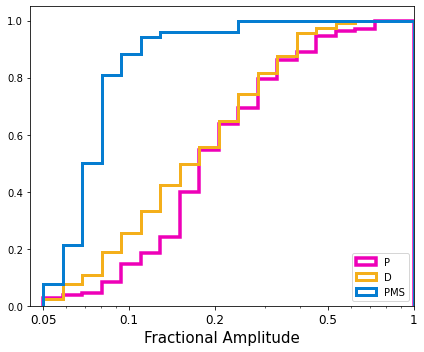

In [59]:
var = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
abc = var[(var.var_type == 'curved') | 
          (var.var_type == 'periodic')]
# abc_per = var[var.var_type == 'periodic']



pr = abc[(abc['class'] == "P")]


di = abc[(abc['class'] == "D")]

ev = abc[(abc['class'] == "PMS+E")]

cut=0.145

#정확히, hamp 에서 curved 는 빼야함.
cut=0.145

hamp = ev[
#            ((var.var_type=='curved') |     # no agbs are curved!
           (ev.var_type == 'periodic')  &
           (ev.amp/ev.ls_meanjy >= cut)
          ]
# hamp = ev[ev.amp/ev.ls_meanjy >= cut]

#ev - agbs
lamp = ev[ev['Index'].isin(np.setdiff1d(ev['Index'].values,hamp['Index'].values))]

yso = [pr,di,lamp]
y_label = ['P', 'D', 'PMS']
y_color=['#ee00b8', '#f4af1b', '#057dd1']

plt.figure(figsize=(6,5))

for i in range(len(yso)):
#     np.histogram(yso[i].period/365)
    if i == 0:
        linewidth = 3.5
        shape='-'
#     elif i == 2:
#         linewidth = 3.5
#         shape=':'
    else:
        linewidth = 3
        shape='-'
    plt.hist(yso[i].amp/yso[i].ls_meanjy,
            bins=np.logspace(np.log10(0.05),np.log10(1),20),
            cumulative=True,
            histtype='step',
            color=y_color[i],
            label=y_label[i],
             linestyle=shape,
             density = True,
            linewidth=linewidth)
# plt.axvline(1000/365.25,linestyle='--',c='k')
plt.xscale('log')
plt.xlim(0.045,1)
# plt.xlim(200/365.25,4000/365.25)
tick = [0.05,0.1,0.2,0.5,1]
plt.xticks(tick,labels=tick,size=12)
# plt.yticks(size=12)
plt.xlabel('Fractional Amplitude',size=15)
plt.tight_layout()
plt.legend(loc='lower right')

# plt.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure15.pdf')

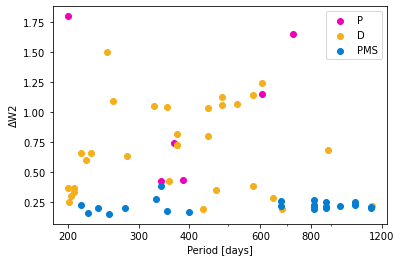

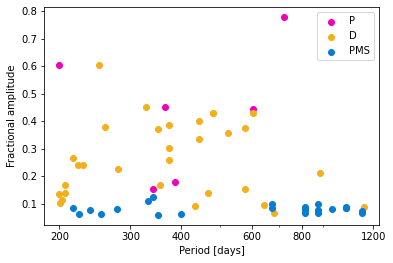

In [84]:
# 4) Figure 12에 사용된 periodic sources 에 대해서만, 
# Delta_W2 vs. period 와 amplitude (flux) vs. period 

var = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
abc = var[ #(var.var_type == 'curved') | 
          (var.var_type == 'periodic')]
# abc_per = var[var.var_type == 'periodic']



pr = abc[(abc['class'] == "P")]


di = abc[(abc['class'] == "D")]

ev = abc[(abc['class'] == "PMS+E")]

tick = [200,300,400,600,800,1200]

#정확히, hamp 에서 curved 는 빼야함.
cut=0.145

hamp = ev[
#            ((var.var_type=='curved') |     # no agbs are curved!
           (ev.var_type == 'periodic')  &
           (ev.amp/ev.ls_meanjy >= cut)
          ]
# hamp = ev[ev.amp/ev.ls_meanjy >= cut]

#ev - agbs
lamp = ev[ev['Index'].isin(np.setdiff1d(ev['Index'].values,hamp['Index'].values))]

yso = [pr,di,lamp]
y_label = ['P', 'D', 'PMS']
y_color=['#ee00b8', '#f4af1b', '#057dd1']

fig0, ax = plt.subplots()
for n in range(len(yso)):
    ax.scatter(yso[n].period, yso[n].Delta_w2,label=y_label[n],color=y_color[n])

ax.set_xscale('log')
ax.set_ylabel('$\Delta$W2')
ax.set_xlabel('Period [days]')
ax.set_xticks(tick)
ax.set_xticklabels(tick)
plt.legend()


fig1, ax1 = plt.subplots()
for n in range(len(yso)):
    ax1.scatter(yso[n].period, yso[n].amp/yso[n].ls_meanjy,label=y_label[n],color=y_color[n])

ax1.set_xscale('log')
ax1.set_ylabel('Fractional amplitude')
ax1.set_xlabel('Period [days]')
ax1.set_xticks(tick)
ax1.set_xticklabels(tick)
plt.legend()

# fig0.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/periodic_delw2_period.pdf')
# fig1.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/periodic_amp_period.pdf')

In [79]:
?ax1.set_xticks

### Mean W2 flux CDF

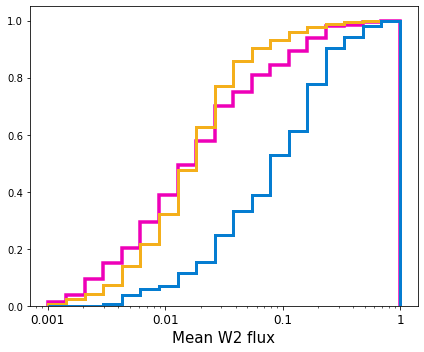

In [34]:
var = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
# abc = var[(var.var_type == 'curved') | 
#           (var.var_type == 'periodic')]
abc = var
# abc_per = var[var.var_type == 'periodic']



pr = abc[(abc['class'] == "P")]


di = abc[(abc['class'] == "D")]

ev = abc[(abc['class'] == "PMS+E")]

yso = [pr,di,ev]
y_label = ['P', 'D', 'PMS+E']
y_color=['#ee00b8', '#f4af1b', '#057dd1']

plt.figure(figsize=(6,5))

for i in range(len(yso)):
#     np.histogram(yso[i].period/365)
    if i == 0:
        linewidth = 3.5
    else:
        linewidth = 3
    plt.hist(171.85 * 10 ** (-yso[i].avg_W2 / 2.5),
            bins=np.logspace(np.log10(0.001),np.log10(1),20),
            cumulative=True,
            histtype='step',
            color=y_color[i],
            label=y_label[i],
             density = True,
            linewidth=linewidth)
# plt.axvline(1000/365.25,linestyle='--',c='k')
plt.xscale('log')
# plt.xlim(200/365.25,4000/365.25)
tick = [0.001,0.01,0.1,1]
plt.xticks(tick,labels=tick,size=12)
# plt.yticks(size=12)
plt.xlabel('Mean W2 flux',size=15)
plt.tight_layout()

# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/period_cdf_2.pdf')

### Periodogram example : 3511

14    -180.999321
15       0.000000
16     182.424899
17     359.691243
18     546.637463
19     718.375056
20     912.408162
21    1081.372704
22    1277.894238
23    1441.812683
24    1642.767667
25    1806.665816
26    2009.058710
27    2172.959779
Name: mjd, dtype: float64
14    0.100333
15    0.102990
16    0.091788
17    0.085245
18    0.089361
19    0.098111
20    0.097688
21    0.092297
22    0.081814
23    0.085304
24    0.100811
25    0.098637
26    0.085821
27    0.085182
Name: mag, dtype: float64
Best period: 874.94 days / power : 0.920
modified baluev FAP is 6.69e-05
baluev FAP is 2.93e-04
amplitude : 0.0091Jy.
real amp : 0.0091Jy.


<ipython-input-5-18fa7713fbf6>:157: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


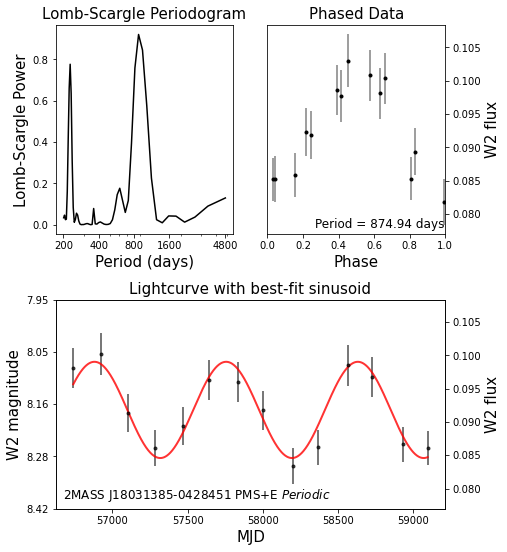

In [5]:
index = 3511
min_p = 200
max_p = 4800
a = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/ysos_c.dat',
                sep="\s+", header=None,
                names=["index", "ra", "dec", "class", "cat"])






wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
        +str(index)+'_cavg.csv', 
         names=['mjd','mag','emag','flt','class'],
         skiprows=1)







w2av = wavg[wavg['flt'] == 'W2']








# convert to flux
w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
ew2f = w2av.emag * w2f / 1.0857





lsav = LombScargle(w2av.mjd, w2f, ew2f)  # flux lombscargle

frequency, power = lsav.autopower(  # nyquist_factor=5,
    maximum_frequency=1/min_p, #40 days  # 0.004,#minimum period > 250days
    minimum_frequency=1/max_p)  # 0.0001) #0.2 #maximum period 10000days

# frequency = np.arange(1/max_p,1/min_p,1/50000)
# print(frequency)
# power = lsav.power(method='auto', frequency=frequency)

period_days = 1. / frequency
period_hours = period_days * 24

best_period = period_days[np.argmax(power)]

# print('phase : ',phase)
print(w2av.mjd - w2av.mjd[w2f == max(w2f)].values)
print(w2f)
print("Best period: {0:.2f} days / power : {1:.3f}".format(best_period, np.max(power)))

#         fig, ax = plt.subplots(1, 2, figsize=(15, 6))


fig = plt.figure(figsize=(7,8))
grid = GridSpec(6,18,
                left=0.12, bottom=0.1, right=0.94, top=0.94, wspace=0.8, hspace=2.5)
ax1 = fig.add_subplot(grid[0:3, 0:8])
ax2 = fig.add_subplot(grid[0:3, 9:17])
ax3 = fig.add_subplot(grid[3:6, 0:17])


# PSD has a _LOT_ of elements. Rasterize it so it can be displayed as PDF
# ax1.plot(period_days, power, '.k', rasterized=True)
ax1.plot(period_days, power, 'k', rasterized=True)
#         ax[0].xaxis.set_major_formatter(ScalarFormatter())



ax1.set_xlabel('Period (days)',size=15)
ax1.set_ylabel('Lomb-Scargle Power',size=15)
ax1.set_title('Lomb-Scargle Periodogram',size=15)
ax1.set_xscale('log')
#         ax[0].set_xscale('log')
ax1.set_xticks([200,400,800,1600,4800])
ax1.set_xticklabels([200,400,800,1600,4800])
#         ax1.set_xticks([50,100,200,400,800,1600,3200,10000])
#         ax1.set_xticklabels([50, 100,200,400,800,1600,3200,10000])
#         ax[0].ticklabel_format(style='plain')

fap = lsav.false_alarm_probability(power)
# boot_fap = lsav.false_alarm_probability(power, method='bootstrap',
#                                         method_kwds={'n_bootstraps': 5000})


fapl2 = lsav.false_alarm_level(0.001, method='baluev')
# fapb2 = lsav.false_alarm_level(0.001, method='bootstrap',
#                                method_kwds={'n_bootstraps': 1000})
print("modified baluev FAP is {:5.2e}".format(fap[np.argmax(power)]*200/best_period))
print("baluev FAP is {:5.2e}".format((fap[np.argmax(power)])))
# print("bootstrap FAP is {:.5f}".format(boot_fap[np.argmax(power)]))

phase_model = np.linspace(-0.5, 1.5, 100)
best_frequency = frequency[np.argmax(power)]
flux_model = lsav.model(phase_model / best_frequency, best_frequency)

arw2m = np.squeeze(np.array([w2av.mjd]))
smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
flux_jmod = lsav.model(smjd, best_frequency)
flux_jdot = lsav.model(w2av.mjd, best_frequency)


phase = (abs(w2av.mjd - smjd[flux_jmod == min(flux_jmod)][0]) / best_period) % 1


# ax1.legend()

ax2.errorbar(phase, w2f, ew2f,
               fmt='.k', ecolor='gray', capsize=0)
ax2.set_xlabel('Phase',size=15)
ax2.set_ylabel('W2 flux',size=15)
ax2.set_title('Phased Data',size=15)
# ax[1].invert_yaxis()
ax2.text(0.27, 0.03, "Period = {0:.2f} days".format(best_period),
           transform=ax2.transAxes,size=12)
ax2.set_xlim(0, 1)

ax2.yaxis.set_ticks_position("right")
ax2.yaxis.set_label_position("right")


ax3.plot(smjd, flux_jmod, color='r', lw=2,
         alpha=0.8
         )
# print('min_model : ', smjd[flux_jmod == max(flux_jmod)])
ax3.errorbar(w2av.mjd, w2f, yerr=ew2f, fmt='ok',
             alpha=0.7,
             ms=3)

ax3.text(0.02,0.05,'2MASS J18031385-0428451 PMS+E $\it{Periodic}$',size=12, transform=ax3.transAxes)

ax31 = ax3.twinx()
ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
ylab = np.round(-2.5*np.log10(ytick/171.85),2)
ax3.set_yticks(ytick)
ax3.set_yticklabels(ylab)
ax31.errorbar(w2av.mjd, w2f, yerr=ew2f, fmt='.k', alpha=0)
ax3.set_xlabel('MJD',size=15)
ax31.set_ylabel('W2 flux',size=15)
ax3.set_ylabel('W2 magnitude', size=15)
# ax3.set_xticks(size=12)
# ax3.set_yticks(size=12)
ax3.set_title('Lightcurve with best-fit sinusoid',size=15)
#         ax3.set_title(str(index)+'({})'.format(ycl), size=15) #'lightcurve with best fit sinusoid :   '
#     plt.yscale('log')
print('amplitude : {:.4f}Jy.'.format((max(flux_jmod) - min(flux_jmod)) * 0.5))
print('real amp : {:.4f}Jy.'.format((max(flux_model) - min(flux_model)) *0.5))
plt.tight_layout()
# ?ax2.set_ylabel
# plt.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure5.pdf')

In [10]:
abc[abc.s_index == 3511]['class']

2832    E
Name: class, dtype: object

### Periodogram without outliers

In [194]:
lin = [85,   125,   221,   597,   718,   888,  1100,  1434,  1523,
        2458,  2629,  2842,  3180,  3246,  3286,  3452,  3695,  3705,
        3708,  3857,  3916,  3957,  4015,  4299,  4693,  4771,  4850,
        5208,  5258,  5267,  5272,  5438,  5491,  5501,  5585,  5614,
        5623,  5839,  5859,  5877,  5982,  6091,  6206,  6233,  6371,
        6404,  6431, 10024, 10042, 10094, 10111, 10180]

In [196]:
# 1. linear fit remove. 

def linfit_rem_bd(index):
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
            +str(index)+'_cavg.csv', 
             names=['mjd','mag','emag','flt','class'],
             skiprows=1)
    if index > 10000:
        wavg = pa.read_csv('/home/wooseok/WISE_data/Taurus/avgdata/'+str(index)+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)

    w2av = wavg[wavg['flt'] == 'W2']
    w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
    ew2f = w2av.emag * w2f / 1.0857

    plt.figure()
    plt.errorbar(w2av.mjd,w2av.mag,w2av.emag,fmt='.')
    plt.gca().invert_yaxis()
    plt.close()
    
    plt.figure()
    plt.errorbar(w2av.mjd,w2f,ew2f,fmt='.')
    def func(x,a,b):
        return a*x + b

    resw2, cov = curve_fit(func,w2av.mjd,w2f, sigma=ew2f
                          ,absolute_sigma = True)

    yfit= np.polyval(resw2,w2av.mjd)
    plt.plot(w2av.mjd,yfit,label='fit')
    # plt.yscale('log')
    plt.close()
    
    plt.figure()
    plt.errorbar(w2av.mjd, w2f/yfit,w2av.emag,fmt='.')
    plt.axhline(1,color='r',linestyle='--')
    plt.close()
    
    plt.figure()
    plt.errorbar(w2av.mjd,w2av.mag,w2av.emag,fmt='.')
    fitmag = -2.5*np.log10(yfit/171.85)
    plt.errorbar(w2av.mjd,fitmag)
    plt.gca().invert_yaxis()
    plt.close()
    nflux = w2f-yfit
    plt.figure()
    nmag = w2av.mag - fitmag
    plt.errorbar(w2av.mjd,nmag,w2av.emag,fmt='.')
    plt.axhline(np.min(nmag))
    plt.axhline(np.max(nmag))
    plt.axhline(np.median(nmag))
    plt.gca().invert_yaxis()
    plt.close()
    print('index :', index)
    print('original median-min : {:.2f}% of DeltaW2'.format((np.median(w2av.mag)-np.min(w2av.mag))/(np.max(w2av.mag)-np.min(w2av.mag))*100))
    print('original max-median : {:.2f}% of DeltaW2'.format((np.max(w2av.mag)-np.median(w2av.mag))/(np.max(w2av.mag)-np.min(w2av.mag))*100))
    print('norm_ median-min : {:.2f}% of DeltaW2'.format((np.median(nmag)-np.min(nmag))/(np.max(nmag)-np.min(nmag))*100))
    print('norm_ max-median : {:.2f}% of DeltaW2'.format((np.max(nmag)-np.median(nmag))/(np.max(nmag)-np.min(nmag))*100))
    print('-----')
    return nflux, ew2f

In [ ]:
# Type II : sinusoid remove


In [88]:
irr = [ 1432,  1433,  1437,  1441,  1446,  1465,  1469,
        1470,  1473,  1474,  1478,  1483,  1505,  1506,  1528,  1544,
        1555,  1559,  1566,  1573,  1574,  1583,  1584,  1615,  1632,
        1654,  1663,  1672,  1687,  1699,  1707,  1786,  1818,  1838,
        1992,  2027,  2096,  2109,  2117,  2132,  2135,  2193,  2207,
        2224,  2225,  2235,  2238,  2245,  2251,  2258,  2267,  2269,
        2277,  2280,  2300,  2319,  2323]

In [103]:
curv = [1,    14,    23,    31,    32,    77,    89,   178,   211,
         246,   255,   270,   319,   324,   352,   391,   396,   433,
         473,   509,   529,   550,   575,   628,   691,   709,   737,
         777,   845,   878,  1019,  1027,  1128,  1136,  1177,  1294,
        1297,  1406,  1407,  1415,  1421,  1504,  1789,  2361,  2382,
        2408,  2427,  2441,  2456,  2748,  2855,  2897,  2915,  2923,
        3151,  3167,  3175,  3359,  3426,  3439,  3471,  3763,  3803,
        3835,  3884,  3960,  3993,  4002,  4018,  4041,  4076,  4085,
        4101,  4105,  4106,  4129,  4150,  4467,  4663,  4754,  4759,
        4766,  4781,  4892,  4900,  4907,  4921,  4922,  4924,  4930,
        4938,  4955,  4957,  5013,  5036,  5121,  5236,  5245,  5269,
        5330,  5335,  5337,  5353,  5375,  5563,  5648,  5660,  5666,
        5711,  5738,  5864,  5868,  5870,  5871,  5879,  5882,  5886,
        5888,  5897,  5919,  5933,  5959,  5961,  6010,  6031,  6032,
        6033,  6034,  6082,  6088,  6162,  6285,  6303,  6326,  6365,
        6373,  6375,  6376,  6383,  6423,  6424,  6430,  6437,  6440,
       10092, 10112, 10128, 10136]

index : 77
original median-min : 64.43% of DeltaW2
original max-median : 35.57% of DeltaW2
norm_ median-min : 59.59% of DeltaW2
norm_ max-median : 40.41% of DeltaW2
-----


(12    0.000633
 13   -0.000255
 14   -0.000260
 15    0.001464
 16    0.003248
 17   -0.000969
 18   -0.001044
 19    0.002996
 20   -0.000800
 21   -0.001243
 22    0.001587
 23    0.003532
 Name: mag, dtype: float64,
 12    0.000109
 13    0.000100
 14    0.000119
 15    0.000215
 16    0.001664
 17    0.000189
 18    0.000126
 19    0.000227
 20    0.000141
 21    0.000182
 22    0.000212
 23    0.000316
 dtype: float64)

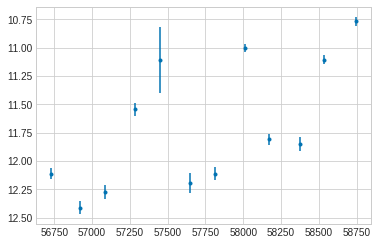

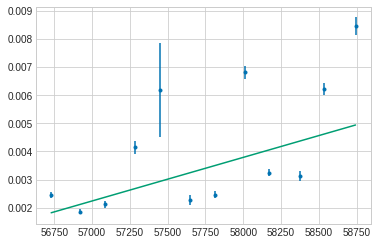

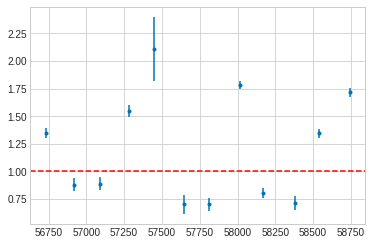

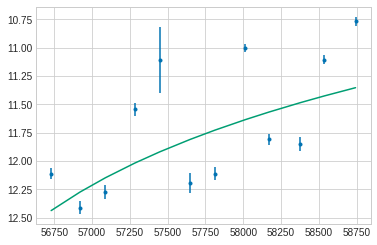

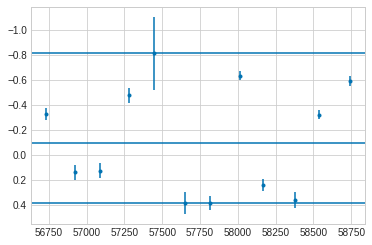

In [159]:
linfit_rem_bd(77) # 4771 6331   #1441, 1470, 1559,1632   + 3957 Linear + dim

In [104]:
for i in curv:
    linfit_rem_bd(i)

index : 1
original median-min : 75.14% of DeltaW2
original max-median : 24.86% of DeltaW2
norm_ median-min : 61.89% of DeltaW2
norm_ max-median : 38.11% of DeltaW2
-----
index : 14
original median-min : 49.30% of DeltaW2
original max-median : 50.70% of DeltaW2
norm_ median-min : 78.27% of DeltaW2
norm_ max-median : 21.73% of DeltaW2
-----
index : 23
original median-min : 58.24% of DeltaW2
original max-median : 41.76% of DeltaW2
norm_ median-min : 47.54% of DeltaW2
norm_ max-median : 52.46% of DeltaW2
-----
index : 31
original median-min : 43.21% of DeltaW2
original max-median : 56.79% of DeltaW2
norm_ median-min : 49.41% of DeltaW2
norm_ max-median : 50.59% of DeltaW2
-----
index : 32
original median-min : 44.14% of DeltaW2
original max-median : 55.86% of DeltaW2
norm_ median-min : 62.96% of DeltaW2
norm_ max-median : 37.04% of DeltaW2
-----
index : 77
original median-min : 64.43% of DeltaW2
original max-median : 35.57% of DeltaW2
norm_ median-min : 59.59% of DeltaW2
norm_ max-median :

FileNotFoundError: [Errno 2] File /home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/10092_cavg.csv does not exist: '/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/10092_cavg.csv'

In [89]:
for i in irr:
    linfit_rem_bd(i)   #1441, 1470, 1559,1632

index : 1432
original : 51.19% of DeltaW2
norm_ median-min : 58.93% of DeltaW2
norm_ max-median : 41.07% of DeltaW2
-----
index : 1433
original : 33.85% of DeltaW2
norm_ median-min : 51.90% of DeltaW2
norm_ max-median : 48.10% of DeltaW2
-----
index : 1437
original : 62.36% of DeltaW2
norm_ median-min : 61.65% of DeltaW2
norm_ max-median : 38.35% of DeltaW2
-----
index : 1441
original : 57.72% of DeltaW2
norm_ median-min : 76.55% of DeltaW2
norm_ max-median : 23.45% of DeltaW2
-----
index : 1446
original : 44.60% of DeltaW2
norm_ median-min : 42.73% of DeltaW2
norm_ max-median : 57.27% of DeltaW2
-----
index : 1465
original : 49.33% of DeltaW2
norm_ median-min : 54.97% of DeltaW2
norm_ max-median : 45.03% of DeltaW2
-----
index : 1469
original : 34.54% of DeltaW2
norm_ median-min : 53.88% of DeltaW2
norm_ max-median : 46.12% of DeltaW2
-----
index : 1470
original : 23.71% of DeltaW2
norm_ median-min : 19.96% of DeltaW2
norm_ max-median : 80.04% of DeltaW2
-----
index : 1473
original : 

In [197]:
for i in lin:
    linfit_rem_bd(i)

index : 85
original median-min : 29.96% of DeltaW2
original max-median : 70.04% of DeltaW2
norm_ median-min : 49.73% of DeltaW2
norm_ max-median : 50.27% of DeltaW2
-----
index : 125
original median-min : 74.51% of DeltaW2
original max-median : 25.49% of DeltaW2
norm_ median-min : 53.16% of DeltaW2
norm_ max-median : 46.84% of DeltaW2
-----
index : 221
original median-min : 69.78% of DeltaW2
original max-median : 30.22% of DeltaW2
norm_ median-min : 64.19% of DeltaW2
norm_ max-median : 35.81% of DeltaW2
-----
index : 597
original median-min : 45.81% of DeltaW2
original max-median : 54.19% of DeltaW2
norm_ median-min : 50.74% of DeltaW2
norm_ max-median : 49.26% of DeltaW2
-----
index : 718
original median-min : 67.99% of DeltaW2
original max-median : 32.01% of DeltaW2
norm_ median-min : 22.13% of DeltaW2
norm_ max-median : 77.87% of DeltaW2
-----
index : 888
original median-min : 49.51% of DeltaW2
original max-median : 50.49% of DeltaW2
norm_ median-min : 61.96% of DeltaW2
norm_ max-me

FileNotFoundError: [Errno 2] File /home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/10024_cavg.csv does not exist: '/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/10024_cavg.csv'

original : 55.24% of DeltaW2
norm_ median-min : 43.98% of DeltaW2
norm_ max-median : 56.02% of DeltaW2


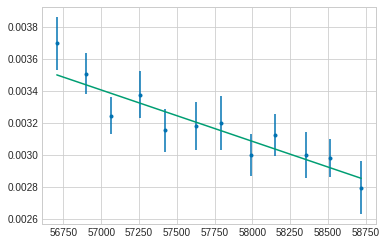

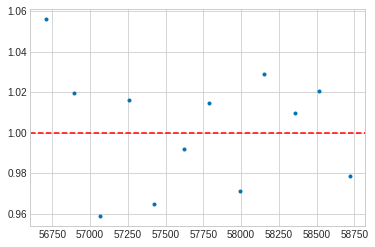

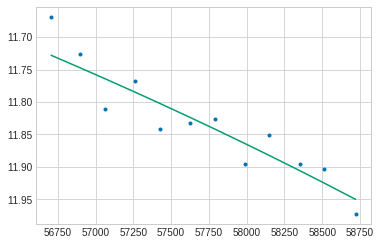

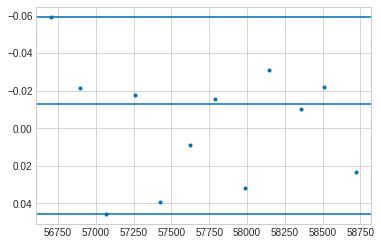

In [63]:
# 1. linear fit remove. 

index = 6233   #6431
wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
            +str(index)+'_cavg.csv', 
             names=['mjd','mag','emag','flt','class'],
             skiprows=1)


w2av = wavg[wavg['flt'] == 'W2']
w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
ew2f = w2av.emag * w2f / 1.0857

plt.figure()
plt.errorbar(w2av.mjd,w2f,ew2f,fmt='.')
def func(x,a,b):
    return a*x + b

resw2, cov = curve_fit(func,w2av.mjd,w2f, sigma=ew2f
                      ,absolute_sigma = True)

yfit= np.polyval(resw2,w2av.mjd)
plt.plot(w2av.mjd,yfit,label='fit')
# plt.yscale('log')
plt.figure()
plt.plot(w2av.mjd, w2f/yfit,'.')
plt.axhline(1,color='r',linestyle='--')

plt.figure()
plt.plot(w2av.mjd,w2av.mag,'.')
fitmag = -2.5*np.log10(yfit/171.85)
plt.plot(w2av.mjd,fitmag)
plt.gca().invert_yaxis()

plt.figure()
nmag = w2av.mag - fitmag
plt.plot(w2av.mjd,nmag,'.')
plt.axhline(np.min(nmag))
plt.axhline(np.max(nmag))
plt.axhline(np.median(nmag))
plt.gca().invert_yaxis()

print('original : {:.2f}% of DeltaW2'.format((np.median(w2av.mag)-np.min(w2av.mag))/(np.max(w2av.mag)-np.min(w2av.mag))*100))
print('norm_ median-min : {:.2f}% of DeltaW2'.format((np.median(nmag)-np.min(nmag))/(np.max(nmag)-np.min(nmag))*100))
print('norm_ max-median : {:.2f}% of DeltaW2'.format((np.max(nmag)-np.median(nmag))/(np.max(nmag)-np.min(nmag))*100))

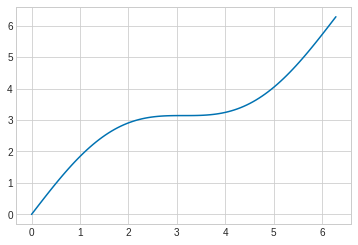

In [36]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)+x
plt.plot(x,y)

Best period: 4000.00 days / power : 0.499


No handles with labels found to put in legend.


modified baluev FAP is 4.80e-02
baluev FAP is 9.61e-01
bootstrap FAP is 0.69980
amplitude : 0.0019Jy.
real amp : 0.0022Jy.
amplitude : 0.0019Jy.


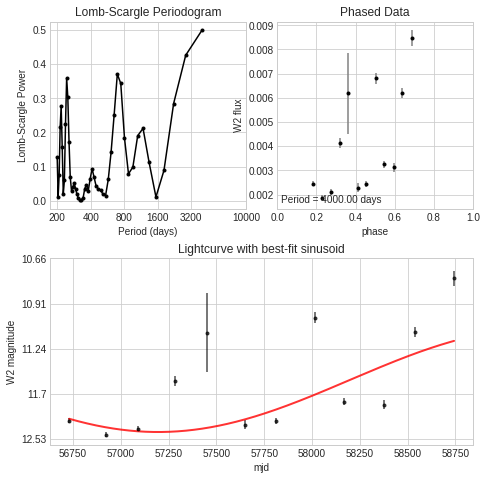

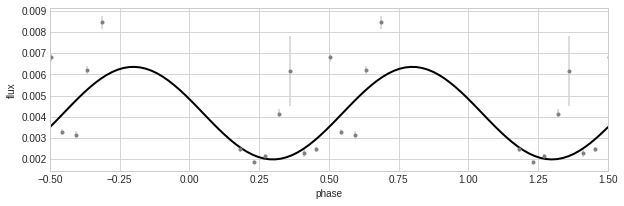

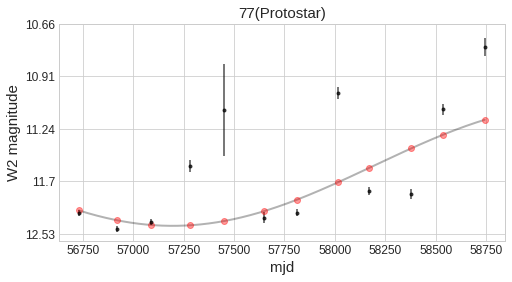

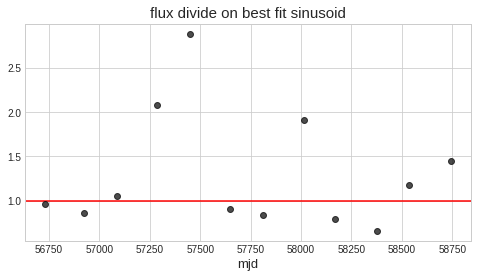

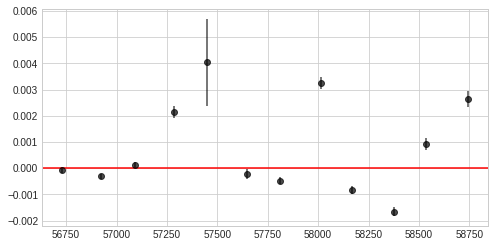

In [162]:
# def LS_w2_flux(index, avg = 'avg2', min_p = 200, max_p = 10000):
# def LS_w2_flux(index, avg = 'cavg2', min_p = 200, max_p = 10000):
index = 77
# # avg = 'cavg2_6307'
avg = 'cavg2'
min_p = 200
max_p = 4000
# call the class of the indexed yso


# LS_w2_flux(5501, min_p = 200, max_p=4000)



a = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/ysos_c.dat',
                sep="\s+", header=None,
                names=["index", "ra", "dec", "class", "cat"])
ycl = a[a["index"] == index]['class'].array

if ycl[0] == "P":
    ycl = 'Protostar'
if ycl[0] == "D":
    ycl = 'Disk'
if ycl[0] == "E":
    ycl = 'Evolved'
if ycl[0] == "F":
    ycl = 'Flat'
if ycl[0] == "FP":
    ycl = 'Faint Candidate Protostar'
if ycl[0] == "RP":
    ycl = 'Red Candidate Protostar'


if avg == 'avg2' :
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/data_wise/YSOwise_lc_' + str(index) + '_avg2.dat',
                       sep="\s+", header=None, skiprows=1,
                       names=['mjd', 'mag', 'emag', 'flt', 'dist', 'ra', 'dec'])

elif avg == 'avg':
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/data_wise/YSOwise_lc_' + str(index) + '_avg.dat',
                       sep="\s+", header=None, skiprows=1,
                       names=['mjd', 'mag', 'emag', 'flt', 'dist', 'ra', 'dec'])
### choose avg or all epochs

elif avg == 'dcut':
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/data_wise/YSOwise_lc_' + str(index) + '_dcut.dat',
                       sep="\s+", header=None, skiprows=1,
                       names=['mjd', 'mag', 'emag', 'flt', 'flag', 'dist', 'ra', 'dec'])

elif avg == 'cavg2':
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
            +str(index)+'_cavg.csv', 
             names=['mjd','mag','emag','flt','class'],
             skiprows=1)

elif avg == 'cavg2_alld':
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
            +str(index)+'_alld.csv', 
             names=['mjd','mag','emag','flt','class'],
             skiprows=1)


plt.style.use('seaborn-whitegrid')
# w1av = wavg[(wavg['mjd'] > 56000) &
#             (wavg['flt'] == 'W1') &
#             (np.isnan(wavg['mag']) == False) &
#             (np.isnan(wavg['emag']) == False)]

if avg == 'cavg2' :
    w2av = wavg[wavg['flt'] == 'W2']

elif avg == 'cavg2_alld' :
    w2av = wavg[wavg['flt'] == 'W2']

## remove outlier points ##
if avg == 'cavg2_6307':
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
            +str(index)+'_cavg.csv', 
             names=['mjd','mag','emag','flt','class'],
             skiprows=1)
    w2av_org = wavg[(wavg['flt'] == 'W1')]
    w2av = wavg[(wavg['flt'] == 'W1') &
               (wavg['mag'] > 6.2)]

elif avg == 'cavg2_6307_alld':    
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
            +str(index)+'_alld.csv', 
             names=['mjd','mag','emag','flt','class'],
             skiprows=1)
    w2av_org = wavg[(wavg['flt'] == 'W1')]
    w2av = wavg[(wavg['flt'] == 'W1') &
               (wavg['mag'] > 6.2)]
else:

    w2av = wavg[(wavg['mjd'] > 56000) &
                (wavg['flt'] == 'W2') &
                (np.isnan(wavg['mag']) == False) &
                (np.isnan(wavg['emag']) == False)]


# #### W1 ###
# w2f_org = 309.54 * 10 ** (-w2av_org.mag / 2.5)  # flux
#         #     fw1 = w1f #magnitude

# ew2f_org = w2av_org.emag * w2f_org / 1.057  # flux

# w2f = 309.54 * 10 ** (-w2av.mag / 2.5)  # flux
# ew2f = w2av.emag * w2f / 1.057  # flux

###########

# W2##
#     w2f_org = 171.85 * 10 ** (-w2av_org.mag / 2.5)  # flux 10%-90%
#     ew2f_org = w2av_org.emag * w2f_org / 1.0857

# convert to flux
w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
ew2f = w2av.emag * w2f / 1.0857

######


# fig, ax = plt.subplots()
# ax.errorbar(w2av.mjd, w2f, yerr=ew2f, fmt='.')
# ax.set_xlabel('mjd')
# ax.set_ylabel('W2 flux')
# ax.invert_yaxis()

# lsav = LombScargle(w2av.mjd,w2av.mag,w2av.emag) #mag lombscargle
lsav = LombScargle(w2av.mjd, w2f, ew2f)  # flux lombscargle

frequency, power = lsav.autopower(  # nyquist_factor=5,
    maximum_frequency=1/min_p, #40 days  # 0.004,#minimum period > 250days
    minimum_frequency=1/max_p)  # 0.0001) #0.2 #maximum period 10000days

# frequency = np.arange(1/max_p,1/min_p,1/50000)
# print(frequency)
# power = lsav.power(method='auto', frequency=frequency)

period_days = 1. / frequency
period_hours = period_days * 24

best_period = period_days[np.argmax(power)]
phase = (w2av.mjd / best_period) % 1

print("Best period: {0:.2f} days / power : {1:.3f}".format(best_period, np.max(power)))

#         fig, ax = plt.subplots(1, 2, figsize=(15, 6))


fig = plt.figure(figsize=(7,7))
grid = GridSpec(6,6,
                left=0.1, bottom=0.1, right=0.94, top=0.94, wspace=0.7, hspace=1.7)
ax1 = fig.add_subplot(grid[0:3, 0:3])
ax2 = fig.add_subplot(grid[0:3, 3:6])
ax3 = fig.add_subplot(grid[3:6, 0:6])


# PSD has a _LOT_ of elements. Rasterize it so it can be displayed as PDF
ax1.plot(period_days, power, '.k', rasterized=True)
ax1.plot(period_days, power, 'k', rasterized=True)
#         ax[0].xaxis.set_major_formatter(ScalarFormatter())
ax1.set(  # xlim=(0, 2.5), ylim=(0, 0.8)
    xlabel='Period (days)',
    ylabel='Lomb-Scargle Power',
    title='Lomb-Scargle Periodogram',
    xscale='log')
#         ax[0].set_xscale('log')
ax1.set_xticks([200,400,800,1600,3200,10000])
ax1.set_xticklabels([200,400,800,1600,3200,10000])
#         ax1.set_xticks([50,100,200,400,800,1600,3200,10000])
#         ax1.set_xticklabels([50, 100,200,400,800,1600,3200,10000])
#         ax[0].ticklabel_format(style='plain')

fap = lsav.false_alarm_probability(power)
boot_fap = lsav.false_alarm_probability(power, method='bootstrap',
                                        method_kwds={'n_bootstraps': 5000})

# fap level plot
# fapl = lsav.false_alarm_level(0.01, method='baluev')
# fapb = lsav.false_alarm_level(0.01, method='bootstrap')
fapl2 = lsav.false_alarm_level(0.001, method='baluev')
fapb2 = lsav.false_alarm_level(0.001, method='bootstrap',
                               method_kwds={'n_bootstraps': 1000})
print("modified baluev FAP is {:5.2e}".format(fap[np.argmax(power)]*200/best_period))
print("baluev FAP is {:5.2e}".format((fap[np.argmax(power)])))
print("bootstrap FAP is {:.5f}".format(boot_fap[np.argmax(power)]))

phase_model = np.linspace(-0.5, 1.5, 100)
best_frequency = frequency[np.argmax(power)]
flux_model = lsav.model(phase_model / best_frequency, best_frequency)



#         ax1.axhline(fapl2, label='baleuv 0.1% FAP', c='r')
# ax[0].axhline(fapb, label='bootstrap 1% FAP', c='b')
# ax[0].axhline(fapl2, label='baleuv 0.1% FAP', c='r',linestyle='--')
#     ax[0].axhline(fapb2, label='bootstrap 0.1% FAP', c='b',linestyle='--')
ax1.legend()

ax2.errorbar(phase, w2f, ew2f,
               fmt='.k', ecolor='gray', capsize=0)
ax2.set(xlabel='phase',
          ylabel='W2 flux',
          title='Phased Data')
# ax[1].invert_yaxis()
ax2.text(0.02, 0.03, "Period = {0:.2f} days".format(best_period),
           transform=ax2.transAxes)
ax2.set_xlim(0, 1)
# inset = fig.add_axes([0.25, 0.6, 0.2, 0.25])
# inset.plot(period_hours, power, '-k', rasterized=True)
# inset.xaxis.set_major_locator(plt.MultipleLocator(1))
# inset.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# inset.set(xlim=(1, 5),
#           xlabel='Period (hours)',0
#           ylabel='power')

arw2m = np.squeeze(np.array([w2av.mjd]))
smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
flux_jmod = lsav.model(smjd, best_frequency)
flux_jdot = lsav.model(w2av.mjd, best_frequency)

ax3.plot(smjd, flux_jmod, color='r', lw=2,
         alpha=0.8
         )
ax3.errorbar(w2av.mjd, w2f, yerr=ew2f, fmt='ok',
             alpha=0.7,
             ms=3)
#         ax3.plot(w2av.mjd, flux_jdot, 'ro',
#                  alpha=0.4
#                  )

ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
ylab = np.round(-2.5*np.log10(ytick/171.85),2)
ax3.set_yticks(ytick)
ax3.set_yticklabels(ylab)

ax3.set_xlabel('mjd') #,size=15)
ax3.set_ylabel('W2 magnitude') #,size=15)
#         ax3.set_xticks(size=12)
#         ax3.set_yticks(size=12)
ax3.set_title('Lightcurve with best-fit sinusoid')
#         ax3.set_title(str(index)+'({})'.format(ycl), size=15) #'lightcurve with best fit sinusoid :   '
#     plt.yscale('log')
print('amplitude : {:.4f}Jy.'.format((max(flux_jmod) - min(flux_jmod)) * 0.5))
print('real amp : {:.4f}Jy.'.format((max(flux_model) - min(flux_model)) *0.5))

# compare with L-S model

fig, ax = plt.subplots(figsize=(10, 3))


for offset in [-1, 0, 1]:
    ax.errorbar(phase + offset, w2f, ew2f, fmt='.',
                color='gray', ecolor='lightgray', capsize=0)

ax.plot(phase_model, flux_model, '-k', lw=2)
ax.set(xlim=(-0.5, 1.5),
       xlabel='phase',
       ylabel='flux')
# ax.invert_yaxis()

plt.figure(figsize=(8, 4))
arw2m = np.squeeze(np.array([w2av.mjd]))
smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
flux_jmod = lsav.model(smjd, best_frequency)
flux_jdot = lsav.model(w2av.mjd, best_frequency)
plt.plot(smjd, flux_jmod, color='k', lw=2,
         alpha=0.3
         )
plt.errorbar(w2av.mjd, w2f, yerr=ew2f, fmt='ok',
             alpha=0.7,
             ms=3)
plt.plot(w2av.mjd, flux_jdot, 'ro',
         alpha=0.4
         )

ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
ylab = np.round(-2.5*np.log10(ytick/171.85),2)
plt.yticks(ticks=ytick, labels=ylab)

plt.xlabel('mjd',size=15)
plt.ylabel('W2 magnitude',size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(str(index)+'({})'.format(ycl), size=15) #'lightcurve with best fit sinusoid :   '
#     plt.yscale('log')
print('amplitude : {:.4f}Jy.'.format((max(flux_jmod) - min(flux_jmod)) * 0.5))

#     global nw2f  # to use this later
#     global jd
# nw2f = 2.5*np.log10(w2f/flux_jdot)
nw2f = w2f/flux_jdot
mw2f = w2f-flux_jdot
# nw2f = w2f - flux_jdot
#     plt.figure(figsize=(8,4))
#     plt.errorbar(w2av.mjd, nw2f, yerr = ew2f, fmt='k.',
#                 alpha = 0.7
#                 )
#     plt.axhline(0, color='r')
#     plt.xlabel('mjd')
#     plt.ylabel('W2 flux(Jy)')
#     plt.title('amplitude normalized lightcurve', size=15)
#     # plt.ylim(-0.0015, 0.0015)

#     plt.show()

jd = w2av.mjd

# std by error
sig_nw2f = np.mean(ew2f)
plt.figure(figsize=(8, 4))
plt.errorbar(jd, nw2f, yerr=ew2f, fmt='ko',
             alpha=0.7
             )
plt.axhline(1, color='r')

sig_plot = np.array([sig_nw2f, -sig_nw2f])

# for i in range(2):
#     plt.axhline(sig_plot[i], color='k', linestyle=':')

# for i in range(2):
#     plt.axhline(3 * sig_plot[i], color='k', linestyle='--')

# plt.axhline(10 * sig_plot[0], color='b', linestyle='-.', label='10$\sigma$')
# plt.axhline(10 * sig_plot[1], color='b', linestyle='--')
# plt.legend()

plt.xlabel('mjd', size=13)
# plt.ylabel('W2 flux offset(Jy)', size=13)
plt.title('flux divide on best fit sinusoid', size=15)

# # std by flux
# sig2_nw2f = np.std(nw2f)
plt.figure(figsize=(8, 4))
plt.errorbar(jd, mw2f, yerr=ew2f, fmt='ko',
             alpha=0.7
             )
plt.axhline(0, color='r')

# sig_plot = np.array([sig2_nw2f, -sig2_nw2f])

# for i in range(2):
#     plt.axhline(sig_plot[i], color='k', linestyle=':')

# for i in range(2):
#     plt.axhline(3 * sig_plot[i], color='k', linestyle='--')

# #     plt.legend()

# plt.xlabel('mjd', size=13)
# plt.ylabel('W2 flux offset(Jy)', size=13)
# plt.title('difference on best fit sinusoid', size=15)




# 증가 감소가 보이기 위한 사인함수의 최대의 주기는???
#0.0377, 0.00923

index : 77
original median-min : 64.43% of DeltaW2
original max-median : 35.57% of DeltaW2
norm_ median-min : 59.59% of DeltaW2
norm_ max-median : 40.41% of DeltaW2
-----


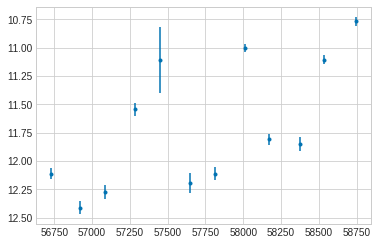

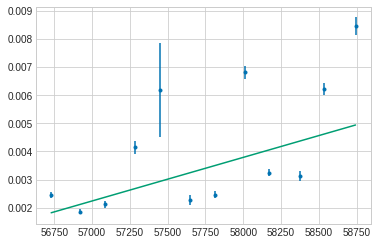

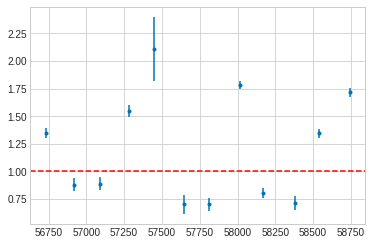

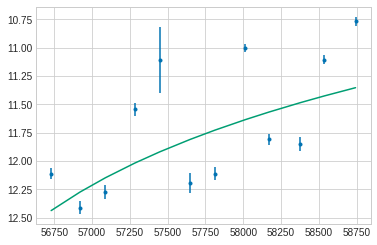

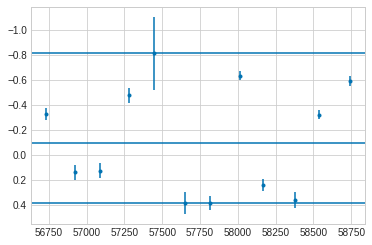

In [160]:
mw2f, ew2f = linfit_rem_bd(77)

index : 77
original median-min : 64.43% of DeltaW2
original max-median : 35.57% of DeltaW2
DeltaW2 : 1.61mag
norm_ median-min : 70.59% of DeltaW2
norm_ max-median : 29.41% of DeltaW2
-----


(12    0.968364
 13    0.856779
 14    1.056861
 15    2.078205
 16    2.884595
 17    0.908062
 18    0.838685
 19    1.916741
 20    0.797139
 21    0.653801
 22    1.174135
 23    1.453430
 Name: mag, dtype: float64,
 12   -0.000080
 13   -0.000311
 14    0.000114
 15    0.002148
 16    0.004037
 17   -0.000230
 18   -0.000472
 19    0.003255
 20   -0.000827
 21   -0.001658
 22    0.000920
 23    0.002642
 Name: mag, dtype: float64,
 1.6115986238661932,
 0.7059087979950073,
 0.2940912020049928)

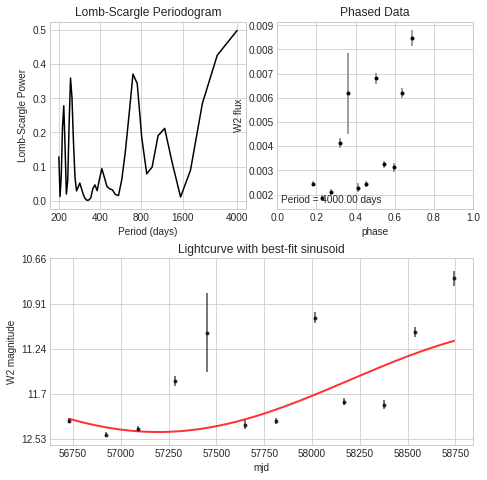

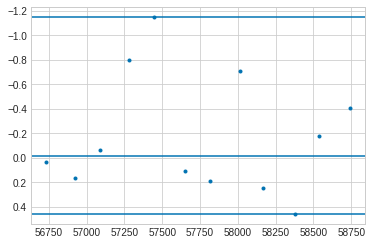

In [266]:
# jd, mw2f, yerr=ew2f
def LS_norm(index):
    
    
    
    if index < 10000:
        wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
            +str(index)+'_cavg.csv', 
             names=['mjd','mag','emag','flt','class'],
             skiprows=1)
    
    else:
        wavg = pa.read_csv('/home/wooseok/WISE_data/Taurus/avgdata/'+str(index)+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
        
    
    w2av = wavg[wavg['flt'] == 'W2']
    jd = w2av.mjd
    w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
    ew2f = w2av.emag * w2f / 1.0857
    min_p = 200
    max_p = 4000
    
    
    lsav = LombScargle(jd, w2f, ew2f)  # flux lombscargle

    frequency, power = lsav.autopower(  # nyquist_factor=5,
        maximum_frequency=1/min_p, #40 days  # 0.004,#minimum period > 250days
        minimum_frequency=1/max_p)
    period_days = 1. / frequency
    period_hours = period_days * 24

    best_period = period_days[np.argmax(power)]
    phase = (w2av.mjd / best_period) % 1

#     print("Best period: {0:.2f} days / power : {1:.3f}".format(best_period, np.max(power)))

    fig = plt.figure(figsize=(7,7))
    grid = GridSpec(6,6,
                    left=0.1, bottom=0.1, right=0.94, top=0.94, wspace=0.7, hspace=1.7)
    ax1 = fig.add_subplot(grid[0:3, 0:3])
    ax2 = fig.add_subplot(grid[0:3, 3:6])
    ax3 = fig.add_subplot(grid[3:6, 0:6])


    # PSD has a _LOT_ of elements. Rasterize it so it can be displayed as PDF
#     ax1.plot(period_days, power, '.k', rasterized=True)
    ax1.plot(period_days, power, 'k', rasterized=True)
    #         ax[0].xaxis.set_major_formatter(ScalarFormatter())
    ax1.set(  # xlim=(0, 2.5), ylim=(0, 0.8)
        xlabel='Period (days)',
        ylabel='Lomb-Scargle Power',
        title='Lomb-Scargle Periodogram',
        xscale='log')
    #         ax[0].set_xscale('log')
    ax1.set_xticks([200,400,800,1600,4000])
    ax1.set_xticklabels([200,400,800,1600,4000])
    fap = lsav.false_alarm_probability(power)
#     print("mod baluev FAP is {:5.2e}".format((fap[np.argmax(power)]*200/best_period)))
    phase_model = np.linspace(-0.5, 1.5, 100)
    best_frequency = frequency[np.argmax(power)]
    flux_model = lsav.model(phase_model / best_frequency, best_frequency)
    ax2.errorbar(phase, w2f, ew2f,
                   fmt='.k', ecolor='gray', capsize=0)
    ax2.set(xlabel='phase',
              ylabel='W2 flux',
              title='Phased Data')
    # ax[1].invert_yaxis()
    ax2.text(0.02, 0.03, "Period = {0:.2f} days".format(best_period),
               transform=ax2.transAxes)
    ax2.set_xlim(0, 1)
    arw2m = np.squeeze(np.array([jd]))
    smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
    flux_jmod = lsav.model(smjd, best_frequency)
    flux_jdot = lsav.model(jd, best_frequency)

    ax3.plot(smjd, flux_jmod, color='r', lw=2,
             alpha=0.8
             )
    ax3.errorbar(jd, w2f, yerr=ew2f, fmt='ok',
                 alpha=0.7,
                 ms=3)
    
    
    ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
    ylab = np.round(-2.5*np.log10(ytick/171.85),2)
    plt.yticks(ticks=ytick, labels=ylab)
    
    ax3.set_xlabel('mjd') #,size=15)
    ax3.set_ylabel('W2 magnitude') #,size=15)
    ax3.set_title('Lightcurve with best-fit sinusoid')
    
    
#     plt.close()
   
    fitmag = -2.5*np.log10(flux_jdot/171.85)
    
    plt.figure()
    nmag = w2av.mag - fitmag
    plt.plot(w2av.mjd,nmag,'.')
    plt.axhline(np.min(nmag))
    plt.axhline(np.max(nmag))
    plt.axhline(np.median(nmag))
    plt.gca().invert_yaxis()

    print('index :', index)
    print('original median-min : {:.2f}% of DeltaW2'.format((np.median(w2av.mag)-np.min(w2av.mag))/(np.max(w2av.mag)-np.min(w2av.mag))*100))
    print('original max-median : {:.2f}% of DeltaW2'.format((np.max(w2av.mag)-np.median(w2av.mag))/(np.max(w2av.mag)-np.min(w2av.mag))*100))
    print('DeltaW2 : {:.2f}mag'.format(np.max(nmag)-np.min(nmag)))

    print('norm_ median-min : {:.2f}% of DeltaW2'.format((np.median(nmag)-np.min(nmag))/(np.max(nmag)-np.min(nmag))*100))
    print('norm_ max-median : {:.2f}% of DeltaW2'.format((np.max(nmag)-np.median(nmag))/(np.max(nmag)-np.min(nmag))*100))
    print('-----')
    
#     plt.close()
#     plt.close()
    return w2f/flux_jdot, w2f-flux_jdot, np.max(nmag)-np.min(nmag),(np.median(nmag)-np.min(nmag))/(np.max(nmag)-np.min(nmag)),(np.max(nmag)-np.median(nmag))/(np.max(nmag)-np.min(nmag))
    
dflux, mflux, delta, bur_frac, dim_frac = LS_norm(77)
dflux,mflux,delta,bur_frac,dim_frac
# LS_norm(6380)

# plt.figure()
# plt.plot(jd,mflux,'.')

In [257]:
cur = [14,    31,    79,   133,   159,   198,   319,   324,   352,
         396,   424,   438,   496,   520,   529,   561,   575,   590,
         592,   601,   624,   663,   664,   674,   681,   709,   737,
         759,   788,   830,   852,   855,   878,   886,   980,  1000,
        1019,  1032,  1074,  1136,  1195,  1207,  1250,  1268,  1294,
        1297,  1300,  1330,  1340,  1407,  1414,  1415,  1438,  1447,
        1457,  1504,  1514,  1556,  1585,  1599,  1604,  1613,  1661,
        1688,  2156,  2343,  2361,  2382,  2422,  2471,  2547,  2748,
        2753,  2759,  2841,  2858,  2896,  2915,  3101,  3175,  3204,
        3221,  3262,  3263,  3269,  3284,  3303,  3336,  3359,  3362,
        3381,  3434,  3445,  3459,  3471,  3520,  3576,  3597,  3659,
        3745,  3794,  3835,  3846,  3944,  3960,  4018,  4020,  4085,
        4105,  4106,  4125,  4129,  4150,  4178,  4186,  4391,  4431,
        4467,  4488,  4492,  4539,  4598,  4605,  4655,  4663,  4684,
        4754,  4780,  4781,  4835,  4892,  4903,  4907,  4921,  4922,
        4924,  4930,  4938,  4946,  4953,  4955,  4957,  4991,  5060,
        5077,  5080,  5121,  5132,  5215,  5234,  5236,  5266,  5269,
        5314,  5330,  5333,  5335,  5348,  5480,  5554,  5626,  5648,
        5653,  5710,  5738,  5848,  5864,  5868,  5871,  5882,  5885,
        5886,  5888,  5897,  5919,  5927,  5933,  5961,  5963,  5966,
        5986,  6032,  6033,  6034,  6082,  6088,  6104,  6157,  6273,
        6285,  6318,  6383,  6423,  6424,  6448,  6455,  6457, 10027,
       10140, 10148, 10217, 10263, 10301, 10348, 10414, 10452]

periodic = [422,   669,  1332,  1896,  2428,  2728,  2866,  2910,  3248,
        3325,  3506,  3511,  3556,  3561,  3565,  3586,  3595,  3614,
        3622,  3686,  3714,  3718,  3778,  3780,  3866,  3895,  3911,
        3943,  4029,  4038,  4064,  4136,  4263,  4284,  4290,  4297,
        4344,  4350,  4420,  4434,  4436,  4438,  4461,  4498,  4499,
        4505,  4512,  4516,  4530,  4553,  4565,  4568,  4578,  4582,
        4631,  4632,  4676,  4700,  4740,  4746,  4751,  4789,  4790,
        4797,  4805,  4820,  5120,  5173,  5386,  5466,  5484,  5506,
        5525,  5533,  5538,  5835,  6180,  6313, 10184]

In [ ]:
wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
            +str(index)+'_cavg.csv', 
             names=['mjd','mag','emag','flt','class'],
             skiprows=1)

index : 1268
original median-min : 43.58% of DeltaW2
original max-median : 56.42% of DeltaW2
DeltaW2 : 0.85mag
norm_ median-min : 80.77% of DeltaW2
norm_ max-median : 19.23% of DeltaW2
-----
index : 4754
original median-min : 34.79% of DeltaW2
original max-median : 65.21% of DeltaW2
DeltaW2 : 0.57mag
norm_ median-min : 81.63% of DeltaW2
norm_ max-median : 18.37% of DeltaW2
-----
index : 4953
original median-min : 25.94% of DeltaW2
original max-median : 74.06% of DeltaW2
DeltaW2 : 0.64mag
norm_ median-min : 91.23% of DeltaW2
norm_ max-median : 8.77% of DeltaW2
-----
index : 4991
original median-min : 65.39% of DeltaW2
original max-median : 34.61% of DeltaW2
DeltaW2 : 0.86mag
norm_ median-min : 85.02% of DeltaW2
norm_ max-median : 14.98% of DeltaW2
-----
index : 10217
original median-min : 62.24% of DeltaW2
original max-median : 37.76% of DeltaW2
DeltaW2 : 1.55mag
norm_ median-min : 87.44% of DeltaW2
norm_ max-median : 12.56% of DeltaW2
-----


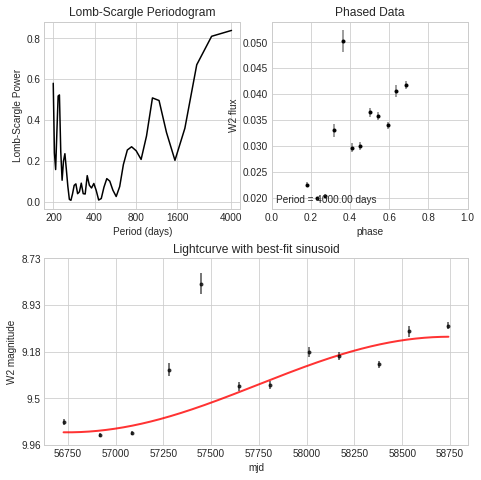

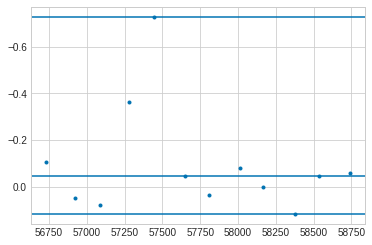

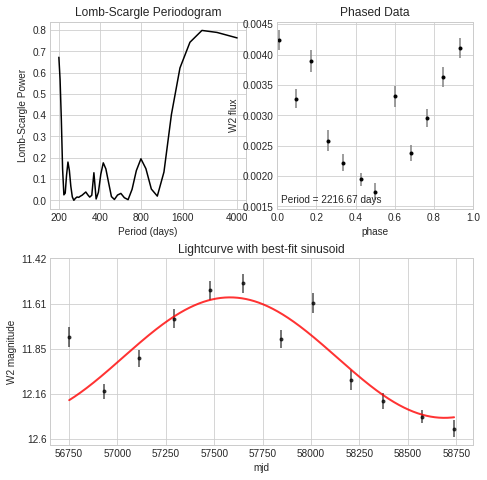

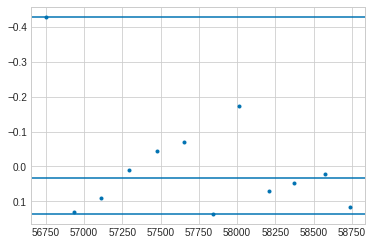

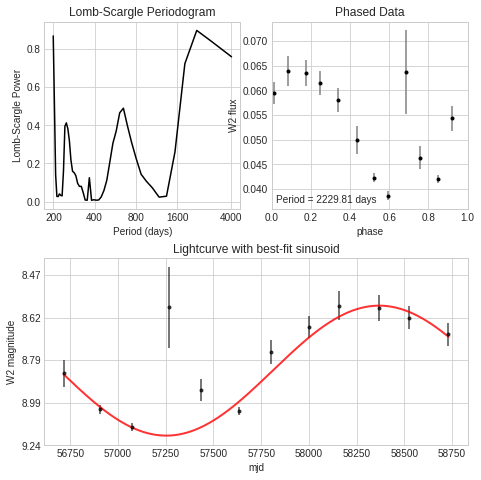

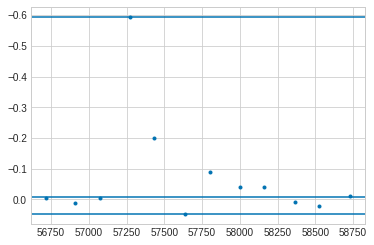

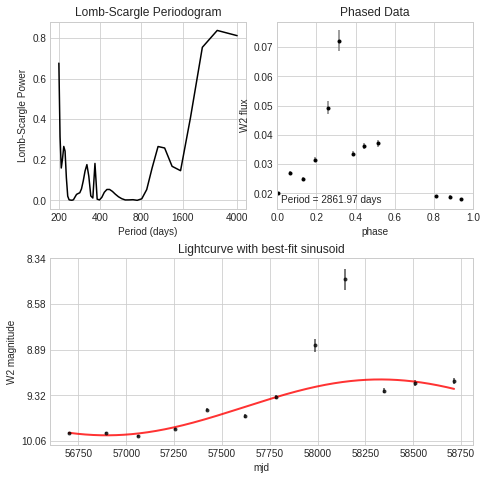

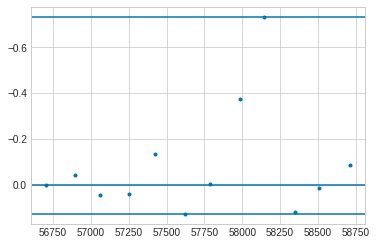

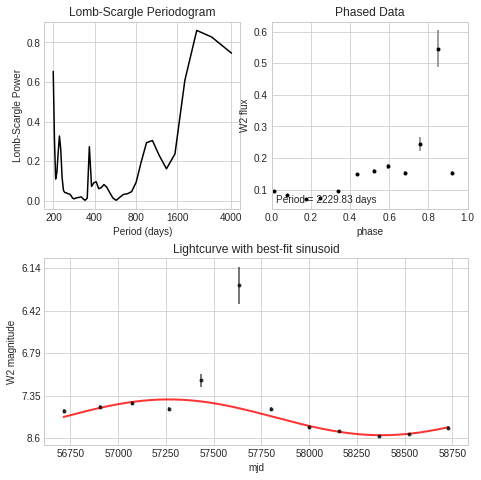

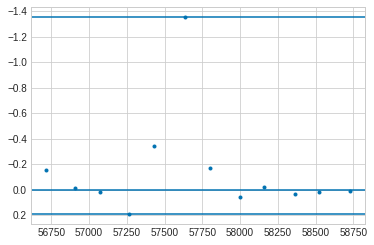

In [267]:
for i in [1268, 4754, 4953, 4991, 10217]:
    LS_norm(i)

index : 4420
original median-min : 56.49% of DeltaW2
original max-median : 43.51% of DeltaW2
DeltaW2 : 0.31mag
norm_ median-min : 85.38% of DeltaW2
norm_ max-median : 14.62% of DeltaW2
-----
index : 10184
original median-min : 62.99% of DeltaW2
original max-median : 37.01% of DeltaW2
DeltaW2 : 0.15mag
norm_ median-min : 17.50% of DeltaW2
norm_ max-median : 82.50% of DeltaW2
-----


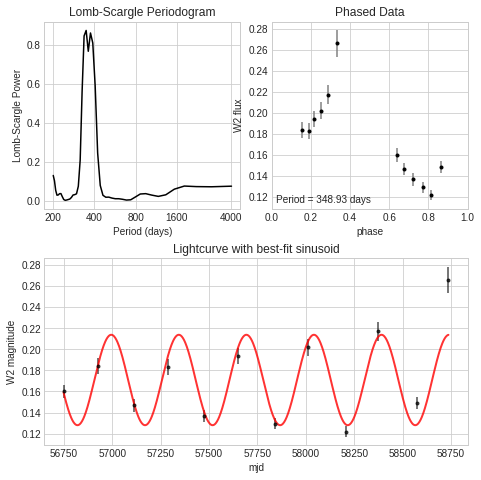

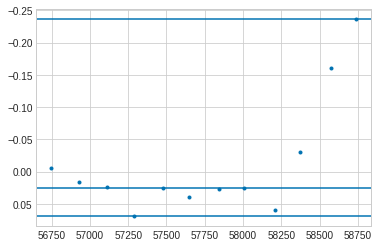

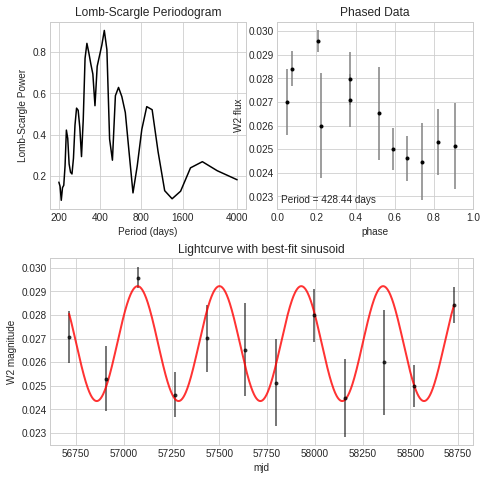

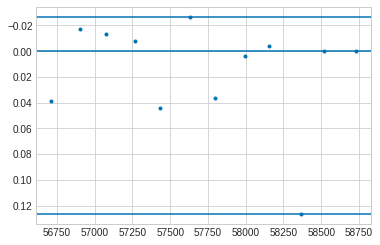

In [265]:
for i in [4420, 10184]:
    dflux, mflux, delta, bur_frac, dim_frac = LS_norm(i)
    if (delta > 0.5) and (bur_frac > 0.8 or dim_frac > 0.8):
        print(i)
        
        #4420, 10184

In [251]:
for i in cur:
    dflux, mflux, delta, bur_frac, dim_frac = LS_norm(i)
    if (delta > 0.5) and (bur_frac > 0.8 or dim_frac > 0.8):
        print(i)
        
        #1268, 4754, 4953, 4991, 10217

1268
4754
4953
4991
10217


Best period: 2851.51 days / power : 0.855
mod baluev FAP is 2.09e-03
index : 5653
original median-min : 47.93% of DeltaW2
original max-median : 52.07% of DeltaW2
DeltaW2 : 0.15mag
norm_ median-min : 84.78% of DeltaW2
norm_ max-median : 15.22% of DeltaW2
-----


(12    1.014296
 13    0.974619
 14    0.988732
 15    0.989441
 16    1.118598
 17    0.976992
 18    1.000084
 19    1.073367
 20    0.970547
 21    0.978085
 22    0.994057
 23    1.030904
 Name: mag, dtype: float64,
 12    0.004579
 13   -0.008383
 14   -0.003790
 15   -0.003563
 16    0.039518
 17   -0.007477
 18    0.000026
 19    0.022035
 20   -0.008451
 21   -0.006098
 22   -0.001618
 23    0.008405
 Name: mag, dtype: float64)

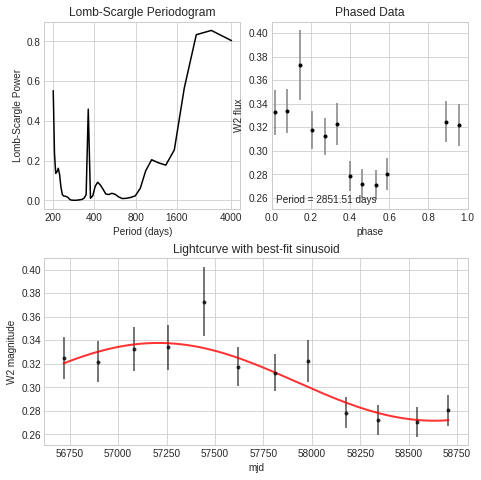

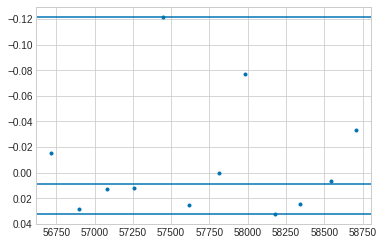

In [241]:
# cur, dimbur 6423 6383 6088 5868 5864 5848 5653 5314 4991
LS_norm(5653)
# criteria _ >80%, 0.5mag

In [228]:
for i in cur:
    LS_norm(i)

Best period: 2862.59 days / power : 0.832
mod baluev FAP is 3.45e-03
index : 14
original median-min : 49.30% of DeltaW2
original max-median : 50.70% of DeltaW2
DeltaW2 : 0.28mag
norm_ median-min : 70.12% of DeltaW2
norm_ max-median : 29.88% of DeltaW2
-----
Best period: 4000.00 days / power : 0.775
mod baluev FAP is 7.99e-03
index : 31
original median-min : 43.21% of DeltaW2
original max-median : 56.79% of DeltaW2
DeltaW2 : 0.23mag
norm_ median-min : 79.15% of DeltaW2
norm_ max-median : 20.85% of DeltaW2
-----
Best period: 2862.61 days / power : 0.881
mod baluev FAP is 9.68e-04
index : 79
original median-min : 35.26% of DeltaW2
original max-median : 64.74% of DeltaW2
DeltaW2 : 0.17mag
norm_ median-min : 58.82% of DeltaW2
norm_ max-median : 41.18% of DeltaW2
-----
Best period: 2862.40 days / power : 0.854
mod baluev FAP is 2.17e-03
index : 133
original median-min : 32.64% of DeltaW2
original max-median : 67.36% of DeltaW2
DeltaW2 : 0.16mag
norm_ median-min : 43.26% of DeltaW2
norm_ max-

FileNotFoundError: [Errno 2] File /home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/10027_cavg.csv does not exist: '/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/10027_cavg.csv'

Best period: 686.07 days / power : 0.550
mod baluev FAP is 2.61e-01


Text(0.5, 1.0, 'Lightcurve with best-fit sinusoid')

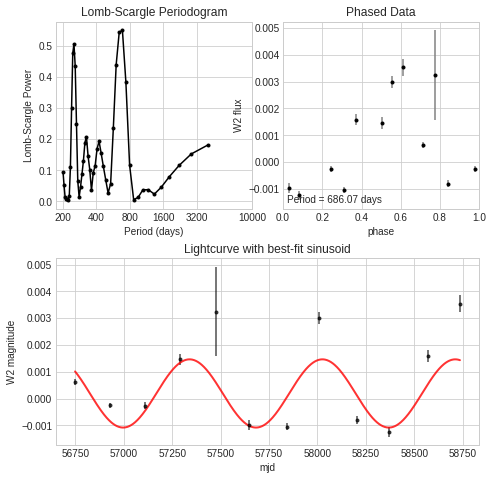

In [161]:
# jd, mw2f, yerr=ew2f
min_p = 200
max_p = 4000
lsav = LombScargle(jd, mw2f, ew2f)  # flux lombscargle

frequency, power = lsav.autopower(  # nyquist_factor=5,
    maximum_frequency=1/min_p, #40 days  # 0.004,#minimum period > 250days
    minimum_frequency=1/max_p)
period_days = 1. / frequency
period_hours = period_days * 24

best_period = period_days[np.argmax(power)]
phase = (w2av.mjd / best_period) % 1

print("Best period: {0:.2f} days / power : {1:.3f}".format(best_period, np.max(power)))

#         fig, ax = plt.subplots(1, 2, figsize=(15, 6))


fig = plt.figure(figsize=(7,7))
grid = GridSpec(6,6,
                left=0.1, bottom=0.1, right=0.94, top=0.94, wspace=0.7, hspace=1.7)
ax1 = fig.add_subplot(grid[0:3, 0:3])
ax2 = fig.add_subplot(grid[0:3, 3:6])
ax3 = fig.add_subplot(grid[3:6, 0:6])


# PSD has a _LOT_ of elements. Rasterize it so it can be displayed as PDF
ax1.plot(period_days, power, '.k', rasterized=True)
ax1.plot(period_days, power, 'k', rasterized=True)
#         ax[0].xaxis.set_major_formatter(ScalarFormatter())
ax1.set(  # xlim=(0, 2.5), ylim=(0, 0.8)
    xlabel='Period (days)',
    ylabel='Lomb-Scargle Power',
    title='Lomb-Scargle Periodogram',
    xscale='log')
#         ax[0].set_xscale('log')
ax1.set_xticks([200,400,800,1600,3200,10000])
ax1.set_xticklabels([200,400,800,1600,3200,10000])
fap = lsav.false_alarm_probability(power)
print("mod baluev FAP is {:5.2e}".format((fap[np.argmax(power)]*200/best_period)))
phase_model = np.linspace(-0.5, 1.5, 100)
best_frequency = frequency[np.argmax(power)]
flux_model = lsav.model(phase_model / best_frequency, best_frequency)
ax2.errorbar(phase, mw2f, ew2f,
               fmt='.k', ecolor='gray', capsize=0)
ax2.set(xlabel='phase',
          ylabel='W2 flux',
          title='Phased Data')
# ax[1].invert_yaxis()
ax2.text(0.02, 0.03, "Period = {0:.2f} days".format(best_period),
           transform=ax2.transAxes)
ax2.set_xlim(0, 1)
arw2m = np.squeeze(np.array([jd]))
smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
flux_jmod = lsav.model(smjd, best_frequency)
flux_jdot = lsav.model(jd, best_frequency)

ax3.plot(smjd, flux_jmod, color='r', lw=2,
         alpha=0.8
         )
ax3.errorbar(jd, mw2f, yerr=ew2f, fmt='ok',
             alpha=0.7,
             ms=3)
#         ax3.plot(w2av.mjd, flux_jdot, 'ro',
#                  alpha=0.4
#                  )

# ytick = np.linspace(min(mw2f)-0.1*min(mw2f),max(mw2f)+0.1*max(mw2f),5)
# ylab = np.round(-2.5*np.log10(ytick/171.85),2)
# ax3.set_yticks(ytick)
# ax3.set_yticklabels(ylab)

ax3.set_xlabel('mjd') #,size=15)
ax3.set_ylabel('W2 magnitude') #,size=15)
#         ax3.set_xticks(size=12)
#         ax3.set_yticks(size=12)
ax3.set_title('Lightcurve with best-fit sinusoid')


In [ ]:
# def LS_w2_flux(index, avg = 'avg2', min_p = 200, max_p = 10000):
def LS_w2_flux(index, avg = 'cavg2', min_p = 200, max_p = 10000):
    # index = 62
    # # avg = 'cavg2_6307'
    # avg = 'cavg2'
    # min_p = 600
    # max_p = 10000
    # call the class of the indexed yso
    a = pa.read_csv('/home/wooseok/WISE_data/WISE_scripts/ysos_c.dat',
                    sep="\s+", header=None,
                    names=["index", "ra", "dec", "class", "cat"])
    ycl = a[a["index"] == index]['class'].array

    if ycl[0] == "P":
        ycl = 'Protostar'
    if ycl[0] == "D":
        ycl = 'Disk'
    if ycl[0] == "E":
        ycl = 'Evolved'
    if ycl[0] == "F":
        ycl = 'Flat'
    if ycl[0] == "FP":
        ycl = 'Faint Candidate Protostar'
    if ycl[0] == "RP":
        ycl = 'Red Candidate Protostar'


    if avg == 'avg2' :
        wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/data_wise/YSOwise_lc_' + str(index) + '_avg2.dat',
                           sep="\s+", header=None, skiprows=1,
                           names=['mjd', 'mag', 'emag', 'flt', 'dist', 'ra', 'dec'])

    elif avg == 'avg':
        wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/data_wise/YSOwise_lc_' + str(index) + '_avg.dat',
                           sep="\s+", header=None, skiprows=1,
                           names=['mjd', 'mag', 'emag', 'flt', 'dist', 'ra', 'dec'])
    ### choose avg or all epochs

    elif avg == 'dcut':
        wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/data_wise/YSOwise_lc_' + str(index) + '_dcut.dat',
                           sep="\s+", header=None, skiprows=1,
                           names=['mjd', 'mag', 'emag', 'flt', 'flag', 'dist', 'ra', 'dec'])

    elif avg == 'cavg2':
        wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                +str(index)+'_cavg.csv', 
                 names=['mjd','mag','emag','flt','class'],
                 skiprows=1)

    elif avg == 'cavg2_alld':
        wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                +str(index)+'_alld.csv', 
                 names=['mjd','mag','emag','flt','class'],
                 skiprows=1)


    plt.style.use('seaborn-whitegrid')
    # w1av = wavg[(wavg['mjd'] > 56000) &
    #             (wavg['flt'] == 'W1') &
    #             (np.isnan(wavg['mag']) == False) &
    #             (np.isnan(wavg['emag']) == False)]

    if avg == 'cavg2' :
        w2av = wavg[wavg['flt'] == 'W2']

    elif avg == 'cavg2_alld' :
        w2av = wavg[wavg['flt'] == 'W2']

    ## remove outlier points ##
    if avg == 'cavg2_6307':
        wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                +str(index)+'_cavg.csv', 
                 names=['mjd','mag','emag','flt','class'],
                 skiprows=1)
        w2av_org = wavg[(wavg['flt'] == 'W1')]
        w2av = wavg[(wavg['flt'] == 'W1') &
                   (wavg['mag'] > 6.2)]

    elif avg == 'cavg2_6307_alld':    
        wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                +str(index)+'_alld.csv', 
                 names=['mjd','mag','emag','flt','class'],
                 skiprows=1)
        w2av_org = wavg[(wavg['flt'] == 'W1')]
        w2av = wavg[(wavg['flt'] == 'W1') &
                   (wavg['mag'] > 6.2)]
    else:

        w2av = wavg[(wavg['mjd'] > 56000) &
                    (wavg['flt'] == 'W2') &
                    (np.isnan(wavg['mag']) == False) &
                    (np.isnan(wavg['emag']) == False)]


    # #### W1 ###
    # w2f_org = 309.54 * 10 ** (-w2av_org.mag / 2.5)  # flux
    #         #     fw1 = w1f #magnitude

    # ew2f_org = w2av_org.emag * w2f_org / 1.057  # flux

    # w2f = 309.54 * 10 ** (-w2av.mag / 2.5)  # flux
    # ew2f = w2av.emag * w2f / 1.057  # flux

    ###########

    # W2##
#     w2f_org = 171.85 * 10 ** (-w2av_org.mag / 2.5)  # flux 10%-90%
#     ew2f_org = w2av_org.emag * w2f_org / 1.0857

    # convert to flux
    w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
    ew2f = w2av.emag * w2f / 1.0857

    ######


    # fig, ax = plt.subplots()
    # ax.errorbar(w2av.mjd, w2f, yerr=ew2f, fmt='.')
    # ax.set_xlabel('mjd')
    # ax.set_ylabel('W2 flux')
    # ax.invert_yaxis()

    # lsav = LombScargle(w2av.mjd,w2av.mag,w2av.emag) #mag lombscargle
    lsav = LombScargle(w2av.mjd, w2f, ew2f)  # flux lombscargle

    frequency, power = lsav.autopower(  # nyquist_factor=5,
        maximum_frequency=1/min_p, #40 days  # 0.004,#minimum period > 250days
        minimum_frequency=1/max_p)  # 0.0001) #0.2 #maximum period 10000days

    # frequency = np.arange(1/max_p,1/min_p,1/50000)
    # print(frequency)
    # power = lsav.power(method='auto', frequency=frequency)

    period_days = 1. / frequency
    period_hours = period_days * 24

    best_period = period_days[np.argmax(power)]
    phase = (w2av.mjd / best_period) % 1

    print("Best period: {0:.2f} days / power : {1:.3f}".format(best_period, np.max(power)))

    #         fig, ax = plt.subplots(1, 2, figsize=(15, 6))


    fig = plt.figure(figsize=(7,7))
    grid = GridSpec(6,6,
                    left=0.1, bottom=0.1, right=0.94, top=0.94, wspace=0.7, hspace=1.7)
    ax1 = fig.add_subplot(grid[0:3, 0:3])
    ax2 = fig.add_subplot(grid[0:3, 3:6])
    ax3 = fig.add_subplot(grid[3:6, 0:6])


    # PSD has a _LOT_ of elements. Rasterize it so it can be displayed as PDF
    ax1.plot(period_days, power, '.k', rasterized=True)
    ax1.plot(period_days, power, 'k', rasterized=True)
    #         ax[0].xaxis.set_major_formatter(ScalarFormatter())
    ax1.set(  # xlim=(0, 2.5), ylim=(0, 0.8)
        xlabel='Period (days)',
        ylabel='Lomb-Scargle Power',
        title='Lomb-Scargle Periodogram',
        xscale='log')
    #         ax[0].set_xscale('log')
    ax1.set_xticks([200,400,800,1600,3200,10000])
    ax1.set_xticklabels([200,400,800,1600,3200,10000])
    #         ax1.set_xticks([50,100,200,400,800,1600,3200,10000])
    #         ax1.set_xticklabels([50, 100,200,400,800,1600,3200,10000])
    #         ax[0].ticklabel_format(style='plain')

    fap = lsav.false_alarm_probability(power)
    boot_fap = lsav.false_alarm_probability(power, method='bootstrap',
                                            method_kwds={'n_bootstraps': 5000})

    # fap level plot
    # fapl = lsav.false_alarm_level(0.01, method='baluev')
    # fapb = lsav.false_alarm_level(0.01, method='bootstrap')
    fapl2 = lsav.false_alarm_level(0.001, method='baluev')
    fapb2 = lsav.false_alarm_level(0.001, method='bootstrap',
                                   method_kwds={'n_bootstraps': 1000})
    print("modified baluev FAP is {:5.2e}".format(fap[np.argmax(power)]*200/best_period))
    print("baluev FAP is {:5.2e}".format((fap[np.argmax(power)])))
    print("bootstrap FAP is {:.5f}".format(boot_fap[np.argmax(power)]))

    phase_model = np.linspace(-0.5, 1.5, 100)
    best_frequency = frequency[np.argmax(power)]
    flux_model = lsav.model(phase_model / best_frequency, best_frequency)



    #         ax1.axhline(fapl2, label='baleuv 0.1% FAP', c='r')
    # ax[0].axhline(fapb, label='bootstrap 1% FAP', c='b')
    # ax[0].axhline(fapl2, label='baleuv 0.1% FAP', c='r',linestyle='--')
    #     ax[0].axhline(fapb2, label='bootstrap 0.1% FAP', c='b',linestyle='--')
    ax1.legend()

    ax2.errorbar(phase, w2f, ew2f,
                   fmt='.k', ecolor='gray', capsize=0)
    ax2.set(xlabel='phase',
              ylabel='W2 flux',
              title='Phased Data')
    # ax[1].invert_yaxis()
    ax2.text(0.02, 0.03, "Period = {0:.2f} days".format(best_period),
               transform=ax2.transAxes)
    ax2.set_xlim(0, 1)
    # inset = fig.add_axes([0.25, 0.6, 0.2, 0.25])
    # inset.plot(period_hours, power, '-k', rasterized=True)
    # inset.xaxis.set_major_locator(plt.MultipleLocator(1))
    # inset.yaxis.set_major_locator(plt.MultipleLocator(0.2))
    # inset.set(xlim=(1, 5),
    #           xlabel='Period (hours)',0
    #           ylabel='power')

    arw2m = np.squeeze(np.array([w2av.mjd]))
    smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
    flux_jmod = lsav.model(smjd, best_frequency)
    flux_jdot = lsav.model(w2av.mjd, best_frequency)

    ax3.plot(smjd, flux_jmod, color='r', lw=2,
             alpha=0.8
             )
    ax3.errorbar(w2av.mjd, w2f, yerr=ew2f, fmt='ok',
                 alpha=0.7,
                 ms=3)
    #         ax3.plot(w2av.mjd, flux_jdot, 'ro',
    #                  alpha=0.4
    #                  )

    ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
    ylab = np.round(-2.5*np.log10(ytick/171.85),2)
    ax3.set_yticks(ytick)
    ax3.set_yticklabels(ylab)

    ax3.set_xlabel('mjd') #,size=15)
    ax3.set_ylabel('W2 magnitude') #,size=15)
    #         ax3.set_xticks(size=12)
    #         ax3.set_yticks(size=12)
    ax3.set_title('Lightcurve with best-fit sinusoid')
    #         ax3.set_title(str(index)+'({})'.format(ycl), size=15) #'lightcurve with best fit sinusoid :   '
    #     plt.yscale('log')
    print('amplitude : {:.4f}Jy.'.format((max(flux_jmod) - min(flux_jmod)) * 0.5))
    print('real amp : {:.4f}Jy.'.format((max(flux_model) - min(flux_model)) *0.5))

    # compare with L-S model

    fig, ax = plt.subplots(figsize=(10, 3))


    for offset in [-1, 0, 1]:
        ax.errorbar(phase + offset, w2f, ew2f, fmt='.',
                    color='gray', ecolor='lightgray', capsize=0)

    ax.plot(phase_model, flux_model, '-k', lw=2)
    ax.set(xlim=(-0.5, 1.5),
           xlabel='phase',
           ylabel='flux')
    # ax.invert_yaxis()

    plt.figure(figsize=(8, 4))
    arw2m = np.squeeze(np.array([w2av.mjd]))
    smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
    flux_jmod = lsav.model(smjd, best_frequency)
    flux_jdot = lsav.model(w2av.mjd, best_frequency)
    plt.plot(smjd, flux_jmod, color='k', lw=2,
             alpha=0.3
             )
    plt.errorbar(w2av.mjd, w2f, yerr=ew2f, fmt='ok',
                 alpha=0.7,
                 ms=3)
    plt.plot(w2av.mjd, flux_jdot, 'ro',
             alpha=0.4
             )

    ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
    ylab = np.round(-2.5*np.log10(ytick/171.85),2)
    plt.yticks(ticks=ytick, labels=ylab)

    plt.xlabel('mjd',size=15)
    plt.ylabel('W2 magnitude',size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title(str(index)+'({})'.format(ycl), size=15) #'lightcurve with best fit sinusoid :   '
    #     plt.yscale('log')
    print('amplitude : {:.4f}Jy.'.format((max(flux_jmod) - min(flux_jmod)) * 0.5))

    #     global nw2f  # to use this later
    #     global jd
    nw2f = 2.5*np.log10(w2f/flux_jdot)
    # nw2f = w2f - flux_jdot
    #     plt.figure(figsize=(8,4))
    #     plt.errorbar(w2av.mjd, nw2f, yerr = ew2f, fmt='k.',
    #                 alpha = 0.7
    #                 )
    #     plt.axhline(0, color='r')
    #     plt.xlabel('mjd')
    #     plt.ylabel('W2 flux(Jy)')
    #     plt.title('amplitude normalized lightcurve', size=15)
    #     # plt.ylim(-0.0015, 0.0015)

    #     plt.show()

    jd = w2av.mjd

    # std by error
    sig_nw2f = np.mean(ew2f)
    plt.figure(figsize=(8, 4))
    plt.errorbar(jd, nw2f, yerr=ew2f, fmt='ko',
                 alpha=0.7
                 )
    plt.axhline(0, color='r')

    sig_plot = np.array([sig_nw2f, -sig_nw2f])

    for i in range(2):
        plt.axhline(sig_plot[i], color='k', linestyle=':')

    for i in range(2):
        plt.axhline(3 * sig_plot[i], color='k', linestyle='--')

    plt.axhline(10 * sig_plot[0], color='b', linestyle='-.', label='10$\sigma$')
    plt.axhline(10 * sig_plot[1], color='b', linestyle='--')
    plt.legend()

    plt.xlabel('mjd', size=13)
    plt.ylabel('W2 flux offset(Jy)', size=13)
    plt.title('difference on best fit sinusoid', size=15)

    # std by flux
    sig2_nw2f = np.std(nw2f)
    plt.figure(figsize=(8, 4))
    plt.errorbar(jd, nw2f, yerr=ew2f, fmt='ko',
                 alpha=0.7
                 )
    plt.axhline(0, color='r')

    sig_plot = np.array([sig2_nw2f, -sig2_nw2f])

    for i in range(2):
        plt.axhline(sig_plot[i], color='k', linestyle=':')

    for i in range(2):
        plt.axhline(3 * sig_plot[i], color='k', linestyle='--')

    #     plt.legend()

    plt.xlabel('mjd', size=13)
    plt.ylabel('W2 flux offset(Jy)', size=13)
    plt.title('difference on best fit sinusoid', size=15)

    fig, ax = plt.subplots()
    ax.plot(period_days, fap)
    ax.set_xscale('log')
    ax.set_yscale('log')

    fig, ax = plt.subplots()
    ax.plot(period_days, boot_fap)
    ax.set_xscale('log')
    ax.set_yscale('log')

    sigg = nw2f / ew2f

    fig, ax = plt.subplots()
    ax.plot(frequency, np.ones(len(frequency)),'.')
    
LS_w2_flux(5501,min_p = 200, max_p=4000)
# 증가 감소가 보이기 위한 사인함수의 최대의 주기는???
#0.0377, 0.00923

0.7287415896807932


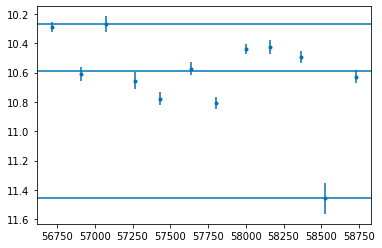

In [20]:
index = 4873 #512

wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                +str(index)+'_cavg.csv', 
                 names=['mjd','mag','emag','flt','class'],
                 skiprows=1)
wavg = wavg[wavg['flt'] == 'W2']
# np.min(wavg.mag), np.max(wavg.mag), np.median(wavg.mag)

plt.errorbar(wavg.mjd, wavg.mag, wavg.emag, fmt='.')
plt.axhline(np.min(wavg.mag))
plt.axhline(np.max(wavg.mag))
plt.axhline(np.median(wavg.mag))
plt.gca().invert_yaxis()
print(abs(np.max(wavg.mag)-np.median(wavg.mag))/(np.max(wavg.mag) - np.min(wavg.mag)) )

In [79]:
LS_w2_flux(5292,avg = 'cavg2')

NameError: name 'LS_w2_flux' is not defined

## Lightcurve example plot

In [289]:
512,5609,6119
# abc[abc.s_index == 512]['class']
# abc[abc.s_index == 5609]['class']
abc[abc.s_index == 6119]['class']

5246    D
Name: class, dtype: object

In [16]:
index = 512
wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                        +str(index)+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
w2av = wavg[(wavg['mjd'] > 56000) &
                        (wavg['flt'] == 'W2') &
                        (np.isnan(wavg['mag']) == False) &
                        (np.isnan(wavg['emag']) == False)]

[w2av.mjd.reset_index(drop=True)[1], w2av.mjd.reset_index(drop=True)[12]]


[56921.1513, 58900.385886363634]

In [17]:
index = 512
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')

ab[ab['Index'] == index]['Delta_w2']*0.8-np.median(w2av.mag)

191   -8.818664
Name: Delta_w2, dtype: float64

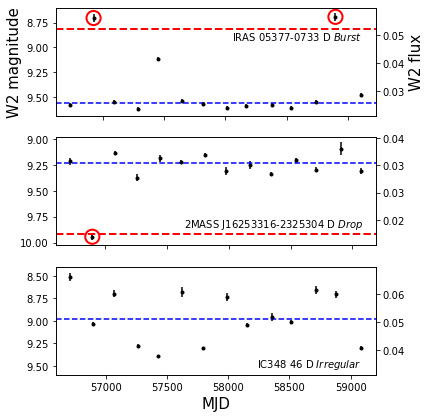

In [130]:
fig, ax = plt.subplots(3,1,figsize=(6,6))
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')

# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

index = [512,5609,6119]
for i in range(3):
    wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                        +str(index[i])+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]

    ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
    
    # circle burst/drop event
    if i == 0:
        ax[i].scatter([w2av.mjd.reset_index(drop=True)[1], w2av.mjd.reset_index(drop=True)[12]],
                  [w2av.mag.reset_index(drop=True)[1], w2av.mag.reset_index(drop=True)[12]],
                  s = 200, facecolors='none', edgecolors='r',lw=2)
    if i == 1:
        ax[i].scatter([w2av.mjd.reset_index(drop=True)[1]],
                  [w2av.mag.reset_index(drop=True)[1]],
                  s = 200, facecolors='none', edgecolors='r',lw=2)  
    
    
    # plot 0.8DeltaW2
    
    if i == 0:
        ax[i].axhline(np.median(w2av.mag)-ab[ab['Index'] == index[i]]['Delta_w2'].values*0.8,
                  linestyle='--',color='r',linewidth=2)
        
    if i == 1:
        ax[i].axhline(ab[ab['Index'] == index[i]]['Delta_w2'].values*0.8+np.median(w2av.mag),
                  linestyle='--',color='r',linewidth=2)
    
#     ax[i].axhline(min(w2av.mag),linestyle='--',color='k',linewidth=1.2)
#     ax[i].axhline(max(w2av.mag),linestyle='--',color='k',linewidth=1.2)
    ax[i].axhline(np.median(w2av.mag),linestyle='--',color='b',linewidth=1.5)
    ax[i].invert_yaxis()
    
    ax2 = ax[i].twinx()
    w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
    ew2f = w2av.emag * w2f / 1.0857
    ax2.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k',alpha=0)
#     ax2.set_yscale('log')
    
    ytick = np.linspace(min(w2av.mag)-0.1,max(w2av.mag)+0.1,5)
    ylab = np.round(171.85 * 10 ** (-ytick / 2.5),2) #np.round(-2.5*np.log10(ytick/171.85),2)
    ax2.set_yticks(ytick)
    ax2.set_yticklabels(ylab)
    ax2.set_ylim(ax[i].get_ylim())
    if i==0:
        ax2.set_ylabel('W2 flux', size=15)
#     ax2.invert_yaxis()    
    


    
ax[0].text(0.55,0.7,'IRAS 05377-0733 D $\it{Burst}$',transform=ax[0].transAxes) 
ax[1].text(0.40,0.17,'2MASS J16253316-2325304 D $\it{Drop}$',transform=ax[1].transAxes)
ax[2].text(0.63,0.07,'IC348 46 D $\it{Irregular}$',transform=ax[2].transAxes)
    
ax[2].set_xlabel('MJD',size=15)
ax[0].set_ylabel('W2 magnitude',size=15)
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_ylim(9.6,8.4)

# ax[0].text(0.9,0.85,'Burst',fontsize=12,transform=ax[0].transAxes)
# ax[1].text(0.9,0.1,'Dim',fontsize=12,transform=ax[1].transAxes)
# ax[2].text(0.85,0.1,'Irregular',fontsize=12,transform=ax[2].transAxes)

fig.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/stoch_examples.pdf')
# fig.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure9.pdf')

In [54]:
ab.columns

Index(['Index', 'ra', 'dec', 'dist_sd', 'avg_W1', 'stdev_W1', 'avg_eW1',
       'avg_W2', 'stdev_W2', 'avg_eW2', 'N_w1', 'N_w2', 'slope_w1', 'slope_w2',
       'sd_sdfid_w1_flux', 'sd_sdfid_w2_flux', 'sd_sdfid_w1_mag',
       'sd_sdfid_w2_mag', 'Delta_w1', 'Delta_w2', 'Delta_w1_flux',
       'Delta_w2_flux', 'class', 'catalogue', 'Sw1', 'DeltaSw1', 'Sw2',
       'DeltaSw2', 'SDw1', 'SDfidw1', 'SDw2', 'SDfidw2', 'chi2_mean_w1',
       'chi2_wmean_w1', 'chi2_slope_w1', 'chi2_mean_w2', 'chi2_wmean_w2',
       'chi2_slope_w2', 'linear_fap_w1', 'linear_fap_w2', 'center_mag_w1',
       'center_mag_w2', 'max_W1', 'min_W1', 'median_W1', 'max_W2', 'min_W2',
       'median_W2', 'period', 'power', 'baluev_fap', 'single_fap',
       'mod_baluev_fap', 'amp', 'sinamp', 'ls_meanjy', 'sd_sdfid_periodrmv',
       'sd_periodrmv', 'chi2_period_w2', 'linear_fap_periodrmv',
       'Deltaw2_periodrmv', 'var_type', 'combined_type', 'sd_linrmv',
       'mu_linrmv', 'sd_mu_linrmv', 'Deltaw2_linrmv'],
      dty

In [67]:
ab[(ab['Delta_w2'] > 1) & (ab['Delta_w1'] > 1) &
  ((ab['class'] == 'PMS+E') )]#| (ab['class'] == 'D'))]

Index          ra        dec   dist_sd    avg_W1  stdev_W1   avg_eW1  \
1033   4272  277.823750  -2.146389  0.082685  7.807821  0.321864  0.065560   
1041   4298  277.853750  -3.002500  0.207284  6.698406  0.410297  0.184012   
1349   5487  245.859583 -37.868889  0.099743  7.468907  0.340759  0.084670   

        avg_W2  stdev_W2   avg_eW2  ...  sd_periodrmv  chi2_period_w2  \
1033  6.922248  0.312546  0.065149  ...      0.034890       40.254048   
1041  6.033458  0.356776  0.140387  ...      0.129588       11.208350   
1349  7.010822  0.273557  0.053236  ...      0.041385       46.505579   

      linear_fap_periodrmv  Deltaw2_periodrmv  var_type  combined_type  \
1033              0.646258           0.398259  periodic            NaN   
1041              0.117390           0.643423  periodic            NaN   
1349              0.986476           0.476508  periodic            NaN   

      sd_linrmv  mu_linrmv  sd_mu_linrmv  Deltaw2_linrmv  
1033        NaN        NaN           NaN             NaN  
1041        NaN        NaN           NaN             NaN  
1349        NaN        NaN           NaN             NaN  

[3 rows x 67 columns]

In [59]:
ab[(ab['Delta_w2'] > 1) & (ab['Delta_w1'] > 1) &
  ((ab['class'] == 'PMS+E'))]

Index          ra        dec   dist_sd    avg_W1  stdev_W1   avg_eW1  \
1033   4272  277.823750  -2.146389  0.082685  7.807821  0.321864  0.065560   
1041   4298  277.853750  -3.002500  0.207284  6.698406  0.410297  0.184012   
1349   5487  245.859583 -37.868889  0.099743  7.468907  0.340759  0.084670   

        avg_W2  stdev_W2   avg_eW2  ...  sd_periodrmv  chi2_period_w2  \
1033  6.922248  0.312546  0.065149  ...      0.034890       40.254048   
1041  6.033458  0.356776  0.140387  ...      0.129588       11.208350   
1349  7.010822  0.273557  0.053236  ...      0.041385       46.505579   

      linear_fap_periodrmv  Deltaw2_periodrmv  var_type  combined_type  \
1033              0.646258           0.398259  periodic            NaN   
1041              0.117390           0.643423  periodic            NaN   
1349              0.986476           0.476508  periodic            NaN   

      sd_linrmv  mu_linrmv  sd_mu_linrmv  Deltaw2_linrmv  
1033        NaN        NaN           NaN             NaN  
1041        NaN        NaN           NaN             NaN  
1349        NaN        NaN           NaN             NaN  

[3 rows x 67 columns]

## Stochastic examples - poster

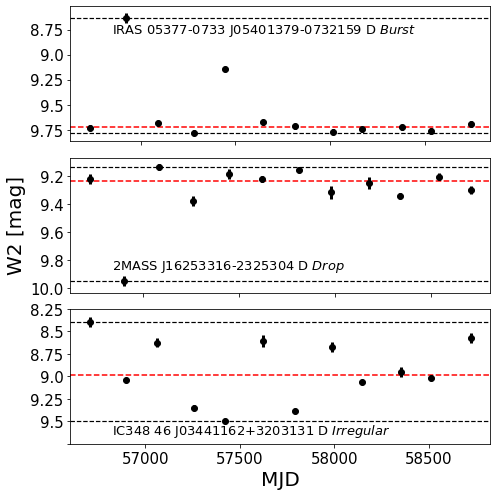

In [107]:
fig, ax = plt.subplots(3,1,figsize=(7,7))

# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

index = [512,5609,6119]
for i in range(3):
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                        +str(index[i])+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]

    ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.',ms=12,linewidth=3)
    ax[i].axhline(min(w2av.mag),linestyle='--',color='k',linewidth=1.2)
    ax[i].axhline(max(w2av.mag),linestyle='--',color='k',linewidth=1.2)
    ax[i].axhline(np.median(w2av.mag),linestyle='--',color='r',linewidth=1.5)
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(ax[i].get_yticks(),size=15)
    ax[i].set_xticks(np.arange(57000,59000,500))
    
    
    
#     ax2 = ax[i].twinx()
#     w2f = 309.54 * 10 ** (-w2av.mag / 2.5)  # flux
#     ew2f = w2av.emag * w2f / 1.057
#     ax2.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k',alpha=0)
# #     ax2.set_yscale('log')
    
#     ytick = np.linspace(min(w2av.mag)-0.1,max(w2av.mag)+0.1,5)
#     ylab = np.round(309.54 * 10 ** (-ytick / 2.5),2) #np.round(-2.5*np.log10(ytick/171.85),2)
#     ax2.set_yticks(ytick)
#     ax2.set_yticklabels(ylab)
#     ax2.set_ylim(ax[i].get_ylim())
#     if i==0:
#         ax2.set_ylabel('W2 flux', size=15)
#     ax2.invert_yaxis()    
for i in range(2):
    ax[i].set_xticklabels([])
ax[2].set_xticklabels(np.arange(57000,59000,500),size=15)
ax[0].text(0.1,0.8,'IRAS 05377-0733 J05401379-0732159 D $\it{Burst}$',transform=ax[0].transAxes,fontsize=13) 
ax[1].text(0.1,0.17,'2MASS J16253316-2325304 D $\it{Drop}$',transform=ax[1].transAxes,fontsize=13)
ax[2].text(0.1,0.07,'IC348 46 J03441162+3203131 D $\it{Irregular}$',transform=ax[2].transAxes,fontsize=13)
    
ax[2].set_xlabel('MJD',size=20)
ax[1].set_ylabel('W2 [mag]',size=20)

ax[2].set_ylim(9.6,8.4)

# ax[0].text(0.9,0.85,'Burst',fontsize=12,transform=ax[0].transAxes)
# ax[1].text(0.9,0.1,'Dim',fontsize=12,transform=ax[1].transAxes)
# ax[2].text(0.85,0.1,'Irregular',fontsize=12,transform=ax[2].transAxes)

fig.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/stoch_examples.pdf')
# fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/stoch_examples_avg.pdf')

0.7411846968334826


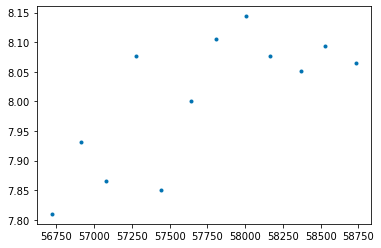

In [405]:
mm = w2av.mag
print((np.median(mm)-min(mm))/(max(mm)-min(mm)))

plt.plot(w2av.mjd,w2av.mag,'.')

IndexError: list index out of range

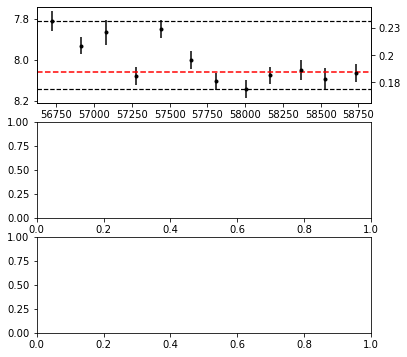

In [403]:
fig, ax = plt.subplots(3,1,figsize=(6,6))

# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

index = [10459]
for i in range(3):
    wavg = pa.read_csv('/home/wooseok/WISE_data/Taurus/avgdata/'
                        +str(index[i])+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]

    ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
    ax[i].axhline(min(w2av.mag),linestyle='--',color='k',linewidth=1.2)
    ax[i].axhline(max(w2av.mag),linestyle='--',color='k',linewidth=1.2)
    ax[i].axhline(np.median(w2av.mag),linestyle='--',color='r',linewidth=1.5)
    ax[i].invert_yaxis()
    
    ax2 = ax[i].twinx()
    w2f = 309.54 * 10 ** (-w2av.mag / 2.5)  # flux
    ew2f = w2av.emag * w2f / 1.057
    ax2.errorbar(w2av.mjd, w2av.mag, w2av.emag, fmt='k',alpha=0)
#     ax2.set_yscale('log')
    
    ytick = np.linspace(min(w2av.mag)-0.1,max(w2av.mag)+0.1,5)
    ylab = np.round(309.54 * 10 ** (-ytick / 2.5),2) #np.round(-2.5*np.log10(ytick/171.85),2)
    ax2.set_yticks(ytick)
    ax2.set_yticklabels(ylab)
    ax2.set_ylim(ax[i].get_ylim())
    if i==1:
        ax2.set_ylabel('W2 flux', size=15)
#     ax2.invert_yaxis()    
    

ax[0].text(0.22,0.8,'IRAS 05377-0733 J05401379-0732159 D $\it{Burst}$',transform=ax[0].transAxes) 
ax[1].text(0.40,0.17,'2MASS J16253316-2325304 D $\it{Drop}$',transform=ax[1].transAxes)
ax[2].text(0.30,0.07,'IC348 46 J03441162+3203131 D $\it{Irregular}$',transform=ax[2].transAxes)
    
ax[2].set_xlabel('MJD',size=15)
ax[1].set_ylabel('W2 magnitude',size=15)
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_ylim(9.6,8.4)

# ax[0].text(0.9,0.85,'Burst',fontsize=12,transform=ax[0].transAxes)
# ax[1].text(0.9,0.1,'Dim',fontsize=12,transform=ax[1].transAxes)
# ax[2].text(0.85,0.1,'Irregular',fontsize=12,transform=ax[2].transAxes)

fig.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/stoch_examples.pdf')
# fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/stoch_examples_avg.pdf')

In [87]:
0.0455/0.028332

1.6059579274318792

In [139]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')

ab.loc[ab['Index'] == 646,['Index','avg_eW2','Delta_w2','var_type','combined_type']]

Index   avg_eW2  Delta_w2   var_type combined_type
244    646  0.081773    1.0617  irregular           NaN

In [81]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
ab.loc[#(ab['var_type'] == 'curved') &
       #(ab['Delta_w2'] > 0.7) &
       (ab['mod_baluev_fap'] > 1e-2) &
       (ab['linear_fap_w2'] < 1e-4),
#        (ab['period'] < 3000),
       ['Index','mod_baluev_fap','linear_fap_w2','period']]#.values


Index  mod_baluev_fap  linear_fap_w2  period
5070  10116        0.011758       0.000071  4800.0

In [45]:
ab14 = ab.loc[ab['Index'] == 1471,:]
ab14.Delta_w2 / ab14.avg_eW2 

482    4.000833
dtype: float64

In [88]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
ab.loc[(ab['mod_baluev_fap'] > 1e-2) &
       (ab['linear_fap_w2'] < 1e-4)]

Empty DataFrame
Columns: [Index, ra, dec, dist_sd, avg_W1, stdev_W1, avg_eW1, avg_W2, stdev_W2, avg_eW2, N_w1, N_w2, slope_w1, slope_w2, sd_sdfid_w1_flux, sd_sdfid_w2_flux, sd_sdfid_w1_mag, sd_sdfid_w2_mag, Delta_w1, Delta_w2, Delta_w1_flux, Delta_w2_flux, class, catalogue, Sw1, DeltaSw1, Sw2, DeltaSw2, SDw1, SDfidw1, SDw2, SDfidw2, chi2_mean_w1, chi2_wmean_w1, chi2_slope_w1, chi2_mean_w2, chi2_wmean_w2, chi2_slope_w2, linear_fap_w1, linear_fap_w2, center_mag_w1, center_mag_w2, max_W1, min_W1, median_W1, max_W2, min_W2, median_W2, period, power, baluev_fap, single_fap, mod_baluev_fap, amp, sinamp, ls_meanjy, sd_sdfid_periodrmv, sd_periodrmv, chi2_period_w2, linear_fap_periodrmv, Deltaw2_periodrmv, var_type, combined_type, sd_linrmv, mu_linrmv, sd_mu_linrmv, Deltaw2_linrmv]
Index: []

[0 rows x 67 columns]

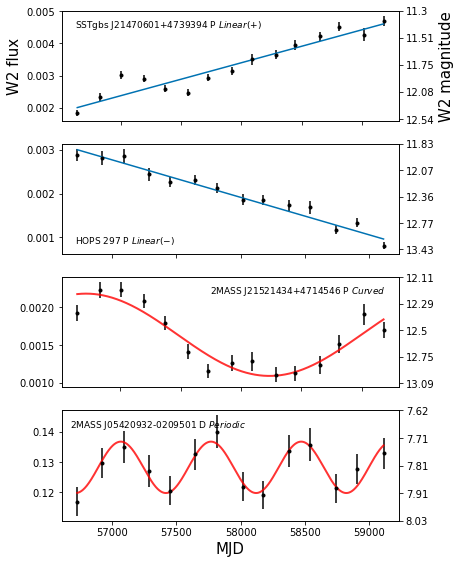

In [53]:
fig, ax = plt.subplots(4,1,figsize=(6.5,8))


# 5258, 


# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

#### original index = [597, 2842,4467,2866] ####
index = [5258, 2842, 5269,2866] #669
# index = [597, 2842, 4939,4688]

# index = [85,2842,4939,6307]

# periodic candidates:
# index = [669, 4688,6313,3614]
# index = [6036,3325,4491,3614]
for i in range(4):
    wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                        +str(index[i])+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]
    
    # flux conversion
    w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
    ew2f = w2av.emag * w2f / 1.0857
    
    
#     ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
    ax[i].errorbar(w2av.mjd, w2f, ew2f, fmt='k.')
#     ax[i].invert_yaxis()

    ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
    ylab = np.round(-2.5*np.log10(ytick/171.85),2)
    
    ax2 = ax[i].twinx()
    ax2.errorbar(w2av.mjd, w2f, ew2f, fmt='k^',ms=10, alpha=0)
    ax2.set_yticks(ytick)
    ax2.set_yticklabels(ylab)
    if i == 0:
        ax2.set_ylabel('W2 magnitude', size=15)
        
    #slope fit
    if i < 2:   
        def func(x,a,b):
                return a*x + b

        resw2, cov = curve_fit(func,w2av.mjd,w2f, sigma=ew2f
                              ,absolute_sigma = True)

        yfit= np.polyval(resw2,w2av.mjd)
        ax[i].plot(w2av.mjd,yfit,label='fit')
    
    #curve fit
    if i > 1:
        lsav = LombScargle(w2av.mjd, w2f, ew2f)
        frequency, power = lsav.autopower(  # nyquist_factor=5,
                                            maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                            minimum_frequency=1/4000)
        best_frequency = frequency[np.argmax(power)]
        arw2m = np.squeeze(np.array([w2av.mjd]))
        smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
        flux_jmod = lsav.model(smjd, best_frequency)
        ax[i].plot(smjd, flux_jmod, color='r', lw=2,
                     alpha=0.8
                  )

ax[3].set_xlabel('MJD',size=15)
ax[0].set_ylabel('W2 flux',size=15)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xticklabels([])
# fig.text(0, 0.52, 'W2 magnitude',fontsize=15, va='center',ha='right',rotation='vertical')
#J05385001-0720184
# J05412327-0217357
#  J05420932-0209501
# J18321599-0234434
ax[0].text(0.04,0.85,'SSTgbs J21470601+4739394 P $\it{Linear(+)}$',fontsize=9,transform=ax[0].transAxes)
ax[1].text(0.04,0.1,'HOPS 297 P $\it{Linear(-)}$',fontsize=9,transform=ax[1].transAxes)
ax[2].text(0.44,0.85,'2MASS J21521434+4714546 P $\it{Curved}$',fontsize=9,transform=ax[2].transAxes)
ax[3].text(0.025,0.85,'2MASS J05420932-0209501 D $\it{Periodic}$',fontsize=9,transform=ax[3].transAxes)

plt.tight_layout()
fig.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure7.pdf')
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/secular_examples_avg_fit.pdf')

# linear fap, baluev fap 를 나타내기.

## Secular example - poster

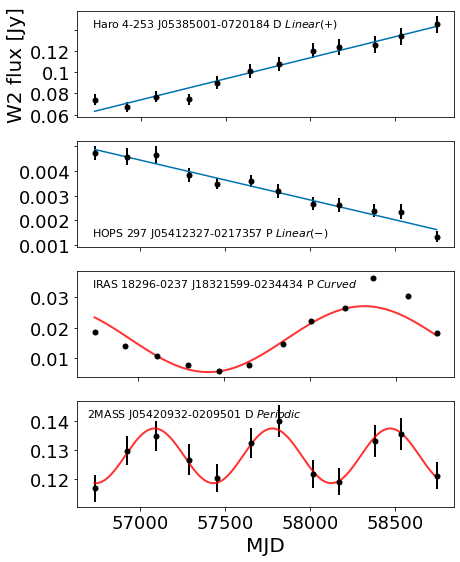

In [111]:
fig, ax = plt.subplots(4,1,figsize=(6.5,8))

# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

# index = [597, 5862, 4939, 6307]
index = [597, 2842, 4467,2866] #669
# index = [597, 2842, 4939,4688]

# index = [85,2842,4939,6307]

# periodic candidates:
# index = [669, 4688,6313,3614]
# index = [6036,3325,4491,3614]
for i in range(4):
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                        +str(index[i])+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]
    
    # flux conversion
    w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
    ew2f = w2av.emag * w2f / 1.0857
    
    
#     ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
    ax[i].errorbar(w2av.mjd, w2f, ew2f, fmt='k.',ms=10,linewidth=2)
#     ax[i].invert_yaxis()

    ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
    ylab = np.round(-2.5*np.log10(ytick/171.85),2)
    
#     ax2 = ax[i].twinx()
#     ax2.errorbar(w2av.mjd, w2f, ew2f, fmt='k^',ms=10, alpha=0)
#     ax2.set_yticks(ytick)
#     ax2.set_yticklabels(ylab)
#     if i == 0:
#         ax2.set_ylabel('W2 magnitude', size=15)
        
    #slope fit
    if i < 2:   
        def func(x,a,b):
                return a*x + b

        resw2, cov = curve_fit(func,w2av.mjd,w2f, sigma=ew2f
                              ,absolute_sigma = True)

        yfit= np.polyval(resw2,w2av.mjd)
        ax[i].plot(w2av.mjd,yfit,label='fit')
    
    #curve fit
    if i > 1:
        lsav = LombScargle(w2av.mjd, w2f, ew2f)
        frequency, power = lsav.autopower(  # nyquist_factor=5,
                                            maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                            minimum_frequency=1/4000)
        best_frequency = frequency[np.argmax(power)]
        arw2m = np.squeeze(np.array([w2av.mjd]))
        smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
        flux_jmod = lsav.model(smjd, best_frequency)
        ax[i].plot(smjd, flux_jmod, color='r', lw=2,
                     alpha=0.8
                  )

ax[3].set_xlabel('MJD',size=20)
ax[0].set_ylabel('W2 flux [Jy]',size=20,ha='center')

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xticklabels([])
for i in range(4):
    ax[i].set_xticks(np.arange(57000,59000,500))
ax[3].set_xticklabels(np.arange(57000, 59000, 500),size=18)
for i in range(4):
    ax[i].set_yticklabels(ax[i].get_yticks(),size=18)
# fig.text(0, 0.52, 'W2 magnitude',fontsize=15, va='center',ha='right',rotation='vertical')
#J05385001-0720184
# J05412327-0217357
#  J05420932-0209501
# J18321599-0234434
ax[0].text(0.04,0.85,'Haro 4-253 J05385001-0720184 D $\it{Linear(+)}$',fontsize=11,transform=ax[0].transAxes)
ax[1].text(0.04,0.1,'HOPS 297 J05412327-0217357 P $\it{Linear(-)}$',fontsize=11,transform=ax[1].transAxes)
ax[2].text(0.04,0.85,'IRAS 18296-0237 J18321599-0234434 P $\it{Curved}$',fontsize=11,transform=ax[2].transAxes)
ax[3].text(0.025,0.85,'2MASS J05420932-0209501 D $\it{Periodic}$',fontsize=11,transform=ax[3].transAxes)

plt.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/stoch_examples.pdf')
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/secular_examples_avg_fit.pdf')

# linear fap, baluev fap 를 나타내기.

## Combined variable plot

modified baluev FAP is 1.50e-04
new deltaw2:  0.8840396694823838
original deltaw2:  0.8840396694823835
burst: 0.86% 
dim: 0.14% 
Dw2: 30.66 x mu


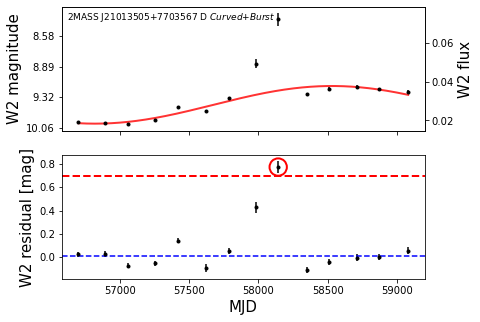

In [79]:
# matplotlib.rcParams['text.usetex'] = True




# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

index = 4991 # 4105

# new candidate : 1027

# index = 3960

# index = 1011
# index = 5653
# index=3263
com_bur_list = np.array([   14,    45,   840,  3180,  3323,  3884,  4105,  4420,  4991,
        5852, 10217])
# periodic candidates:
# index = [669, 4688,6313,3614]
# index = [6036,3325,4491,3614]

# for index in com_bur_list:
fig, ax = plt.subplots(2,1,figsize=(6.5,5))
wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                +str(index)+'_cavg.csv', 
                 names=['mjd','mag','emag','flt','class'],
                 skiprows=1)




w2av = wavg[(wavg['mjd'] > 56000) &
                        (wavg['flt'] == 'W2') &
                        (np.isnan(wavg['mag']) == False) &
                        (np.isnan(wavg['emag']) == False)]

# flux conversion
w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
ew2f = w2av.emag * w2f / 1.0857





ax[0].errorbar(w2av.mjd, w2f, ew2f, fmt='k.')
#     ax[i].invert_yaxis()

ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
ylab = np.round(-2.5*np.log10(ytick/171.85),2)

ax2 = ax[0].twinx()
ax2.errorbar(w2av.mjd, w2f, ew2f, fmt='k^',ms=10, alpha=0)
ax[0].set_yticks(ytick)
ax[0].set_yticklabels(ylab)

ax2.set_ylabel('W2 flux', size=15)


#curve fit

lsav = LombScargle(w2av.mjd, w2f, ew2f)
frequency, power = lsav.autopower(  # nyquist_factor=5,
                                    maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                    minimum_frequency=1/4800)
best_frequency = frequency[np.argmax(power)]
arw2m = np.squeeze(np.array([w2av.mjd]))
smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
flux_jmod = lsav.model(smjd, best_frequency)
flux_jdot = lsav.model(w2av.mjd,best_frequency)

fap = lsav.false_alarm_probability(power)
print("modified baluev FAP is {:5.2e}".format(fap[np.argmax(power)]*200*best_frequency))

ax[0].plot(smjd, flux_jmod, color='r', lw=2,
                 alpha=0.8
              )

#residual - burst
nw2f = -2.5*np.log10(flux_jdot/171.85)
mw2f = nw2f - w2av.mag
print('new deltaw2: ',max(mw2f)-min(mw2f))

# original deltaw2
nw2m = 2.5*np.log10(w2f/flux_jdot)
dw2_prmv = max(nw2m)-min(nw2m)
print('original deltaw2: ',dw2_prmv)



ax[1].errorbar(w2av.mjd, mw2f, w2av.emag,fmt='k.')
# ax[1].axhline(min(mw2f),linestyle='--',color='k',linewidth=1.2)
# ax[1].axhline(max(mw2f),linestyle='--',color='k',linewidth=1.2)
ax[1].axhline(np.median(mw2f),linestyle='--',color='b',linewidth=1.5)
ax[1].axhline(0.8*(max(mw2f)-min(mw2f))- np.median(mw2f),linestyle='--',color='r',linewidth=2)



# circle burst event
ax[1].scatter([w2av.mjd.reset_index(drop=True)[8]],
          [mw2f.reset_index(drop=True)[8]],
          s = 300, facecolors='none', edgecolors='r',lw=2)  


# ax[1].invert_yaxis()

ax[1].set_xlabel('MJD',size=15)
ax[1].set_ylabel('W2 residual [mag]', size=15)
ax[0].set_ylabel('W2 magnitude',size=15)

ax[0].set_xticklabels([])

# known-common-name, 2MASS, evol-class, Type
ax[0].text(0.015,0.9,r"2MASS J21013505+7703567 D $\it{Curved}$+$\it{Burst}$",
           fontsize=9,transform=ax[0].transAxes)
#r'\textit{voltage (mV)}


# plt.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure11.pdf')
print('burst: {:.2f}% '.format((max(mw2f) - np.median(mw2f)) / (max(mw2f)-min(mw2f))))
print('dim: {:.2f}% '.format((np.median(mw2f)-min(mw2f))/(max(mw2f)-min(mw2f))))


print('Dw2: {:.2f} x mu'.format((max(mw2f)-min(mw2f))/np.mean(w2av.emag)))

In [125]:
ab0 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
ab0.loc[#ab['Index'] == 4105,
    ab0['combined_type'] == 'burst',
    ['Index','ra','dec','class','var_type','combined_type']]

Index          ra        dec  class  var_type combined_type
19       45   85.654250  -9.993750      D    curved         burst
284     762   84.034417  -6.810083      D    curved         burst
306     840   83.928083  -6.581028      D    curved         burst
357    1027   83.966667  -6.167167      P    curved         burst
701    2796   83.901750  -4.272222      D  periodic         burst
815    3323   86.797333   0.316694      D  periodic         burst
1068   4420  277.984167  -2.697500  PMS+E  periodic         burst
1215   4991  315.396250  77.065556      D    curved         burst
1480   5919   52.243333  31.371389      P    curved         burst
1706  10217   67.715554  24.696451      D    curved         burst

In [114]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
ab.loc[#ab['Index'] == 4105,
    ab['combined_type'] == 'burst',
    ['Index','ra','dec','class','var_type','combined_type']]

ab.loc[#ab['Index'] == 4105,
    ab['combined_type'] == 'burst',
    'Index'].values

array([   45,   762,   840,  1027,  2796,  3323,  4420,  4991,  5919,
       10217])

modified baluev FAP is 5.60e-04
new deltaw2:  0.5327788610887829
original deltaw2:  0.5327788610887816
burst: 0.63% 
dim: 0.37% 
Dw2: 11.55 x mu


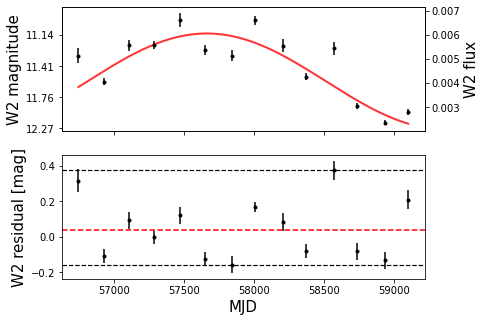

In [123]:
comb_var(6438)

In [105]:
ab.loc[ab['Index'] == 4105,
#     ab['combined_type'] == 'burst',
    ['Index','ra','dec','mod_baluev_fap','class','var_type','combined_type']]

Index          ra     dec  mod_baluev_fap class   var_type combined_type
1007   4105  277.607083 -2.1875        0.010238     P  irregular           NaN

In [122]:
### functionize ####

def comb_var(index):
    # matplotlib.rcParams['text.usetex'] = True




    # plt.subplots_adjust

    # increase / decrease / burst / dimming 

    # stochastic / linear / curved / periodic

    #####index = 3323 # 4105

    # new candidate : 1027

    # index = 3960

    # index = 1011
    # index = 5653
    # index=3263
    com_bur_list = np.array([   14,    45,   840,  3180,  3323,  3884,  4105,  4420,  4991,
            5852, 10217])
    # periodic candidates:
    # index = [669, 4688,6313,3614]
    # index = [6036,3325,4491,3614]

    # for index in com_bur_list:
    fig, ax = plt.subplots(2,1,figsize=(6.5,5))
    wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                    +str(index)+'_cavg.csv', 
                     names=['mjd','mag','emag','flt','class'],
                     skiprows=1)




    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]

    # flux conversion
    w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
    ew2f = w2av.emag * w2f / 1.0857





    ax[0].errorbar(w2av.mjd, w2f, ew2f, fmt='k.')
    #     ax[i].invert_yaxis()

    ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
    ylab = np.round(-2.5*np.log10(ytick/171.85),2)

    ax2 = ax[0].twinx()
    ax2.errorbar(w2av.mjd, w2f, ew2f, fmt='k^',ms=10, alpha=0)
    ax[0].set_yticks(ytick)
    ax[0].set_yticklabels(ylab)

    ax2.set_ylabel('W2 flux', size=15)


    #curve fit

    lsav = LombScargle(w2av.mjd, w2f, ew2f)
    frequency, power = lsav.autopower(  # nyquist_factor=5,
                                        maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                        minimum_frequency=1/4800)
    best_frequency = frequency[np.argmax(power)]
    arw2m = np.squeeze(np.array([w2av.mjd]))
    smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
    flux_jmod = lsav.model(smjd, best_frequency)
    flux_jdot = lsav.model(w2av.mjd,best_frequency)

    fap = lsav.false_alarm_probability(power)
    print("modified baluev FAP is {:5.2e}".format(fap[np.argmax(power)]*200*best_frequency))

    ax[0].plot(smjd, flux_jmod, color='r', lw=2,
                     alpha=0.8
                  )

    #residual - burst
    nw2f = -2.5*np.log10(flux_jdot/171.85)
    mw2f = nw2f - w2av.mag
    print('new deltaw2: ',max(mw2f)-min(mw2f))

    # original deltaw2
    nw2m = 2.5*np.log10(w2f/flux_jdot)
    dw2_prmv = max(nw2m)-min(nw2m)
    print('original deltaw2: ',dw2_prmv)



    ax[1].errorbar(w2av.mjd, mw2f, w2av.emag,fmt='k.')
    ax[1].axhline(min(mw2f),linestyle='--',color='k',linewidth=1.2)
    ax[1].axhline(max(mw2f),linestyle='--',color='k',linewidth=1.2)
    ax[1].axhline(np.median(mw2f),linestyle='--',color='r',linewidth=1.5)

    # ax[1].invert_yaxis()

    ax[1].set_xlabel('MJD',size=15)
    ax[1].set_ylabel('W2 residual [mag]', size=15)
    ax[0].set_ylabel('W2 magnitude',size=15)

    ax[0].set_xticklabels([])

    # known-common-name, 2MASS, evol-class, Type
#     ax[0].text(0.02,0.9,r"2MASS J18302577-0211152 PMS+E $\it{Curved}$+$\it{Burst}$",
#                fontsize=9,transform=ax[0].transAxes)
    #r'\textit{voltage (mV)}


    # plt.tight_layout()
    # plt.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure11.pdf')
    print('burst: {:.2f}% '.format((max(mw2f) - np.median(mw2f)) / (max(mw2f)-min(mw2f))))
    print('dim: {:.2f}% '.format((np.median(mw2f)-min(mw2f))/(max(mw2f)-min(mw2f))))
    print('Dw2: {:.2f} x mu'.format((max(mw2f)-min(mw2f))/np.mean(w2av.emag)))
#     fig.savefig('/home/wooseok/WISE_data/ws_paper/curved_burst_plots/'+str(i)+'_comb_burst.pdf')
    return
# comb_var(3323)

# for i in ab.loc[#ab['Index'] == 4105,
#     ab['combined_type'] == 'burst',
#     'Index'].values:
#     comb_var(i)

In [131]:
aa = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined.csv')
aa[(aa['Index'] == 4105) ]['class']

997    P
Name: class, dtype: object

In [91]:
aa[(aa['combined_type'] == 'burst')].Delta_w2

6       0.470467
18      1.357424
302     0.971444
759     2.226250
806     1.501125
945     0.407300
997     1.331125
1058    0.848239
1206    1.504643
1439    0.659076
1695    2.370931
Name: Delta_w2, dtype: float64

In [99]:
aa[(aa['combined_type'] == 'burst')].Index.values

array([   14,    45,   840,  3180,  3323,  3884,  4105,  4420,  4991,
        5852, 10217])

## Combined variable - poster

new deltaw2:  0.6433673503372752
original deltaw2:  0.6433673503372762
burst: 0.91% 
dim: 0.09% 
Dw2: 12.73 x mu


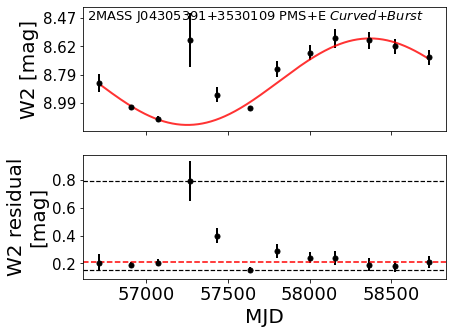

In [85]:
# matplotlib.rcParams['text.usetex'] = True


fig, ax = plt.subplots(2,1,figsize=(6.5,5))

# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

index = 4953

# index = 3960

# index = 1011
# index = 5653
# index=3263
comb_bur = [1268,  3960,  4420,  4754,  4953,  4991, 10217]
comb_dim = [878]
# periodic candidates:
# index = [669, 4688,6313,3614]
# index = [6036,3325,4491,3614]
if index < 10000:
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                        +str(index)+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
    
else:
    wavg = pa.read_csv('/home/wooseok/WISE_data/Taurus/avgdata/'+str(index)+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
    
    
w2av = wavg[(wavg['mjd'] > 56000) &
                        (wavg['flt'] == 'W2') &
                        (np.isnan(wavg['mag']) == False) &
                        (np.isnan(wavg['emag']) == False)]

# flux conversion
w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
ew2f = w2av.emag * w2f / 1.0857





ax[0].errorbar(w2av.mjd, w2f, ew2f, fmt='k.',ms=10,linewidth=2)
#     ax[i].invert_yaxis()

ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
ylab = np.round(-2.5*np.log10(ytick/171.85),2)

# ax2 = ax[0].twinx()
# ax2.errorbar(w2av.mjd, w2f, ew2f, fmt='k^',ms=10, alpha=0)
ax[0].set_yticks(ytick)
ax[0].set_yticklabels(ylab,size=15)

ax2.set_ylabel('W2 flux', size=15)


#curve fit

lsav = LombScargle(w2av.mjd, w2f, ew2f)
frequency, power = lsav.autopower(  # nyquist_factor=5,
                                    maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                    minimum_frequency=1/4000)
best_frequency = frequency[np.argmax(power)]
arw2m = np.squeeze(np.array([w2av.mjd]))
smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
flux_jmod = lsav.model(smjd, best_frequency)
flux_jdot = lsav.model(w2av.mjd,best_frequency)
ax[0].plot(smjd, flux_jmod, color='r', lw=2,
                 alpha=0.8
              )

#residual - burst
nw2f = -2.5*np.log10(flux_jdot/171.85)
mw2f = nw2f - w2av.mag
print('new deltaw2: ',max(mw2f)-min(mw2f))

# original deltaw2
nw2m = 2.5*np.log10(w2f/flux_jdot)
dw2_prmv = max(nw2m)-min(nw2m)
print('original deltaw2: ',dw2_prmv)



ax[1].errorbar(w2av.mjd, mw2f, w2av.emag,fmt='k.',ms=10,linewidth=2)
ax[1].axhline(min(mw2f),linestyle='--',color='k',linewidth=1.2)
ax[1].axhline(max(mw2f),linestyle='--',color='k',linewidth=1.2)
ax[1].axhline(np.median(mw2f),linestyle='--',color='r',linewidth=1.5)

# ax[1].invert_yaxis()

ax[1].set_xlabel('MJD',size=20)
ax[1].set_ylabel('W2 residual\n[mag]', size=20)
ax[0].set_ylabel('W2 [mag]',size=20)

# for i in range(2):
ax[1].set_yticklabels(np.arange(0,10,2)/10,size=15)


ax[0].set_xticklabels([])
for i in range(2):
    ax[i].set_xticks(np.arange(57000,59000,500))
ax[1].set_xticklabels(np.arange(57000, 59000, 500),size=18)
# known-common-name, 2MASS, evol-class, Type
ax[0].text(0.01,0.9,r"2MASS J04305391+3530109 PMS+E $\it{Curved}$+$\it{Burst}$",
           fontsize=13,transform=ax[0].transAxes)
#r'\textit{voltage (mV)}


# plt.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/combined_examples_res.pdf')
print('burst: {:.2f}% '.format((max(mw2f) - np.median(mw2f)) / (max(mw2f)-min(mw2f))))
print('dim: {:.2f}% '.format((np.median(mw2f)-min(mw2f))/(max(mw2f)-min(mw2f))))


print('Dw2: {:.2f} x mu'.format((max(mw2f)-min(mw2f))/np.mean(w2av.emag)))

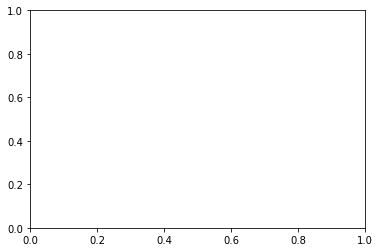

In [63]:
fig, ax = plt.subplots()
?ax.get_yticks

new deltaw2:  0.6433673503372752
original deltaw2:  0.6433673503372762
burst: 0.91% 
dim: 0.09% 


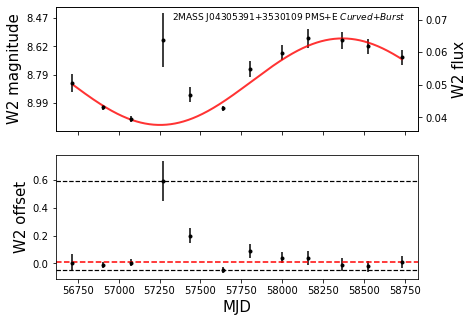

In [52]:
# matplotlib.rcParams['text.usetex'] = True


fig, ax = plt.subplots(2,1,figsize=(6.5,5))

# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

index = 4953

# index = 3960
# comb_bur = [1268,  3960,  4420,  4754,  4953,  4991, 10217]
# comb_dim = [878]
# periodic candidates:
# index = [669, 4688,6313,3614]
# index = [6036,3325,4491,3614]
if index < 10000:
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                        +str(index)+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
    
else:
    wavg = pa.read_csv('/home/wooseok/WISE_data/Taurus/avgdata/'+str(index)+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
    
    
w2av = wavg[(wavg['mjd'] > 56000) &
                        (wavg['flt'] == 'W2') &
                        (np.isnan(wavg['mag']) == False) &
                        (np.isnan(wavg['emag']) == False)]

# flux conversion
w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
ew2f = w2av.emag * w2f / 1.0857





ax[0].errorbar(w2av.mjd, w2f, ew2f, fmt='k.')
#     ax[i].invert_yaxis()

ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
ylab = np.round(-2.5*np.log10(ytick/171.85),2)

ax2 = ax[0].twinx()
ax2.errorbar(w2av.mjd, w2f, ew2f, fmt='k^',ms=10, alpha=0)
ax[0].set_yticks(ytick)
ax[0].set_yticklabels(ylab)

ax2.set_ylabel('W2 flux', size=15)


#curve fit

lsav = LombScargle(w2av.mjd, w2f, ew2f)
frequency, power = lsav.autopower(  # nyquist_factor=5,
                                    maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                    minimum_frequency=1/4000)
best_frequency = frequency[np.argmax(power)]
arw2m = np.squeeze(np.array([w2av.mjd]))
smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
flux_jmod = lsav.model(smjd, best_frequency)
flux_jdot = lsav.model(w2av.mjd,best_frequency)
ax[0].plot(smjd, flux_jmod, color='r', lw=2,
                 alpha=0.8
              )

#residual - burst
nw2f = -2.5*np.log10(flux_jdot/171.85)
mw2f = nw2f - w2av.mag
print('new deltaw2: ',max(mw2f)-min(mw2f))

# original deltaw2
nw2m = 2.5*np.log10(w2f/flux_jdot)
dw2_prmv = max(nw2m)-min(nw2m)
print('original deltaw2: ',dw2_prmv)



ax[1].errorbar(w2av.mjd, mw2f, w2av.emag,fmt='k.')
ax[1].axhline(min(mw2f),linestyle='--',color='k',linewidth=1.2)
ax[1].axhline(max(mw2f),linestyle='--',color='k',linewidth=1.2)
ax[1].axhline(np.median(mw2f),linestyle='--',color='r',linewidth=1.5)

# ax[1].invert_yaxis()

ax[1].set_xlabel('MJD',size=15)
ax[1].set_ylabel('W2 offset', size=15)
ax[0].set_ylabel('W2 magnitude',size=15)

ax[0].set_xticklabels([])

# known-common-name, 2MASS, evol-class, Type
ax[0].text(0.32,0.9,r"2MASS J04305391+3530109 PMS+E $\it{Curved}$+$\it{Burst}$",
           fontsize=9,transform=ax[0].transAxes)
#r'\textit{voltage (mV)}


# plt.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/combined_examples.pdf')
print('burst: {:.2f}% '.format((max(mw2f) - np.median(mw2f)) / (max(mw2f)-min(mw2f))))
print('dim: {:.2f}% '.format((np.median(mw2f)-min(mw2f))/(max(mw2f)-min(mw2f))))




In [ ]:
fig, ax = plt.subplots(2,1,figsize=(6.5,5))

# plt.subplots_adjust

# increase / decrease / burst / dimming 

# stochastic / linear / curved / periodic

index = [77, 4953]

# index = [85,2842,4939,6307]

# periodic candidates:
# index = [669, 4688,6313,3614]
# index = [6036,3325,4491,3614]
for i in range(2):
    wavg = pa.read_csv('/home/wooseok/WISE_data/2ndnewwise/outlier_cut_data/'
                        +str(index[i])+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)
    w2av = wavg[(wavg['mjd'] > 56000) &
                            (wavg['flt'] == 'W2') &
                            (np.isnan(wavg['mag']) == False) &
                            (np.isnan(wavg['emag']) == False)]
    
    # flux conversion
    w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
    ew2f = w2av.emag * w2f / 1.0857
    
    
#     ax[i].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
    ax[i].errorbar(w2av.mjd, w2f, ew2f, fmt='k.')
#     ax[i].invert_yaxis()

    ytick = np.linspace(min(w2f)-0.1*min(w2f),max(w2f)+0.1*max(w2f),5)
    ylab = np.round(-2.5*np.log10(ytick/171.85),2)
    
    ax2 = ax[i].twinx()
    ax2.errorbar(w2av.mjd, w2f, ew2f, fmt='k^',ms=10, alpha=0)
    ax2.set_yticks(ytick)
    ax2.set_yticklabels(ylab)
    if i == 0:
        ax2.set_ylabel('W2 magnitude', size=15)
        
    #slope fit
    if i < 1:   
        def func(x,a,b):
                return a*x + b

        resw2, cov = curve_fit(func,w2av.mjd,w2f, sigma=ew2f
                              ,absolute_sigma = True)

        yfit= np.polyval(resw2,w2av.mjd)
#         ax[i].plot(w2av.mjd,yfit,label='fit')
    
    #curve fit
    if i == 1:
        lsav = LombScargle(w2av.mjd, w2f, ew2f)
        frequency, power = lsav.autopower(  # nyquist_factor=5,
                                            maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                            minimum_frequency=1/4000)
        best_frequency = frequency[np.argmax(power)]
        arw2m = np.squeeze(np.array([w2av.mjd]))
        smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
        flux_jmod = lsav.model(smjd, best_frequency)
        ax[i].plot(smjd, flux_jmod, color='r', lw=2,
                     alpha=0.8
                  )

ax[1].set_xlabel('MJD',size=15)
ax[0].set_ylabel('W2 flux',size=15)

ax[0].set_xticklabels([])
# ax[1].set_xticklabels([])
# ax[2].set_xticklabels([])
# fig.text(0, 0.52, 'W2 magnitude',fontsize=15, va='center',ha='right',rotation='vertical')
#J05385001-0720184
# J05412327-0217357
#  J05420932-0209501
# J18321599-0234434
ax[0].text(0.04,0.9,'77 [MGM2012]77 P Type I+II',fontsize=9,transform=ax[0].transAxes)
ax[1].text(0.37,0.9,'4953 J04305391+3530109 PMS+E Type III+IV',fontsize=9,transform=ax[1].transAxes)
# ax[2].text(0.04,0.85,'2866 J05420932-0209501 D Type II',fontsize=9,transform=ax[2].transAxes)
# ax[3].text(0.04,0.85,'4467 J18321599-0234434 P Type III',fontsize=9,transform=ax[3].transAxes)

plt.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/stoch_examples.pdf')
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/combined_examples.pdf')

# linear fap, baluev fap 를 나타내기.

## Averaged Lightcurve plot

14    0.025694
15    0.019837
16    0.019863
17    0.020067
18    0.031049
19    0.022736
20    0.026305
21    0.019017
22    0.028661
23    0.021727
24    0.019602
25    0.022246
26    0.022328
27    0.018335
Name: emag, dtype: float64


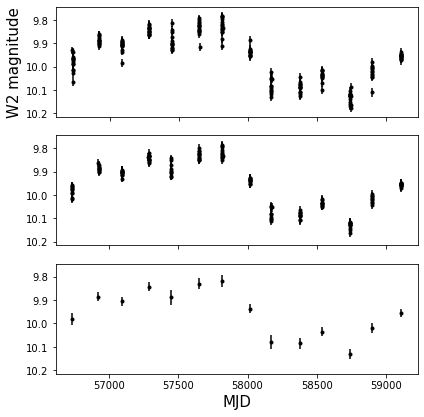

In [6]:
index = 133

fig, ax = plt.subplots(3,1,figsize=(6,6))




wall = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/yso_data/YSOwise_lc_'+str(index)+'_dcut.dat', 
                                  sep="\s+", header=None, skiprows=1,
                            names=['mjd','mag','emag','flt','flag','dist','ra','dec']) 

# YSOwise_lc_'+str(index)+'_dcut.dat', 
#                                   sep="\s+", header=None, skiprows=1,
#                             names=['mjd','mag','emag','flt','flag','dist','ra','dec'])
w2al = wall[(wall['mjd'] > 56000) & #(wall['mjd'] < 56850) &
                        (wall['flt'] == 'W2') &
                        (np.isnan(wall['mag']) == False) &
                        (np.isnan(wall['emag']) == False)]

ax[0].errorbar(w2al.mjd, w2al.mag, yerr=w2al.emag, fmt='k.')
ax[0].invert_yaxis()


wout = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                        +str(index)+'_alld.csv', 
                         names=['mjd','mag','emag','flt','class','ra','dec'],
                         skiprows=1)

w2ou = wout[(wout['mjd'] > 56000) & #(wout['mjd'] < 56850) &
                        (wout['flt'] == 'W2') &
                        (np.isnan(wout['mag']) == False) &
                        (np.isnan(wout['emag']) == False)]

ax[1].errorbar(w2ou.mjd, w2ou.mag, yerr=w2ou.emag, fmt='k.')
ax[1].invert_yaxis()
ax[1].set_ylim(ax[0].get_ylim())

wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                        +str(index)+'_cavg.csv', 
                         names=['mjd','mag','emag','flt','class'],
                         skiprows=1)

w2av = wavg[(wavg['mjd'] > 56000) & #(wavg['mjd'] < 56850) &
                        (wavg['flt'] == 'W2') &
                        (np.isnan(wavg['mag']) == False) &
                        (np.isnan(wavg['emag']) == False)]

ax[2].errorbar(w2av.mjd, w2av.mag, yerr=w2av.emag, fmt='k.')
ax[2].invert_yaxis()
ax[2].set_ylim(ax[0].get_ylim())


ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xlabel('MJD',size=15)
ax[0].set_ylabel('W2 magnitude',size=15)
print(w2av.emag)

#source 133
plt.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/averaged_lightcurve.pdf')
# fig.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure1.pdf')

## Eruptive ysos lightcurve

In [26]:
# variability type?
erup_list = [2444,5028,4990,1406,3180,3916,3426,6242,6375,4850,5258]
v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
v2.loc[v2['Index'].isin(erup_list),['Index','var_type','combined_type']]

Index   var_type combined_type
459    1406     curved     irregular
611    2444  irregular           NaN
768    3180     curved           NaN
852    3426  irregular           NaN
960    3916     curved           NaN
1163   4850     curved     irregular
1214   4990      burst           NaN
1230   5028  irregular           NaN
1284   5258     linear           NaN
1579   6242  irregular           NaN
1631   6375     curved     irregular

In [28]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
ab[ab.Delta_w2 / ab.avg_eW2 > 3]

Index         ra        dec   dist_sd     avg_W1  stdev_W1   avg_eW1  \
0         1  85.677833 -10.419250  0.044337   8.611724  0.283801  0.046935   
3         4  85.554458 -10.093028  0.048744  12.196857  0.241949  0.031731   
4         5  85.632375 -10.090611  0.035782  10.821006  0.137579  0.037453   
5         6  85.658458 -10.062111  0.039906  11.563150  0.116860  0.030324   
6         7  85.749708 -10.061111  0.055762  11.003982  0.030769  0.024345   
...     ...        ...        ...       ...        ...       ...       ...   
5384  10501  76.345092  25.525151  0.048174   9.227612  0.167847  0.027420   
5387  10505  76.800300  24.621140  0.037208   9.172340  0.023674  0.023045   
5388  10506  76.912679  23.185113  0.037873  10.962414  0.055660  0.023776   
5389  10509  76.979040  25.004258  0.034825  10.186744  0.019008  0.019212   
5397  10519  78.114949  22.896918  0.038216   8.910819  0.042575  0.036739   

         avg_W2  stdev_W2   avg_eW2  ...  single_fap  mod_baluev_fap  \
0      7.382148  0.253778  0.052072  ...    0.006580        0.027262   
3     10.638705  0.236847  0.027966  ...    0.001153        0.008402   
4     10.080570  0.153731  0.033459  ...    0.027782        0.149844   
5     11.171915  0.159917  0.034017  ...    0.040527        0.169996   
6     10.705364  0.035977  0.026031  ...    0.098757        0.410892   
...         ...       ...       ...  ...         ...             ...   
5384   8.403964  0.111752  0.043865  ...    0.015552        0.592832   
5387   9.160891  0.020757  0.021153  ...    0.011197        0.027777   
5388  10.600865  0.068028  0.027064  ...    0.035155        0.055677   
5389   9.840434  0.033152  0.019445  ...    0.007375        0.023102   
5397   8.661561  0.047317  0.042184  ...    0.015518        0.282400   

           amp    sinamp  ls_meanjy  sd_sdfid_periodrmv  sd_periodrmv  \
0     0.051750  0.052171   0.200031            2.768036      0.026550   
3     0.002355  0.002355   0.009534            4.950635      0.001239   
4     0.002172  0.002172   0.015875            3.818910      0.001878   
5     0.000806  0.000806   0.005725            3.731922      0.000686   
6     0.000242  0.000242   0.008945            1.156022      0.000249   
...        ...       ...        ...                 ...           ...   
5384  0.007815  0.007814   0.075083            1.767723      0.005359   
5387  0.000918  0.001109   0.036763            0.745018      0.000539   
5388  0.000613  0.000653   0.009686            1.915038      0.000471   
5389  0.000776  0.001126   0.019299            1.044756      0.000372   
5397  0.002772  0.002772   0.059068            0.761557      0.001747   

      chi2_period_w2  linear_fap_periodrmv  Deltaw2_periodrmv  
0         105.185243              0.978935           0.562302  
3         320.576981              0.992396           0.425474  
4         179.741718              0.396039           0.497998  
5         166.091493              0.769609           0.467184  
6          15.353338              0.974582           0.111213  
...              ...                   ...                ...  
5384       38.156745              0.994151           0.237021  
5387        7.984630              0.999402           0.050064  
5388       47.103767              0.999054           0.181314  
5389       17.085517              0.998656           0.075853  
5397        8.022822              0.908944           0.089209  

[3894 rows x 61 columns]

In [ ]:
'irregular',    k = 0,1,6,7
'irregular',

'burst', k = 2

'curved+irregular', k = 3,8,9 
'curved', 'curved', k = 4,5
'irregular', 'irregular',
'curved+irregular', 'curved+irregular', 
'linear' k = 10 

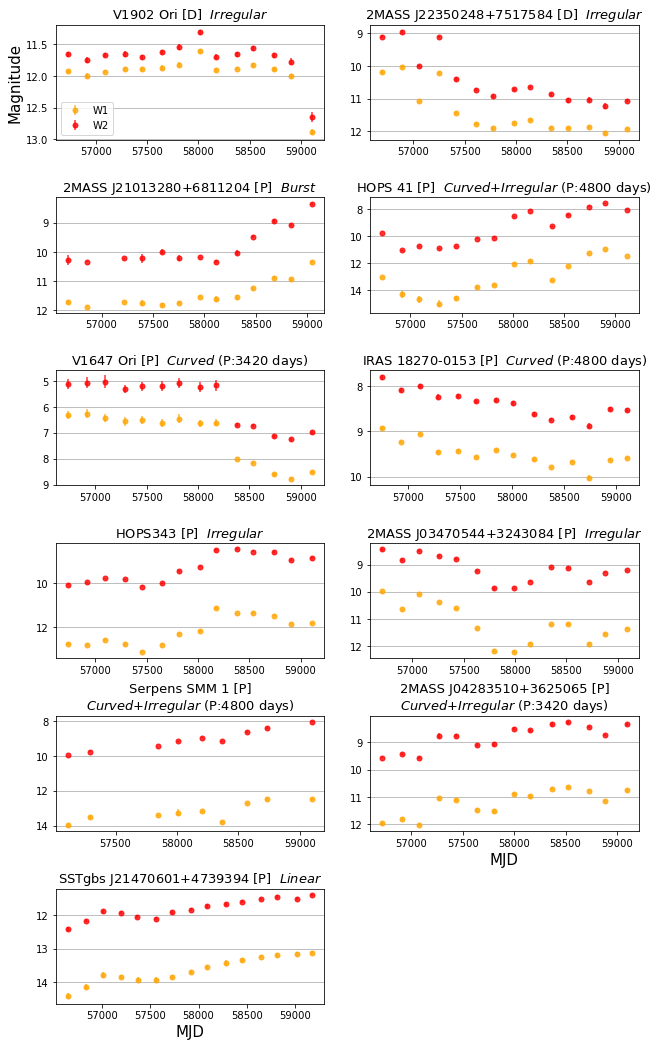

In [51]:
erup_list = [2444,5028,4990,1406,3180,3916,3426,6242,6375,4850,5258]
erup_names = ['V1902 Ori','2MASS J22350248+7517584','2MASS J21013280+6811204','HOPS 41',
              'V1647 Ori', 'IRAS 18270-0153',
             'HOPS343','2MASS J03470544+3243084',
             'Serpens SMM 1','2MASS J04283510+3625065','SSTgbs J21470601+4739394']  #'[FJD2019] 11' --> 'Serpens SMM1'
v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')


k=0  # set k to plot sources in order
with plt.style.context(plt.style.available[11]):
    fig, ax = plt.subplots(6,2,figsize=(10,17))
    
    for i in range(6):
        for j in range(2):
            
            if k > 10:
                ax[i,j].set_visible(False)          # make last plot invisible
                break
            wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
                            +str(erup_list[k])+'_cavg.csv', 
                             names=['mjd','mag','emag','flt','class'],
                             skiprows=1)
            
            
            


            w2av = wavg[(wavg['mjd'] > 56000) &
                                    (wavg['flt'] == 'W2') &
                                    (np.isnan(wavg['mag']) == False) &
                                    (np.isnan(wavg['emag']) == False)]

            w1av = wavg[(wavg['mjd'] > 56000) &
                                    (wavg['flt'] == 'W1') &
                                    (np.isnan(wavg['mag']) == False) &
                                    (np.isnan(wavg['emag']) == False)]

            if k == 0 or k == 1 or k == 6 or k == 7:
                ax[i,j].set_title(erup_names[k]+' [{}]'.format(v2[v2['Index'] == erup_list[k]]['class'].values[0])+
                                  '  $\it{Irregular}$',size=13)
            if k == 2:
                ax[i,j].set_title(erup_names[k]+' [{}]'.format(v2[v2['Index'] == erup_list[k]]['class'].values[0])+
                                  '  $\it{Burst}$',size=13)
            if k == 3 :
                ax[i,j].set_title(erup_names[k]+' [{}]'.format(v2[v2['Index'] == erup_list[k]]['class'].values[0])+
                                  '  $\it{Curved}$+$\it{Irregular}$ '+'(P:{:.0f} days)'.format(v2[v2['Index'] == erup_list[k]]['period'].values[0]),size=13)
            if k == 9 or k == 8:
                ax[i,j].set_title(erup_names[k]+' [{}]'.format(v2[v2['Index'] == erup_list[k]]['class'].values[0])+
                                  '\n$\it{Curved}$+$\it{Irregular}$ '+'(P:{:.0f} days)'.format(v2[v2['Index'] == erup_list[k]]['period'].values[0]),size=13)
            
            if k == 4 or k == 5:
                ax[i,j].set_title(erup_names[k]+' [{}]'.format(v2[v2['Index'] == erup_list[k]]['class'].values[0])+
                                  '  $\it{Curved}$ '+'(P:{:.0f} days)'.format(v2[v2['Index'] == erup_list[k]]['period'].values[0]),size=13)
            if k == 10:
                ax[i,j].set_title(erup_names[k]+' [{}]'.format(v2[v2['Index'] == erup_list[k]]['class'].values[0])+
                                  '  $\it{Linear}$',size=13)
            
            ax[i,j].errorbar(w1av.mjd,w1av.mag,w1av.emag,fmt='.',ms=10,alpha=0.8,color='orange',label='W1')
            ax[i,j].errorbar(w2av.mjd,w2av.mag,w2av.emag,fmt='.',ms=10,alpha=0.8,color='red',label='W2')
            ax[i,j].invert_yaxis()
            ax[i,j].grid(axis='y')
            plt.xticks(size=12)
            plt.yticks(size=12)
#             ax[i,j].set_xticks(size=12)
#             ax[i,j].set_yticks(size=12)
            if k==9 or k==10:
                ax[i,j].set_xlabel('MJD',size=15)
            if k==0:
                ax[i,j].legend()
                ax[i,j].set_ylabel('Magnitude',size=15)
            k+=1
            
            
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.91, top = 0.9, hspace = 0.5, wspace = 0.17)           
plt.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/eruptive_ysos_1.pdf')

In [ ]:
# 2mass delete needed : 7 9 14 15 16

### Amplitude histogram

In [370]:
?ax.hist

[ 0  0  4 13 25  4  4  2  6 21 26  1  0  1] [0.03       0.03756937 0.04704858 0.05891951 0.07378563 0.09240264
 0.11571696 0.14491377 0.18147729 0.22726623 0.28460828 0.35641843
 0.44634717 0.55896603 0.7       ] 108


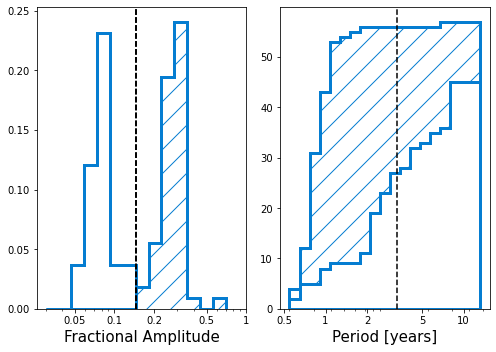

In [5]:
var = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
abc = var[(var.var_type == 'curved') | 
          (var.var_type == 'periodic')]
# abc_per = var[var.var_type == 'periodic']



pr = abc[(abc['class'] == "P")]


di = abc[(abc['class'] == "D")]

ev = abc[(abc['class'] == "PMS+E")]


# plt.scatter(abc.period,abc.sinamp/abc.ls_meanjy)
yso = [pr,di,ev]
y_label = ['P', 'D', 'PMS+E']
y_color=['#ee00b8', '#f4af1b', '#057dd1']

cut=0.145

hamp = ev[ev.amp/ev.ls_meanjy >= cut]
lamp = ev[ev.amp/ev.ls_meanjy < cut]



fig, ax = plt.subplots(1,2,figsize=(7,5))

for i in range(3):
#     if i == 2:
        
    
    counts, bins = np.histogram(yso[i].amp/yso[i].ls_meanjy,
                               bins = np.logspace(np.log10(.3e-1), np.log10(.7),15), density = False)
    counts2,bins2 = np.histogram(hamp.amp/hamp.ls_meanjy,
                                bins = np.logspace(np.log10(.3e-1), np.log10(.7),15), density = False)
    
    if i == 2:
        ax[0].hist(bins[:-1],bins,
    #             bins = np.append(np.linspace(min(yso[0].Sw2*365.25),0,20),np.linspace(0,max(yso[0].Sw2*365.25),20)),
#                 bins = np.logspace(np.log10(0.3e-1),np.log10(0.7),15),   
#                 color='lightgray',
            weights=counts/len(yso[i]),
#                    density = True,
                histtype='step',
                   color='k',
                   
                rwidth=1, edgecolor=y_color[2],
            linewidth=3,
                   alpha=1)
        print(counts, bins, len(yso[i]))
        
        ax[0].hist(bins2[:-1],bins2,
                  weights=counts2/len(yso[i]),
                  histtype='step',
                   color='k',#y_color[i],
                   hatch='/',edgecolor=y_color[2],
                  linewidth=3)
    
#     else:
#         ax[0].hist(bins[:-1],bins,
#     #             bins = np.append(np.linspace(min(yso[0].Sw2*365.25),0,20),np.linspace(0,max(yso[0].Sw2*365.25),20)),
# #                 bins = np.logspace(np.log10(0.3e-1),np.log10(0.7),15),   
# #                 color='lightgray',
#             weights=counts/len(yso[i]),
# #                    density = True,
#                 histtype='step',color=y_color[i] ,
#                 rwidth=1, 
#             linewidth=3,
#                    alpha=1)
                
                
#     ax.hist(yso_lin[i].Sw2*365.25,
#               bins = np.arange(min(yso[0].Sw2*365.25),max(yso[0].Sw2*365.25),0.03),
# #               bins = np.append(np.linspace(min(yso[0].Sw2*365.25),0,20),np.linspace(0,max(yso[0].Sw2*365.25),20)),
#               color=y_color[i],
#               histtype='bar',
#               rwidth=0.8)
    ax[0].set_xscale('log')
    ticks=[0.05,0.1,0.2,0.5,1]
    ax[0].set_xticks(ticks)
    ax[0].set_xticklabels(ticks)
    ax[0].axvline(0.145,color='k',linestyle='--')
    
#     ax.set_ylim(0.7,len(yso[i]))



#period cdf
ax[1].hist(hamp.period,bins=np.logspace(np.log10(200),np.log10(4800),20),
           histtype='step',cumulative=True,linewidth=3,color=y_color[2],hatch='/')
ax[1].hist(lamp.period,bins=np.logspace(np.log10(200),np.log10(4800),20),
           histtype='stepfilled',cumulative=True,linewidth=3,color='w',edgecolor=y_color[2])

ax[1].set_xscale('log')
ticks=[365*0.5, 365, 365*2, 365*5, 365*10]
ax[1].set_xticks(ticks)
ax[1].set_xticklabels([0.5,1,2,5,10])
ax[1].axvline(1200,color='k',linestyle='--')
ax[0].set_xlabel('Fractional Amplitude',size=15)

ax[1].set_xlabel('Period [years]', size=15)

fig.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure13.pdf')

In [6]:
hamp

Index          ra        dec   dist_sd    avg_W1  stdev_W1   avg_eW1  \
875    3519  271.317500  -4.805000  0.064176  7.581618  0.267543  0.070356   
876    3520  271.330833  -4.311111  0.041917  7.860600  0.233652  0.047385   
881    3565  275.417917  -3.309167  0.079201  7.670095  0.306294  0.062703   
884    3586  275.846250  -3.230556  0.064360  7.758076  0.281551  0.057403   
885    3595  276.062500  -3.002500  0.107455  7.226311  0.312334  0.108306   
886    3597  276.085833  -2.977778  0.165341  6.601414  0.233322  0.171850   
887    3599  276.134167  -3.218889  0.068029  7.605400  0.279790  0.068152   
889    3612  276.497500  -3.661111  0.222548  6.286469  0.170335  0.195863   
895    3651  276.837917  -4.199167  0.213731  6.458211  0.274884  0.241285   
898    3671  276.898750  -3.240556  0.046043  8.028445  0.276190  0.042495   
901    3685  276.942917  -3.504167  0.057804  8.617777  0.226776  0.036626   
902    3686  276.944167  -1.391667  0.049178  8.378873  0.271611  0.038524   
913    3718  277.086250  -4.090833  0.181128  6.692868  0.371712  0.177601   
924    3778  277.252917  -2.558333  0.047176  7.946035  0.310160  0.047339   
925    3780  277.254583  -3.572778  0.062954  7.991316  0.270916  0.043473   
947    3866  277.327083  -1.752500  0.066549  8.210100  0.286931  0.038468   
956    3895  277.364167  -2.663333  0.149039  6.751764  0.320124  0.159876   
983    4008  277.507917  -1.462500  0.187240  6.583507  0.195791  0.184311   
987    4020  277.516250  -2.936944  0.074230  8.486513  0.219228  0.035572   
997    4064  277.556667  -2.803333  0.066900  9.011580  0.291728  0.028562   
1013   4136  277.637917  -2.349444  0.065564  8.308783  0.312415  0.037453   
1029   4258  277.811250  -3.555833  0.112829  7.188709  0.285584  0.112970   
1031   4263  277.817083  -1.420000  0.076799  8.235231  0.265161  0.038216   
1033   4272  277.823750  -2.146389  0.082685  7.807821  0.321864  0.065560   
1037   4290  277.845417  -1.906667  0.089654  7.336449  0.351452  0.102059   
1041   4298  277.853750  -3.002500  0.207284  6.698406  0.410297  0.184012   
1055   4350  277.910417  -1.840278  0.222160  6.510942  0.393127  0.194245   
1068   4420  277.984167  -2.697500  0.055096  8.115718  0.294451  0.040689   
1075   4434  277.995833  -2.403889  0.064945  8.095374  0.285825  0.040501   
1081   4461  278.057500  -1.644167  0.206641  6.647964  0.355706  0.185352   
1091   4505  278.150000  -2.090000  0.051587  7.992525  0.215810  0.042150   
1092   4512  278.162500  -2.603333  0.122400  7.181276  0.317834  0.113747   
1094   4516  278.166250  -1.502500  0.088026  7.640420  0.356855  0.077309   
1095   4530  278.204167  -1.655278  0.184744  6.505198  0.195564  0.190133   
1103   4565  278.276667  -2.484722  0.238345  6.421769  0.289545  0.195258   
1108   4578  278.322500  -2.606944  0.067807  8.176785  0.272506  0.038370   
1109   4582  278.333333  -1.534722  0.065856  7.948753  0.299660  0.049713   
1110   4584  278.336667  -2.799167  0.051798  8.668272  0.209467  0.034948   
1116   4631  279.171250   0.320556  0.070685  7.573095  0.248672  0.072980   
1123   4667  279.388333   0.095278  0.049758  8.746763  0.294894  0.033249   
1132   4712  279.574583  -0.112778  0.057292  8.378998  0.295798  0.038147   
1139   4753  279.741250  -0.188889  0.075007  7.508280  0.256970  0.077256   
1145   4790  279.917500   0.027222  0.052105  8.488107  0.294903  0.037065   
1148   4797  279.976250   0.070556  0.075219  7.477610  0.304045  0.083716   
1149   4805  280.046667   0.246111  0.229635  6.512949  0.298697  0.196555   
1150   4812  280.065417   0.183611  0.052088  8.674631  0.219602  0.034452   
1153   4820  280.107500   0.306111  0.050533  8.474567  0.216025  0.036504   
1200   4953   67.724583  35.503056  0.060284  9.575000  0.172907  0.038196   
1250   5120  167.475000 -76.490278  0.151778  8.739423  0.123723  0.038073   
1322   5386  242.025417 -39.206111  0.083713  7.386512  0.295109  0.093853   
1346   5484  245.720833 -37.

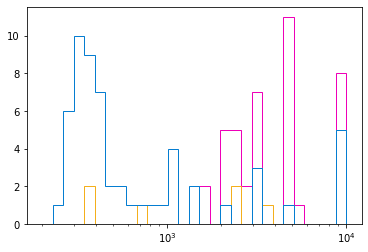

In [124]:
# period histogram
hist_retp=[]
for i in range(len(yso_period)):
    hist_retp.append(plt.hist(yso_period[i].period,histtype='step',
            bins=np.logspace(np.log10(200),np.log10(10000),30),
            color = y_color[i], label=y_label[i]))
plt.xscale('log')

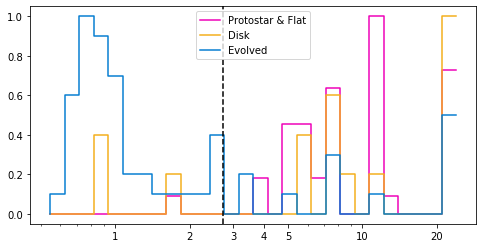

In [140]:
plt.figure(figsize=(8,4))
for i in range(len(yso_hist)):
    plt.step(hist_retp[i][1][:len(hist_retp[i][1])-1]/365.25,hist_retp[i][0]/max(hist_retp[i][0]),
             color = yf_color[i],label=yf_label[i])
plt.xscale('log')
# plt.xlim(200,8000)
plt.xticks([1,2,3,4,5,10,20], [1,2,3,4,5,10,20])
# plt.xlabel('DeltaW2 (Max - Min)')
# plt.ylabel('DeltaW2 (Max - Min)')
plt.axvline(1000/365.25,linestyle='--', color='k')
plt.legend(frameon=True)
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/delw2_hist.pdf')

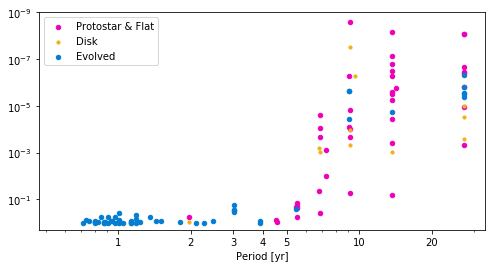

In [10]:
plt.figure(figsize=(8,4))
for i in range(len(yso_period)):
    plt.scatter(yso_period[i].period/365.25, yso_period[i].linear_fap,
               s = yf_size[i], c=yf_color[i],label=yf_label[i],marker=yf_marker[i])

plt.xscale('log')
plt.yscale('log')
plt.xticks([1,2,3,4,5,10,20], [1,2,3,4,5,10,20])
plt.ylim(2,1e-9)
# plt.gca().invert_yaxis()
plt.xlabel('Period [yr]')
# plt.ylabel('Linear FAP')
# plt.axvline(1000/365.25,linestyle='--', color='k')
plt.legend()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/period_linfap_scatter.pdf')

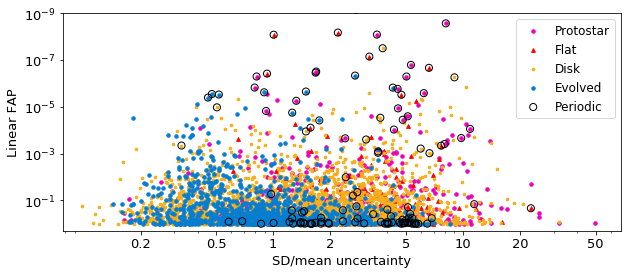

In [16]:
#sqrt(chi2_wmean) vs linear fap plot
yso_period = [prfl[prfl['baluev_fap']<0.01], 
              di[di['baluev_fap']<0.001],
              ev[ev['baluev_fap']<0.01] ]

y_label = ['Protostar', 'Flat',
           'Disk', 'Evolved']
y_color=['#ee00b8', 'red',
         '#f4af1b', '#057dd1']
y_size=[12,14,7,12]
y_marker = ['o','^','o','o']
plt.figure(figsize=(10,4))
for i in range(len(yso)):
    plt.scatter(yso[i].sd_sdfid_w2_flux, yso[i].linear_fap,
               s = y_size[i], c=y_color[i],label=y_label[i],marker=y_marker[i])

for i in range(len(yso_period)):
    if i == 0:
        plt.scatter(yso_period[i].sd_sdfid_w2_flux, yso_period[i].linear_fap,
               s = 50, facecolors='none', edgecolors='k',label='Periodic')
    else:
        plt.scatter(yso_period[i].sd_sdfid_w2_flux, yso_period[i].linear_fap,
               s = 50, facecolors='none', edgecolors='k')
        
        #sd_sdfid_w2_flux
    
plt.xscale('log')
plt.yscale('log')
plt.xticks([0.2,0.5,1,2,5,10,20,50], [0.2,0.5,1,2,5,10,20,50],size=13)
plt.ylim(1e-9,2)
# plt.xlim(2e-1,1e2)
plt.gca().invert_yaxis()
plt.xlabel('SD/mean uncertainty',size=13)
plt.ylabel('Linear FAP',size=13)
plt.yticks(size=13)
# plt.axvline(1000/365.25,linestyle='--', color='k')
plt.legend(fontsize=12)
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/sdsdfid_linfap_scat_v3.pdf')

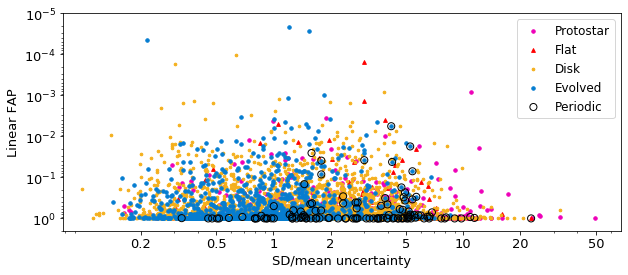

In [21]:
## linfap after removing sinusoid

#sqrt(chi2_wmean) vs linear fap plot
yso_period = [prfl[prfl['baluev_fap']<0.01], 
              di[di['baluev_fap']<0.001],
              ev[ev['baluev_fap']<0.01] ]

y_label = ['Protostar', 'Flat',
           'Disk', 'Evolved']
y_color=['#ee00b8', 'red',
         '#f4af1b', '#057dd1']
y_size=[12,14,7,12]
y_marker = ['o','^','o','o']
plt.figure(figsize=(10,4))
for i in range(len(yso)):
    plt.scatter(yso[i].sd_sdfid_w2_flux, yso[i].linear_fap_periodrmv,
               s = y_size[i], c=y_color[i],label=y_label[i],marker=y_marker[i])

for i in range(len(yso_period)):
    if i == 0:
        plt.scatter(yso_period[i].sd_sdfid_w2_flux, yso_period[i].linear_fap_periodrmv,
               s = 50, facecolors='none', edgecolors='k',label='Periodic')
    else:
        plt.scatter(yso_period[i].sd_sdfid_w2_flux, yso_period[i].linear_fap_periodrmv,
               s = 50, facecolors='none', edgecolors='k')
        
        #sd_sdfid_w2_flux
    
plt.xscale('log')
plt.yscale('log')
plt.xticks([0.2,0.5,1,2,5,10,20,50], [0.2,0.5,1,2,5,10,20,50],size=13)
plt.ylim(1e-5,2)
# plt.xlim(2e-1,1e2)
plt.gca().invert_yaxis()
plt.xlabel('SD/mean uncertainty',size=13)
plt.ylabel('Linear FAP',size=13)
plt.yticks(size=13)
# plt.axvline(1000/365.25,linestyle='--', color='k')
plt.legend(fontsize=12)
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/sdsdfid_linfap_scat_v3.pdf')

Text(0.5, 1.0, 'random variable, not periodic')

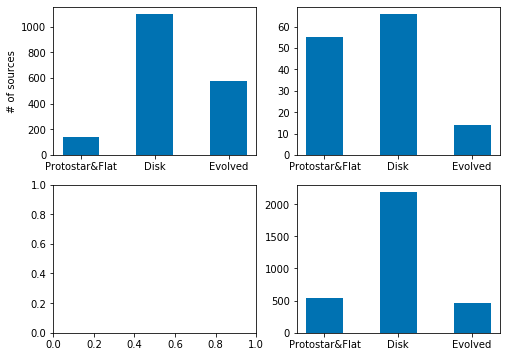

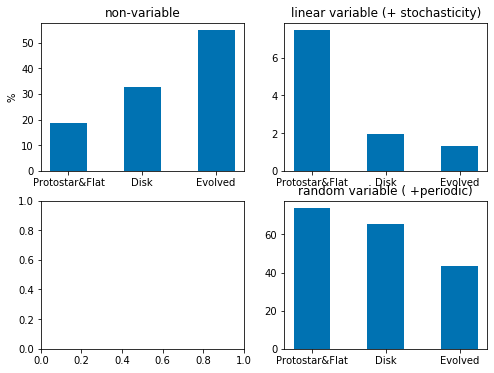

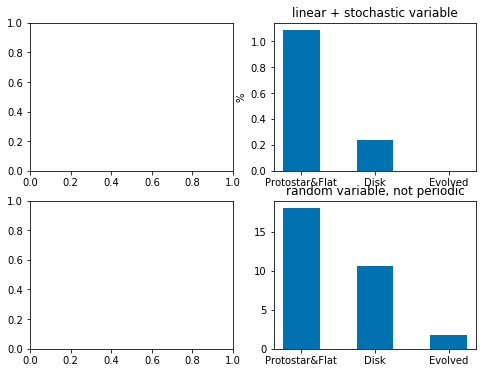

In [22]:
prfl1 = prfl[(prfl.sd_sdfid_w2_flux < 1)]
di1 = di[(di.sd_sdfid_w2_flux < 1) ]
ev1 = ev[(ev.sd_sdfid_w2_flux < 1) ]

#linear variable
prfl2 = prfl[(prfl.sd_sdfid_w2_flux > 1) & (prfl.linear_fap < 0.001)]
di2 = di[(di.sd_sdfid_w2_flux > 1) & (di.linear_fap < 0.001)]
ev2 = ev[(ev.sd_sdfid_w2_flux > 1) & (ev.linear_fap < 0.001)]

#not linear variable ( +periodic )
prfl3 = prfl[(prfl.sd_sdfid_w2_flux > 1) & (prfl.linear_fap > 0.001)]
di3 = di[(di.sd_sdfid_w2_flux > 1) & (di.linear_fap > 0.001)]
ev3 = ev[(ev.sd_sdfid_w2_flux > 1) & (ev.linear_fap > 0.001)]

#linear + stochastic variable
prfl4 = prfl[(prfl.sd_sdfid_periodrmv > 3) & (prfl.linear_fap < 0.001)]
di4 = di[(di.sd_sdfid_periodrmv > 3) & (di.linear_fap < 0.001)]
ev4 = ev[(ev.sd_sdfid_periodrmv > 3) & (ev.linear_fap < 0.001)]

#not linear, not periodic variable
prfl5 = prfl[(prfl.sd_sdfid_periodrmv > 3) & (prfl.linear_fap > 0.001)]
di5 = di[(di.sd_sdfid_periodrmv > 3) & (di.linear_fap > 0.001)]
ev5 = ev[(ev.sd_sdfid_periodrmv > 3) & (ev.linear_fap > 0.001)]


yso_label = ['Protostar&Flat', 
             'Disk', 
             'Evolved']

b1 = [len(prfl1), len(di1), len(ev1)]
b2 = [len(prfl2), len(di2), len(ev2)]
b3 = [len(prfl3), len(di3), len(ev3)]

bb1 = [len(prfl1)/len(prfl), len(di1)/len(di), len(ev1)/len(ev)]
bb2 = [len(prfl2)/len(prfl), len(di2)/len(di), len(ev2)/len(ev)]
bb3 = [len(prfl3)/len(prfl), len(di3)/len(di), len(ev3)/len(ev)]

bbb1 = [len(prfl4)/len(prfl), len(di4)/len(di), len(ev4)/len(ev)]
bbb2 = [len(prfl5)/len(prfl), len(di5)/len(di), len(ev5)/len(ev)]

# region = np.array([['Region1', 'Region4'], ['Region2', 'Region3']])

fig, ax= plt.subplots(2,2,figsize=(8,6))

ax[0,0].bar(yso_label,b1,width=0.5)
ax[0,0].set_ylabel('# of sources')

ax[0,1].bar(yso_label,b2,width=0.5)

ax[1,1].bar(yso_label,b3,width=0.5)

# ax[0,1].bar(yso_label,b4,width=0.5)

# ax[0,0].bar(yso_label,pb1,width=0.5)
# ax[1,0].bar(yso_label,pb2,width=0.5)
# ax[1,1].bar(yso_label,pb3,width=0.5)
# ax[0,1].bar(yso_label,pb4,width=0.5)

fig2, ax2 = plt.subplots(2,2,figsize=(8,6))
ax2[0,0].bar(yso_label,np.array(bb1)*100,width=0.5)
ax2[0,0].set_title('non-variable')
ax2[0,0].set_ylabel('%')

ax2[0,1].bar(yso_label,np.array(bb2)*100,width=0.5)
ax2[0,1].set_title('linear variable (+ stochasticity)')
ax2[1,1].bar(yso_label,np.array(bb3)*100,width=0.5)
ax2[1,1].set_title('random variable ( +periodic)')

fig3, ax3 = plt.subplots(2,2,figsize=(8,6))
# ax2[0,0].bar(yso_label,np.array(bb1)*100,width=0.5)
# ax2[0,0].set_title('non-variable')
# ax2[0,0].set_ylabel('%')

ax3[0,1].bar(yso_label,np.array(bbb1)*100,width=0.5)
ax3[0,1].set_title('linear + stochastic variable')
ax3[0,1].set_ylabel('%')
ax3[1,1].bar(yso_label,np.array(bbb2)*100,width=0.5)
ax3[1,1].set_title('random variable, not periodic')

<BarContainer object of 2 artists>

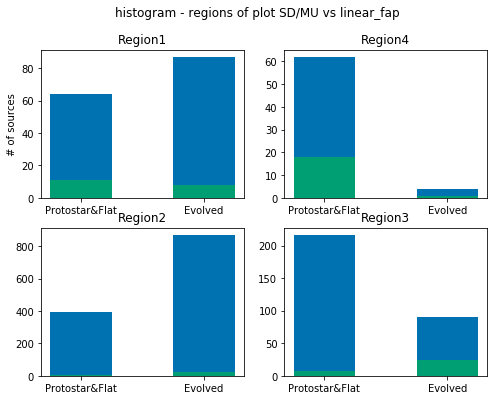

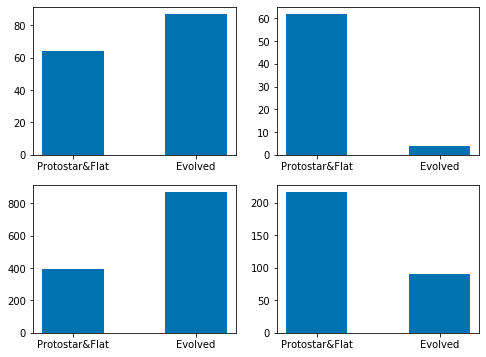

In [65]:
# bar plot by region
# counter-clockwise
# region 1 - low SD, linear
prfl1 = prfl[(prfl.sd_sdfid_w2_flux < 3) & (prfl.linear_fap < 0.01)]
dprfl1 = prfl[(prfl.sd_sdfid_w2_flux < 3) & (prfl.linear_fap < 0.01) & (prfl.baluev_fap < 0.01)]
di1 = di[(di.sd_sdfid_w2_flux < 3) & (di.linear_fap < 0.01)]
ddi1 = di[(di.sd_sdfid_w2_flux < 3) & (di.linear_fap < 0.01) & (di.baluev_fap < 0.01)]
ev1 = ev[(ev.sd_sdfid_w2_flux < 3) & (ev.linear_fap < 0.01)]
dev1 = ev[(ev.sd_sdfid_w2_flux < 3) & (ev.linear_fap < 0.01) & (ev.baluev_fap < 0.01)]
# dev1

b1 = np.array([len(prfl1), 
#                len(di1),
               len(ev1)])

# region 2 - low SD, not linear
prfl2 = prfl[(prfl.sd_sdfid_w2_flux < 3) & (prfl.linear_fap > 0.01)]
di2 = di[(di.sd_sdfid_w2_flux < 3) & (di.linear_fap > 0.01)]
ev2 = ev[(ev.sd_sdfid_w2_flux < 3) & (ev.linear_fap > 0.01)]
dprfl2 = prfl[(prfl.sd_sdfid_w2_flux < 3) & (prfl.linear_fap > 0.01) & (prfl.baluev_fap < 0.01)]
ddi2 = di[(di.sd_sdfid_w2_flux < 3) & (di.linear_fap > 0.01) & (di.baluev_fap < 0.01)]
dev2 = ev[(ev.sd_sdfid_w2_flux < 3) & (ev.linear_fap > 0.01) & (ev.baluev_fap < 0.01)]
b2 = np.array([len(prfl2), 
#                len(di2),
               len(ev2)])
# region 3 - high SD, not linear
prfl3 = prfl[(prfl.sd_sdfid_w2_flux > 3) & (prfl.linear_fap > 0.01)]
di3 = di[(di.sd_sdfid_w2_flux > 3) & (di.linear_fap > 0.01)]
ev3 = ev[(ev.sd_sdfid_w2_flux > 3) & (ev.linear_fap > 0.01)]
dprfl3 = prfl[(prfl.sd_sdfid_w2_flux > 3) & (prfl.linear_fap > 0.01) & (prfl.baluev_fap < 0.01)]
ddi3 = di[(di.sd_sdfid_w2_flux > 3) & (di.linear_fap > 0.01) & (di.baluev_fap < 0.01)]
dev3 = ev[(ev.sd_sdfid_w2_flux > 3) & (ev.linear_fap > 0.01) & (ev.baluev_fap < 0.01)]
b3 = np.array([len(prfl3), 
#                len(di3),
               len(ev3)])
# region 4 - high SD, linear
prfl4 = prfl[(prfl.sd_sdfid_w2_flux > 3) & (prfl.linear_fap < 0.01)]
di4 = di[(di.sd_sdfid_w2_flux > 3) & (di.linear_fap < 0.01)]
ev4 = ev[(ev.sd_sdfid_w2_flux > 3) & (ev.linear_fap < 0.01)]
dprfl4 = prfl[(prfl.sd_sdfid_w2_flux > 3) & (prfl.linear_fap < 0.01) & (prfl.baluev_fap < 0.01)]
ddi4 = di[(di.sd_sdfid_w2_flux > 3) & (di.linear_fap < 0.01) & (di.baluev_fap < 0.01)]
dev4 = ev[(ev.sd_sdfid_w2_flux > 3) & (ev.linear_fap < 0.01) & (ev.baluev_fap < 0.01)]
b4 = np.array([len(prfl4), 
#                len(di4),
               len(ev4)])

pb1 = np.array([len(dprfl1), 
#                len(di4),
               len(dev1)])
pb2 = np.array([len(dprfl2), 
#                len(di4),
               len(dev2)])
pb3 = np.array([len(dprfl3), 
#                len(di4),
               len(dev3)])
pb4 = np.array([len(dprfl4), 
#                len(di4),
               len(dev4)])



yso_label = ['Protostar&Flat', 
#              'Disk', 
             'Evolved']
region = np.array([['Region1', 'Region4'], ['Region2', 'Region3']])

fig, ax= plt.subplots(2,2,figsize=(8,6))

ax[0,0].bar(yso_label,b1,width=0.5)
ax[0,0].set_ylabel('# of sources')
ax[1,0].bar(yso_label,b2,width=0.5)
ax[1,1].bar(yso_label,b3,width=0.5)
ax[0,1].bar(yso_label,b4,width=0.5)
ax[0,0].bar(yso_label,pb1,width=0.5)
ax[1,0].bar(yso_label,pb2,width=0.5)
ax[1,1].bar(yso_label,pb3,width=0.5)
ax[0,1].bar(yso_label,pb4,width=0.5)

plt.suptitle('histogram - regions of plot SD/MU vs linear_fap')


for j in [0,1]:
    for i in [0,1]:
        ax[i,j].set_title(region[i,j])

b2
# axw.plot([1,2,3])

# pr,fl,
#        di,ev

fig1, ax1 = plt.subplots(2,2,figsize=(8,6))
ax1[0,0].bar(yso_label,b1,width=0.5)


ax1[1,0].bar(yso_label,b2,width=0.5)


ax1[1,1].bar(yso_label,b3,width=0.5)


ax1[0,1].bar(yso_label,b4,width=0.5)



# plt.suptitle('histogram - regions of plot SD/MU vs linear_fap')


# for j in [0,1]:
#     for i in [0,1]:
#         ax[i,j].set_title(region[i,j])

array([0.53396739, 0.72908604, 0.82716049])

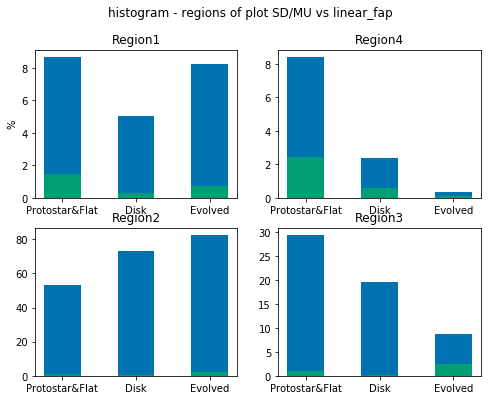

In [68]:
# bar plot by region
# counter-clockwise
# region 1 - low SD, linear
prfl1 = prfl[(prfl.sd_sdfid_w2_flux < 3) & (prfl.linear_fap < 0.01)]
di1 = di[(di.sd_sdfid_w2_flux < 3) & (di.linear_fap < 0.01)]
ev1 = ev[(ev.sd_sdfid_w2_flux < 3) & (ev.linear_fap < 0.01)]
b1 = np.array([len(prfl1)/len(prfl), 
               len(di1)/len(di),
               len(ev1)/len(ev)])

# region 2 - low SD, not linear
prfl2 = prfl[(prfl.sd_sdfid_w2_flux < 3) & (prfl.linear_fap > 0.01)]
di2 = di[(di.sd_sdfid_w2_flux < 3) & (di.linear_fap > 0.01)]
ev2 = ev[(ev.sd_sdfid_w2_flux < 3) & (ev.linear_fap > 0.01)]
b2 = np.array([len(prfl2)/len(prfl), 
               len(di2)/len(di),
               len(ev2)/len(ev)])
# region 3 - high SD, not linear
prfl3 = prfl[(prfl.sd_sdfid_w2_flux > 3) & (prfl.linear_fap > 0.01)]
di3 = di[(di.sd_sdfid_w2_flux > 3) & (di.linear_fap > 0.01)]
ev3 = ev[(ev.sd_sdfid_w2_flux > 3) & (ev.linear_fap > 0.01)]
b3 = np.array([len(prfl3)/len(prfl), 
               len(di3)/len(di),
               len(ev3)/len(ev)])
# region 4 - high SD, linear
prfl4 = prfl[(prfl.sd_sdfid_w2_flux > 3) & (prfl.linear_fap < 0.01)]
di4 = di[(di.sd_sdfid_w2_flux > 3) & (di.linear_fap < 0.01)]
ev4 = ev[(ev.sd_sdfid_w2_flux > 3) & (ev.linear_fap < 0.01)]
b4 = np.array([len(prfl4)/len(prfl), 
               len(di4)/len(di),
               len(ev4)/len(ev)])


yso_label = ['Protostar&Flat', 
             'Disk', 
             'Evolved']
region = np.array([['Region1', 'Region4'], ['Region2', 'Region3']])

pb1 = np.array([len(dprfl1)/len(prfl), 
               len(ddi1)/len(di),
               len(dev1)/len(ev)])
pb2 = np.array([len(dprfl2)/len(prfl), 
               len(ddi2)/len(di),
               len(dev2)/len(ev)])
pb3 = np.array([len(dprfl3)/len(prfl), 
               len(ddi3)/len(di),
               len(dev3)/len(ev)])
pb4 = np.array([len(dprfl4)/len(prfl), 
               len(ddi4)/len(di),
               len(dev4)/len(ev)])



fig, ax= plt.subplots(2,2,figsize=(8,6))

ax[0,0].bar(yso_label,b1*100,width=0.5)
ax[0,0].set_ylabel('%')
ax[1,0].bar(yso_label,b2*100,width=0.5)
ax[1,1].bar(yso_label,b3*100,width=0.5)
ax[0,1].bar(yso_label,b4*100,width=0.5)

ax[0,0].bar(yso_label,pb1*100,width=0.5)
ax[1,0].bar(yso_label,pb2*100,width=0.5)
ax[1,1].bar(yso_label,pb3*100,width=0.5)
ax[0,1].bar(yso_label,pb4*100,width=0.5)

plt.suptitle('histogram - regions of plot SD/MU vs linear_fap')


for j in [0,1]:
    for i in [0,1]:
        ax[i,j].set_title(region[i,j])

b2
# axw.plot([1,2,3])

# pr,fl,
#        di,ev

# fig1, ax1 = plt.subplots(2,2,figsize=(8,6))
# ax1[0,0].bar(yso_label,b1,width=0.5)
# ax1[1,0].bar(yso_label,b2,width=0.5)
# ax1[1,1].bar(yso_label,b3,width=0.5)
# ax1[0,1].bar(yso_label,b4,width=0.5)

# plt.suptitle('histogram - regions of plot SD/MU vs linear_fap')


# for j in [0,1]:
#     for i in [0,1]:
#         ax[i,j].set_title(region[i,j])

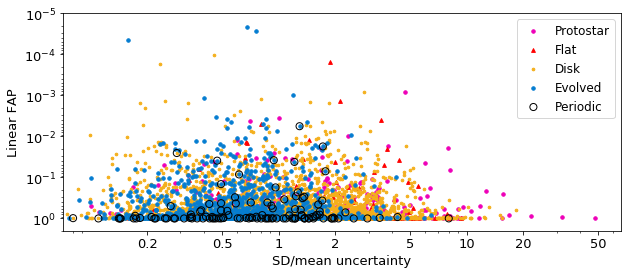

In [23]:
#sqrt(chi2_wmean) vs linear fap plot
yso_period = [prfl[prfl['baluev_fap']<0.01], 
              di[di['baluev_fap']<0.001],
              ev[ev['baluev_fap']<0.01] ]

y_label = ['Protostar', 'Flat',
           'Disk', 'Evolved']
y_color=['#ee00b8', 'red',
         '#f4af1b', '#057dd1']
y_size=[12,14,7,12]
y_marker = ['o','^','o','o']
plt.figure(figsize=(10,4))
for i in range(len(yso)):
    plt.scatter(yso[i].sd_sdfid_periodrmv_w2, yso[i].linear_fap_periodrmv,
               s = y_size[i], c=y_color[i],label=y_label[i],marker=y_marker[i])

for i in range(len(yso_period)):
    if i == 0:
        plt.scatter(yso_period[i].sd_sdfid_periodrmv_w2, yso_period[i].linear_fap_periodrmv,
               s = 50, facecolors='none', edgecolors='k',label='Periodic')
    else:
        plt.scatter(yso_period[i].sd_sdfid_periodrmv_w2, yso_period[i].linear_fap_periodrmv,
               s = 50, facecolors='none', edgecolors='k')
        
        #sd_sdfid_w2_flux
    
plt.xscale('log')
plt.yscale('log')
plt.xticks([0.2,0.5,1,2,5,10,20,50], [0.2,0.5,1,2,5,10,20,50],size=13)
plt.ylim(1e-5,2)
# plt.xlim(2e-1,1e2)
plt.gca().invert_yaxis()
plt.xlabel('SD/mean uncertainty',size=13)
plt.ylabel('Linear FAP',size=13)
plt.yticks(size=13)
# plt.axvline(1000/365.25,linestyle='--', color='k')
plt.legend(fontsize=12)
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/sdsdfid_linfap_scat_v3.pdf')

In [17]:
yso[0].columns

Index(['Index', 'ra', 'dec', 'avg_W1', 'stdev_W1', 'avg_eW1', 'avg_W2',
       'stdev_W2', 'avg_eW2', 'N_w1', 'N_w2', 's_ds_w1', 's_ds_w2',
       'sd_sdfid_w1_flux', 'sd_sdfid_w2_flux', 'sd_sdfid_w1_mag',
       'sd_sdfid_w2_mag', 'Deltaall_w1', 'Deltaall_w2', 'class', 'catalogue',
       'Sw1', 'DeltaSw1', 'Sw2', 'DeltaSw2', 'SDw1', 'SDfidw1', 'SDw2',
       'SDfidw2', 'chi2_mean_w1', 'chi2_wmean_w1', 'chi2_slope_w1',
       'chi2_mean_w2', 'chi2_wmean_w2', 'chi2_slope_w2', 'period',
       'baluev_fap', 'boot_fap_1000', 'power', 'sd_sdfid_periodrmv_w2',
       'sd_periodrmv_w2', 'amp', 'ls_meanjy', 'chi2_period_w2', 'linear_fap',
       'Cloud', 'ID', 'Tbol', 'SimbadName', '_RA', '_DE', 'AGB', 'Seq',
       'col9'],
      dtype='object')

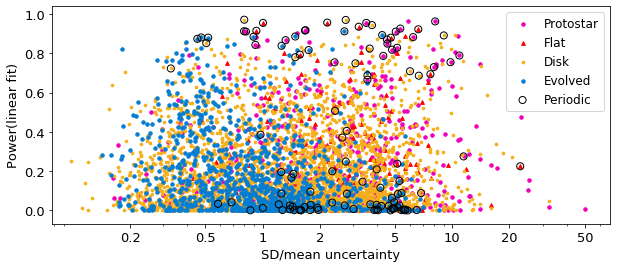

In [35]:
#sdsdfid vs power(linear fit) plot
yso_period = [prfl[prfl['baluev_fap']<0.01], 
              di[di['baluev_fap']<0.001],
              ev[ev['baluev_fap']<0.01] ]

y_label = ['Protostar', 'Flat',
           'Disk', 'Evolved']
y_color=['#ee00b8', 'red',
         '#f4af1b', '#057dd1']
y_size=[12,14,7,12]
y_marker = ['o','^','o','o']
plt.figure(figsize=(10,4))

# power (linear fit)


for i in range(len(yso)):
    
    chimean = yso[i].chi2_wmean_w2
    chilin = yso[i].chi2_slope_w2
    power_lin = (chimean - chilin)/chimean
    plt.scatter(yso[i].sd_sdfid_w2_flux, power_lin,
               s = y_size[i], c=y_color[i],label=y_label[i],marker=y_marker[i])

for i in range(len(yso_period)):
    chimean = yso_period[i].chi2_wmean_w2
    chilin = yso_period[i].chi2_slope_w2
    power_lin = (chimean - chilin)/chimean
    if i == 0:
        plt.scatter(yso_period[i].sd_sdfid_w2_flux, power_lin,
               s = 50, facecolors='none', edgecolors='k',label='Periodic')
    else:
        plt.scatter(yso_period[i].sd_sdfid_w2_flux, power_lin,
               s = 50, facecolors='none', edgecolors='k')
    
plt.xscale('log')
# plt.yscale('log')
plt.xticks([0.2,0.5,1,2,5,10,20,50], [0.2,0.5,1,2,5,10,20,50], size=13)
plt.yticks(size=13)
# plt.ylim(1e-9,2)
# plt.xlim(2e-1,1e2)
# plt.gca().invert_yaxis()
plt.xlabel('SD/mean uncertainty',size=13)
plt.ylabel('Power(linear fit)',size=13)
# plt.axvline(1000/365.25,linestyle='--', color='k')
plt.legend(fontsize=12)
plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/sdsdfid_powerlin_scat.pdf')

In [119]:
yf_size=[30,20,30]
yf_label = ['Protostar & Flat',
           'Disk', 'Evolved']
yf_color=['#ee00b8', 
         '#f4af1b', '#057dd1']

yf_marker = ['o','o','o']


plt.figure(figsize=(6,6))
for i in range(len(yso_hist)):
    plt.scatter(yso_hist[i].baluev_fap, yso_hist[i].linear_fap,
               s = yf_size[i], c=yf_color[i],label=yf_label[i],marker=yf_marker[i])

    
plt.axhline(1e-3,linestyle='--',color='k',linewidth=3)
plt.axvline(1e-2,linestyle='--',color='k',linewidth=3)
plt.xscale('log')
plt.yscale('log')
# plt.xticks([1,2,3,4,5,10,20], [1,2,3,4,5,10,20])
plt.ylim(2,1e-9)
plt.xlim(2,1e-9)
# plt.gca().invert_yaxis()
plt.yticks(size=13)
plt.xticks(size=13)
plt.xlabel('Baluev FAP',size=13)
plt.ylabel('Linear FAP',size=13)
# plt.axvline(1e-2,linestyle='--',linewidth=3, color='k')
# plt.axvline(1e-3,linestyle='-.',linewidth=2, color='k')
plt.legend(fontsize=12)
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/fap_lin_baluev_line.pdf')

NameError: name 'yso_hist' is not defined

<Figure size 432x432 with 0 Axes>

## Baluev FAP vs. Linear FAP 

In [3]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
ab

Index         ra        dec   dist_sd     avg_W1  stdev_W1   avg_eW1  \
0         1  85.677833 -10.419250  0.044337   8.611724  0.283801  0.046935   
1         2  85.627292 -10.179944  0.178331  14.798462  0.043689  0.132302   
2         3  85.756625 -10.130639  0.211779  14.825351  0.032513  0.122363   
3         4  85.554458 -10.093028  0.048744  12.196857  0.241949  0.031731   
4         5  85.632375 -10.090611  0.035782  10.821006  0.137579  0.037453   
...     ...        ...        ...       ...        ...       ...       ...   
5393  10514  77.177249  30.449120  0.050103  10.519293  0.007780  0.020583   
5394  10515  77.331876  28.925760  0.048521  11.163828  0.006615  0.023649   
5395  10516  77.368540  29.049981  0.042942   9.775610  0.008445  0.020463   
5396  10518  77.499075  30.611616  0.068673  10.173376  0.014366  0.025418   
5397  10519  78.114949  22.896918  0.038216   8.910819  0.042575  0.036739   

         avg_W2  stdev_W2   avg_eW2  ...  single_fap  mod_baluev_fap  \
0      7.382148  0.253778  0.052072  ...    0.006580        0.027262   
1     13.788108  0.050008  0.170318  ...    0.003426        0.299895   
2     13.898670  0.034491  0.175124  ...    0.031400        0.318501   
3     10.638705  0.236847  0.027966  ...    0.001153        0.008402   
4     10.080570  0.153731  0.033459  ...    0.027782        0.149844   
...         ...       ...       ...  ...         ...             ...   
5393  10.276326  0.012243  0.022640  ...    0.003721        0.021492   
5394  10.940477  0.011708  0.030347  ...    0.008376        0.033764   
5395   9.808915  0.004754  0.020920  ...    0.012913        0.368965   
5396  10.040365  0.014636  0.024785  ...    0.000045        0.000535   
5397   8.661561  0.047317  0.042184  ...    0.015518        0.282400   

           amp    sinamp  ls_meanjy  sd_sdfid_periodrmv  sd_periodrmv  \
0     0.051750  0.052171   0.200031            2.768036      0.026550   
1     0.000027  0.000027   0.000524            0.176672      0.000015   
2     0.000015  0.000015   0.000475            0.142894      0.000011   
3     0.002355  0.002355   0.009534            4.950635      0.001239   
4     0.002172  0.002172   0.015875            3.818910      0.001878   
...        ...       ...        ...                 ...           ...   
5393  0.000158  0.000158   0.013329            0.333483      0.000093   
5394  0.000078  0.000078   0.007218            0.246784      0.000050   
5395  0.000098  0.000098   0.020503            0.163666      0.000065   
5396  0.000265  0.000265   0.016534            0.246356      0.000093   
5397  0.002772  0.002772   0.059068            0.761557      0.001747   

      chi2_period_w2  linear_fap_periodrmv  Deltaw2_periodrmv  
0         105.185243              0.978935           0.562302  
1           0.437907              0.464680           0.098793  
2           0.323007              0.615908           0.099470  
3         320.576981              0.992396           0.425474  
4         179.741718              0.396039           0.497998  
...              ...                   ...                ...  
5393        1.638406              0.992353           0.026105  
5394        0.818058              0.999465           0.028427  
5395        0.375365              0.593155           0.012789  
5396        0.797886              0.999964           0.019167  
5397        8.022822              0.908944           0.089209  

[5398 rows x 61 columns]

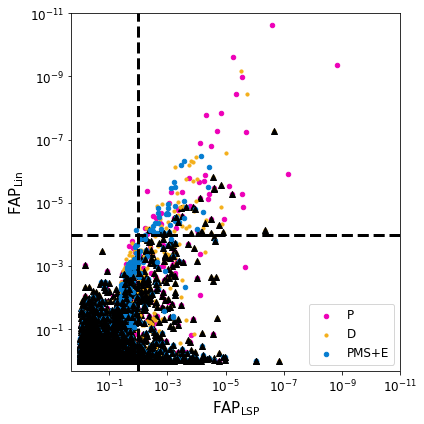

In [21]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
abc = ab



# abc = abc[(abc['mod_baluev_fap'] < 0.001)]
# abc_linear = abc[abc['linear_fap_w2'] < 0.001]

pr = abc[(abc['class'] == "P")]


di = abc[(abc['class'] == "D")
        ]

ev = abc[(abc['class'] == "PMS+E") 
        ]

yso = [pr,di,ev]
y_label = ['P', 'D', 'PMS+E']
y_color=['#ee00b8', '#f4af1b', '#057dd1']


yf_size=[20,10,20]
yf_marker = ['o','o','o']


plt.figure(figsize=(6,6))
for i in range(len(yso)):
    plt.scatter(yso[i].mod_baluev_fap, yso[i].linear_fap_w2,
               s = yf_size[i], c=y_color[i],label=y_label[i],marker=yf_marker[i])

    plt.scatter(yso[i][yso[i].period < 4800].mod_baluev_fap,
           yso[i][yso[i].period < 4800].linear_fap_w2,marker='^',c='k',edgecolor='k')
    
plt.axhline(1e-4,linestyle='--',color='k',linewidth=3)
# plt.axvline(1e-3,linestyle='--',color='k',linewidth=3)
plt.axvline(1e-2,linestyle='--',color='k',linewidth=3)
plt.xscale('log')
plt.yscale('log')
# plt.xticks([1,2,3,4,5,10,20], [1,2,3,4,5,10,20])
plt.ylim(2,1e-11)
plt.xlim(2,1e-11)
# plt.gca().invert_yaxis()
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel(r'FAP$_{\rm LSP}$',size=15)
plt.ylabel(r'FAP$_{\rm Lin}$',size=15)
# plt.axvline(1e-2,linestyle='--',linewidth=3, color='k')
# plt.axvline(1e-3,linestyle='-.',linewidth=2, color='k')
plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()
# plt.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure6.pdf')

## Slope histogram plot

In [354]:
abc.columns

Index(['s_index', 'ra', 'dec', 'dist_sd', 'avg_W1', 'stdev_W1', 'avg_eW1',
       'avg_W2', 'stdev_W2', 'avg_eW2', 'N_w1', 'N_w2', 'slope_w1', 'slope_w2',
       'sd_sdfid_w1_flux', 'sd_sdfid_w2_flux', 'sd_sdfid_w1_mag',
       'sd_sdfid_w2_mag', 'Delta_w1', 'Delta_w2', 'Delta_w1_flux',
       'Delta_w2_flux', 'class', 'catalogue', 'Sw1', 'DeltaSw1', 'Sw2',
       'DeltaSw2', 'SDw1', 'SDfidw1', 'SDw2', 'SDfidw2', 'chi2_mean_w1',
       'chi2_wmean_w1', 'chi2_slope_w1', 'chi2_mean_w2', 'chi2_wmean_w2',
       'chi2_slope_w2', 'linear_fap_w1', 'linear_fap_w2', 'center_mag_w1',
       'center_mag_w2', 'period', 'baluev_fap', 'power', 'amp', 'ls_meanjy',
       'sd_sdfid_periodrmv', 'sd_periodrmv', 'chi2_period_w2',
       'linear_fap_periodrmv', 'deltaw2_periodrmv', 'mod_baluev_fap'],
      dtype='object')

In [135]:
abc = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined.csv')
abc0 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')

abc0[abc0.var_type == 'linear']

s_index   dist_sd          ra        dec     avg_W1  stdev_W1   avg_eW1  \
32         85  0.048292   85.700583  -9.771250  12.034298  0.377202  0.031138   
44        125  0.070472   85.503625  -9.420889  12.692961  0.059089  0.036095   
75        221  0.098189   85.383417  -8.669361  13.280863  0.151974  0.057091   
187       597  0.059073   84.708375  -7.338472   8.891475  0.163956  0.031492   
229       718  0.050941   84.351917  -6.975778   8.751873  0.185763  0.035761   
233       740  0.052949   84.729167  -6.938500  11.866678  0.048321  0.028955   
272       888  0.052266   84.025667  -6.431333  12.377721  0.131623  0.035701   
317      1100  0.079210   83.805875  -5.966139  13.909892  0.290532  0.110409   
396      1434  0.108676   83.200542  -5.578139  13.743929  0.204343  0.154106   
418      1523  0.038754   83.788375  -5.516222   8.346835  0.112133  0.039470   
496      2407  0.194686   83.860708  -5.065306   8.902793  0.080490  0.068268   
515      2458  0.133249   83.874208  -4.997528  13.634813  1.183455  0.296929   
545      2629  0.051378   83.869542  -4.804472   9.572641  0.300412  0.036862   
593      2842  0.130099   85.346958  -2.293278  14.261459  0.385973  0.375496   
635      3180  0.258621   86.554708  -0.101250   6.947933  0.780872  0.133235   
654      3246  0.049747   86.742208   0.093972   9.600235  0.136465  0.023487   
670      3286  0.038890   86.766583   0.187389  10.274019  0.206375  0.023728   
719      3452  0.046612   88.658042   1.497639   8.734976  0.395170  0.039586   
755      3695  0.057635  276.977500  -2.017778   8.142065  0.043608  0.037052   
756      3705  0.083831  277.022500  -3.783056  12.000146  0.261460  0.043622   
758      3708  0.060166  277.030833  -2.976389   8.011992  0.249896  0.042425   
790      3857  0.065156  277.320000  -1.291667  10.284245  0.038371  0.025694   
801      3916  0.058983  277.402500  -1.849722   9.478876  0.288026  0.030931   
806      3957  0.128359  277.441250  -1.553333  13.164976  0.090885  0.079052   
817      4015  0.169420  277.512500  -1.608889  14.636568  0.161126  0.188298   
867      4299  0.223486  277.854167  -3.790000   7.370220  0.146544  0.112614   
945      4693  0.053757  279.503750  -0.038611   9.649615  0.055354  0.022625   
955      4771  0.065104  279.817083   0.489167   7.933694  0.041719  0.045157   
974      4850  0.098097   67.145833  36.418333  11.244842  0.474258  0.043063   
1063     5208  0.068359  285.754167 -37.131389  12.120734  0.157992  0.040047   
1076     5258  0.179117  326.775000  47.660833  13.718687  0.342254  0.074032   
1078     5267  0.191442  326.981667  47.619722  13.564446  0.187698  0.071019   
1082     5272  0.060758  328.127917  47.235000  10.120924  0.209009  0.031866   
1122     5438  0.052437  243.046667 -38.538611   8.915790  0.144874  0.030016   
1132     5491  0.112811  245.954167 -37.458056  13.098088  0.128250  0.053627   
1133     5501  0.053156  245.285833 -41.267222   8.733172  0.096816  0.035588   
1147     5585  0.114507  245.884167 -24.431389  13.315075  0.245472  0.082085   
1155     5614  0.084495  246.414583 -24.442778   7.922349  0.119379  0.048441   
1157     5623  0.251299  246.542917 -24.348333   6.909035  0.424088  0.142974   
1203     5839  0.055905  249.016250 -24.395556   8.541357  0.121671  0.036056   
1205     5859  0.073072   51.331250  30.573333  13.153322  0.134633  0.047385   
1215     5877  0.124011   52.145417  30.915000  13.797863  0.092997  0.063225   
1228     5909  0.119837   52.235833  31.126944  13.448825  0.053194  0.054636   
1247     5982  0.189795   52.347500  31.558056  14.037234  0.207937  0.091957   
1285     6091  0.049434   55.980000  31.925556  10.409748  0.185687  0.034836   
1310     6206  0.067371   56.182083  32.175000  10.715035  0.499220  0.073493   
1312     6233  0.073261   56.373750  31.988611  12.381817  0.055864  0.033298   
1353     6371  0.134625  277.454583   1.271944  12.367030  0.147871  0.050880   
1366     6404  0.078215  277.481667  

In [142]:
np.setdiff1d(abc[abc.var_type == 'linear'].Index.values, abc0[abc0.var_type == 'linear'].s_index.values)

array([  103,   246,   248,   319,   601,   682,   709,   770,   830,
        1136,  1177,  1268,  1367,  1414,  1471,  1661,  2235,  2441,
        2753,  2759,  3183,  3269,  3284,  3886,  3995,  4125,  4488,
        4544,  4605,  4669,  4907,  4938,  4946,  4957,  4991,  5066,
        5077,  5177,  5266,  5330,  5333,  5590,  5653,  5879,  5882,
        5885,  5889,  5913,  5961,  6079,  6090,  6303,  6424, 10148])

In [145]:
abc

Index         ra        dec   dist_sd     avg_W1  stdev_W1   avg_eW1  \
0         1  85.677833 -10.419250  0.044337   8.611724  0.283801  0.046935   
1         4  85.554458 -10.093028  0.048744  12.196857  0.241949  0.031731   
2         5  85.632375 -10.090611  0.035782  10.821006  0.137579  0.037453   
3         6  85.658458 -10.062111  0.039906  11.563150  0.116860  0.030324   
4        10  85.654583 -10.058222  0.039487  10.448542  0.059880  0.021693   
...     ...        ...        ...       ...        ...       ...       ...   
1718  10452  72.241258  29.231769  0.152319   9.757183  0.226791  0.041109   
1719  10456  73.027858  30.788060  0.041776   9.211560  0.135498  0.023707   
1720  10457  73.040449  30.629176  0.042492  10.079717  0.169789  0.040465   
1721  10494  75.645156  27.763746  0.045631  10.711204  0.065785  0.023511   
1722  10496  75.777509  25.388705  0.051058   8.258973  0.168326  0.038884   

         avg_W2  stdev_W2   avg_eW2  ...  sd_periodrmv  chi2_period_w2  \
0      7.382148  0.253778  0.052072  ...      0.027003      104.111478   
1     10.638705  0.236847  0.027966  ...      0.001243      319.609531   
2     10.080570  0.153731  0.033459  ...      0.001847      179.851806   
3     11.171915  0.159917  0.034017  ...      0.000716      170.275799   
4      9.981300  0.068672  0.020620  ...      0.000802       84.298615   
...         ...       ...       ...  ...           ...             ...   
1718   8.769493  0.222168  0.046742  ...      0.005049       83.208936   
1719   7.994297  0.137259  0.044774  ...      0.009590       64.773849   
1720   9.035034  0.141932  0.041489  ...      0.004473       89.078980   
1721  10.288592  0.097685  0.029681  ...      0.001131       68.058591   
1722   7.858443  0.182841  0.044297  ...      0.015631      156.959584   

      linear_fap_periodrmv  Deltaw2_periodrmv   var_type  combined_type  \
0                 0.998462           0.560292  irregular            NaN   
1                 0.989614           0.464991     curved      irregular   
2                 0.218658           0.464246  irregular            NaN   
3                 0.670584           0.489991  irregular            NaN   
4                 0.233500           0.150870  irregular            NaN   
...                    ...                ...        ...            ...   
1718              0.997564           0.423485     curved            NaN   
1719              0.435821           0.366982  irregular            NaN   
1720              0.977778           0.463990  irregular            NaN   
1721              0.831287           0.283318      burst            NaN   
1722              0.709057           0.575550  irregular            NaN   

      sd_linrmv  mu_linrmv  sd_mu_linrmv  Deltaw2_linrmv  
0           NaN        NaN           NaN             NaN  
1           NaN        NaN           NaN             NaN  
2           NaN        NaN           NaN             NaN  
3           NaN        NaN           NaN             NaN  
4           NaN        NaN           NaN             NaN  
...         ...        ...           ...             ...  
1718        NaN        NaN           NaN             NaN  
1719        NaN        NaN           NaN             NaN  
1720        NaN        NaN           NaN             NaN  
1721        NaN        NaN           NaN             NaN  
1722        NaN        NaN           NaN             NaN  

[1723 rows x 67 columns]

In [152]:
abc[abc['Index'] == 103].linear_fap_w2

45    0.000074
Name: linear_fap_w2, dtype: float64

In [153]:
abc0[abc0['s_index'] == 103].linear_fap_w2

Series([], Name: linear_fap_w2, dtype: float64)

In [427]:
%matplotlib inline

37 31 9
32
5
0 (+):  0.06897396914675448
0 (-):  -0.058818212067236364
1 (+):  0.06955483996531749
1 (-):  -0.062097392221764317
2 (+):  0.03675882736935069
2 (-):  -0.028978816644278427


0.06897396914675448

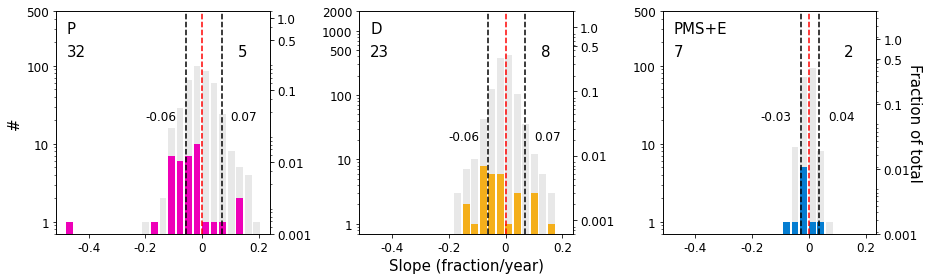

In [90]:
abc = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')
# abc0 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
# abc = ab[(ab.N_w2 > 5) &
#          (ab.dist_sd < 0.3) &
#          (ab.avg_eW2 < 0.2) &
#          (ab.sd_sdfid_w2_flux > 1) &
#          (ab['class'])]
# abd = ab[(ab.N_w2 > 5) &
#          (ab.dist_sd < 0.3) &
#          (ab.avg_eW2 < 0.2)]


# add modified FAP
# abc.loc[:,'mod_baluev_fap'] = abc.loc[:,'baluev_fap'] * 200 / abc.loc[:,'period']


# abc = abc[(abc['mod_baluev_fap'] < 0.001)]


pr = abc[(abc['class'] == "P")]
        


di = abc[(abc['class'] == "D")]
        

ev = abc[(abc['class'] == "PMS+E")]


pr_lin = pr[(pr['var_type'] == 'linear')
            ]
di_lin = di[(di['var_type'] == 'linear')]
ev_lin = ev[(ev['var_type'] == 'linear')]
print(len(pr_lin), len(di_lin), len(ev_lin))

print(len(pr_lin[pr_lin.Sw2 < 0]))
print(len(pr_lin[pr_lin.Sw2 > 0]))
yso = [pr,di,ev]
yso_lin = [pr_lin, di_lin, ev_lin]
y_label = ['P', 'D', 'PMS+E']
y_color=['#ee00b8', '#f4af1b', '#057dd1']

fig, ax = plt.subplots(1,3,figsize=(13,4))

for i in range(3):
    ax[i].hist(yso[i].Sw2*365.25,
#             bins = np.append(np.linspace(min(yso[0].Sw2*365.25),0,20),np.linspace(0,max(yso[0].Sw2*365.25),20)),
            bins = np.arange(min(yso[0].Sw2*365.25),max(yso[0].Sw2*365.25),0.03),   
            color='lightgray',
            histtype='bar', 
            rwidth=0.8, #linewidth=2,
               alpha=0.5)
    ax[i].hist(yso_lin[i].Sw2*365.25,
              bins = np.arange(min(yso[0].Sw2*365.25),max(yso[0].Sw2*365.25),0.03),
#               bins = np.append(np.linspace(min(yso[0].Sw2*365.25),0,20),np.linspace(0,max(yso[0].Sw2*365.25),20)),
              color=y_color[i],
              histtype='bar',
              rwidth=0.8)
    ax[i].set_yscale('log')
    ax[i].set_ylim(0.7,len(yso[i]))
    hist_ticks=np.array([1,10,100,500])
    if i == 1:
        hist_ticks = np.array([1,10,100,500,1000,2000])
    ax[i].set_yticks(hist_ticks)
    ax[i].set_yticklabels(hist_ticks,size=12)
    
    ax[i].set_xticks([-0.4,-0.2,0,0.2])
    ax[i].set_xticklabels([-0.4,-0.2,0,0.2],size=12)
    
    ax[i].text(0.05,0.9,y_label[i],transform=ax[i].transAxes,size=15)
    
    #number 
    ax[i].text(0.05,0.8,len(yso_lin[i][yso_lin[i].Sw2 < 0]),transform=ax[i].transAxes,size=15)
    ax[i].text(0.85,0.8,len(yso_lin[i][yso_lin[i].Sw2 > 0]),transform=ax[i].transAxes,size=15)
    
    ax[i].axvline(0,color='red',linestyle='--')
    
    
    ax[i].axvline(np.median(yso_lin[i][yso_lin[i].Sw2>0].Sw2*365.25),color='k',linestyle='--')
    ax[i].text(np.median(yso_lin[i][yso_lin[i].Sw2>0].Sw2*365.25)+0.03,20,
                         "{:.2f}".format(np.median(yso_lin[i][yso_lin[i].Sw2>0].Sw2*365.25)),
              size=12)
    
    ax[i].axvline(np.median(yso_lin[i][yso_lin[i].Sw2<0].Sw2*365.25),color='k',linestyle='--')
    ax[i].text(np.median(yso_lin[i][yso_lin[i].Sw2<0].Sw2*365.25)-0.14,20,
                         "{:.2f}".format(np.median(yso_lin[i][yso_lin[i].Sw2<0].Sw2*365.25)),
              size=12)
    
    
#     ax[i].axvline(np.mean(yso_lin[i][yso_lin[i].Sw2>0].Sw2*365.25),color='b',linestyle='--')
#     ax[i].axvline(np.mean(yso_lin[i][yso_lin[i].Sw2<0].Sw2*365.25),color='b',linestyle='--')
    print(str(i)+' (+): ',np.median(yso_lin[i][yso_lin[i].Sw2>0].Sw2*365.25))
    print(str(i)+' (-): ',np.median(yso_lin[i][yso_lin[i].Sw2<0].Sw2*365.25))
    
    #     ax[i].axvline(np.mean(yso_lin[i].Sw2*365.25),color='b',linestyle='--')

    
    hist_ticks_frac = np.array([0.001,0.01,0.1,0.5,1])
    ax2 = ax[i].twinx()
    ax2.set_yscale('log')
    ax2.set_ylim(ax[i].get_ylim())
    ax2.set_yticks(hist_ticks_frac*len(yso[i]))
    ax2.set_yticklabels(hist_ticks_frac,size=12)

    
ax[0].set_ylabel('#', size=15)
ax[1].set_xlabel('Slope (fraction/year)',size=15)
ax2.set_ylabel('Fraction of total',rotation='270',size=15)
    
fig.tight_layout()
# fig.savefig('/home/wooseok/WISE_data/3rdnewwise/plots/figure8_2.pdf')
    
    
    
    
# fig1, ax1 = plt.subplots(1,3,figsize=(10,4))

# for i in range(3):
#     counts, bins = np.histogram(yso[i].Sw2*365.25, 
#                                 bins = np.arange(min(yso[0].Sw2*365.25),max(yso[0].Sw2*365.25),0.03),
#                                )
#     print(counts, bins)
# #     print(np.ones(len(counts))/len(yso[i]))
# #     print(1/len(yso[i]))
#     ax1[i].hist(bins[:-1],
#             bins,
#             weights = counts/len(yso[i]),
#             color='lightgray',
#             histtype='stepfilled',  
#             linewidth=2, alpha=0.5)
    
#     counts1, bins1 = np.histogram(yso_lin[i].Sw2*365.25, 
#                                 bins = np.arange(min(yso[0].Sw2*365.25),max(yso[0].Sw2*365.25),0.03),
#                                )
#     ax1[i].hist(bins1[:-1],
#                 bins1,
#                 weights = counts1/len(yso[i]),
#                 color=y_color[i],
#                 histtype='bar')
#     ax1[i].set_yscale('log')
#     ax1[i].set_ylim(2e-4,1)
#     lin_ticks=[0.001,0.01,0.1,0.2,0.5,1]
#     ax1[i].set_yticks(lin_ticks)
#     ax1[i].set_yticklabels(lin_ticks)    
    
len(ev_lin[ev_lin.Sw2 < 0]['Sw2']*365.25)
len(ev_lin)
np.median(yso_lin[0][yso_lin[0].Sw2>0].Sw2*365.25)
# yso_lin[0].Sw2*365.25

In [57]:
abc.Sw2

0       5.393601e-07
1       6.165157e-08
2      -7.786743e-07
3      -1.946369e-07
4      -4.622333e-07
            ...     
1718    1.369029e-07
1719   -4.543056e-06
1720    2.206783e-07
1721   -1.821930e-07
1722    4.903596e-06
Name: Sw2, Length: 1723, dtype: float64

In [50]:
abc0.Sw2

0       0.000140
1       0.000259
2      -0.000093
3      -0.000009
4       0.000068
          ...   
1433   -0.000180
1434   -0.000231
1435    0.000032
1436   -0.000013
1437    0.000138
Name: Sw2, Length: 1438, dtype: float64

In [42]:
ev_lin

Index          ra        dec   dist_sd     avg_W1  stdev_W1   avg_eW1  \
900    3708  277.030833  -2.976389  0.041173   8.054086  0.261902  0.041229   
946    3886  277.355417  -2.526944  0.058105   8.200056  0.075889  0.036715   
1078   4488  278.117917  -1.919722  0.047357  10.336512  0.026873  0.023042   
1115   4669  279.410833  -0.429167  0.053569   8.297904  0.037084  0.038999   
1120   4693  279.503750  -0.038611  0.049294   9.656346  0.058384  0.021480   
1342   5501  245.285833 -41.267222  0.043093   8.708877  0.105760  0.035325   
1454   5885   52.180000  31.178333  0.050626  11.547761  0.078226  0.024454   
1457   5889   52.192500  31.277222  0.045603   9.523125  0.035479  0.020652   
1468   5913   52.238333  31.238611  0.129852   7.543471  0.030837  0.069379   

         avg_W2  stdev_W2   avg_eW2  ...  sd_sdfid_periodrmv  sd_periodrmv  \
900    7.524583  0.207761  0.043436  ...            1.359922      0.009379   
946    7.788350  0.069106  0.043189  ...            0.741412      0.003893   
1078   9.815211  0.036560  0.023681  ...            0.637068      0.000283   
1115   8.235568  0.049314  0.044487  ...            0.538075      0.001928   
1120   9.427675  0.070672  0.020736  ...            1.240030      0.000690   
1342   8.574049  0.107350  0.041610  ...            1.042546      0.002567   
1454  10.891221  0.108007  0.027553  ...            1.808328      0.000347   
1457   9.144135  0.047381  0.018435  ...            0.956872      0.000613   
1468   7.079020  0.067639  0.058263  ...            0.575638      0.007837   

      chi2_period_w2  linear_fap_periodrmv  Deltaw2_periodrmv  var_type  \
900        32.792745              0.976532           0.246294    linear   
946         7.340596              0.923013           0.104730    linear   
1078        6.470179              0.999801           0.050217    linear   
1115        3.879341              0.999890           0.072373    linear   
1120       23.961404              0.968713           0.094723    linear   
1342       17.167018              0.916729           0.171157    linear   
1454       49.090288              0.880202           0.170027    linear   
1457       12.195310              0.938626           0.067325    linear   
1468        4.916361              0.989463           0.124518    linear   

      combined_type  sd_linrmv  mu_linrmv  sd_mu_linrmv  
900             NaN   0.011879   0.006897      1.722379  
946             NaN   0.003351   0.005251      0.638261  
1078            NaN   0.000312   0.000444      0.701918  
1115            NaN   0.002103   0.003583      0.586884  
1120            NaN   0.000677   0.000557      1.215579  
1342            NaN   0.002215   0.002462      0.899593  
1454            NaN   0.000372   0.000192      1.936885  
1457            NaN   0.000776   0.000641      1.209934  
1468            NaN   0.007890   0.013614      0.579568  

[9 rows x 66 columns]

In [549]:
?plt.text

In [435]:
for i in range(3):
    counts, bins = np.histogram(yso[i].Sw2*365.25, 
                                bins = np.arange(min(yso[0].Sw2*365.25),max(yso[0].Sw2*365.25),0.03),
                               )


In [252]:
?plt.step

In [254]:
#fractional amplitude histogram 
hist_retp=[]
plt.figure()
for i in range(len(yso_period)):
    hist_retp.append(plt.hist(yso_period[i].amp/yso_period[i].ls_meanjy,histtype='step',
            bins=np.logspace(np.log10(1e-2),np.log10(2),30),
            color = yf_color[i], label=yf_label[i]))
plt.xscale('log')
plt.legend()

plt.figure(figsize=(8,6))
for i in range(len(yso_period)):
    plt.step(hist_retp[i][1][:len(hist_retp[i][1])-1],hist_retp[i][0],#/max(hist_retp[i][0]),
             color = yf_color[i],label=yf_label[i])
    if i == 2:
        plt.fill_between(hist_retp[i][1][:len(hist_retp[i][1])-1],hist_retp[i][0],
                         step="pre", alpha=0.4)
plt.xscale('log')
plt.ylim(0,15)
plt.xticks([0.01,0.02,0.05,0.1,0.2,0.5,1], [0.01,0.02,0.05,0.1,0.2,0.5,1])
plt.xlabel('Fractional Amplitude (Amplitude[Jy] / Sinusoid median flux [Jy])')
plt.ylabel('# of sources')
# plt.axvline(1000/365.25,linestyle='--', color='k')
plt.legend()
# plt.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/frac_amp_hist_filled.pdf')

In [232]:
# yso = [pr,fl,
#        di,ev]

p_ev = yso_period[2]
p_ev_2 = p_ev[p_ev.amp/p_ev.ls_meanjy > 0.17]

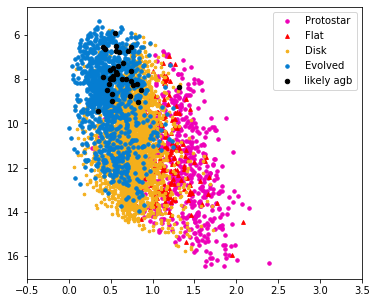

In [235]:
y_label = ['Protostar', 'Flat',
           'Disk', 'Evolved']
y_color=['#ee00b8', 'red',
         '#f4af1b', '#057dd1']
y_size=[12,14,7,12]
y_marker = ['o','^','o','o']
plt.figure(figsize=(6,5))
for i in range(len(yso)):
    plt.scatter(np.sqrt(yso[i].avg_W1 - yso[i].avg_W2), yso[i].avg_W1,
               s = y_size[i], c=y_color[i],label=y_label[i],marker=y_marker[i])
plt.scatter((p_ev_2.avg_W1 - p_ev_2.avg_W2), p_ev_2.avg_W1,
                s = 20, c = 'k', label='likely agb')
#     plt.errorbar()
# plt.yscale('log')
# plt.xticks([0.2,0.5,1,2,5,10,20,50,100], [0.2,0.5,1,2,5,10,20,50,100])
plt.xlim(-0.5,3.5)
# plt.xlim(2e-1,1e2)
plt.gca().invert_yaxis()
# plt.xlabel('sqrt(chi2_wmean_w2)')
# plt.ylabel('Linear FAP')
# plt.axvline(1000/365.25,linestyle='--', color='k')
plt.legend()

In [138]:
?plt.legend

In [175]:
?plt.scatter

In [21]:
?plt.xticks

In [39]:
pr[pr['Index'] == 6029].sd_sdfid_w2_flux

Series([], Name: sd_sdfid_w2_flux, dtype: float64)